# BIBLIOTEKI

In [9]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn import model_selection
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [10]:
# Wczytanie głównego pliku z danymi Loan_data.csv.
df = pd.read_csv("Loan_data.csv")
df.head()

C:\Users\Krzysztof\AppData\Local\Temp\ipykernel_2796\2765047846.py:2: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Loan_data.csv")


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501        NaN     5000.0       5000.0           4975.0   36 months   
1  1077430        NaN     2500.0       2500.0           2500.0   60 months   
2  1077175        NaN     2400.0       2400.0           2400.0   36 months   
3  1076863        NaN    10000.0      10000.0          10000.0   36 months   
4  1075358        NaN     3000.0       3000.0           3000.0   60 months   

  int_rate  installment grade sub_grade  ... hardship_payoff_balance_amount  \
0   10.65%       162.87     B        B2  ...                            NaN   
1   15.27%        59.83     C        C4  ...                            NaN   
2   15.96%        84.33     C        C5  ...                            NaN   
3   13.49%       339.31     C        C1  ...                            NaN   
4   12.69%        67.79     B        B5  ...                            NaN   

  hardship_last_payment_amount disbursement_method  debt_settlement_flag  \
0                          NaN                Cash                     N   
1                          NaN                Cash                     N   
2                          NaN                Cash                     N   
3                          NaN                Cash                     N   
4                          NaN                Cash                     N   

  debt_settlement_flag_date settlement_status settlement_date  \
0                       NaN               NaN             NaN   
1                       NaN               NaN             NaN   
2                       NaN               NaN             NaN   
3                       NaN               NaN             NaN   
4                       NaN               NaN             NaN   

  settlement_amount settlement_percentage settlement_term  
0               NaN                   NaN             NaN  
1               NaN                   NaN             NaN  
2               NaN                   NaN             NaN  
3               NaN                   NaN             NaN  
4               NaN                   NaN             NaN  

[5 rows x 151 columns]

# DATA PROCESSING - Obróbka danych (70pkt)

In [12]:
df.shape

(42536, 151)

## Usuwam wszystkie kolumny i wiersze w których wszystkie komórki są puste.

In [14]:
df.dropna(axis=1, how='all', inplace=True)
df = df.dropna(how='all')
df.shape

(42536, 69)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42536 entries, 0 to 42535
Data columns (total 69 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          42536 non-null  object 
 1   loan_amnt                   42535 non-null  float64
 2   funded_amnt                 42535 non-null  float64
 3   funded_amnt_inv             42535 non-null  float64
 4   term                        42535 non-null  object 
 5   int_rate                    42535 non-null  object 
 6   installment                 42535 non-null  float64
 7   grade                       42535 non-null  object 
 8   sub_grade                   42535 non-null  object 
 9   emp_title                   39909 non-null  object 
 10  emp_length                  41423 non-null  object 
 11  home_ownership              42535 non-null  object 
 12  annual_inc                  42531 non-null  float64
 13  verification_status         425

In [16]:
# Usuwam kolumny zawierające dane z przyszłości lub takie co do których mam pewność, że nie przydadzą się do analizy i tworzenia modeli.
df = df.drop(["id", "emp_title", "pymnt_plan", "url", "desc", "title", "zip_code", "addr_state", "initial_list_status", "out_prncp", "out_prncp_inv", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d", "last_credit_pull_d", "collections_12_mths_ex_med", "policy_code", "application_type", "chargeoff_within_12_mths", "delinq_amnt", "tax_liens", "hardship_flag", "disbursement_method", "debt_settlement_flag", "debt_settlement_flag_date", "settlement_status", "settlement_date", "settlement_amount", "settlement_percentage", "settlement_term", "mths_since_last_delinq", "mths_since_last_record", "acc_now_delinq"], axis=1)

In [17]:
df.shape

(42536, 29)

In [18]:
# Z podglądu wynika, że istnieje wiersz który jest pusty dla wszystkich kolumn w wyjątkiem ID, natomiast w komórce ID nie miał on wartości. Dopiero po usunięciu kolumny ID udało się usunąć zbędny wiersz.
df = df.dropna(how='all')
df.shape

(42535, 29)

## Wstępnie przygotowany DataFrame. Rozpoczęcie uzupełniania pustych komórek/normalizacja danych na typ numeryczny.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42535 entries, 0 to 42535
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             42535 non-null  float64
 1   funded_amnt           42535 non-null  float64
 2   funded_amnt_inv       42535 non-null  float64
 3   term                  42535 non-null  object 
 4   int_rate              42535 non-null  object 
 5   installment           42535 non-null  float64
 6   grade                 42535 non-null  object 
 7   sub_grade             42535 non-null  object 
 8   emp_length            41423 non-null  object 
 9   home_ownership        42535 non-null  object 
 10  annual_inc            42531 non-null  float64
 11  verification_status   42535 non-null  object 
 12  issue_d               42535 non-null  object 
 13  loan_status           42535 non-null  object 
 14  purpose               42535 non-null  object 
 15  dti                   42

### term_months

In [22]:
missing_values = df['term'].isna().sum()
missing_values

0

In [23]:
# Usuwam w kolumny 'term' zbędne wyrażenie " months" i przekształcam typ danych na liczbowe całkowite. Ostatecznie pozostają dwie wartości 36 oraz 60 jako okres spłaty pożyczki wyrażony w miesiącach.
df['term'] = df['term'].str.replace(" months", "", regex=False)
df['term_months'] = df['term'].astype(float)
df = df.drop("term", axis=1)

In [24]:
df.term_months.head()

0    36.0
1    60.0
2    36.0
3    36.0
4    60.0
Name: term_months, dtype: float64

### int_rate

In [26]:
missing_values = df['int_rate'].isna().sum()
missing_values

0

In [27]:
# W kolumnie 'int_rate' znajduje się oprocentowanie pożyczki. Usuwam znak '%' i przekształcam typ danych na liczbowe rzeczywiste.
df['int_rate'] = df['int_rate'].str.replace("%", "", regex=False).astype(float)

In [28]:
df.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

### grade_numeric

In [30]:
df['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [31]:
missing_values = df['grade'].isna().sum()
missing_values

0

In [32]:
# W kolumnie 'grade' występują dane kategoryczne, które zamieniam na wartości liczbowe tworząc nową kolumnę 'grade_numeric'.
mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
df['grade_numeric'] = df['grade'].map(mapping)
df = df.drop("grade", axis=1)

In [33]:
df.grade_numeric

0        2
1        3
2        3
3        3
4        2
        ..
42531    3
42532    2
42533    2
42534    1
42535    1
Name: grade_numeric, Length: 42535, dtype: int64

### sub_grade_numeric

In [35]:
df['sub_grade'].unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [36]:
missing_values = df['sub_grade'].isna().sum()
missing_values

0

In [37]:
# Podobnie jest z kolumną sub_grade.
mapping = {'A5': 5, 'A4': 4, 'A3': 3, 'A2': 2, 'A1': 1,
          'B5': 10, 'B4': 9, 'B3': 8, 'B2': 7, 'B1': 6,
          'C5': 15, 'C4': 14, 'C3': 13, 'C2': 12, 'C1': 11,
          'D5': 20, 'D4': 19, 'D3': 18, 'D2': 17, 'D1': 16,
          'E5': 25, 'E4': 24, 'E3': 23, 'E2': 22, 'E1': 21,
          'F5': 30, 'F4': 29, 'F3': 28, 'F2': 27, 'F1': 26,
          'G5': 35, 'G4': 34, 'G3': 33, 'G2': 32, 'G1': 31
          }

df['sub_grade_numeric'] = df['sub_grade'].map(mapping)
df = df.drop("sub_grade", axis=1)

In [38]:
# Sprawdzam czy wszystko jest prawidłowo przypisane.
df['sub_grade_numeric'].unique()

array([ 7, 14, 15, 11, 10,  4, 21, 27, 13,  6, 16,  1,  8,  9, 12, 17,  3,
        5, 20,  2, 24, 18, 19, 28, 23, 29, 26, 25, 34, 22, 33, 32, 31, 30,
       35], dtype=int64)

### emp_length_numeric

In [40]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [41]:
missing_values = df['emp_length'].isna().sum()
missing_values

1112

In [42]:
# Kolejna  kolumna z wartościami kategorycznymi, tym razem długośc zatrudnienia w latach.
mapping = {'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4,
          '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9,
          '10+ years': 10}
df['emp_length_numeric'] = df['emp_length'].map(mapping)
df = df.drop("emp_length", axis=1)
df.emp_length_numeric

0        10.0
1         0.0
2        10.0
3        10.0
4         1.0
         ... 
42531     0.0
42532     0.0
42533     0.0
42534     0.0
42535    10.0
Name: emp_length_numeric, Length: 42535, dtype: float64

In [43]:
df['emp_length_numeric'].median()

4.0

In [44]:
# W kolumnie emp_length występowały puste komórki. Uzupełniam puste komórki dopiero po przejściu na wartości numeryczne, do uzupełnienia wykorzystuję medianę.
df['emp_length_numeric'] = df['emp_length_numeric'].fillna(4)

In [45]:
missing_values = df['emp_length_numeric'].isna().sum()
missing_values

0

### home_ownership_numeric

In [47]:
df['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [48]:
missing_values = df['home_ownership'].isna().sum()
missing_values

0

In [49]:
# Kolejna kolumna z wartościami kategorycznymi która określa typ własności zamieszkanej nieruchomości.
mapping2 = {'NONE': 0, 'MORTGAGE': 1, 'OTHER': 2, 'OWN': 3, 'RENT': 4
           }

df['home_ownership_numeric'] = df['home_ownership'].map(mapping2)
df = df.drop("home_ownership", axis=1)
df['home_ownership_numeric']

0        4
1        4
2        4
3        4
4        4
        ..
42531    4
42532    4
42533    4
42534    0
42535    1
Name: home_ownership_numeric, Length: 42535, dtype: int64

### annual_inc

In [51]:
df['annual_inc'].describe()

count    4.253100e+04
mean     6.913656e+04
std      6.409635e+04
min      1.896000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.250000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [52]:
# Wyłączenie notacji naukowej dla całego DataFrame
pd.options.display.float_format = '{:.2f}'.format

df['annual_inc'].describe()

count     42531.00
mean      69136.56
std       64096.35
min        1896.00
25%       40000.00
50%       59000.00
75%       82500.00
max     6000000.00
Name: annual_inc, dtype: float64

In [53]:
missing_values = df['annual_inc'].isna().sum()
missing_values

4

In [54]:
df['annual_inc'] = df['annual_inc'].fillna(59000)

In [55]:
df['annual_inc'].describe()

count     42535.00
mean      69135.60
std       64093.41
min        1896.00
25%       40000.00
50%       59000.00
75%       82500.00
max     6000000.00
Name: annual_inc, dtype: float64

In [56]:
missing_values = df['annual_inc'].isna().sum()
missing_values

0

### delinq_2yrs

In [58]:
df['delinq_2yrs'].describe()

count   42506.00
mean        0.15
std         0.51
min         0.00
25%         0.00
50%         0.00
75%         0.00
max        13.00
Name: delinq_2yrs, dtype: float64

In [59]:
missing_values = df['delinq_2yrs'].isna().sum()
missing_values

29

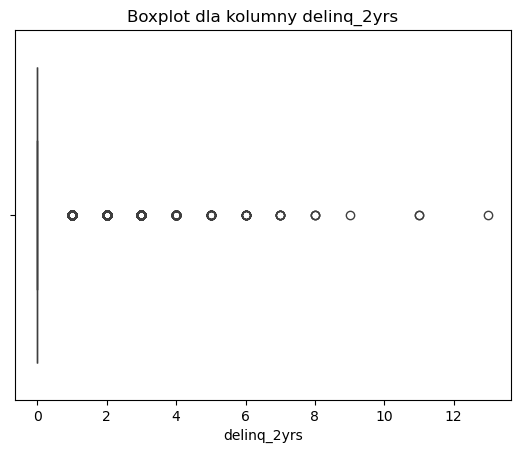

29

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['delinq_2yrs'])
plt.title('Boxplot dla kolumny delinq_2yrs')
plt.xlabel('delinq_2yrs')
plt.show()
missing_values = df['delinq_2yrs'].isna().sum()
missing_values

In [61]:
df['delinq_2yrs'].median()

0.0

In [62]:
df['delinq_2yrs'] = df['delinq_2yrs'].fillna(0)

In [63]:
missing_values = df['delinq_2yrs'].isna().sum()
missing_values

0

### inq_last_6mths

In [65]:
df['inq_last_6mths'].describe()

count   42506.00
mean        1.08
std         1.53
min         0.00
25%         0.00
50%         1.00
75%         2.00
max        33.00
Name: inq_last_6mths, dtype: float64

In [66]:
missing_values = df['inq_last_6mths'].isna().sum()
missing_values

29

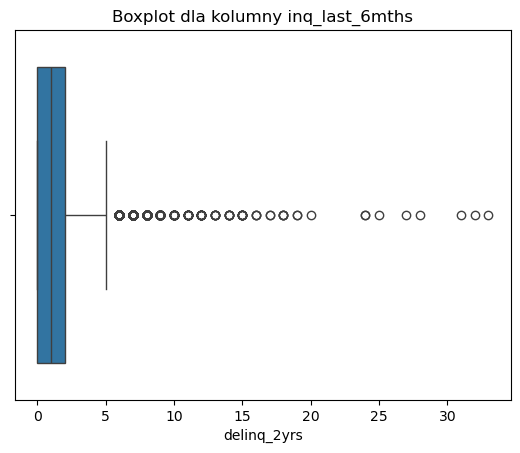

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generowanie boxplotu dla jednej kolumny, np. 'loan_amnt'
sns.boxplot(x=df['inq_last_6mths'])
plt.title('Boxplot dla kolumny inq_last_6mths')
plt.xlabel('delinq_2yrs')
plt.show()

In [68]:
df['inq_last_6mths'].median()

1.0

In [69]:
df['inq_last_6mths'] = df['inq_last_6mths'].fillna(1)

In [70]:
missing_values = df['inq_last_6mths'].isna().sum()
missing_values

0

### open_acc

In [72]:
df['open_acc'].describe()

count   42506.00
mean        9.34
std         4.50
min         1.00
25%         6.00
50%         9.00
75%        12.00
max        47.00
Name: open_acc, dtype: float64

In [73]:
missing_values = df['open_acc'].isna().sum()
missing_values

29

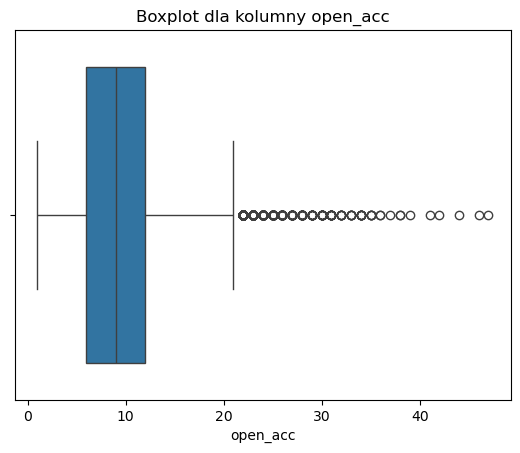

In [74]:
sns.boxplot(x=df['open_acc'])
plt.title('Boxplot dla kolumny open_acc')
plt.xlabel('open_acc')
plt.show()

In [75]:
df['open_acc'].median()

9.0

In [76]:
df['open_acc'] = df['open_acc'].fillna(9)

In [77]:
missing_values = df['open_acc'].isna().sum()
missing_values

0

### pub_rec

In [79]:
df['pub_rec'].describe()

count   42506.00
mean        0.06
std         0.25
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         5.00
Name: pub_rec, dtype: float64

In [80]:
missing_values = df['pub_rec'].isna().sum()
missing_values

29

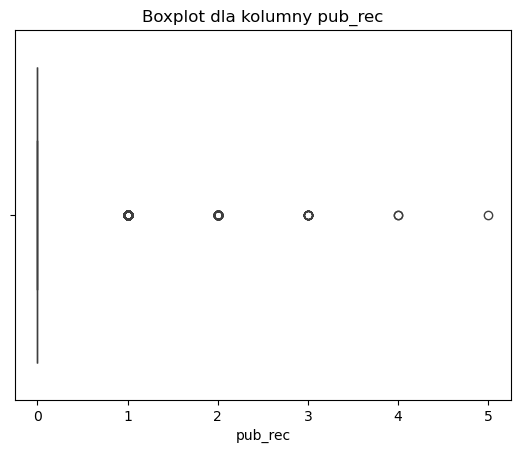

In [81]:
sns.boxplot(x=df['pub_rec'])
plt.title('Boxplot dla kolumny pub_rec')
plt.xlabel('pub_rec')
plt.show()

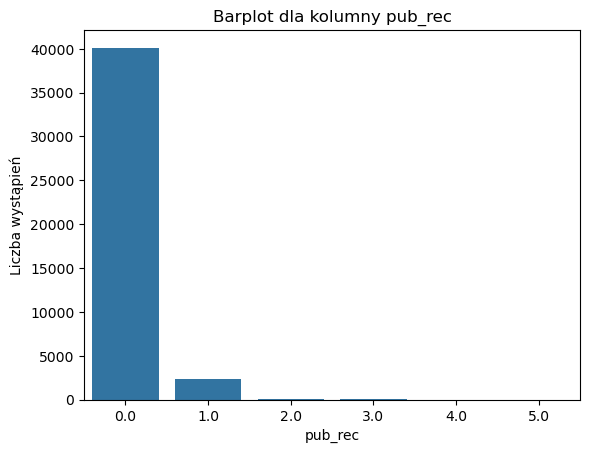

In [82]:
pub_rec_counts = df['pub_rec'].value_counts().reset_index()
pub_rec_counts.columns = ['pub_rec', 'count']

# Tworzenie barplotu
sns.barplot(x='pub_rec', y='count', data=pub_rec_counts)
plt.title('Barplot dla kolumny pub_rec')
plt.xlabel('pub_rec')
plt.ylabel('Liczba wystąpień')
plt.show()

In [83]:
df['pub_rec'].median()

0.0

In [84]:
df['pub_rec'] = df['pub_rec'].fillna(0)

In [85]:
missing_values = df['pub_rec'].isna().sum()
missing_values

0

### total_acc

In [87]:
df['total_acc'].describe()

count   42506.00
mean       22.12
std        11.59
min         1.00
25%        13.00
50%        20.00
75%        29.00
max        90.00
Name: total_acc, dtype: float64

In [88]:
missing_values = df['total_acc'].isna().sum()
missing_values

29

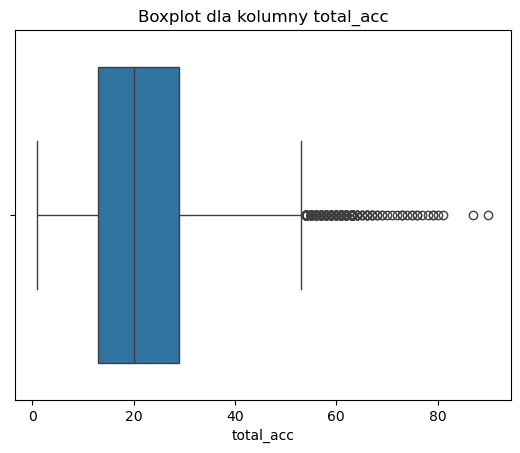

In [89]:
sns.boxplot(x=df['total_acc'])
plt.title('Boxplot dla kolumny total_acc')
plt.xlabel('total_acc')
plt.show()

In [90]:
df['total_acc'].median()

20.0

In [91]:
df['total_acc'] = df['total_acc'].fillna(20)

In [92]:
missing_values = df['total_acc'].isna().sum()
missing_values

0

### pub_rec_bankruptcies

In [94]:
df['pub_rec_bankruptcies'].describe()

count   41170.00
mean        0.05
std         0.21
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         2.00
Name: pub_rec_bankruptcies, dtype: float64

In [95]:
missing_values = df['pub_rec_bankruptcies'].isna().sum()
missing_values

1365

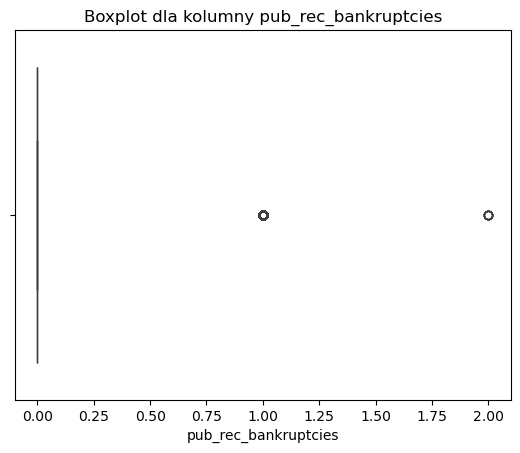

In [96]:
sns.boxplot(x=df['pub_rec_bankruptcies'])
plt.title('Boxplot dla kolumny pub_rec_bankruptcies')
plt.xlabel('pub_rec_bankruptcies')
plt.show()

In [97]:
df['pub_rec_bankruptcies'].median()

0.0

In [98]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0)

In [99]:
missing_values = df['pub_rec_bankruptcies'].isna().sum()
missing_values

0

### verification_status_numeric

In [101]:
missing_values = df['verification_status'].isna().sum()
missing_values

0

In [102]:
df['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [103]:
mapping = {'Not Verified': 0, 'Verified': 1, 'Source Verified': 2}
df['verification_status_numeric'] = df['verification_status'].map(mapping)
df = df.drop("verification_status", axis=1)

In [104]:
df['verification_status_numeric']

0        1
1        2
2        0
3        2
4        2
        ..
42531    0
42532    0
42533    0
42534    0
42535    0
Name: verification_status_numeric, Length: 42535, dtype: int64

### loan_status_numeric

In [106]:
df['loan_status'].describe()

count          42535
unique             4
top       Fully Paid
freq           34116
Name: loan_status, dtype: object

In [107]:
missing_values = df['loan_status'].isna().sum()
missing_values

0

In [108]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [109]:
mapping = {'Charged Off': 0, 'Does not meet the credit policy. Status:Charged Off': 0, 'Does not meet the credit policy. Status:Fully Paid': 1, 'Fully Paid': 1}
df['loan_status_numeric'] = df['loan_status'].map(mapping)
df = df.drop("loan_status", axis=1)

In [110]:
df['loan_status_numeric']

0        1
1        0
2        1
3        1
4        1
        ..
42531    1
42532    1
42533    1
42534    1
42535    1
Name: loan_status_numeric, Length: 42535, dtype: int64

### earliest_cr_line

In [112]:
df['earliest_cr_line'].describe()

count        42506
unique         530
top       Oct-1999
freq           393
Name: earliest_cr_line, dtype: object

In [113]:
missing_values = df['earliest_cr_line'].isna().sum()
missing_values

29

In [114]:
# Muszę doprowadzić te dane do wartości numerycznej (wyraże ją w miesiącach).
# Konwersja na datę
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%Y')

In [115]:
# Ustalenie punktu odniesienia (np. styczeń 1900)
reference_date = pd.Timestamp('1900-01-01')

# Obliczanie liczby miesięcy od punktu odniesienia
df['earliest_cr_line_months'] = ((df['earliest_cr_line'].dt.year - reference_date.year) * 12 +
                                (df['earliest_cr_line'].dt.month - reference_date.month))

df = df.drop("earliest_cr_line", axis=1)
df['earliest_cr_line_months'].describe()

count   42506.00
mean     1164.88
std        82.16
min       552.00
25%      1126.00
50%      1180.00
75%      1220.00
max      1306.00
Name: earliest_cr_line_months, dtype: float64

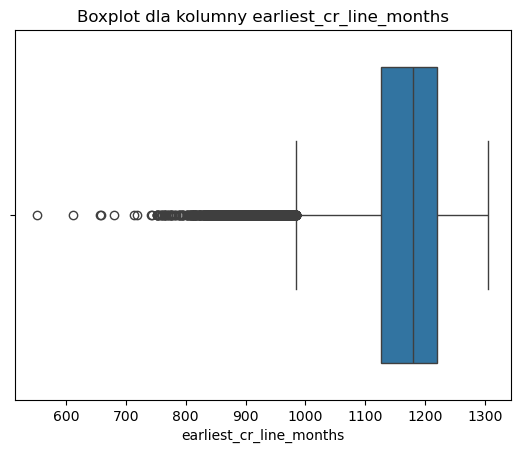

In [116]:
sns.boxplot(x=df['earliest_cr_line_months'])
plt.title('Boxplot dla kolumny earliest_cr_line_months')
plt.xlabel('earliest_cr_line_months')
plt.show()

In [117]:
df['earliest_cr_line_months'].median()

1180.0

In [118]:
df['earliest_cr_line_months'] = df['earliest_cr_line_months'].fillna(1180)

In [119]:
missing_values = df['earliest_cr_line_months'].isna().sum()
missing_values

0

### issue_d

In [121]:
df['issue_d'].describe()

count        42535
unique          55
top       Dec-2011
freq          2267
Name: issue_d, dtype: object

In [122]:
missing_values = df['issue_d'].isna().sum()
missing_values

0

In [123]:
# Muszę doprowadzić te dane do wartości numerycznej (wyraże ją w miesiącach).
# Konwersja na datę
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')

In [124]:
# Ustalenie punktu odniesienia (np. styczeń 2000)
reference_date = pd.Timestamp('1900-01-01')

# Obliczanie liczby miesięcy od punktu odniesienia
df['issue_d_months'] = ((df['issue_d'].dt.year - reference_date.year) * 12 +
                                (df['issue_d'].dt.month - reference_date.month))

df = df.drop("issue_d", axis=1)
df['issue_d_months'].describe()

count   42535.00
mean     1328.91
std        12.08
min      1289.00
25%      1323.00
50%      1332.00
75%      1338.00
max      1343.00
Name: issue_d_months, dtype: float64

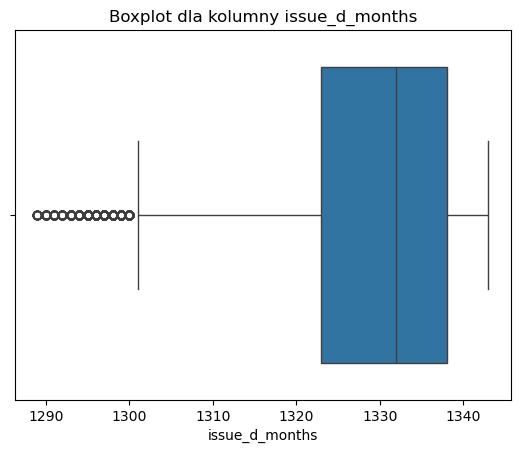

In [125]:
sns.boxplot(x=df['issue_d_months'])
plt.title('Boxplot dla kolumny issue_d_months')
plt.xlabel('issue_d_months')
plt.show()

### revol_util

In [127]:
df['revol_util'].describe()

count     42445
unique     1119
top          0%
freq       1070
Name: revol_util, dtype: object

In [128]:
missing_values = df['revol_util'].isna().sum()
missing_values

90

In [129]:
# W kolumnie 'revol_util' znajduje się oprocentowanie pożyczki. Usuwam znak '%' i przekształcam typ danych na liczbowe rzeczywiste.
df['revol_util'] = df['revol_util'].str.replace("%", "", regex=False).astype(float)

In [130]:
df['revol_util'].describe()

count   42445.00
mean       49.12
std        28.36
min         0.00
25%        25.70
50%        49.70
75%        72.70
max       119.00
Name: revol_util, dtype: float64

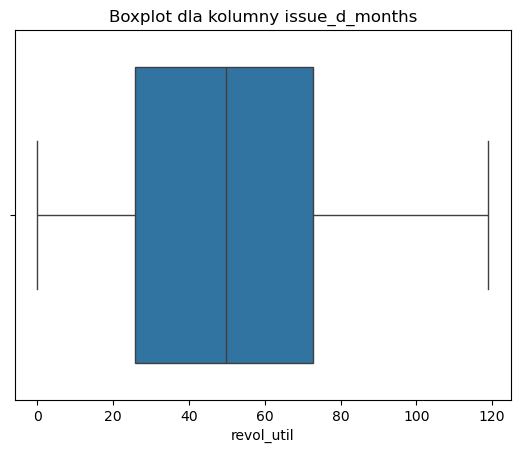

In [131]:
sns.boxplot(x=df['revol_util'])
plt.title('Boxplot dla kolumny issue_d_months')
plt.xlabel('revol_util')
plt.show()

In [132]:
df['revol_util'].median()

49.7

In [133]:
# Uzupełniam dane w kolumnie revol_util wypełniając puste komórki medianą.
df['revol_util'] = df['revol_util'].fillna(49.7)

print(df.revol_util)

0       83.70
1        9.40
2       98.50
3       21.00
4       53.90
         ... 
42531   49.70
42532   49.70
42533   49.70
42534   49.70
42535   49.70
Name: revol_util, Length: 42535, dtype: float64


In [134]:
missing_values = df['revol_util'].isna().sum()
missing_values

0

### fico_range_avg

In [136]:
missing_values = df['fico_range_low'].isna().sum()
missing_values

0

In [137]:
missing_values = df['fico_range_high'].isna().sum()
missing_values

0

{'whiskers': [<matplotlib.lines.Line2D at 0x1de2ca12f90>,
 'caps': [<matplotlib.lines.Line2D at 0x1de2ca13500>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de2ca12cc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1de2ca139e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de2ca13cb0>],
 'means': []}

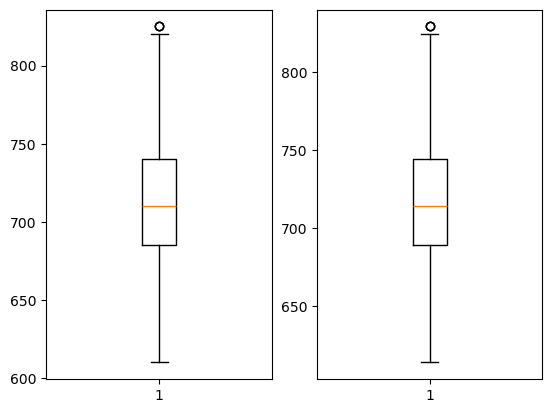

In [138]:
# Nie są mi potrzebne dwie kolumny z bardzo zbliżonymi do siebie wartościami fico_range_low oraz fico_range_high. Sprawdzam rozkład.
fig, ax = plt.subplots(1,2)
ax[0].boxplot(df.fico_range_low)
ax[1].boxplot(df.fico_range_high)

In [139]:
print(df['fico_range_low'].median())
print(df['fico_range_high'].median())

710.0
714.0


In [140]:
# Rozkład jest w porządku, mogę uśrednić i zamienić dwie na jedną kolumnę.
df['fico_range_avg'] = df[['fico_range_low', 'fico_range_high']].mean(axis=1)

In [141]:
df = df.drop(["fico_range_low", "fico_range_high"], axis=1)

### last_fico_range_avg

{'whiskers': [<matplotlib.lines.Line2D at 0x1de2c93eba0>,
 'caps': [<matplotlib.lines.Line2D at 0x1de2c93e600>,
 'boxes': [<matplotlib.lines.Line2D at 0x1de2c93ee70>],
 'medians': [<matplotlib.lines.Line2D at 0x1de2c93e090>],
 'fliers': [<matplotlib.lines.Line2D at 0x1de2c93de20>],
 'means': []}

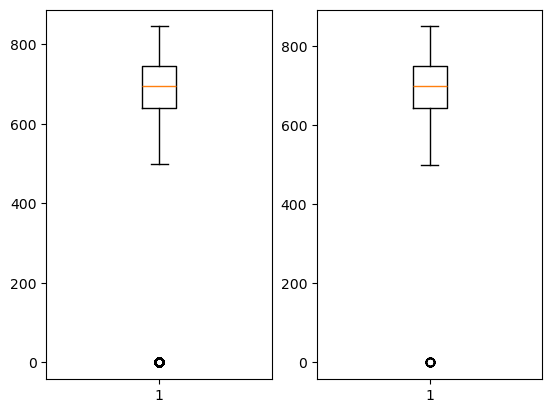

In [143]:
# Podobnie chcę zrobić z kolumnami last_fico_range_low oraz last_fico_range_high
fig, ax = plt.subplots(1,2)
ax[0].boxplot(df.last_fico_range_low)
ax[1].boxplot(df.last_fico_range_high)

In [144]:
missing_values = df['last_fico_range_low'].isna().sum()
missing_values

0

In [145]:
missing_values = df['last_fico_range_high'].isna().sum()
missing_values

0

In [146]:
df["last_fico_range_low"].describe()

count   42535.00
mean      676.95
std       119.65
min         0.00
25%       640.00
50%       695.00
75%       745.00
max       845.00
Name: last_fico_range_low, dtype: float64

In [147]:
# Zastanawiająca jest wartość 0 w przypadku obu kolumn, badam czy jest to błąd lub zamierzone działanie i na jaką skalę.
count_zeros = (df['last_fico_range_low'] == 0).sum()
print(f"Liczba danych o wartości 0 w kolumnie 'last_fico_range_low': {count_zeros}")

Liczba danych o wartości 0 w kolumnie 'last_fico_range_low': 795


In [148]:
# W tym przypadku istnieje możliwość, że osoby które posiadają przypisaną wartość 0 uprzednio nie posiadały zdolności.
df["last_fico_range_high"].describe()

count   42535.00
mean      689.92
std        80.82
min         0.00
25%       644.00
50%       699.00
75%       749.00
max       850.00
Name: last_fico_range_high, dtype: float64

In [149]:
# W tej kolumnie jest znacznie mniej występujących wartości 0. 
count_zeros = (df['last_fico_range_high'] == 0).sum()
print(f"Liczba danych o wartości 0 w kolumnie 'last_fico_range_high': {count_zeros}")

Liczba danych o wartości 0 w kolumnie 'last_fico_range_high': 24


In [150]:
# Sprawdzenie liczby wierszy, w których jednocześnie obie kolumny mają wartość 0
count_zeros = df[(df['last_fico_range_low'] == 0) & (df['last_fico_range_high'] == 0)].shape[0]
count_zeros

24

In [151]:
# Zatem warto rozważyć czy aby na pewno jest to zamierzone działanie. Grupa osób która posiada 'last_fico_range_low' = 0 jest dosyć spora i nie można tego faktu zbagatelizować.
# Natomiast ilość występujących w kolumnie przypadków 'last_fico_range_high' = 0 jest na tyle nieznaczna, że wartości zera można usupełnić medianą.

In [152]:
# Wartości 0 w kolumnie last_fico_range_high uzupełniam medianą tej kolumny
df['last_fico_range_high'] = df['last_fico_range_high'].fillna(699)

In [153]:
# Z kolei wartości 0 w kolumnie last_fico_range_low pozostawiam niezmienione. Tworzę last_fico_range_avg uśredniając wartości z kolumny last_fico_range_low oraz last_fico_range_high. 
df['last_fico_range_avg'] = df[['last_fico_range_low', 'last_fico_range_high']].mean(axis=1)

In [154]:
# Usuwam zbędne kolumny
df = df.drop(["last_fico_range_low", "last_fico_range_high"], axis=1)

In [155]:
df['last_fico_range_avg'].describe()

count   42535.00
mean      683.44
std        96.61
min         0.00
25%       642.00
50%       697.00
75%       747.00
max       847.50
Name: last_fico_range_avg, dtype: float64

### purpose

In [157]:
df['purpose'].describe()

count                  42535
unique                    14
top       debt_consolidation
freq                   19776
Name: purpose, dtype: object

In [158]:
missing_values = df['purpose'].isna().sum()
missing_values

0

In [159]:
# Kolumna z wartościami kategorycznymi, sprawdzam unikatowe wartości kategoryczne.
df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [160]:
mapping = {'credit_card': 5, 'car': 4, 'small_business': 3, 'other': 2, 'wedding': 1,
          'debt_consolidation': 10, 'home_improvement': 9, 'major_purchase': 8, 'medical': 7, 'moving': 6,
          'house': 14, 'renewable_energy': 13, 'educational': 12, 'vacation': 11,
          }

df['purpose_numeric'] = df['purpose'].map(mapping)
df = df.drop("purpose", axis=1)

In [161]:
df['purpose_numeric']

0        5
1        4
2        3
3        2
4        2
        ..
42531    2
42532    2
42533    2
42534    2
42535    2
Name: purpose_numeric, Length: 42535, dtype: int64

## DF2 - DATAFRAME FOR EDA

In [163]:
# Sprawdzam czy nie ma braków w danych.
# Dane kategoryczne zostały juz zmienione na numeryczne przy jednoczesnym utworzeniu nowych kolumn które to posłużą do analizy i tworzenia modeli machine learningowych.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42535 entries, 0 to 42535
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_amnt                    42535 non-null  float64
 1   funded_amnt                  42535 non-null  float64
 2   funded_amnt_inv              42535 non-null  float64
 3   int_rate                     42535 non-null  float64
 4   installment                  42535 non-null  float64
 5   annual_inc                   42535 non-null  float64
 6   dti                          42535 non-null  float64
 7   delinq_2yrs                  42535 non-null  float64
 8   inq_last_6mths               42535 non-null  float64
 9   open_acc                     42535 non-null  float64
 10  pub_rec                      42535 non-null  float64
 11  revol_bal                    42535 non-null  float64
 12  revol_util                   42535 non-null  float64
 13  total_acc            

In [164]:
df2 = df

In [165]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42535 entries, 0 to 42535
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_amnt                    42535 non-null  float64
 1   funded_amnt                  42535 non-null  float64
 2   funded_amnt_inv              42535 non-null  float64
 3   int_rate                     42535 non-null  float64
 4   installment                  42535 non-null  float64
 5   annual_inc                   42535 non-null  float64
 6   dti                          42535 non-null  float64
 7   delinq_2yrs                  42535 non-null  float64
 8   inq_last_6mths               42535 non-null  float64
 9   open_acc                     42535 non-null  float64
 10  pub_rec                      42535 non-null  float64
 11  revol_bal                    42535 non-null  float64
 12  revol_util                   42535 non-null  float64
 13  total_acc            

# EDA - obszerna eksploracja danych (100pkt) 

Opisz wnioski płynące z każdego wykresu, swoje hipotezy poprzyj testami statystycznymi takimi jak np. t-test lub Chi-square.

In [300]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42535 entries, 0 to 42535
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_amnt                    42535 non-null  float64
 1   funded_amnt                  42535 non-null  float64
 2   funded_amnt_inv              42535 non-null  float64
 3   int_rate                     42535 non-null  float64
 4   installment                  42535 non-null  float64
 5   annual_inc                   42535 non-null  float64
 6   dti                          42535 non-null  float64
 7   delinq_2yrs                  42535 non-null  float64
 8   inq_last_6mths               42535 non-null  float64
 9   open_acc                     42535 non-null  float64
 10  pub_rec                      42535 non-null  float64
 11  revol_bal                    42535 non-null  float64
 12  revol_util                   42535 non-null  float64
 13  total_acc            

In [301]:
corr_df2 = df2.corr(method='spearman')
corr_df2

loan_amnt  funded_amnt  funded_amnt_inv  \
loan_amnt                         1.00         0.99             0.92   
funded_amnt                       0.99         1.00             0.93   
funded_amnt_inv                   0.92         0.93             1.00   
int_rate                          0.24         0.24             0.22   
installment                       0.96         0.97             0.89   
annual_inc                        0.43         0.43             0.40   
dti                               0.07         0.07             0.08   
delinq_2yrs                      -0.04        -0.04            -0.05   
inq_last_6mths                   -0.02        -0.03            -0.06   
open_acc                          0.21         0.21             0.19   
pub_rec                          -0.05        -0.05            -0.05   
revol_bal                         0.40         0.40             0.36   
revol_util                        0.07         0.07             0.07   
total_acc                         0.28         0.27             0.26   
pub_rec_bankruptcies             -0.03        -0.03            -0.03   
term_months                       0.33         0.32             0.35   
grade_numeric                     0.21         0.22             0.16   
sub_grade_numeric                 0.22         0.22             0.17   
emp_length_numeric                0.15         0.15             0.17   
home_ownership_numeric           -0.17        -0.16            -0.16   
verification_status_numeric       0.18         0.18             0.23   
loan_status_numeric              -0.03        -0.03             0.00   
earliest_cr_line_months          -0.22        -0.21            -0.18   
issue_d_months                    0.13         0.14             0.29   
fico_range_avg                    0.15         0.14             0.16   
last_fico_range_avg               0.10         0.10             0.11   
purpose_numeric                   0.17         0.17             0.17   

                             int_rate  installment  annual_inc   dti  \
loan_amnt                        0.24         0.96        0.43  0.07   
funded_amnt                      0.24         0.97        0.43  0.07   
funded_amnt_inv                  0.22         0.89        0.40  0.08   
int_rate                         1.00         0.24        0.06  0.13   
installment                      0.24         1.00        0.43  0.07   
annual_inc                       0.06         0.43        1.00 -0.09   
dti                              0.13         0.07       -0.09  1.00   
delinq_2yrs                      0.16        -0.02        0.04 -0.04   
inq_last_6mths                   0.21        -0.01        0.03  0.02   
open_acc                        -0.01         0.20        0.31  0.31   
pub_rec                          0.10        -0.04       -0.01 -0.00   
revol_bal                        0.13         0.40        0.41  0.34   
revol_util                       0.46         0.10        0.05  0.27   
total_acc                       -0.06         0.25        0.44  0.25   
pub_rec_bankruptcies             0.09        -0.03       -0.01  0.01   
term_months                      0.40         0.12        0.09  0.08   
grade_numeric                    0.96         0.21        0.05  0.12   
sub_grade_numeric                0.97         0.22        0.05  0.13   
emp_length_numeric              -0.00         0.13        0.21  0.06   
home_ownership_numeric           0.07        -0.14       -0.33  0.01   
verification_status_numeric      0.11         0.15        0.11 -0.00   
loan_status_numeric             -0.20        -0.02        0.07 -0.04   
earliest_cr_line_months          0.12        -0.19       -0.36 -0.06   
issue_d_months                   0.00         0.09        0.05  0.07   
fico_range_avg                  -0.73         0.08        0.09 -0.17   
last_fico_range_avg             -0.34         0.09        0.13 -0.07   
purpose_numeric                  0.07         0.17       -0.00  0.11

## Badanie korelacji

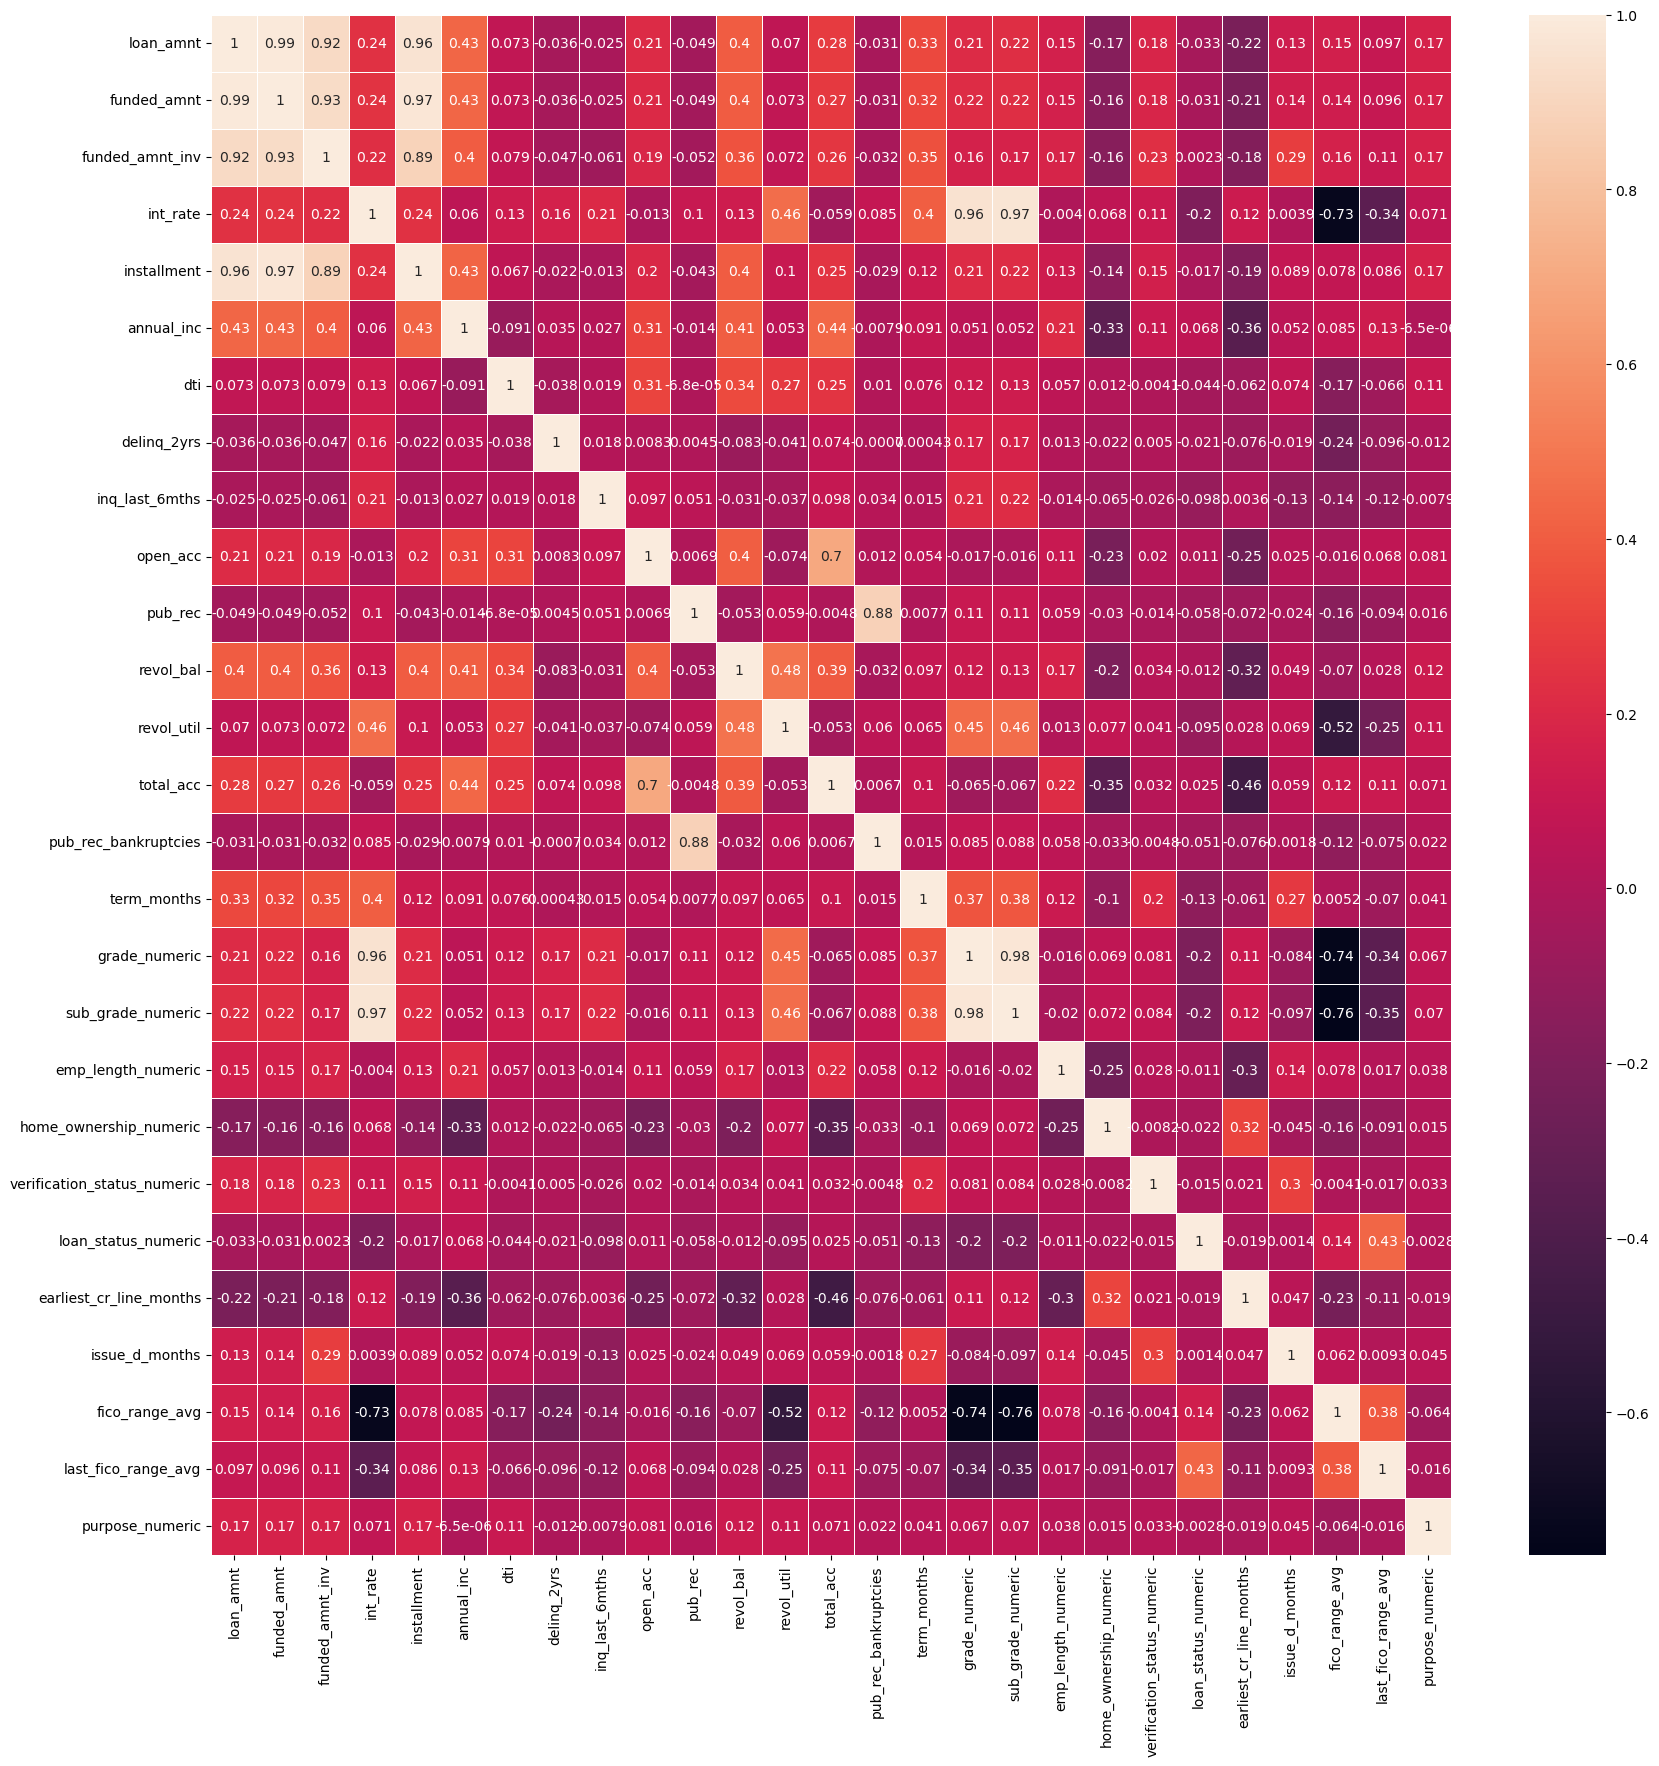

In [302]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr_df2, 
         xticklabels=corr_df2.columns, 
         yticklabels=corr_df2.columns, linewidths=.5, annot=True)
plt.show()

WNIOSKI Z OBSERWACJI WYNIKÓW TABELI KORELACJI:

Redundancja cech dotyczących kwot pożyczki:

-Zmienne takie jak loan_amnt, funded_amnt oraz funded_amnt_inv wykazują bardzo silną korelację. W praktyce warto rozważyć pozostawienie jednej z nich lub utworzenie wskaźnika pokrycia (np. stosunek sfinansowanej kwoty do żądanej kwoty), aby uprościć model.

Zbliżone wskaźniki oceny kredytowej:

-Wysoka korelacja między zmiennymi fico_range_avg a last_fico_range_avg, jak również między grade_numeric a sub_grade_numeric sugeruje, że niektóre informacje mogą być redundantne. Można rozważyć scalanie tych cech lub wybór tylko najbardziej reprezentatywnych, co może zmniejszyć ryzyko multikolinearności.

Związek między ratą, kwotą pożyczki i okresem kredytowania:

-Zmienna installment jest ściśle powiązana z loan_amnt oraz term_months, co wskazuje, że większe pożyczki i/lub dłuższy okres spłaty skutkują wyższymi ratami. Ta zależność może posłużyć do budowy zmiennych wskaźnikowych lub walidacji spójności danych.

Interakcja czynników ryzyka:

-Cecha dti (stosunek zadłużenia do dochodu) oraz zmienne dotyczące opóźnień (delinq_2yrs) i zapytań kredytowych (inq_last_6mths) warto zbadać pod kątem ich wpływu na ocenę ryzyka kredytowego. Ich korelacje z innymi zmiennymi, takimi jak total_acc czy open_acc, mogą dostarczyć informacji o jakości i stabilności kont kredytowych.

Multikolinearność:

-Silne korelacje między pewnymi zmiennymi (np. kwoty pożyczki i powiązane z nią fundusze) mogą prowadzić do problemów z multikolinearnością w modelach, szczególnie w regresji liniowej.

-Wdrożenie metod selekcji cech lub zastosowanie technik redukcji wymiarowości (np. PCA) może poprawić stabilność i interpretowalność modeli.

Optymalizacja inżynierii cech:

-Na podstawie analizy korelacji warto dokonać przeglądu istniejących cech i rozważyć konstruowanie nowych wskaźników, które lepiej oddadzą istotę zależności np. poprzez obliczenie stosunków lub różnic (np. wskaźnik pokrycia pożyczki, wskaźnik zadłużenia). Pozwoli to na wydobycie bardziej unikalnych sygnałów, które mogą zwiększyć wydajność modeli predykcyjnych.

Dalsze kroki walidacyjne:

-Przeprowadzenie walidacji krzyżowej z zastosowaniem różnych zestawów cech (z pełnym zestawem vs. zredukowanym o silnie skorelowane zmienne) pozwoli ocenić, która konfiguracja wpływa korzystnie na wyniki modeli.

-Testowanie modeli z metodami regularizacyjnymi (np. Ridge, Lasso) również pomoże w radzeniu sobie z problemem nadmiernej korelacji.

## 1. W jaki sposób wynik FICO wiąże się z prawdopodobieństwem spłacenia pożyczki przez pożyczkobiorcę?

### Tabela FICO Score

In [305]:
import pandas as pd

# Dane dla tabeli
data_FICO = {
    "Wynik FICO®": ["800+", "740 - 799", "670 - 739", "580 - 669", "< 580"],
    "Etykieta": ["Exceptional", "Very Good", "Good", "Fair", "Poor"],
    "Interpretacja słowna etykiety FICO®": [
        "• Znacznie powyżej średniego wyniku konsumentów w USA. Pokazuje wierzycielom, że jesteś wyjątkowym pożyczkobiorcą.",
        "• Powyżej średniego wyniku konsumentów w USA. Pokazuje wierzycielom, że jesteś bardzo wiarygodnym pożyczkobiorcą.",
        "• Blisko lub nieco powyżej średniego wyniku konsumentów w USA. Większość wierzycieli uznaje to za dobry wynik.",
        "• Poniżej średniego wyniku konsumentów w USA. Chociaż wielu wierzycieli zatwierdzi pożyczki przy tym wyniku.",
        "• Znacznie poniżej średniego wyniku konsumentów w USA. Pokazuje wierzycielom, że jesteś ryzykownym pożyczkobiorcą."
    ]
}

# Tworzenie DataFrame na potrzeby tabeli
df_FICO = pd.DataFrame(data_FICO)

# Wyświetlanie tabeli
from IPython.display import display
display(df_FICO.style.set_properties(**{'text-align': 'left'}).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'left')]}]
))

Wyżej znajduje się tabela z informacjami załączonymi do dokumentacji. Posłuży do określenia kategorii względem osięgniętego przez kredytobiorcę wyniku FICO.

In [307]:
df2['fico_range_avg'].describe()

count   42535.00
mean      715.05
std        36.19
min       612.00
25%       687.00
50%       712.00
75%       742.00
max       827.00
Name: fico_range_avg, dtype: float64

In [308]:
# W pierwszej kolejności zajmę się definiowaniem zakresów i etykiet dla przedziałów liczbowych

bins = [300, 579, 669, 739, 799, 850]  # Przedziały FICO
labels = ['Very Poor', 'Fair', 'Good', 'Very Good', 'Exceptional']  # Odpowiadające kategorie

# Tworzenie nowej kolumny z kategoriami
df2['FICO_Category'] = pd.cut(df2['fico_range_avg'], bins=bins, labels=labels, right=True, include_lowest=True)

# Wyświetlenie wynikowych danych
print(df2[['fico_range_avg', 'FICO_Category']].head(20))

# Zliczenie liczby klientów w każdej kategorii FICO
FICO_Category_counts = df2['FICO_Category'].value_counts()

print("\nLiczba klientów w każdej kategorii FICO:")
print(FICO_Category_counts)

    fico_range_avg FICO_Category
0           737.00          Good
1           742.00     Very Good
2           737.00          Good
3           692.00          Good
4           697.00          Good
5           732.00          Good
6           692.00          Good
7           662.00          Fair
8           677.00          Good
9           727.00          Good
10          697.00          Good
11          677.00          Good
12          712.00          Good
13          707.00          Good
14          722.00          Good
15          667.00          Fair
16          672.00          Good
17          762.00     Very Good
18          687.00          Good
19          757.00     Very Good

Liczba klientów w każdej kategorii FICO:
FICO_Category
Good           27846
Very Good      10171
Fair            3894
Exceptional      624
Very Poor          0
Name: count, dtype: int64


### [Wykres nr1] - Liczba klientów w grupie FICO

In [310]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

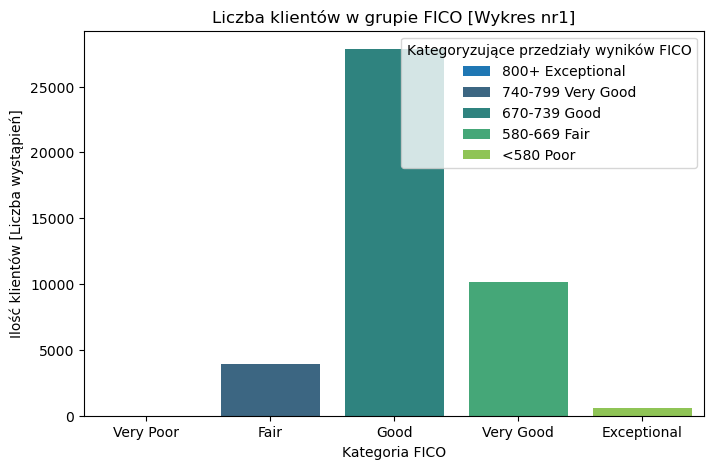

In [311]:
# Opcjonalna wizualizacja liczby wystąpień każdej kategorii
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df2, x='FICO_Category', palette='viridis')
plt.title('Liczba klientów w grupie FICO [Wykres nr1]')
plt.xlabel('Kategoria FICO')
plt.ylabel('Ilość klientów [Liczba wystąpień]')
legend_labels = [
    "800+ Exceptional",
    "740-799 Very Good",
    "670-739 Good",
    "580-669 Fair",
    "<580 Poor"
    ]
plt.legend(legend_labels, title="Kategoryzujące przedziały wyników FICO", loc="upper right")
plt.show()

In [312]:
# Wyrażam kategorie FICO numerycznie w nowej kolumnie: FICO_Category_numeric
mapping = {'Very Poor': 1, 'Fair': 2, 'Good': 3, 'Very Good': 4, 'Exceptional': 5}
df2['FICO_Category_numeric'] = df2['FICO_Category'].map(mapping)
df2['FICO_Category_numeric'] = df2['FICO_Category_numeric'].astype(int)
print(df2[['FICO_Category', 'FICO_Category_numeric']].head(20))

   FICO_Category  FICO_Category_numeric
0           Good                      3
1      Very Good                      4
2           Good                      3
3           Good                      3
4           Good                      3
5           Good                      3
6           Good                      3
7           Fair                      2
8           Good                      3
9           Good                      3
10          Good                      3
11          Good                      3
12          Good                      3
13          Good                      3
14          Good                      3
15          Fair                      2
16          Good                      3
17     Very Good                      4
18          Good                      3
19     Very Good                      4


In [313]:
# Globalne prawdopobieństwo na spłatę pożyczki. Przypomnijmy: 0 : niespłacona, 1: spłacona.
prob_of_loan_repay = df2['loan_status_numeric'].mean()
prob_of_loan_repay

0.8488068649347597

In [314]:
# Obliczanie średniego prawdopodobieństwa spłaty w każdej grupie.
FICO_CAT_prob_of_loan_repay = df2.groupby('FICO_Category', observed=False)['loan_status_numeric'].mean()
FICO_CAT_prob_of_loan_repay

FICO_Category
Very Poor      NaN
Fair          0.75
Good          0.84
Very Good     0.91
Exceptional   0.95
Name: loan_status_numeric, dtype: float64

In [315]:
# Przypisujemy obliczone wcześniej średnie prawdopodobieństwo do etykiet (grup) FICO tworząc nową kolumnę FICO_CAT_prob_of_loan_repay.
mapping = {'Very Poor': 0, 'Fair': 0.75, 'Good':  0.84, 'Very Good':  0.91, 'Exceptional': 0.95
           }

df2['FICO_CAT_prob_of_loan_repay'] = df2['FICO_Category'].map(mapping)
df2['FICO_CAT_prob_of_loan_repay'] = df2['FICO_CAT_prob_of_loan_repay'].astype(float)
df2['FICO_CAT_prob_of_loan_repay']

0       0.84
1       0.91
2       0.84
3       0.84
4       0.84
        ... 
42531   0.84
42532   0.84
42533   0.84
42534   0.91
42535   0.91
Name: FICO_CAT_prob_of_loan_repay, Length: 42535, dtype: float64

In [316]:
# Sprawdzam korelację między kategorią FICO, wynikiem FICO oraz średnim prawdopodobieństwem spłaty w zakresie grup.
FICO_corr = df2[['FICO_Category_numeric', 'FICO_CAT_prob_of_loan_repay', 'fico_range_avg']].corr()

FICO_corr

FICO_Category_numeric  \
FICO_Category_numeric                         1.00   
FICO_CAT_prob_of_loan_repay                   0.99   
fico_range_avg                                0.86   

                             FICO_CAT_prob_of_loan_repay  fico_range_avg  
FICO_Category_numeric                               0.99            0.86  
FICO_CAT_prob_of_loan_repay                         1.00            0.85  
fico_range_avg                                      0.85            1.00

### [Wykres nr2] Związek między kategorią FICO a prawdopodobieństwem spłaty

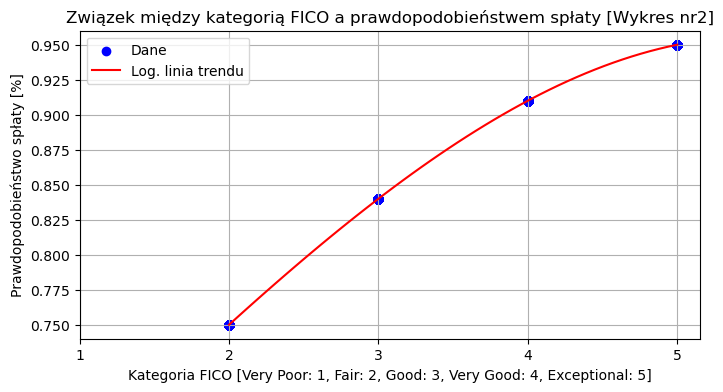

In [318]:
plt.figure(figsize=(8, 4))
plt.scatter(df2['FICO_Category_numeric'], df2['FICO_CAT_prob_of_loan_repay'], color='blue', label='Dane')

# Obliczanie linii trendu
coefficients = np.polyfit(df2['FICO_Category_numeric'], df2['FICO_CAT_prob_of_loan_repay'], 3)
trend_line = np.poly1d(coefficients)

# Dodawanie linii trendu
x_values = np.linspace(min(df2['FICO_Category_numeric']), max(df2['FICO_Category_numeric']))
plt.plot(x_values, trend_line(x_values), color='red', label='Log. linia trendu')

# Ustawienia wykresu
plt.title('Związek między kategorią FICO a prawdopodobieństwem spłaty [Wykres nr2]')
plt.xlabel('Kategoria FICO [Very Poor: 1, Fair: 2, Good: 3, Very Good: 4, Exceptional: 5]')
plt.ylabel('Prawdopodobieństwo spłaty [%]')
plt.xticks(ticks=[1, 2, 3, 4, 5])
plt.grid()
plt.legend()
plt.show()

### [Wykres nr3] Związek między FICO Score a prawdopodobieństwem spłaty

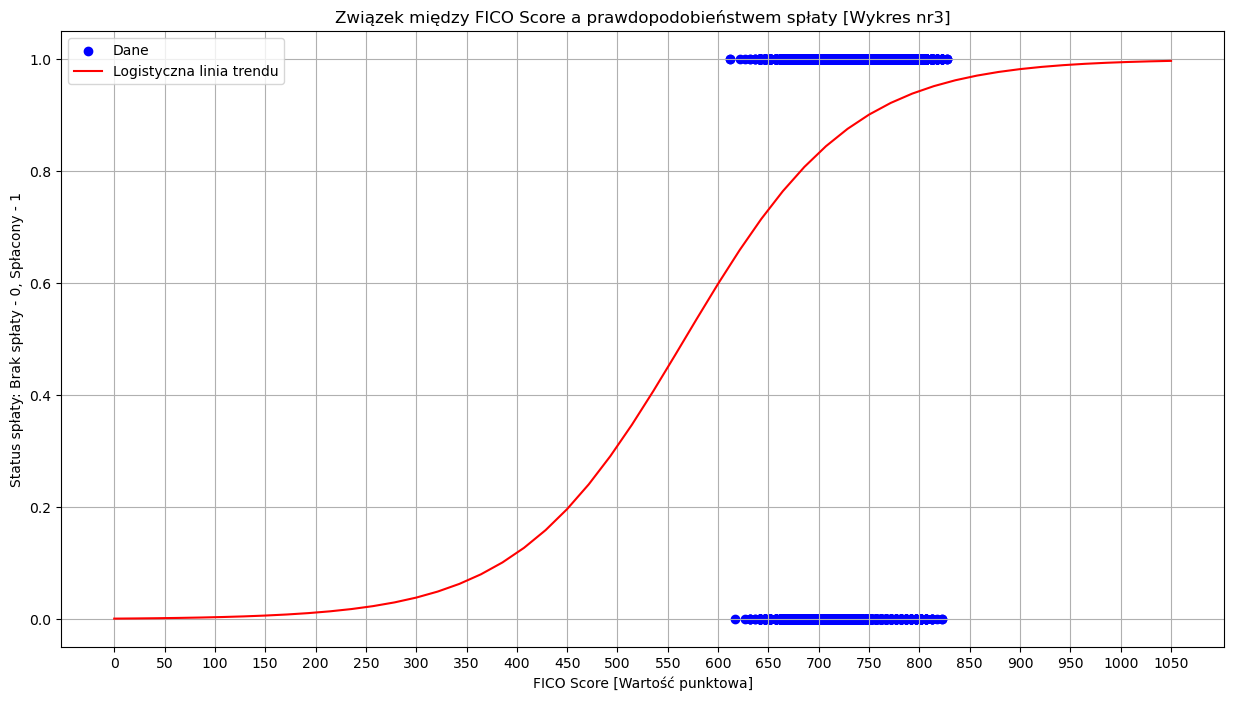

In [320]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Dane wejściowe
x = df2['fico_range_avg'].values.reshape(-1, 1)  # Wartości FICO
y = df2['loan_status_numeric'].values  # Prawdopodobieństwo spłaty (0 lub 1)

# Tworzenie modelu regresji logistycznej
logistic_model = LogisticRegression()
logistic_model.fit(x, y)

# Przewidywanie wartości prawdopodobieństwa
x_fit = np.linspace(0, 1050, 50).reshape(-1, 1)  # Zakres wartości FICO
y_fit = logistic_model.predict_proba(x_fit)[:, 1]  # Prawdopodobieństwo spłaty

# Tworzenie wykresu
plt.figure(figsize=(15, 8))
plt.scatter(df2['fico_range_avg'], df2['loan_status_numeric'], color='blue', label='Dane')
plt.plot(x_fit, y_fit, color='red', label='Logistyczna linia trendu')

# Ustawienia wykresu
plt.title('Związek między FICO Score a prawdopodobieństwem spłaty [Wykres nr3]')
plt.xlabel('FICO Score [Wartość punktowa]')
plt.ylabel('Status spłaty: Brak spłaty - 0, Spłacony - 1')
plt.xticks(range(0, 1051, 50))
plt.grid()
plt.legend()
plt.show()


### [Wykres nr4] Rozkład FICO Score w poszczególnych ratingach FICO

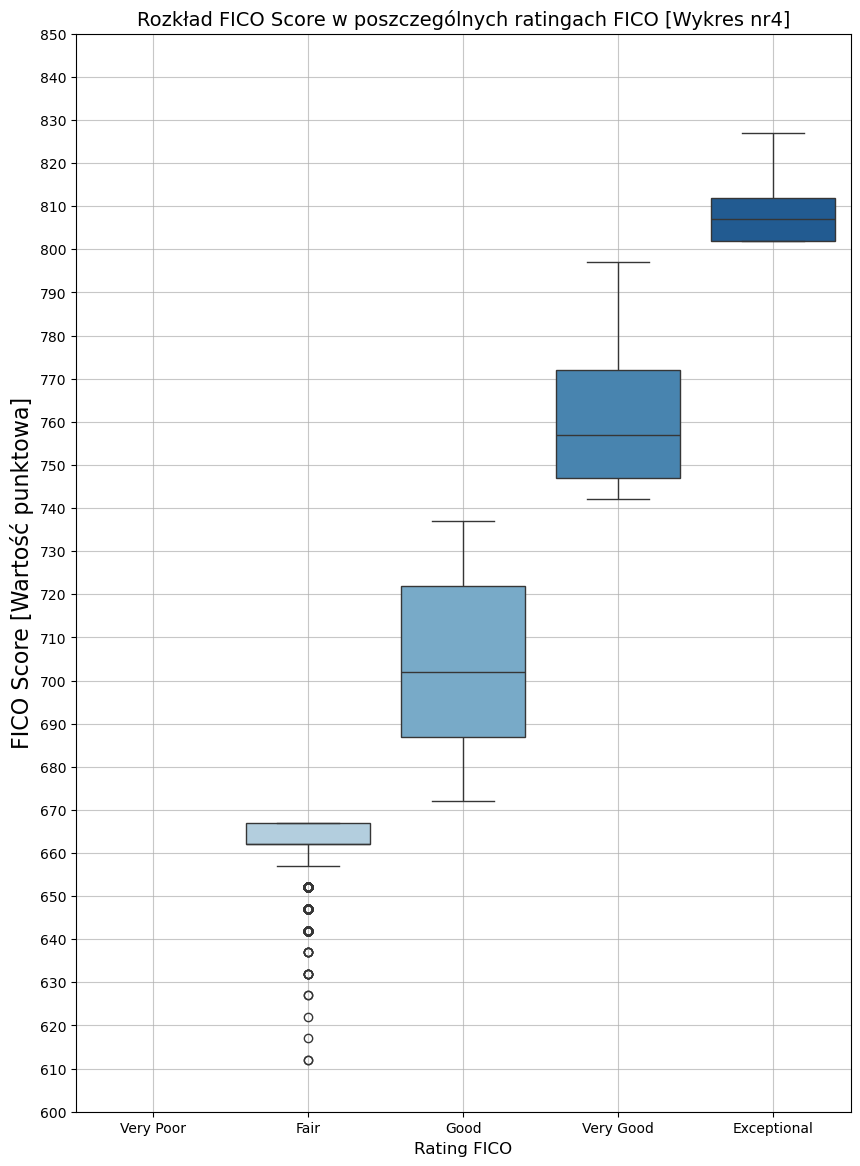

In [322]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 14))
sns.boxplot(x='FICO_Category', y='fico_range_avg', data=df2, palette='Blues')

plt.title('Rozkład FICO Score w poszczególnych ratingach FICO [Wykres nr4]', fontsize=14)
plt.xlabel('Rating FICO', fontsize=12)
plt.ylabel('FICO Score [Wartość punktowa]', fontsize=16)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.yticks(range(600, 851, 10))
plt.grid(axis='x', linestyle='-', alpha=0.7)

plt.show()


### [Wykres nr5] Rozkład wyników FICO w zależności od statusu spłaty

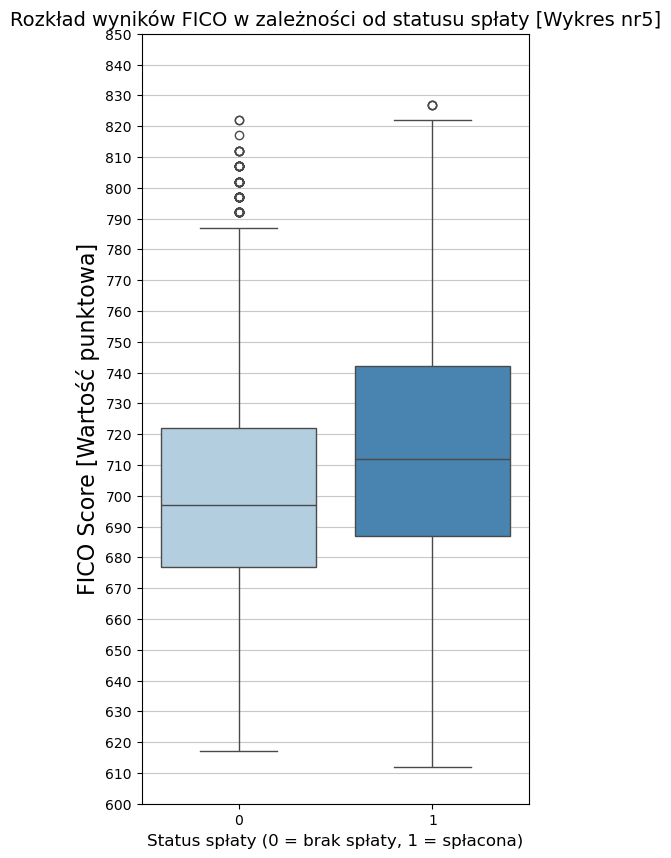

In [324]:
plt.figure(figsize=(5, 10))
sns.boxplot(x='loan_status_numeric', y='fico_range_avg', data=df2, palette='Blues')

plt.title('Rozkład wyników FICO w zależności od statusu spłaty [Wykres nr5]', fontsize=14)
plt.xlabel('Status spłaty (0 = brak spłaty, 1 = spłacona)', fontsize=12)
plt.ylabel('FICO Score [Wartość punktowa]', fontsize=16)
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.yticks(range(600, 851, 10))
plt.show()

### Wnioski Ad.1

1. Jak można zauważyć na wykresie nr1, największą grupę kredytobiorców tworzą osoby które uzyskały wynik "Good" w ratingu FICO, znajdując się w zakresie punktów 670-739. Mediana dla raitingu "Good' wynosi 702 punkty.
2. Brak jest przypadków osób starających się o pożyczkę, króre osiągneły rating "Very Poor" osiągając mniej niż 580 punktów.
3. Jak wynika z wykresu nr 2 i nr 3 prawodpodobieństwo spłaty pożyczki rośnie wraz z wynikiem FICO. W tej ocenie pomagają zamieszczone na wykresach linie logistyczne trendu.
4. Z wykresu nr 3 możemy odczytać szacunkowe wartości prawdopodobieństwa spłaty pożyczki dla wartości FICO z poza zakresu występujących przypadków w zbiorze danych.
5. Biorąc pod uwagę szacunek wskazany przez linię trendu w wykresie 3, można wyraźnie wyszczególnić 2 punkty - prawdopodobieństwo spłacenia 20% dla wyniku FICO 450 punktów. Następny taki punkt przecina następujące wartości - 60% prawdopodobieństwa przy 600 punktach FICO. To oznacza, że w zakresie 450-600 punktów FICO, idąc w kierunku malejących wartości, zauważamy spadek prawdopodobieństwa spłaty pożyczki aż o 40%.
6. Warto zaznaczyć, że w danych nie występuje żadnen pożyczkobiorca któremu udzielono kredyt i który jednocześnie uzyskał wynik FICO poniżej 600 punktów, a to z kolei klasyfikowałoby taki przypadek do ratingu "Poor" - dokładniej wynik poniżej 580 punktów z prawdopodobieństwem spłaty poniżej 60%.
7. Z wykresów 2 i 3 za pomocą linii trendu możemy również zbadać dynamikę zmian prawdopodobieństwa spłacenia pożyczki do osiąganego wyniku FICO.
8. Odnosząc się jednocześnie do punktu 5 oraz 7 powyższych wniosków, przyrost prawopodobieństwa spłaty pożyczki w zakresie punktów 600-750 (z tą samą wielkością przedziału co 450 do 600) wynosi ok 30%. Dowodzi to zmianie dynamiki przyrostu prawdopodobieństwa do wysokości wyniku FICO.
9. Idąc dalej, zauważamy jednocześnie adnotując do punktu wniosków 5 i 8, że punktem zmniejszenia dynamiki przyrostu spłaty kredytu jest wartość 600 na osi X oraz 60% na osi Y. Żeby temu bezsprzecznie dowieźć należałoby wyznaczyć prostą styczną z punktem na linii trendu o współrzędnych x = 600 oraz y 0.6 oraz wyliczyć kąt nachylenia tej stycznej, a następnie powtórzyć operację do stycznej punktu na linii trendu wyznaczonego wartością x = 650.
10. Wpływ na zmianę dynamiki będzie również miało zmniejszanie się zakresu dla kolenych ratingów FICO, kolejno [Fair: 89 punktów, Good: 69 punktów, Very Good: 59 punktów]
11. Wykres pudełkowy nr 4 wizualizuje rozkład osiąganych wyników FICO w poszczególnych ratingach. Gdzie można zauważyć w grupie Fair bardzo wąski rozrzut oraz wartości odstające niewystępujące w innych grupach. W przypadku najliczniejszej grupy 'Good' rozkład wyników FICO jest zblizony do rozkładu normalnego. Rozkład grupy 'Very Good' również nie posiada wartości odstających, z kolei pierwszy kwartyl jest dosyć wąski a mediana znacznie poniżej środka przedziału w tej grupie punktowej. Grupa Exceptional charakteryzuje się brakiem kwartyla pierwszego w swoim rozkładzie, z kolei 75% wartości oraz mediana mieści się w zakresie zaledwie 10-15 punktów FICO, tuż nad wynikiem 800 punktów w skali FICO.
12. Wykres pudełkowy nr 5 wizualizuje rozkład osiąganych wyników FICO w przypadkach braku spłaty oraz spłaty pożyczki. Mediany między tymi dwoma boxami są niewielkie, ponieważ ich różnica wynosi zaledwie 15 punktów. Niemniej, zakresy punktowe FICO dla sytuacji spłaty pożyczki są wyższe i szersze dla kwartyla 2 i 3 w porównaniu do pudełka z brakiem spłaty, co świadczy w przypadku globalnego prawdopodobieństwa i potwierdza tezę, że im wyższy wynik FICO tym prawdopodobieństwo spłaty jest wyższe.


## 2. W jaki sposób wiek kredytowy wiąże się z prawdopodobieństwem niewykonania zobowiązania i czy ryzyko to jest niezależne lub związane z wynikiem FICO

In [328]:
df2['credit_age_months'] = df2['issue_d_months'] - df2['earliest_cr_line_months']
df2['credit_age_months']

0       323.00
1       152.00
2       121.00
3       190.00
4       191.00
         ...  
42531   109.00
42532   109.00
42533   109.00
42534   109.00
42535   109.00
Name: credit_age_months, Length: 42535, dtype: float64

In [329]:
# Obliczanie średniego prawdopodobieństwa spłaty w każdej grupie.
CREDIT_AGE_prob_of_loan_NOrepay = 1 - df2.groupby('credit_age_months', observed=False)['loan_status_numeric'].mean()
CREDIT_AGE_prob_of_loan_NOrepay

credit_age_months
6.00     0.25
7.00     0.00
8.00     0.43
9.00     0.50
10.00    0.50
         ... 
657.00   0.00
673.00   0.00
684.00   0.00
725.00   0.00
785.00   0.00
Name: loan_status_numeric, Length: 560, dtype: float64

In [330]:
mapping = CREDIT_AGE_prob_of_loan_NOrepay.to_dict()

# Dodanie nowej kolumny do df2 na podstawie mapowania
df2['CREDIT_AGE_prob_of_loan_NOrepay'] = df2['credit_age_months'].map(mapping)
df2['CREDIT_AGE_prob_of_loan_NOrepay']

0       0.17
1       0.14
2       0.18
3       0.16
4       0.18
        ... 
42531   0.12
42532   0.12
42533   0.12
42534   0.12
42535   0.12
Name: CREDIT_AGE_prob_of_loan_NOrepay, Length: 42535, dtype: float64

### [Wykres nr.6] Prawdopodobieństwo nie spłacenia w grupach FICO do wieku kredytowego

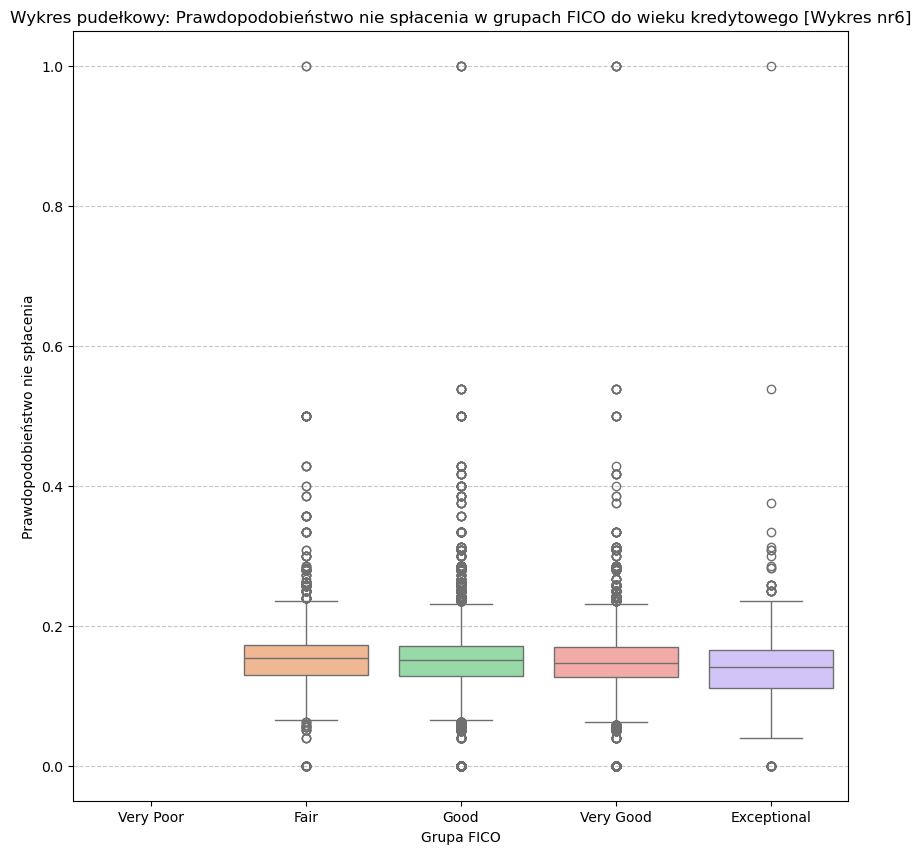

In [332]:
plt.figure(figsize=(10, 10))
sns.boxplot(x="FICO_Category", y="CREDIT_AGE_prob_of_loan_NOrepay", data=df2, palette="pastel")

plt.title("Wykres pudełkowy: Prawdopodobieństwo nie spłacenia w grupach FICO do wieku kredytowego [Wykres nr6]")
plt.xlabel("Grupa FICO")
plt.ylabel("Prawdopodobieństwo nie spłacenia")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


### [Wykres nr.7] Wykres rozrzutu: Wiek kredytowy a prawdopodobieństwo nie spłacenia

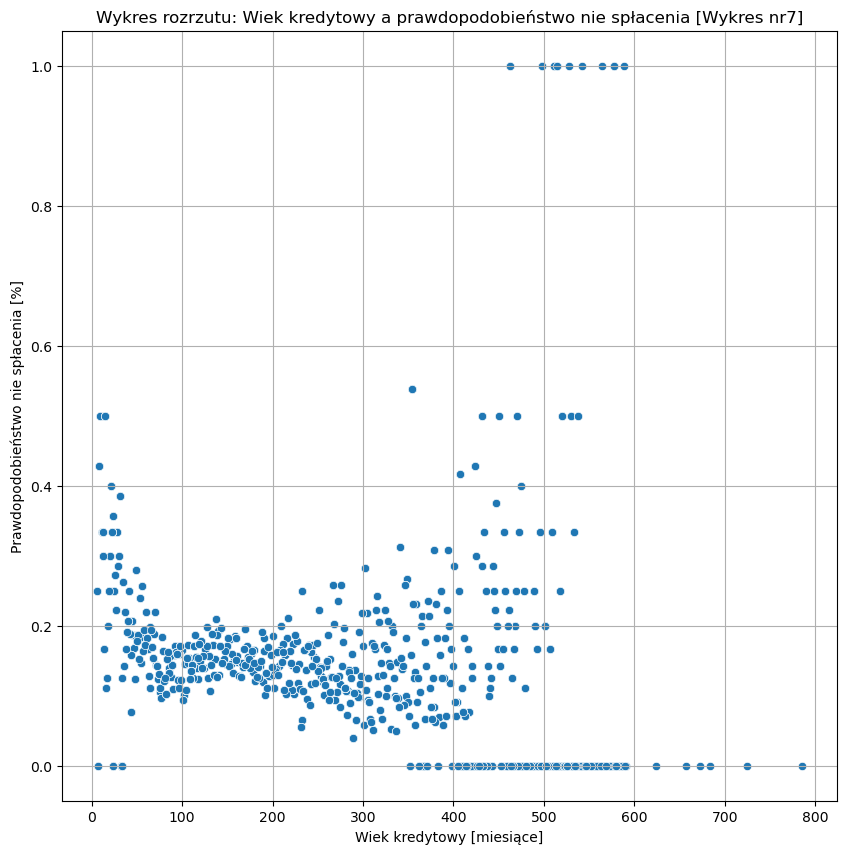

In [334]:
# Wykres rozrzutu (scatter plot)
plt.figure(figsize=(10, 10))
sns.scatterplot(x="credit_age_months", y="CREDIT_AGE_prob_of_loan_NOrepay", data=df2)

plt.title("Wykres rozrzutu: Wiek kredytowy a prawdopodobieństwo nie spłacenia [Wykres nr7]")
plt.xlabel("Wiek kredytowy [miesiące]")
plt.ylabel("Prawdopodobieństwo nie spłacenia [%]")
plt.grid(True)

plt.show()

### [Wykres nr8] Rozkład prawdopodobieństwa niewypłacalności zależnego od wieku kredytowego w przypadku niespłacenia lub spłacenia pożyczki

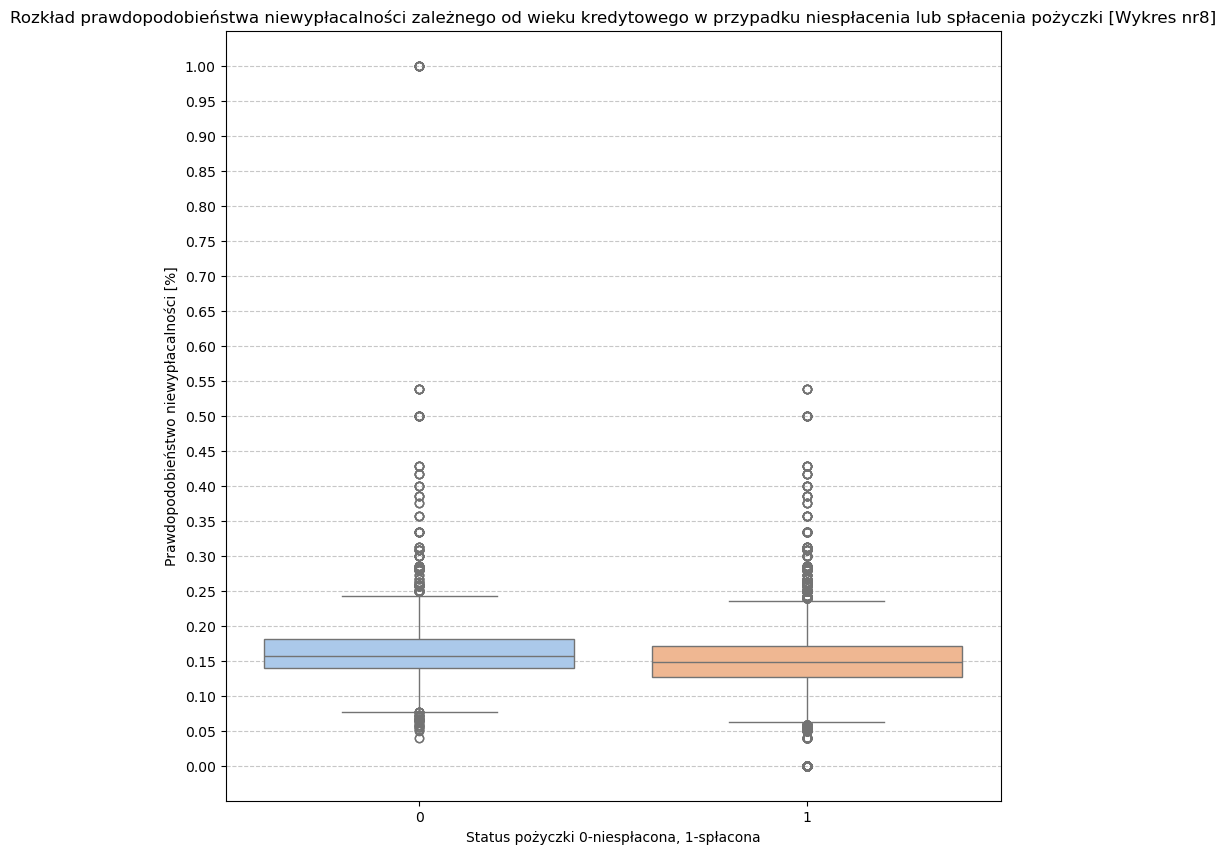

In [336]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(x="loan_status_numeric", y="CREDIT_AGE_prob_of_loan_NOrepay", data=df2, palette="pastel")

plt.title("Rozkład prawdopodobieństwa niewypłacalności zależnego od wieku kredytowego w przypadku niespłacenia lub spłacenia pożyczki [Wykres nr8]")
plt.xlabel("Status pożyczki 0-niespłacona, 1-spłacona")
plt.ylabel("Prawdopodobieństwo niewypłacalności [%]")
plt.yticks([i * 0.05 for i in range(21)])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [337]:
# Interesujący jest wynik wykresu punktowego dla przedziału wieku kredytowego 400-500 miesięcy dla wartości prawdpoodobieństwa niespłacenia.
count_of_zeros = (df2['CREDIT_AGE_prob_of_loan_NOrepay'] == 0).sum()
print(f"Liczba wierszy z wartością 0: {count_of_zeros}")

Liczba wierszy z wartością 0: 395


In [338]:
CREDIT_AGE_corr = df2[['FICO_Category_numeric', 'credit_age_months', 'CREDIT_AGE_prob_of_loan_NOrepay']].corr(method='spearman')
CREDIT_AGE_corr

FICO_Category_numeric  credit_age_months  \
FICO_Category_numeric                             1.00               0.23   
credit_age_months                                 0.23               1.00   
CREDIT_AGE_prob_of_loan_NOrepay                  -0.07              -0.19   

                                 CREDIT_AGE_prob_of_loan_NOrepay  
FICO_Category_numeric                                      -0.07  
credit_age_months                                          -0.19  
CREDIT_AGE_prob_of_loan_NOrepay                             1.00

In [339]:
# Widać wyraźnie na wykresie pudełkowym rosnące mediany wieku kredytowego dla kolejnych grup FICO.
mediany1 = df2.groupby("FICO_Category", observed=False)["credit_age_months"].median().reset_index()
print(mediany1)

  FICO_Category  credit_age_months
0     Very Poor                NaN
1          Fair             129.00
2          Good             143.00
3     Very Good             175.00
4   Exceptional             223.00


In [340]:
mediany2 = df2.groupby("FICO_Category", observed=False)["CREDIT_AGE_prob_of_loan_NOrepay"].median().reset_index()
print(mediany2)

  FICO_Category  CREDIT_AGE_prob_of_loan_NOrepay
0     Very Poor                              NaN
1          Fair                             0.15
2          Good                             0.15
3     Very Good                             0.15
4   Exceptional                             0.14


In [341]:
combined_df = pd.concat([mediany1, mediany2], axis=1)
combined_df

FICO_Category  credit_age_months FICO_Category  \
0     Very Poor                NaN     Very Poor   
1          Fair             129.00          Fair   
2          Good             143.00          Good   
3     Very Good             175.00     Very Good   
4   Exceptional             223.00   Exceptional   

   CREDIT_AGE_prob_of_loan_NOrepay  
0                              NaN  
1                             0.15  
2                             0.15  
3                             0.15  
4                             0.14

### Wnioski Ad2.

1. Wykres pudełkowy nr 6 wskazuje na bardzo niewielki wpływ zarówno wyniku FICO jak też długości historii kredytowej, na to czy pożyczka zostanie spłacona czy nie.
2. Prawdopodobieństwo niespłacenia pożyczki dla trzech grup FICO wynosi 15%, jedynie dla grupy "Exceptional" wynosi ona 14%, ale to zaledwie 1% różnicy.
3. Mimo iż mediana wieku kredytowego kredytobiorów zakwalifikowanych do poszczególnych grup FICO rośnie, co wskazują 'mediany1', to ten wzrost nie wpływa na zmianę mediany prawdopodobieństwa spłaty 'mediana2'.
4. Wynik korelacji między trzema zmiennymi w tym przypadku 'FICO_Category_numeric', 'credit_age_months', 'CREDIT_AGE_prob_of_loan_NOrepay' jest bardzo słaby, jest to potwierdzenie wyników które ukazały wykresy.
5. Większą różnicę można zauważyć przy rozrzucie. Rozrzut można dostrzec zarówno na wykresie pudełkowym jak też na wykresie punktowym. Dokładniej natomiast przedstawia to wykres punktowy, w czterech kierunkach.
6. Rozrzut w przedziale do 80 miesięcy wieku kredytowego jest dosyć szeroki w zakresie prawdopodobieństwa niespłacalności między 15% a 40%, jednakże najbardziej skupiony jest w przedziale wartości prawdopodobieństwa 15-20% oraz wieku 60-80 miesięcy.
7. Rozrzut w przedziale od 100 do 250 miesięcy wieku kredytowego jest całkiem uporządkowany, bardziej skupiony (praktycznie bez żadnych odchyleń) w zakresie 15-20% prawdopodobieństwa niespłacalności.
8. Rozrzut w przedziale od 250 do 500 miesięcy wieku kredytowego staje się coraz bardziej rozproszony oraz rzadszy w kierunku rosnących wartości osi x i y.
9. Bardzo charakterystyczny jest przedział od 400 do 600 miesięcy wieku kredytowego. W tym okresie widać grupę (jak dużo, to wymaga głębszego wejścia w analizę tego podzbioru) przypadków które wykazują 0% ryzyka niespłacalności.

## 3. W jaki sposób status kredytu hipotecznego na dom wiąże się z prawdopodobieństwem niewypłacalności?

In [345]:
# Obliczanie średniego prawdopodobieństwa spłaty w każdej grupie.
HOME_OWN_prob_of_loan_NOrepay = 1 - df2.groupby('home_ownership_numeric', observed=False)['loan_status_numeric'].mean()
HOME_OWN_prob_of_loan_NOrepay.describe()

count   5.00
mean    0.16
std     0.03
min     0.12
25%     0.14
50%     0.15
75%     0.16
max     0.21
Name: loan_status_numeric, dtype: float64

In [346]:
mapping = HOME_OWN_prob_of_loan_NOrepay.to_dict()

# Dodanie nowej kolumny do df2 na podstawie mapowania
df2['HOME_OWN_prob_of_loan_NOrepay'] = df2['home_ownership_numeric'].map(mapping)
df2['HOME_OWN_prob_of_loan_NOrepay']

0       0.16
1       0.16
2       0.16
3       0.16
4       0.16
        ... 
42531   0.16
42532   0.16
42533   0.16
42534   0.12
42535   0.14
Name: HOME_OWN_prob_of_loan_NOrepay, Length: 42535, dtype: float64

In [347]:
HOME_corr = df2[['home_ownership_numeric', 'HOME_OWN_prob_of_loan_NOrepay']].corr()

HOME_corr

home_ownership_numeric  \
home_ownership_numeric                           1.00   
HOME_OWN_prob_of_loan_NOrepay                    0.90   

                               HOME_OWN_prob_of_loan_NOrepay  
home_ownership_numeric                                  0.90  
HOME_OWN_prob_of_loan_NOrepay                           1.00

### [Wykres nr.9] Średnie prawdopodobieństwo niewypłacalności a status mieszkaniowy

C:\Users\Krzysztof\AppData\Local\Temp\ipykernel_2796\518177653.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([ownership_labels[key] for key in sorted(ownership_labels.keys())])


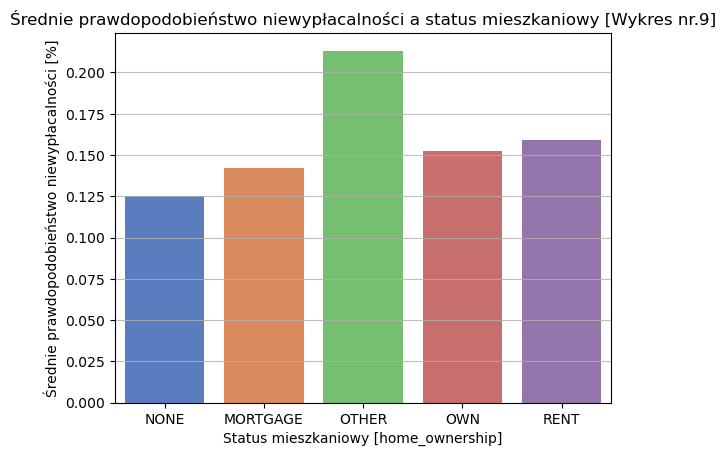

In [349]:
ownership_labels = {0:'NONE', 1:'MORTGAGE', 2:'OTHER', 3:'OWN', 4:'RENT'}

ax = sns.barplot(x="home_ownership_numeric", y="HOME_OWN_prob_of_loan_NOrepay", data=df2, palette="muted")
plt.title("Średnie prawdopodobieństwo niewypłacalności a status mieszkaniowy [Wykres nr.9]")
plt.xlabel("Status mieszkaniowy [home_ownership]")
plt.ylabel("Średnie prawdopodobieństwo niewypłacalności [%]")
plt.grid(axis="y", linestyle="-", alpha=0.8)
ax.set_xticklabels([ownership_labels[key] for key in sorted(ownership_labels.keys())])

plt.show()

### [Wykres nr.10] Rozkład osób w grupach o statusie mieszkaniowym

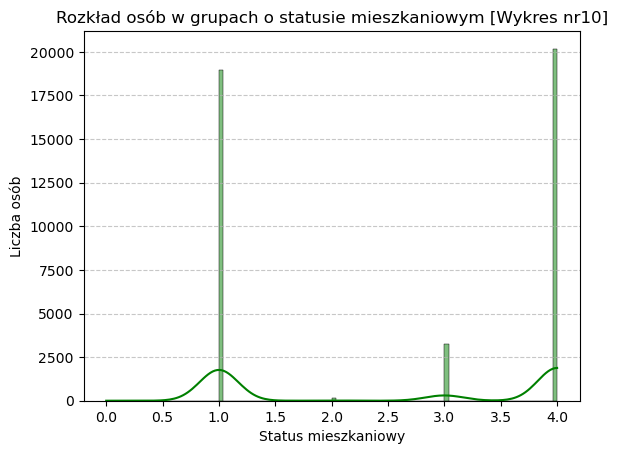

home_ownership_numeric
4    20181
1    18959
3     3251
2      136
0        8
Name: count, dtype: int64


In [351]:
sns.histplot(df2['home_ownership_numeric'], bins=100, kde=True, color='green')

plt.title("Rozkład osób w grupach o statusie mieszkaniowym [Wykres nr10]")
plt.xlabel("Status mieszkaniowy")
plt.ylabel("Liczba osób")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(df2['home_ownership_numeric'].value_counts())

### Wnioski Ad.3

Wnioski:

1. Maksymalna aplituda zmian w prawdopodieństwie niespłacenia pożyczki wynosi 11% i dotyczy ona grupy "NONE" oraz "OTHER".

2. Najniższe prawdopodobieństwo niewypłacalności: Grupa "NONE" ma najniższe prawdopodobieństwo niewykonania zobowiązania, wynoszące około 12,5%. Można wnioskować, że zarówno brak własności czy też zobowiązania na nieruchomość zmniejsza prawdopodobieństwo nie spłacenia pożyczki.

3. Najwyższe prawdopodobieństwo niewypłacalności: Grupa OTHER (wartość 2) wykazuje najwyższe prawdopodobieństwo niewypłacalności (21%). Grupa "OTHER" nie jest szczegółowo opisana, ale można założyć, że nie jest to sytuacja, która zabezpiecza pożyczkobiorcę na wypadek niewypłacalności. Wychodzi na to, że lepszą sytuacją jest, kiedy mamy jasno określone źródła obciążenia budżetu, w tym przypadku z tytułu najmu lub kredytu hipotecznego.

4. Hipoteka (MORTGAGE) a wynajem (RENT): Klienci posiadający kredyt hipoteczny (MORTGAGE) mają prawdopodobieństwo niewypłacalności wynoszące około 14%, podczas gdy klienci wynajmujący (RENT) mają bardzo zbliżone ryzyko niewypłacalności na poziomie 16%. Wskazuje to, że posiadanie hipoteki niekoniecznie obniża ryzyko w porównaniu z wynajmem, ale jest niższe, prawdopodobnie dlatego, że hipoteka jest również zabezpieczona pewnym kapitałem.

5. Własność (OWN): Grupa OWN (wartość 3) ma ryzyko wynoszące 15%, co plasuje ją pośrodku między grupami MORTGAGE a RENT. Sugeruje to, że posiadanie domu na własność bez kredytu hipotecznego może wiązać się z umiarkowanym ryzykiem.

## 4. W jaki sposób roczny dochód wiąże się z prawdopodobieństwem niewykonania zobowiązania?

In [355]:
print(df2['annual_inc'].describe())

count     42535.00
mean      69135.60
std       64093.41
min        1896.00
25%       40000.00
50%       59000.00
75%       82500.00
max     6000000.00
Name: annual_inc, dtype: float64


Widać wartośc mocno odstającą i zdecydowanie poza skalą co może zaburzać wizualizację rozkładu na wykresach.

In [357]:
from scipy.stats import zscore

# Obliczenie Z-score dla kolumny annual_inc
df2['z_score'] = zscore(df2['annual_inc'])

# Filtrowanie danych, które mają Z-score w zakresie [-3, 3]
df2_cleaned_annual_inc = df2[(df2['z_score'] > -3) & (df2['z_score'] < 3)]

print("Liczba danych po usunięciu outlierów Z-score:", df2_cleaned_annual_inc.shape[0])

Liczba danych po usunięciu outlierów Z-score: 42194


### [Wykres nr.11] Rozkład rocznych dochodów pożyczkobiorców na oryginalnym vs oczyszczonym zbiorze. 

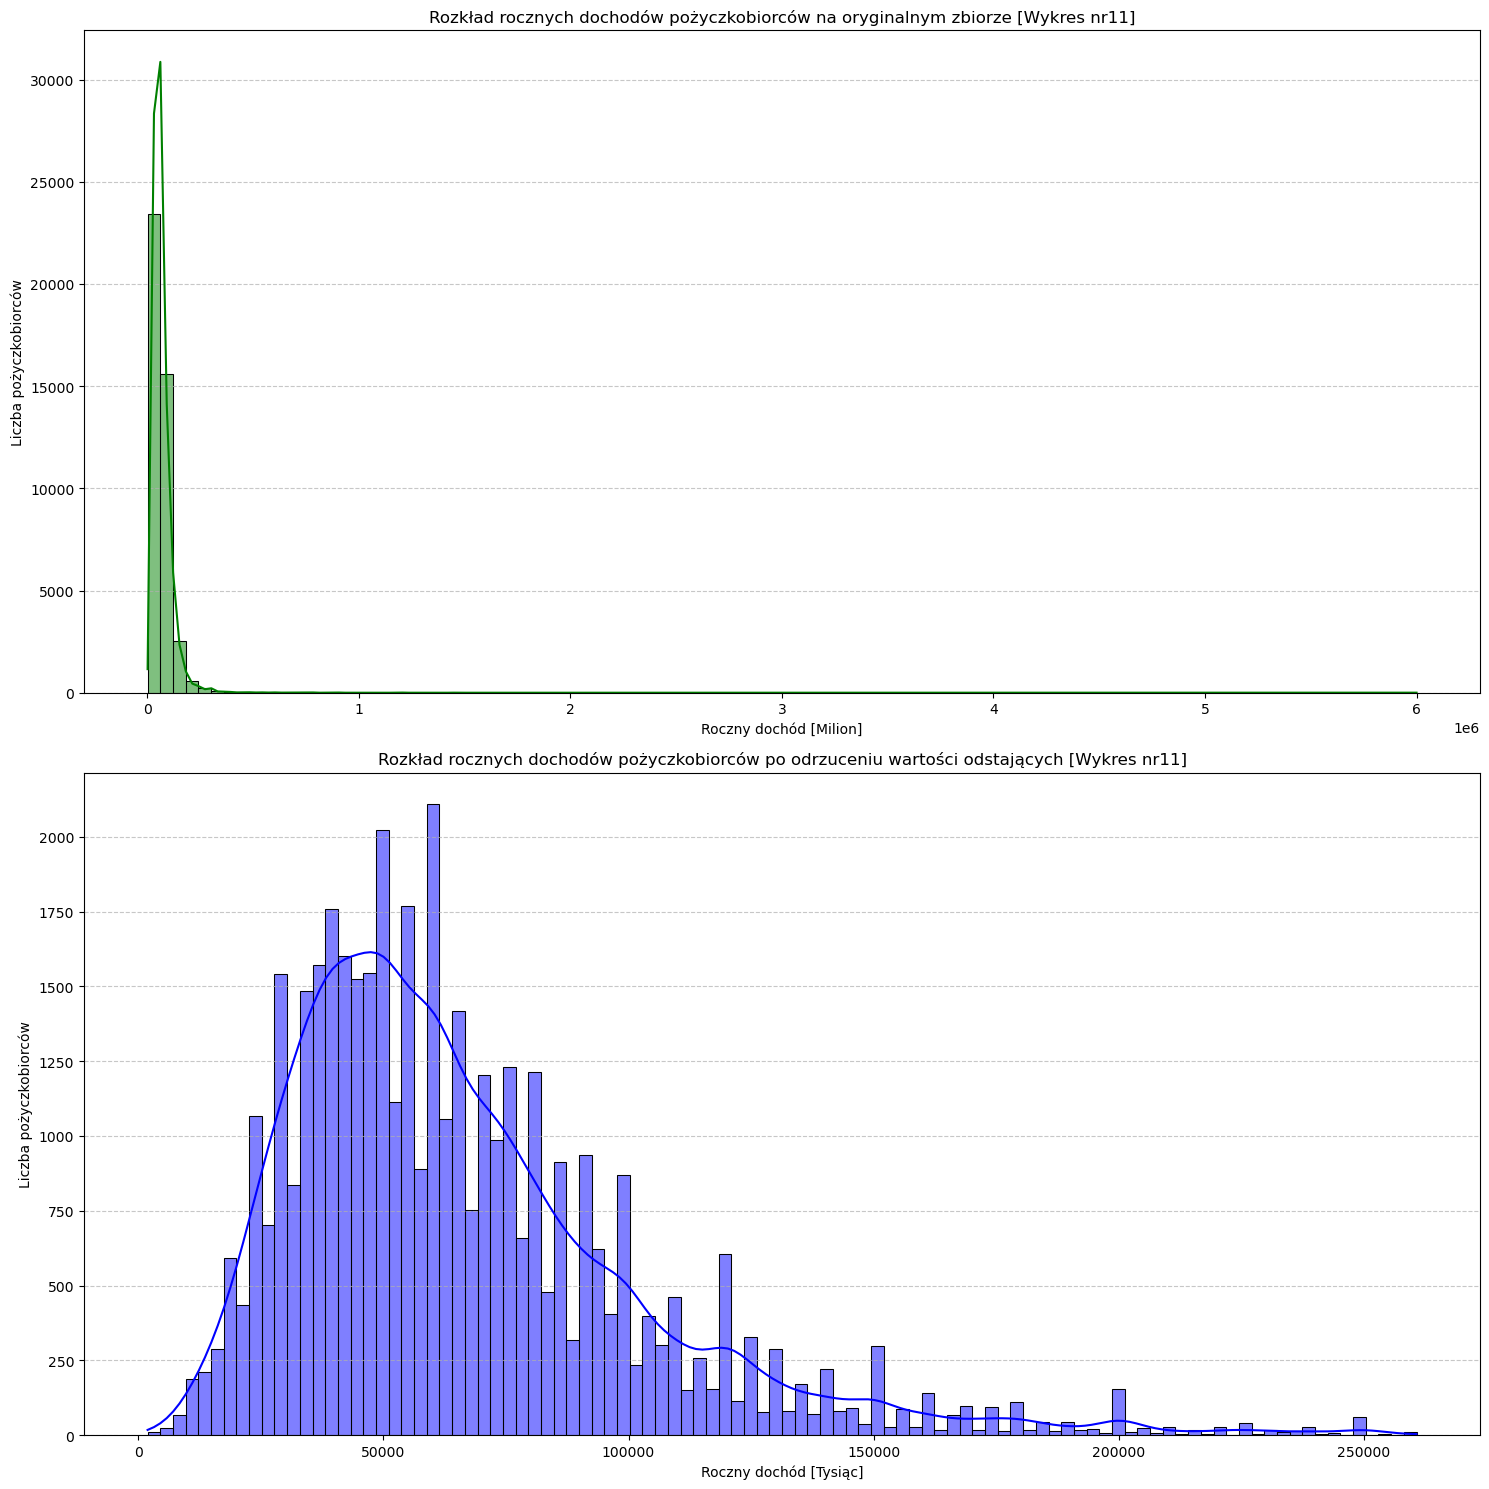

In [359]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 1, figsize=(15, 15))

sns.histplot(df2['annual_inc'], bins=100, kde=True, color='green', ax=axes[0])
axes[0].set_title("Rozkład rocznych dochodów pożyczkobiorców na oryginalnym zbiorze [Wykres nr11]")
axes[0].set_xlabel("Roczny dochód [Milion]")
axes[0].set_ylabel("Liczba pożyczkobiorców")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

sns.histplot(df2_cleaned_annual_inc['annual_inc'], bins=100, kde=True, color='blue', ax=axes[1])
axes[1].set_title("Rozkład rocznych dochodów pożyczkobiorców po odrzuceniu wartości odstających [Wykres nr11]")
axes[1].set_xlabel("Roczny dochód [Tysiąc]")
axes[1].set_ylabel("Liczba pożyczkobiorców")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [360]:
print(df2_cleaned_annual_inc['annual_inc'].describe())

count    42194.00
mean     65970.84
std      36783.28
min       1896.00
25%      40000.00
50%      58000.00
75%      81203.00
max     260735.00
Name: annual_inc, dtype: float64


In [361]:
# Obliczanie średniego prawdopodobieństwa spłaty w każdej grupie.
ANNUAL_INC_prob_of_loan_NOrepay = 1 - df2_cleaned_annual_inc.groupby('annual_inc', observed=False)['loan_status_numeric'].mean()
ANNUAL_INC_prob_of_loan_NOrepay

annual_inc
1896.00     0.00
2000.00     1.00
3300.00     0.00
3500.00     0.00
3600.00     1.00
            ... 
255000.00   0.00
258000.00   0.00
259000.00   0.00
260000.00   0.00
260735.00   0.00
Name: loan_status_numeric, Length: 5451, dtype: float64

In [362]:
mapping = ANNUAL_INC_prob_of_loan_NOrepay.to_dict()

# Dodanie nowej kolumny do df2 na podstawie mapowania
df2_cleaned_annual_inc['ANNUAL_INC_prob_of_loan_NOrepay'] = df2_cleaned_annual_inc['annual_inc'].map(mapping)
df2_cleaned_annual_inc['ANNUAL_INC_prob_of_loan_NOrepay']

C:\Users\Krzysztof\AppData\Local\Temp\ipykernel_2796\438771032.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_cleaned_annual_inc['ANNUAL_INC_prob_of_loan_NOrepay'] = df2_cleaned_annual_inc['annual_inc'].map(mapping)


0       0.19
1       0.18
2       0.00
3       0.12
4       0.14
        ... 
42531   0.15
42532   0.31
42533   0.12
42534   0.17
42535   0.15
Name: ANNUAL_INC_prob_of_loan_NOrepay, Length: 42194, dtype: float64

### [Wykres nr.12] Rozkład przypadków z prawdopodobieństwem nie spłacenia wobec rocznych dochodów

### [Wykres nr.13] Wykres rozrzutu: Roczny dochód a prawdopodobieństwo niewypłacalności

In [365]:
# Skalowanie danych annual_inc
df2_cleaned_annual_inc["annual_inc_tys"] = df2_cleaned_annual_inc["annual_inc"] / 100_000

C:\Users\Krzysztof\AppData\Local\Temp\ipykernel_2796\443222753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_cleaned_annual_inc["annual_inc_tys"] = df2_cleaned_annual_inc["annual_inc"] / 100_000


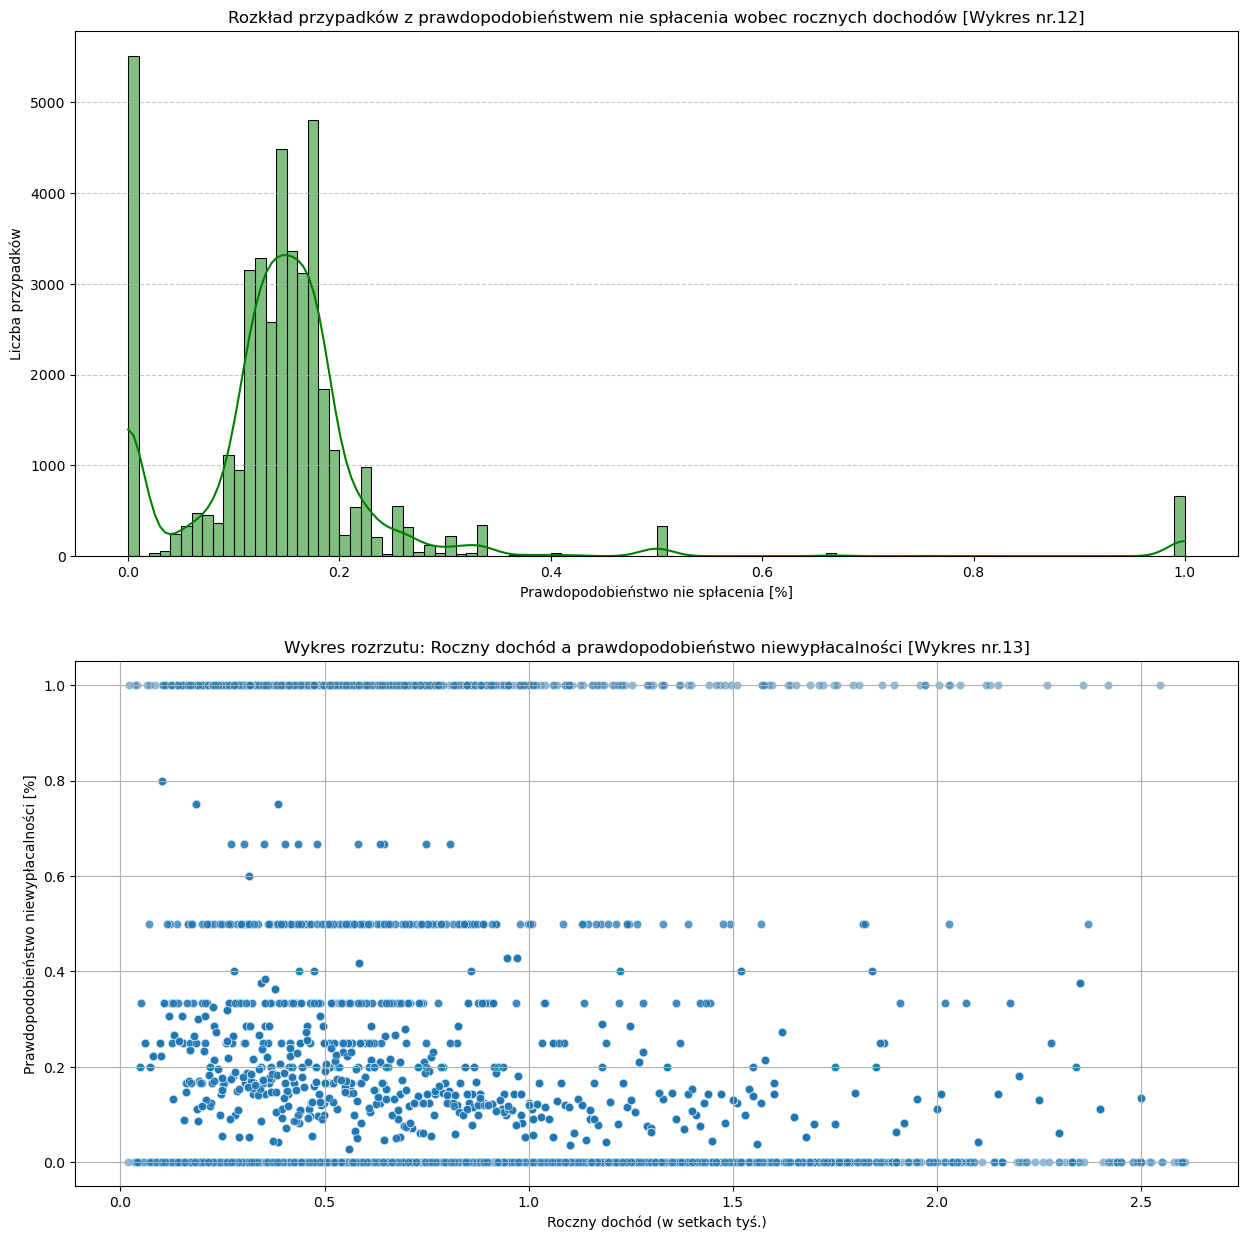

In [366]:
import matplotlib.ticker as mtick

fig, axes = plt.subplots(2, 1, figsize=(15, 15))

sns.histplot(df2_cleaned_annual_inc['ANNUAL_INC_prob_of_loan_NOrepay'], bins=100, kde=True, color='green', ax=axes[0])
axes[0].set_title("Rozkład przypadków z prawdopodobieństwem nie spłacenia wobec rocznych dochodów [Wykres nr.12]")
axes[0].set_xlabel("Prawdopodobieństwo nie spłacenia [%]")
axes[0].set_ylabel("Liczba przypadków")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Wykres z wartościami w setkach tysięcy
sns.scatterplot(x="annual_inc_tys", y="ANNUAL_INC_prob_of_loan_NOrepay", data=df2_cleaned_annual_inc, alpha=0.5)
axes[1].set_title("Wykres rozrzutu: Roczny dochód a prawdopodobieństwo niewypłacalności [Wykres nr.13]")
axes[1].set_xlabel("Roczny dochód (w setkach tyś.)")
axes[1].set_ylabel("Prawdopodobieństwo niewypłacalności [%]")
axes[1].grid(True)
plt.show()

### [Wykres nr.14] Związek między wysokością rocznych dochodów a prawdopodobieństwem spłaty

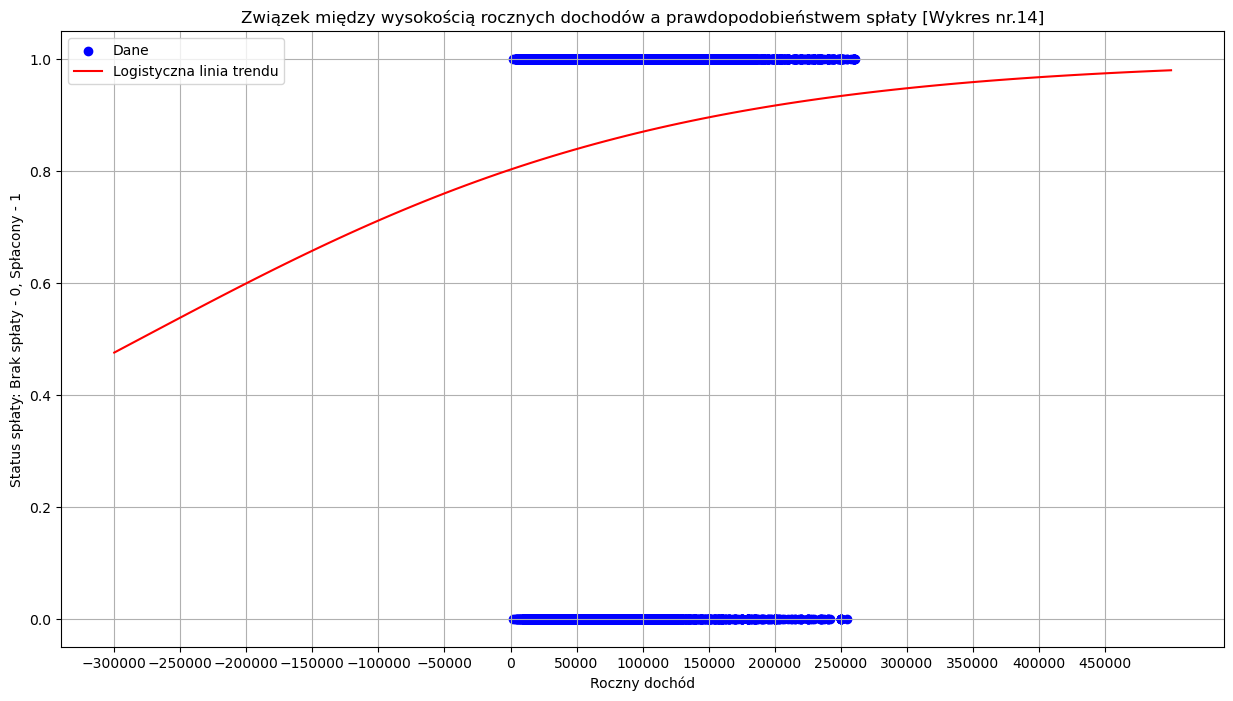

In [368]:
# Dane wejściowe
x = df2_cleaned_annual_inc['annual_inc'].values.reshape(-1, 1)
y = df2_cleaned_annual_inc['loan_status_numeric'].values

# Tworzenie modelu regresji logistycznej
logistic_model = LogisticRegression()
logistic_model.fit(x, y)

# Przewidywanie wartości prawdopodobieństwa
x_fit = np.linspace(-300000, 500000, 100).reshape(-1, 1)
y_fit = logistic_model.predict_proba(x_fit)[:, 1]

# Tworzenie wykresu
plt.figure(figsize=(15, 8))
plt.scatter(df2_cleaned_annual_inc['annual_inc'], df2_cleaned_annual_inc['loan_status_numeric'], color='blue', label='Dane')
plt.plot(x_fit, y_fit, color='red', label='Logistyczna linia trendu')

plt.title('Związek między wysokością rocznych dochodów a prawdopodobieństwem spłaty [Wykres nr.14]')
plt.xlabel('Roczny dochód')
plt.ylabel('Status spłaty: Brak spłaty - 0, Spłacony - 1')
plt.xticks(range(-300000, 500000, 50000))
plt.grid()
plt.legend()

plt.show()


### Tworzenie grup dochodów

In [370]:
# Tworzenie przedziałów dochodów
bins = [0, 50000, 100000, 150000, 200000, float('inf')]
labels = ['Niskie', 'Średnie', 'Wyższe', 'Wysokie', 'Bardzo wysokie']
df2_cleaned_annual_inc['income_group'] = pd.cut(df2_cleaned_annual_inc['annual_inc'], bins=bins, labels=labels)

# Obliczanie średniego prawdopodobieństwa niewypłacalności dla każdej grupy
grouped_data = df2_cleaned_annual_inc.groupby('income_group')['ANNUAL_INC_prob_of_loan_NOrepay'].mean().reset_index()

print(grouped_data)

     income_group  ANNUAL_INC_prob_of_loan_NOrepay
0          Niskie                             0.18
1         Średnie                             0.14
2          Wyższe                             0.11
3         Wysokie                             0.12
4  Bardzo wysokie                             0.13


C:\Users\Krzysztof\AppData\Local\Temp\ipykernel_2796\1176797043.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_cleaned_annual_inc['income_group'] = pd.cut(df2_cleaned_annual_inc['annual_inc'], bins=bins, labels=labels)


In [371]:
missing_values = df2_cleaned_annual_inc['income_group'].isna().sum()
missing_values

0

### [Wykres nr.15] Średnie prawdopodobieństwo niewypłacalności wg grup dochodów

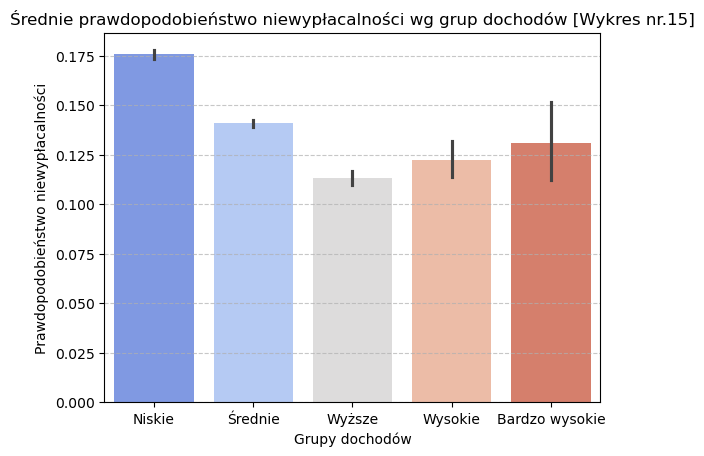

In [373]:
sns.barplot(x="income_group", y="ANNUAL_INC_prob_of_loan_NOrepay", data=df2_cleaned_annual_inc, palette="coolwarm")

plt.title("Średnie prawdopodobieństwo niewypłacalności wg grup dochodów [Wykres nr.15]")
plt.xlabel("Grupy dochodów")
plt.ylabel("Prawdopodobieństwo niewypłacalności")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### [Wykres nr.16] Liczebność w grupach dochodów

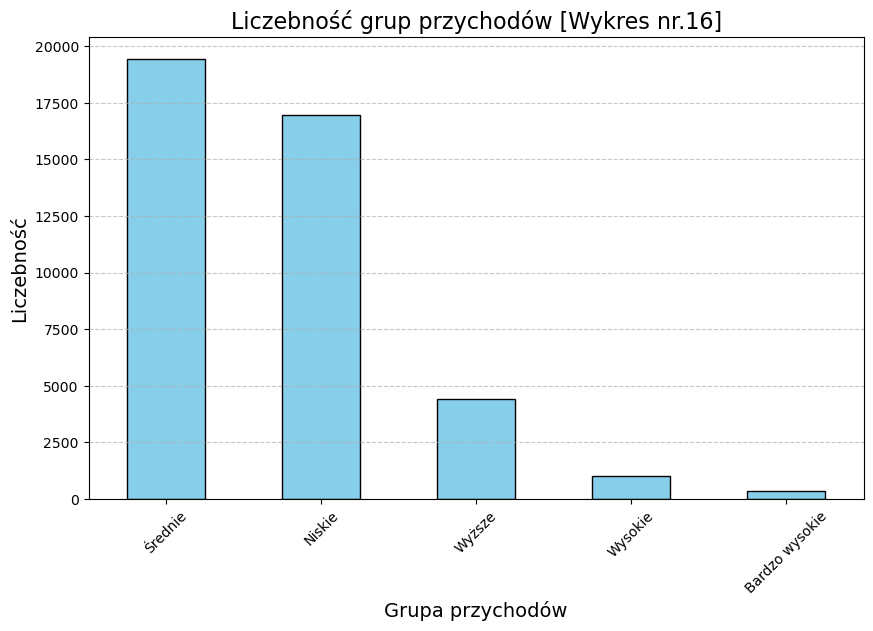

income_group
Średnie           19438
Niskie            16971
Wyższe             4403
Wysokie            1038
Bardzo wysokie      344
Name: count, dtype: int64


In [375]:
group_counts = df2_cleaned_annual_inc['income_group'].value_counts()

plt.figure(figsize=(10, 6))
group_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Liczebność grup przychodów [Wykres nr.16]', fontsize=16)
plt.xlabel('Grupa przychodów', fontsize=14)
plt.ylabel('Liczebność', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

income_group_count = df2_cleaned_annual_inc['income_group'].value_counts()
print(income_group_count)

### [Wykres nr.17] Rozkład dochodów w poszczególnych grupach dochodów

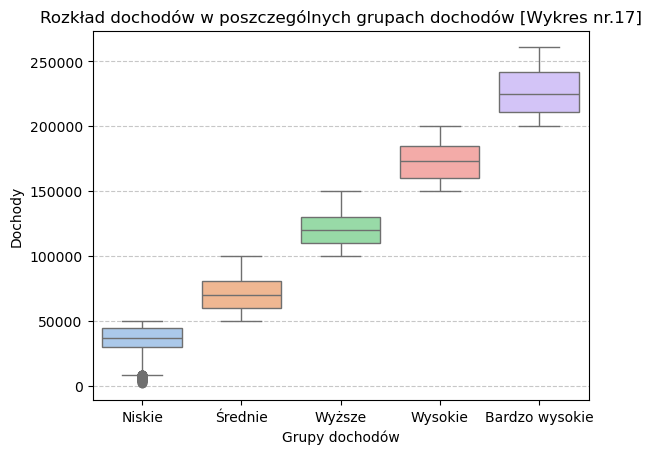

income_group
Niskie            37000.00
Średnie           69996.00
Wyższe           120000.00
Wysokie          173000.00
Bardzo wysokie   225000.00
Name: annual_inc, dtype: float64


In [377]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.boxplot(x="income_group", y="annual_inc", data=df2_cleaned_annual_inc, palette="pastel")

plt.title("Rozkład dochodów w poszczególnych grupach dochodów [Wykres nr.17]")
plt.xlabel("Grupy dochodów")
plt.ylabel("Dochody")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# Obliczanie mediany dla każdej grupy
income_medians = df2_cleaned_annual_inc.groupby('income_group')['annual_inc'].median()
print(income_medians)

### [Wykres nr.18] Rozkład prawdopodobieństwa niewypłacalności wg grup dochodów

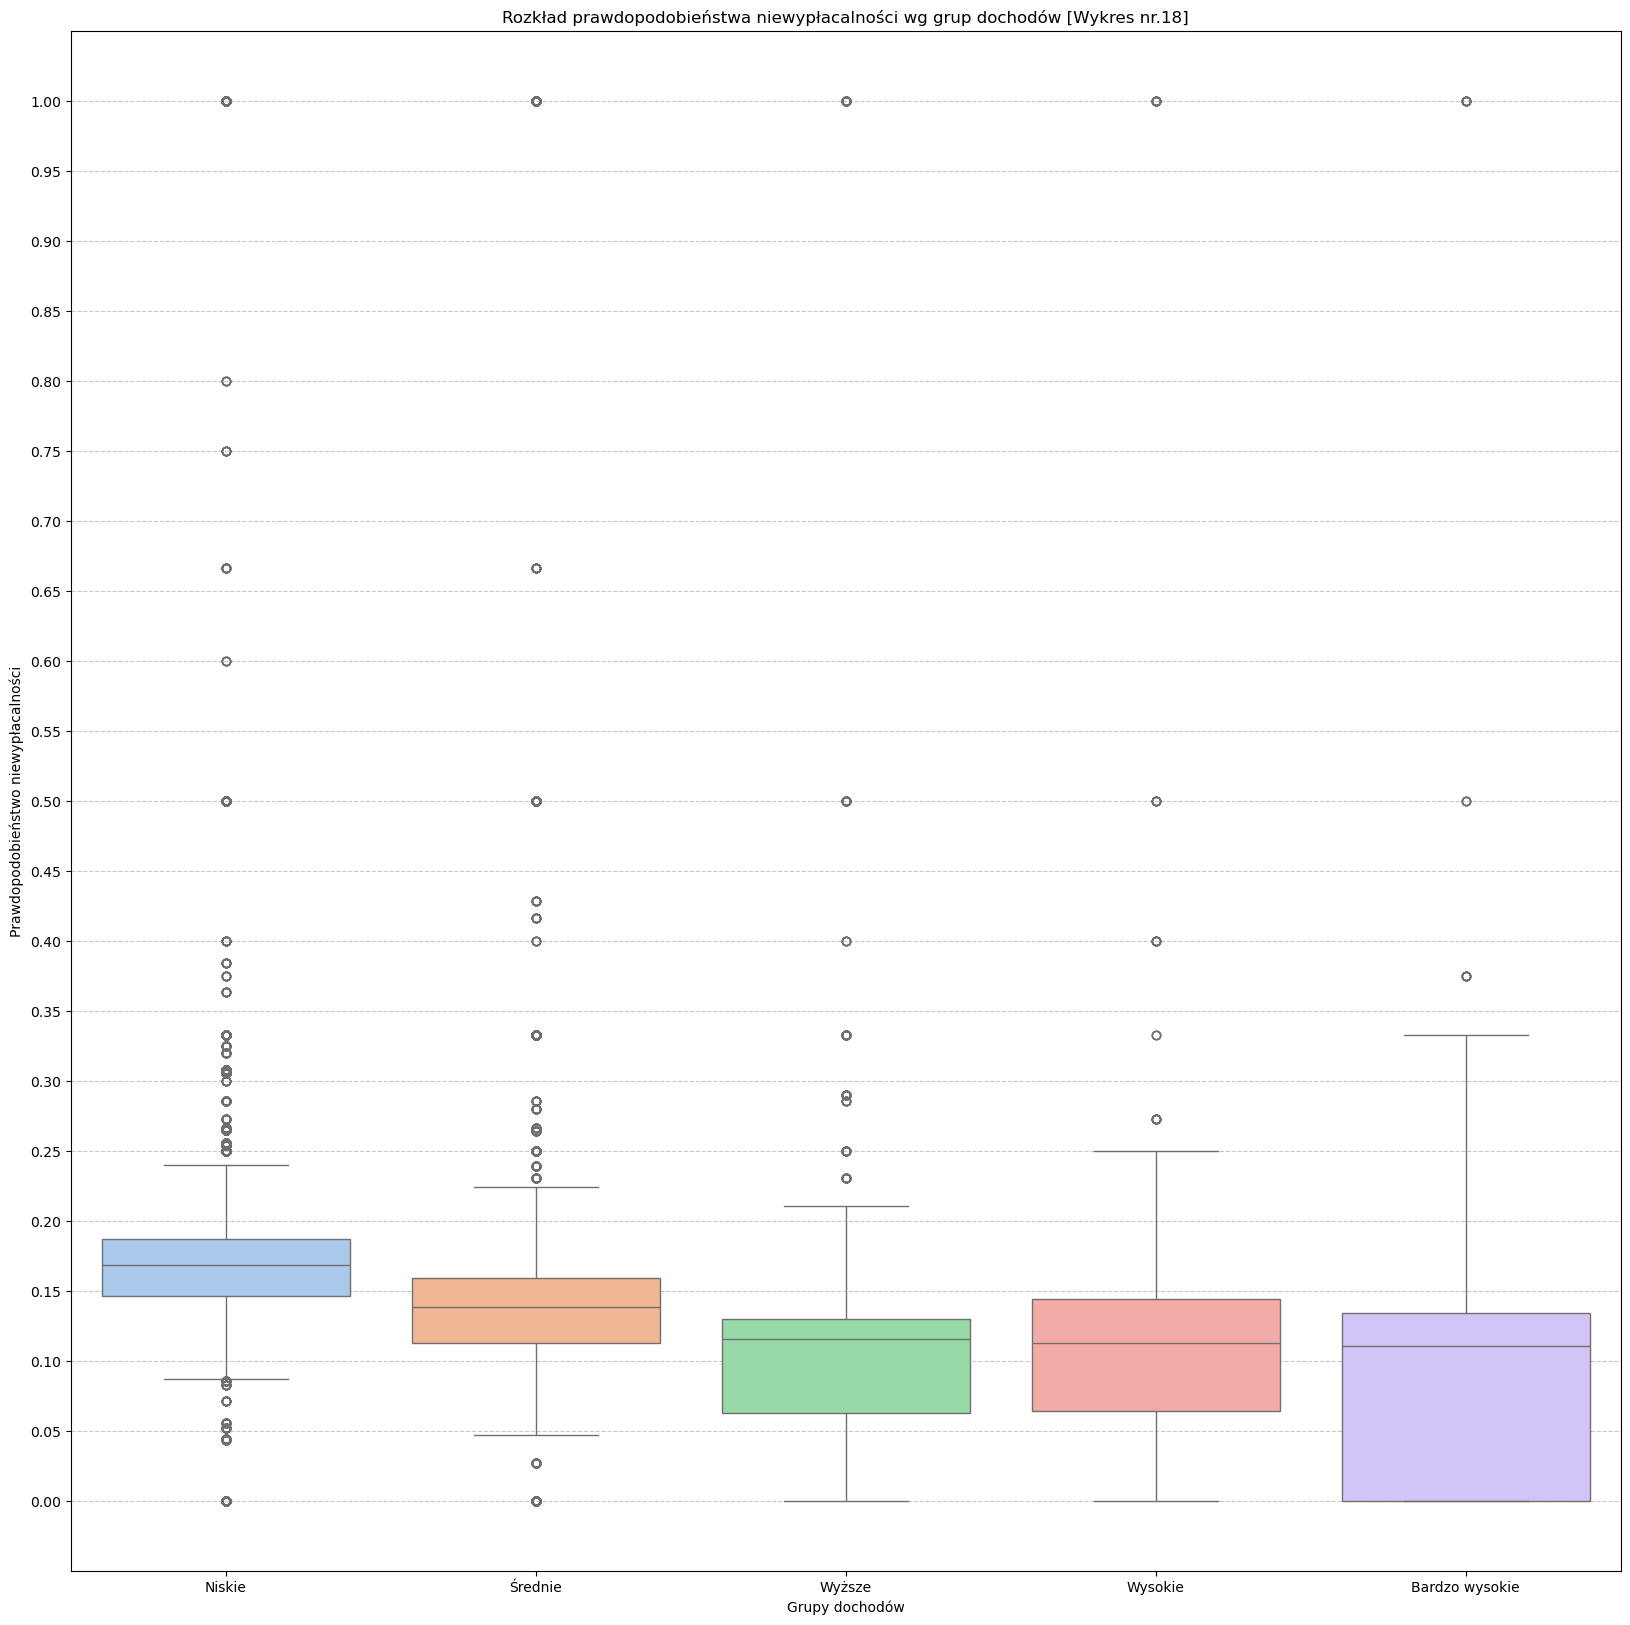

In [379]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

ax = sns.boxplot(x="income_group", y="ANNUAL_INC_prob_of_loan_NOrepay", data=df2_cleaned_annual_inc, palette="pastel")

plt.title("Rozkład prawdopodobieństwa niewypłacalności wg grup dochodów [Wykres nr.18]")
plt.xlabel("Grupy dochodów")
plt.ylabel("Prawdopodobieństwo niewypłacalności")
plt.yticks([i * 0.05 for i in range(21)])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### [Wykres nr.19] Rozkład prawdopodobieństwa niewypłacalności według przypadku spłacenia lub niespłacenia pożyczki

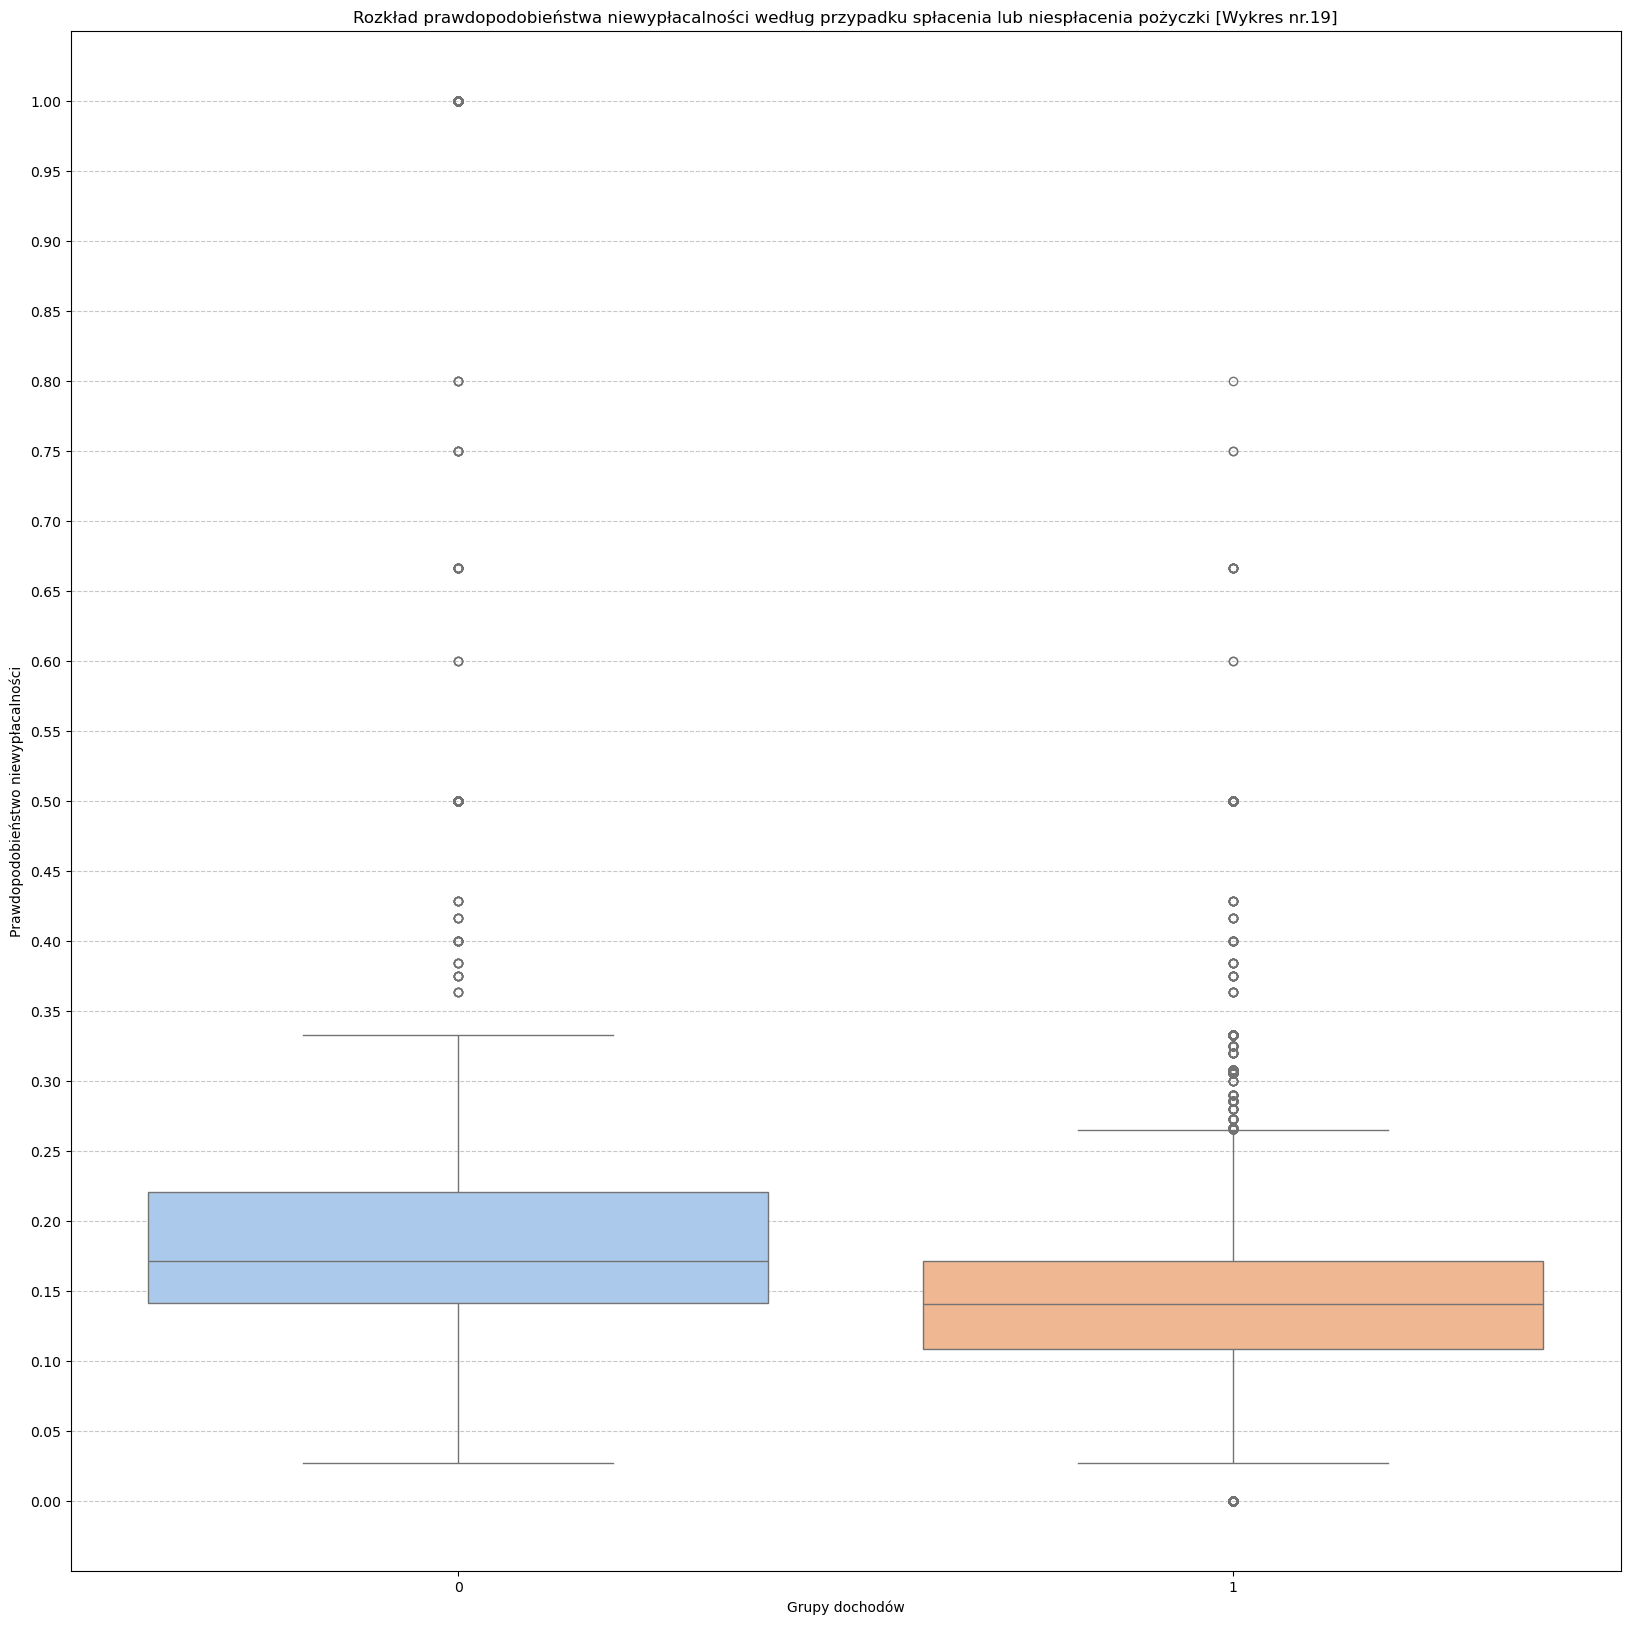

In [381]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

ax = sns.boxplot(x="loan_status_numeric", y="ANNUAL_INC_prob_of_loan_NOrepay", data=df2_cleaned_annual_inc, palette="pastel")

plt.title("Rozkład prawdopodobieństwa niewypłacalności według przypadku spłacenia lub niespłacenia pożyczki [Wykres nr.19]")
plt.xlabel("Grupy dochodów")
plt.ylabel("Prawdopodobieństwo niewypłacalności")
plt.yticks([i * 0.05 for i in range(21)])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Wnioski Ad.4

1. Wysokość rocznego wynagrodzenia ma wpływ na prawdopodobieństwo niespłacenia zobowiązania pożyczkowego. Rozpatrując ryzyko dla grup z przedziałem przychodu, ten wpływ jest umiarkowany, wynika to z niewielkiej amplitudy zmian 7% między najniższym a najwyższym wynikiem ryzyka.

2. Przypadki niespłacenia pozyczki występują w każdej grupie przychodów, od najniższych do bardzo wysokich.

3. Najniższe ryzyko wykazuje grupa z zarobkami "wyższymi" czyli zakres dochodów od 100-150 tyś rocznie i jest to 11% prawopodobieństwa niespłacenia pożyczki.

4. Najwyższe ryzyko niespłacenia zobowiązania należy przypisać do grupy z najniższymi zarobkami czyli poniżej 50 tyś rocznie. Ryzyko dla tej grupy wynosi 18%.

5. Prawdopodobieństwo niespłacenia zobowiązań pożyczkowych do wysokości wynagrodzenia spada wraz ze wzrostem wynagrodzenia do poziomu zarobków "wyższych" czyli przedziału 100-150 tyś. Dalszy wzrost wynagrodzeń wskazuje na rosnące ryzyko niespłacenia zobowiązań, kolejno dla grup z "wysokimi" i "bardzo wysokimi" wynagrodzeniami, odpowiednio 12% i 13%.

6. Rosnące od poziomu "wyższych" wynagrodzeń ryzyko, może wynikać z prowadzonych przez pożyczkobiorców własnych działalności, które są z kolei niepewnym źródłem przychodu. Należy w tym momencie rozszerzyć analizę i włączyć do analizy dane o sposobie zatrudnienia pożyczkobiorców dla potwierdzenia lub zaprzeczenia tej hipotezy. Należy uwzględnić też liczebność udzielonych kredytów dla osób z grup wysokie i bardzo wysokie zarobki.

7. Mediany wysokości przychodów w przedziałach (grupach) przychodów wypadają w większości przypadków po środku wartości przedziałów, czyli są bliskie średniej wartości przedziałków, a co za tym idzie, kolejne różnice między medianami sąsiednich grup są bardzo do siebie zbliżone. Wyjątek stanowi grupa o najniższych przychodach, mediana w tym przedziale wynosi blisko 40tyś rocznych przychodów. Należy zaznaczyć, że grupa osób z niskimi dochodami, którym udzieliło się pożyczki, jest najliczniejsza w zbiorze danych.

8. Mediany ryzyka niespłacenia pożyczki dla grup przychodów maleją od grupy "najniższych" aż do poziomu "wyższych" przychodów. Poziom mediany dla ryzyka w grupie "wyższych" jest taki sam jak dla kolejnych grup przychodów czyli "wysokich" i "bardzo wysokich", wynosi 12% ryzyka.

9. Ostatcznie porównując ryzyko w grupie niespłaconych pożyczek do spłaconych, następują kolejne wnioski:


    a) rozstęp dla ryzyka w przypadku niespłacenia pożyczki jest znacznie większy niż w przypadku roztępu spłaconych

    b) rozstęp międzykwartylowy w przypadku niespłaconych pożyczek jest większy niż w przypadku spłaconych

    c) różnica mediany dla rozrzutu ryzyka pożyczek niespłaconych a pożyczek spłaconych wynosi 3%.

## 5. W jaki sposób historia zatrudnienia wiąże się z prawdopodobieństwem niewykonania zobowiązania?

In [385]:
# Obliczanie średniego prawdopodobieństwa dla określonych kategorii długości zatrudnienia.
EMP_LEN_prob_of_loan_NOrepay = 1 - df2.groupby('emp_length_numeric', observed=True)['loan_status_numeric'].mean()
EMP_LEN_prob_of_loan_NOrepay

emp_length_numeric
0.00    0.15
1.00    0.15
2.00    0.14
3.00    0.14
4.00    0.16
5.00    0.15
6.00    0.15
7.00    0.16
8.00    0.15
9.00    0.13
10.00   0.16
Name: loan_status_numeric, dtype: float64

In [386]:
# Tworzenie mapowania na podstawie wyników groupby
mapping = EMP_LEN_prob_of_loan_NOrepay.to_dict()

# Dodanie nowej kolumny do df2 na podstawie mapowania
df2['EMP_LEN_prob_of_loan_NOrepay'] = df2['emp_length_numeric'].map(mapping)
df2['EMP_LEN_prob_of_loan_NOrepay']

0       0.16
1       0.15
2       0.16
3       0.16
4       0.15
        ... 
42531   0.15
42532   0.15
42533   0.15
42534   0.15
42535   0.16
Name: EMP_LEN_prob_of_loan_NOrepay, Length: 42535, dtype: float64

### [Wykres nr.20] Średnie prawdopodobieństwo niewypłacalności a długość zatrudnienia

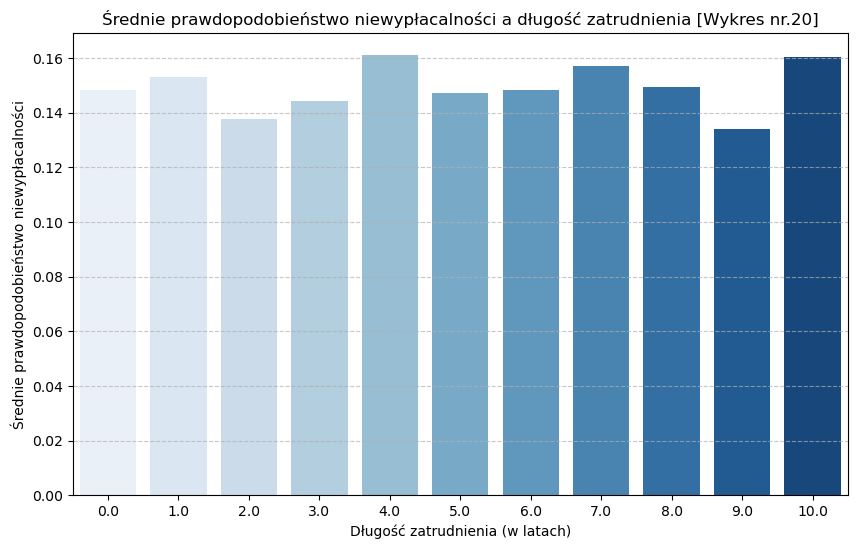

In [388]:
plt.figure(figsize=(10, 6))
sns.barplot(x='emp_length_numeric', y='EMP_LEN_prob_of_loan_NOrepay', data=df2, palette='Blues')

plt.title('Średnie prawdopodobieństwo niewypłacalności a długość zatrudnienia [Wykres nr.20]')
plt.xlabel('Długość zatrudnienia (w latach)')
plt.ylabel('Średnie prawdopodobieństwo niewypłacalności')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [389]:
# Liczebność dla każdej kategorii
emp_length_numeric_count = df2['emp_length_numeric'].value_counts().sort_index()
print(emp_length_numeric_count)

emp_length_numeric
0.00     5062
1.00     3595
2.00     4743
3.00     4364
4.00     4761
5.00     3458
6.00     2375
7.00     1875
8.00     1592
9.00     1341
10.00    9369
Name: count, dtype: int64


### Tworzenie grup długości zatrudnienia

In [391]:
# Grupy długości zatrudnienia
bins = [0, 3, 6, 9, 11]
labels = ['0-2 lata', '3-5 lat', '6-8 lat', '9-10+ lat']
df2['emp_length_group'] = pd.cut(df2['emp_length_numeric'], bins=bins, labels=labels, right=False)

# Obliczenie średniego prawdopodobieństwa w grupach
grouped_prob = df2.groupby('emp_length_group')['EMP_LEN_prob_of_loan_NOrepay'].mean()
print(grouped_prob)

emp_length_group_count = df2['emp_length_group'].value_counts().sort_index()
print(emp_length_group_count)

emp_length_group
0-2 lata    0.15
3-5 lat     0.15
6-8 lat     0.15
9-10+ lat   0.16
Name: EMP_LEN_prob_of_loan_NOrepay, dtype: float64
emp_length_group
0-2 lata     13400
3-5 lat      12583
6-8 lat       5842
9-10+ lat    10710
Name: count, dtype: int64


### [Wykres nr.21] Średnie prawdopodobieństwo niewypłacalności a grupy długości zatrudnienia

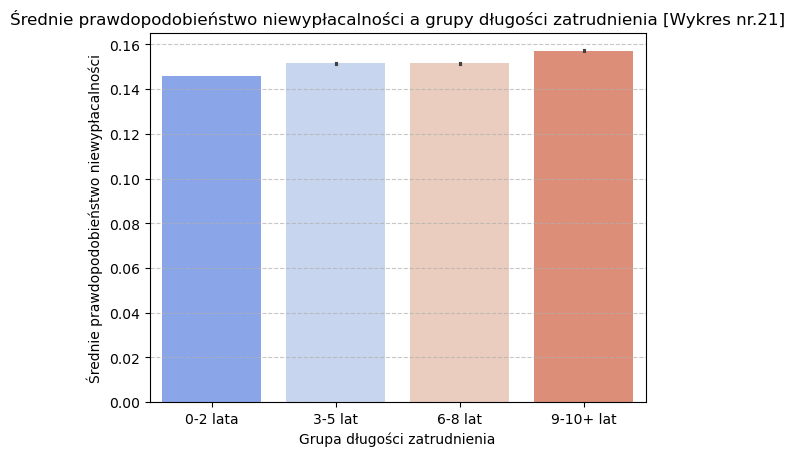

In [393]:
sns.barplot(x='emp_length_group', y='EMP_LEN_prob_of_loan_NOrepay', data=df2, palette='coolwarm')

plt.title('Średnie prawdopodobieństwo niewypłacalności a grupy długości zatrudnienia [Wykres nr.21]')
plt.xlabel('Grupa długości zatrudnienia')
plt.ylabel('Średnie prawdopodobieństwo niewypłacalności')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [394]:
# Obliczenie korelacji Pearsona - badanie liniowej zależności.
pearson_corr = df2['emp_length_numeric'].corr(df2['EMP_LEN_prob_of_loan_NOrepay'])
print(f'Korelacja Pearsona: {pearson_corr:.2f}')

Korelacja Pearsona: 0.48


### [Wykres nr.22] Rozkład prawdopodobieństwa niewypłacalności wg grup wieku zatrudnienia

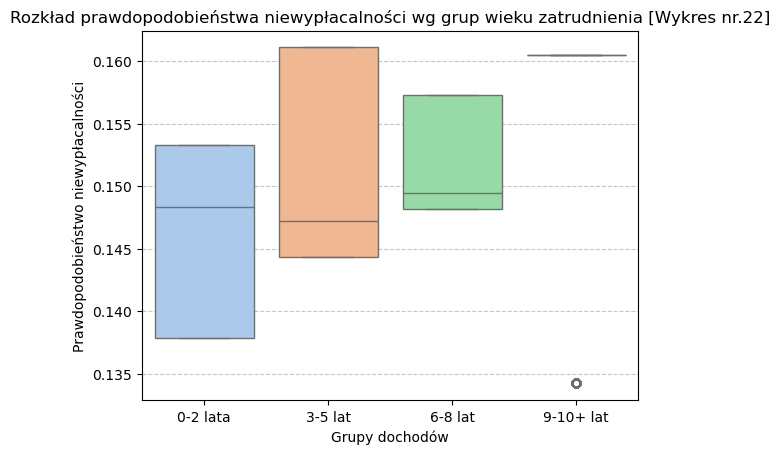

In [396]:
ax = sns.boxplot(x="emp_length_group", y="EMP_LEN_prob_of_loan_NOrepay", data=df2, palette="pastel")

plt.title("Rozkład prawdopodobieństwa niewypłacalności wg grup wieku zatrudnienia [Wykres nr.22]")
plt.xlabel("Grupy dochodów")
plt.ylabel("Prawdopodobieństwo niewypłacalności")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### [Wykres nr.23] Rozkład prawdopodobieństwa niewypłacalności względem statusu pożyczki

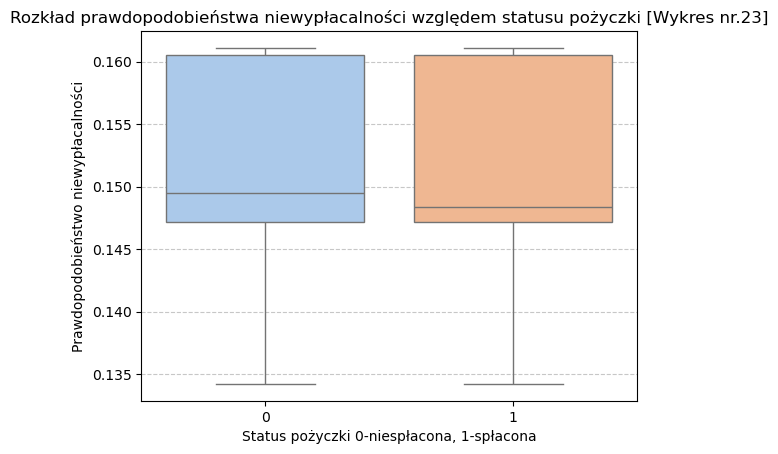

In [398]:
ax = sns.boxplot(x="loan_status_numeric", y="EMP_LEN_prob_of_loan_NOrepay", data=df2, palette="pastel")

plt.title("Rozkład prawdopodobieństwa niewypłacalności względem statusu pożyczki [Wykres nr.23]")
plt.xlabel("Status pożyczki 0-niespłacona, 1-spłacona")
plt.ylabel("Prawdopodobieństwo niewypłacalności")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Wnioski Ad.5

1. Ryzyko niespałcenia pożyczki w zależności od wieku zatrudnienia waha sie wąskim przedziale między 14% i 16% (wykres słupkowy nr 20).

2. Mając na uwadze tak wąski przedział zredukowałem 10 kategorii wieku zatrudnienia do 4 grup (kategorii), które są przedziałami wieku zatrudnienia. Wartość ryzyka dla tych nowo powstałych grup uśredniła się do 15%, jedynie w grupie 10+ ryzyko wynosi 16%.

3. Ryzyko niespłacenia pożyczki wobec wniosku nr 2 można przyjąć jako stałe na poziomie średnio 15%, zatem wiek zatrudnienia nie jest czynnikiem wpływającym na zmiennośc ryzyka.

4. Wykres pudełkowy nr 22 wskazuje:


   a) dla grupy pierwszej 0-2 lata zatrudnienia widoczny jest szeroki ale stabilny przedział ryzyka oscylujący bardzo mocno przy wartości 14.8% ryzyka (mediana). Rozrzut międzykwartylowy można określić na 1,5% zmiany ryzyka w tej grupie. Jest to również najliczniejsza grupa pożyczkobiorców.


   b) dla kolejnej grupy czyli przedziału 3-5 lat zatrudnienia bardzo podobny rozstęp jak w przypadku pierwszej grupy. Rozrzut międzykwartylowy można określić na 1,5% zmiany ryzyka w tej grupie. Rozkład to wyłącznie rozstęp miedzykwartylowy z medianą blisko wartości 14.7% - niższy niż w przypadku grupy pierwszej. Druka z kolei najliczniejsza grupa pożyczkobiorców.

   c) dla grupy trzeciej 6-8 lat zatrudnienia, zdecydowanie mniejszy rozstęp, przy czym również składa się wyłącznie z rozstępu międzykwartylowego z          medianą blisko wartości ryzyka 14.9%. Jest to najmniej liczna grupa pożyczkobiorców.

   d) grupa ostatnia 9-10+ lat, grupa trzecia co do liczby pożyczkobiorców stanowiąca jednak ponad 10 tysięcy osób, posiada bardzo wąski rozstęp, który można określić jedną wartością ryzyka 16%. Na tym wykresie występuje również wartość odstająca, będąca jednym punktem i odnosząca się do wartości 13,5% ryzyka niespłacenia. Uproszczając, grupa ta jest złozona z dwóch skrajnych przypadków ze sprecyzowanymi wartościami których różnica wynosi 2,5% (ryzyka), fakt ten powoduje, że jest to najbardziej niepewna i trudna do określenia grupa pod względem ryzyka niespłacenia kredytu.

5. Wykres nr.23 przedstawia niemalże taki sam rozrzut ryzyka wobec przypadków spłacenia i niespłacenia pożyczki z uwzględnieniem zmiennej długości zatrudnienia. Jedyną różnicę stanowi mediana, która dla przypadku spłacenia jest niższa zaledwie o 0,1%. Fakt ten utwierdza w przekonaniu co do treści z wniosku numer 3.

## 6. Jak wielkość żądanej pożyczki jest powiązana z prawdopodobieństwem niewykonania zobowiązania?

In [402]:
df2.loan_amnt.describe()

count   42535.00
mean    11089.72
std      7410.94
min       500.00
25%      5200.00
50%      9700.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

In [403]:
LOAN_AMNT_prob_of_loan_NOrepay = 1 - df2.groupby('loan_amnt', observed=True)['loan_status_numeric'].mean()
LOAN_AMNT_prob_of_loan_NOrepay

loan_amnt
500.00     0.09
550.00     0.00
600.00     0.17
700.00     0.33
725.00     0.00
           ... 
34475.00   0.20
34525.00   0.00
34675.00   0.00
34800.00   0.00
35000.00   0.22
Name: loan_status_numeric, Length: 898, dtype: float64

In [404]:
mapping = LOAN_AMNT_prob_of_loan_NOrepay.to_dict()

# Dodanie nowej kolumny do df2 na podstawie mapowania
df2['LOAN_AMNT_prob_of_loan_NOrepay'] = df2['loan_amnt'].map(mapping)
df2['LOAN_AMNT_prob_of_loan_NOrepay']

0       0.16
1       0.17
2       0.16
3       0.14
4       0.13
        ... 
42531   0.13
42532   0.16
42533   0.17
42534   0.10
42535   0.16
Name: LOAN_AMNT_prob_of_loan_NOrepay, Length: 42535, dtype: float64

### [Wykres nr.24] Związek między kwotą pożyczki a prawdopodobieństwem niewypłacalności z linią regresji

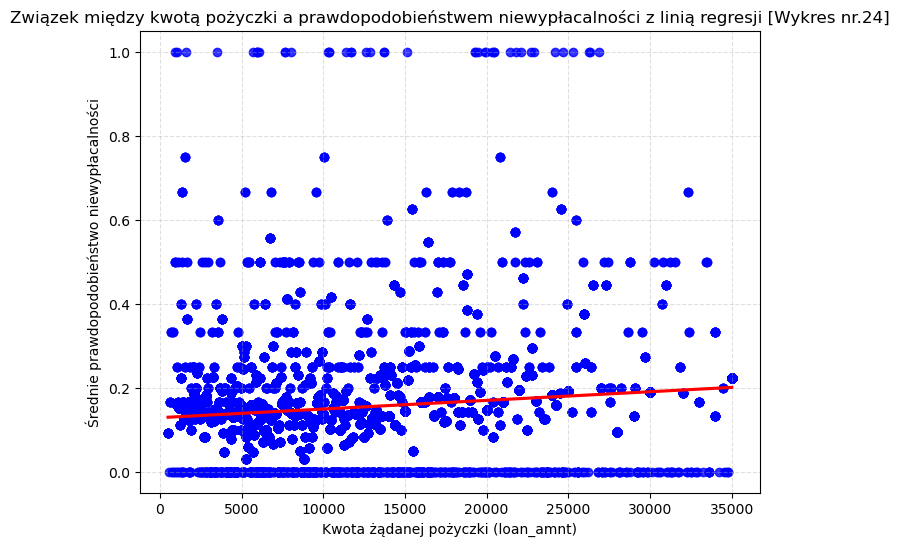

In [406]:
plt.figure(figsize=(8, 6))
sns.regplot(x='loan_amnt', y='LOAN_AMNT_prob_of_loan_NOrepay', data=df2, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.title('Związek między kwotą pożyczki a prawdopodobieństwem niewypłacalności z linią regresji [Wykres nr.24]')
plt.xlabel('Kwota żądanej pożyczki (loan_amnt)')
plt.ylabel('Średnie prawdopodobieństwo niewypłacalności')
plt.grid(True, linestyle='--', alpha=0.4)

plt.show()

In [407]:
# Korelacja Pearsona (liniowa zależność)
pearson_corr = df2['loan_amnt'].corr(df2['LOAN_AMNT_prob_of_loan_NOrepay'])
print(f'Korelacja Pearsona: {pearson_corr:.2f}')

# Korelacja Spearmana (dla zależności monotonicznej)
spearman_corr = df2['loan_amnt'].corr(df2['LOAN_AMNT_prob_of_loan_NOrepay'], method='spearman')
print(f'Korelacja Spearmana: {spearman_corr:.2f}')

Korelacja Pearsona: 0.24
Korelacja Spearmana: 0.31


### Tworzenie przedziałów (grup) wielkości pożyczki

In [409]:
# Tworzenie przedziałów (grup) wielkości pożyczki
bins = [0, 10000, 20000, 30000, 40000]
labels = ['Małe', 'Średnie', 'Duże', 'Bardzo duże']
df['loan_group'] = pd.cut(df['loan_amnt'], bins=bins, labels=labels, right=False)
df2['loan_group'].value_counts()

loan_group
Małe           21427
Średnie        14567
Duże            5327
Bardzo duże     1214
Name: count, dtype: int64

### [Wykres nr.25] Średnie prawdopodobieństwo niewypłacalności w grupach wielkości pożyczki

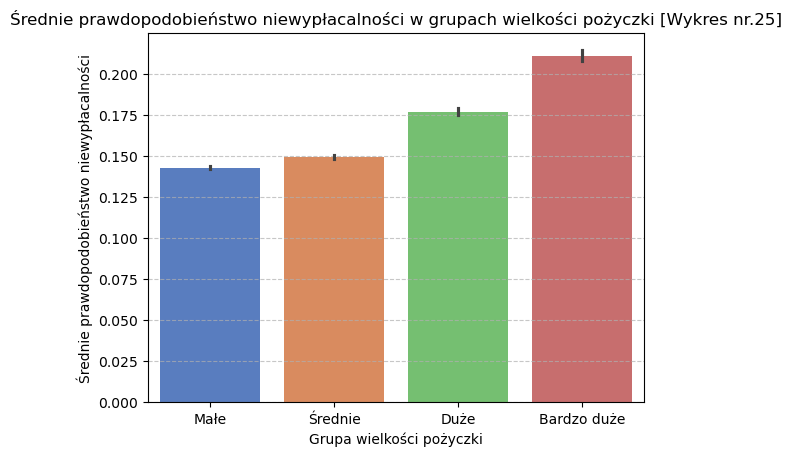

loan_group
Małe          0.14
Średnie       0.15
Duże          0.18
Bardzo duże   0.21
Name: LOAN_AMNT_prob_of_loan_NOrepay, dtype: float64


In [411]:
sns.barplot(x='loan_group', y='LOAN_AMNT_prob_of_loan_NOrepay', data=df, palette='muted')

plt.title('Średnie prawdopodobieństwo niewypłacalności w grupach wielkości pożyczki [Wykres nr.25]')
plt.xlabel('Grupa wielkości pożyczki')
plt.ylabel('Średnie prawdopodobieństwo niewypłacalności')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# Obliczenie średniego prawdopodobieństwa dla grup
grouped_prob = df.groupby('loan_group')['LOAN_AMNT_prob_of_loan_NOrepay'].mean()
print(grouped_prob)

### [Wykres nr.26] Rozkład prawdopodobieństwa niewypłacalności w grupach wielkości pożyczek

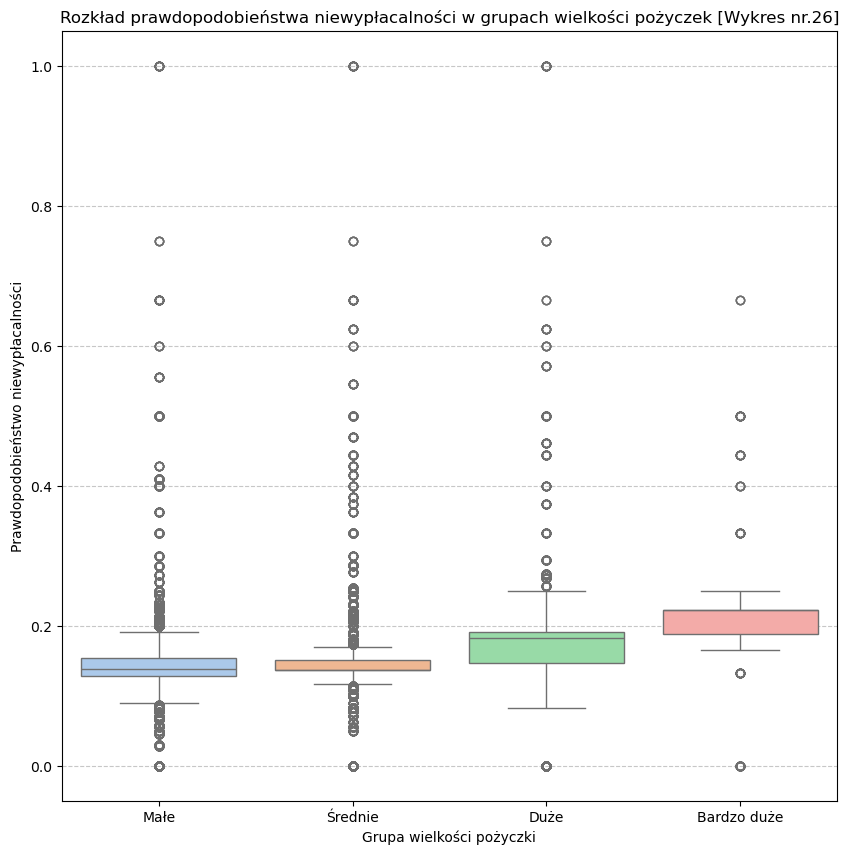

In [413]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(x="loan_group", y="LOAN_AMNT_prob_of_loan_NOrepay", data=df2, palette="pastel")

plt.title("Rozkład prawdopodobieństwa niewypłacalności w grupach wielkości pożyczek [Wykres nr.26]")
plt.xlabel("Grupa wielkości pożyczki")
plt.ylabel("Prawdopodobieństwo niewypłacalności")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### [Wykres nr.27] Rozkład ryzyka niewypłacalności związanego z wysokością kwoty pożyczki a statusem pożyczki

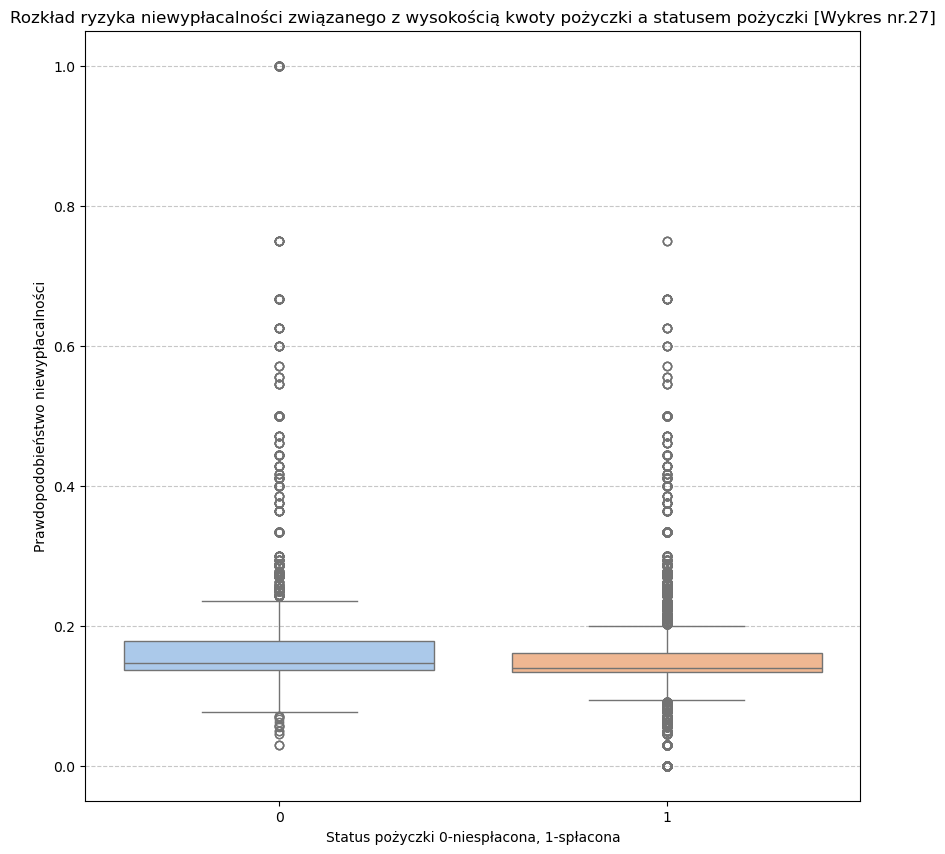

In [415]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(x="loan_status_numeric", y="LOAN_AMNT_prob_of_loan_NOrepay", data=df2, palette="pastel")

plt.title("Rozkład ryzyka niewypłacalności związanego z wysokością kwoty pożyczki a statusem pożyczki [Wykres nr.27]")
plt.xlabel("Status pożyczki 0-niespłacona, 1-spłacona")
plt.ylabel("Prawdopodobieństwo niewypłacalności")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Wnioski Ad6.

1. Wykres punktowy nr 24 oraz wykres słupkowy nr 25 pokazują tendencję rosnącą do ryzyka ostatecznego niespłacenia pożyczki.
2. Najniższe prawdopodobieństwo niespłacenia pożyczki wykazuje grupa pożyczek do 10 tyś, ryzyko średnio wynosi 14%. Grupę tę stanowi ok 50% badanych pożyczkobiorców.
3. W grupie następnej w przedziale kwoty pożyczek 10-20tyś ryzyko to wynosi 15%, więc widzimy nieznaczny wzrost.
4. Natomiast w grupie pożyczek 20-30tyś można zauważyć znaczny wzrost ryzyka. Ryzyko w tej grupie wynosi 18%, więc jest to wzrost o 3% względem poprzedniej grupy i 4% względem grupy "małe".
5. Kolejny dosyć gwałtowny wzrost, bo o kolejne 3%, średnio wyznacza się ryzyko na poziomie 21%. W tej grupie udzielono pożyczek w zakresie 30-40tyś przy czym maksymalna kwota udzielonej pożyczki to 35tyś.
6. Istotne jest, że grupa małych i średnich udzielonych pożyczek ilościowo stanowi 84% wszystkich. Zatem można przy tym stwierdzić, że dzięki tak licznej grupie pożyczek i utrzymującym się ryzyku 14-15%, daje większą pewność do określenia ryzyka na przyszłość. Pozostałe dwie grupy dużych i bardzo dużych posiada niewiele przypadków przy jednoczesnym i to dosyć skokowym wzroście ryzyka, a to powoduje dodatkową niepewność co do spłacenia udzielanych pożyczek w kwotach powyżej 20 tyś.
7. Rozrzut w pierwszym i drugim kwartylu podczas rozpatrywania prawdopodobieństwa z uwzględnieniem kwoty udzielanej pożyczki jest bardzo podobny dla przypadku spłaconych i niespłaconych pożyczek. Za to trzeci i czwarty kwartyl w przypadku niespłaconych pożyczek ma większy rozrzut prawdopodobieństwa niespłacenia pożyczki w stosunku do kwartyli spłaconych. Świadczy to o tym, że czynnik taki jak wysokość kwoty pożyczki jest tym bardziej istotny przy ogólnej ocenie ryzyka niespłacenia pożyczki przez pożyczkobiorcę.

# Feature Engineering – utwórz 20 nowych zmiennych (60 pkt)

In [526]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42535 entries, 0 to 42535
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   loan_amnt                        42535 non-null  float64 
 1   funded_amnt                      42535 non-null  float64 
 2   funded_amnt_inv                  42535 non-null  float64 
 3   int_rate                         42535 non-null  float64 
 4   installment                      42535 non-null  float64 
 5   annual_inc                       42535 non-null  float64 
 6   dti                              42535 non-null  float64 
 7   delinq_2yrs                      42535 non-null  float64 
 8   inq_last_6mths                   42535 non-null  float64 
 9   open_acc                         42535 non-null  float64 
 10  pub_rec                          42535 non-null  float64 
 11  revol_bal                        42535 non-null  float64 
 12  revol_uti

## 1-5: Zmienne związane z wysokością pożyczki

### loan_to_income_ratio: Stosunek kwoty pożyczki do rocznego dochodu

In [529]:
# loan_to_income_ratio: Stosunek kwoty pożyczki do rocznego dochodu:
df2['loan_to_income_ratio'] = df2['loan_amnt'] / df2['annual_inc']
print(df2[['loan_amnt', 'annual_inc', 'loan_to_income_ratio']])

       loan_amnt  annual_inc  loan_to_income_ratio
0        5000.00    24000.00                  0.21
1        2500.00    30000.00                  0.08
2        2400.00    12252.00                  0.20
3       10000.00    49200.00                  0.20
4        3000.00    80000.00                  0.04
...          ...         ...                   ...
42531    3500.00   180000.00                  0.02
42532    1000.00    12000.00                  0.08
42533    2525.00   110000.00                  0.02
42534    6500.00    59000.00                  0.11
42535    5000.00    70000.00                  0.07

[42535 rows x 3 columns]


### funded_percentage: Procent kwoty pożyczki faktycznie sfinansowanej

In [531]:
# funded_percentage: Procent kwoty pożyczki faktycznie sfinansowanej:
df2['funded_percentage'] = df2['funded_amnt'] / df2['loan_amnt']
print(df2[['funded_amnt', 'loan_amnt', 'funded_percentage']])

       funded_amnt  loan_amnt  funded_percentage
0          5000.00    5000.00               1.00
1          2500.00    2500.00               1.00
2          2400.00    2400.00               1.00
3         10000.00   10000.00               1.00
4          3000.00    3000.00               1.00
...            ...        ...                ...
42531      3500.00    3500.00               1.00
42532      1000.00    1000.00               1.00
42533      2525.00    2525.00               1.00
42534      6500.00    6500.00               1.00
42535      5000.00    5000.00               1.00

[42535 rows x 3 columns]


### installment_to_income_ratio: Stosunek raty miesięcznej do miesięcznego dochodu

In [533]:
# installment_to_income_ratio: Stosunek raty miesięcznej do miesięcznego dochodu:
df2['installment_to_income_ratio'] = df2['installment'] / (df2['annual_inc'] / 12)
print(df2[['installment', 'annual_inc', 'installment_to_income_ratio']])

       installment  annual_inc  installment_to_income_ratio
0           162.87    24000.00                         0.08
1            59.83    30000.00                         0.02
2            84.33    12252.00                         0.08
3           339.31    49200.00                         0.08
4            67.79    80000.00                         0.01
...            ...         ...                          ...
42531       113.39   180000.00                         0.01
42532        32.11    12000.00                         0.03
42533        80.69   110000.00                         0.01
42534       204.84    59000.00                         0.04
42535       156.11    70000.00                         0.03

[42535 rows x 3 columns]


### loan_to_credit_term_ratio: Relacja kwoty pożyczki do terminu spłaty

In [535]:
# loan_to_credit_term_ratio: Relacja kwoty pożyczki do terminu spłaty
df['loan_to_credit_term_ratio'] = df['loan_amnt'] / df['term_months']
print(df2[['loan_amnt', 'term_months', 'loan_to_credit_term_ratio']])

       loan_amnt  term_months  loan_to_credit_term_ratio
0        5000.00        36.00                     138.89
1        2500.00        60.00                      41.67
2        2400.00        36.00                      66.67
3       10000.00        36.00                     277.78
4        3000.00        60.00                      50.00
...          ...          ...                        ...
42531    3500.00        36.00                      97.22
42532    1000.00        36.00                      27.78
42533    2525.00        36.00                      70.14
42534    6500.00        36.00                     180.56
42535    5000.00        36.00                     138.89

[42535 rows x 3 columns]


### high_loan_flag: Flaga wskazująca, czy pożyczka przekracza medianę

In [537]:
# high_loan_flag: Flaga wskazująca, czy pożyczka przekracza medianę:
df2['high_loan_flag'] = (df2['loan_amnt'] > df2['loan_amnt'].median()).astype(int)
print(df2[['loan_amnt', 'high_loan_flag']])

       loan_amnt  high_loan_flag
0        5000.00               0
1        2500.00               0
2        2400.00               0
3       10000.00               1
4        3000.00               0
...          ...             ...
42531    3500.00               0
42532    1000.00               0
42533    2525.00               0
42534    6500.00               0
42535    5000.00               0

[42535 rows x 2 columns]


## 6-10: Zmienne związane z kredytem

### aggregate risk: złożony wskaźnik ryzyka łączący statystyczne odchylenie (z_score) z uśrednionym prawdopodobieństwem niespłacenia

In [540]:
#average probability of not repaying: szacuje oczekiwaną spłatę pożyczki, ważoną prawdopodobieństwem spłaty wg modelu FICO.
df2['avg_prob_no_repay'] = (
    df2['CREDIT_AGE_prob_of_loan_NOrepay'] +
    df2['HOME_OWN_prob_of_loan_NOrepay'] +
    df2['EMP_LEN_prob_of_loan_NOrepay'] +
    df2['LOAN_AMNT_prob_of_loan_NOrepay']
) / 4
print(df2[['CREDIT_AGE_prob_of_loan_NOrepay', 'HOME_OWN_prob_of_loan_NOrepay', 'EMP_LEN_prob_of_loan_NOrepay', 'LOAN_AMNT_prob_of_loan_NOrepay', 'avg_prob_no_repay']])

       CREDIT_AGE_prob_of_loan_NOrepay  HOME_OWN_prob_of_loan_NOrepay  \
0                                 0.17                           0.16   
1                                 0.14                           0.16   
2                                 0.18                           0.16   
3                                 0.16                           0.16   
4                                 0.18                           0.16   
...                                ...                            ...   
42531                             0.12                           0.16   
42532                             0.12                           0.16   
42533                             0.12                           0.16   
42534                             0.12                           0.12   
42535                             0.12                           0.14   

       EMP_LEN_prob_of_loan_NOrepay  LOAN_AMNT_prob_of_loan_NOrepay  \
0                              0.16                 

### fico_range_diff: Różnica między obecnym a poprzednim średnim FICO

In [542]:
#fico_range_diff: Różnica między obecnym a poprzednim średnim FICO:
df2['fico_range_diff'] = df2['fico_range_avg'] - df2['last_fico_range_avg']
print(df2[['fico_range_avg', 'last_fico_range_avg', 'fico_range_diff']])

       fico_range_avg  last_fico_range_avg  fico_range_diff
0              737.00               737.00             0.00
1              742.00               249.50           492.50
2              737.00               737.00             0.00
3              692.00               602.00            90.00
4              697.00               682.00            15.00
...               ...                  ...              ...
42531          687.00               817.00          -130.00
42532          697.00               782.00           -85.00
42533          712.00               712.00             0.00
42534          742.00               722.00            20.00
42535          772.00               792.00           -20.00

[42535 rows x 3 columns]


### revol_util_flag: Flaga dla wysokiego wykorzystania kredytu odnawialnego

In [544]:
#revol_util_flag: Flaga dla wysokiego wykorzystania kredytu odnawialnego:
df2['revol_util_flag'] = (df2['revol_util'] > 50).astype(int)
print(df2[['revol_util', 'revol_util_flag']])

       revol_util  revol_util_flag
0           83.70                1
1            9.40                0
2           98.50                1
3           21.00                0
4           53.90                1
...           ...              ...
42531       49.70                0
42532       49.70                0
42533       49.70                0
42534       49.70                0
42535       49.70                0

[42535 rows x 2 columns]


### total_credit_lines_used: Procent wykorzystanych linii kredytowych

In [546]:
#total_credit_lines_used: Procent wykorzystanych linii kredytowych:
df2['total_credit_lines_used'] = df2['open_acc'] / df2['total_acc']
print(df2[['open_acc', 'total_acc', 'total_credit_lines_used']])

       open_acc  total_acc  total_credit_lines_used
0          3.00       9.00                     0.33
1          3.00       4.00                     0.75
2          2.00      10.00                     0.20
3         10.00      37.00                     0.27
4         15.00      38.00                     0.39
...         ...        ...                      ...
42531      9.00      20.00                     0.45
42532      9.00      20.00                     0.45
42533      9.00      20.00                     0.45
42534      9.00      20.00                     0.45
42535      9.00      20.00                     0.45

[42535 rows x 3 columns]


### debt_to_credit_ratio: Stosunek zadłużenia (revolving balance) do całkowitych linii kredytowych

In [548]:
#debt_to_credit_ratio: Stosunek zadłużenia (revolving balance) do całkowitych linii kredytowych:
df2['debt_to_credit_ratio'] = df2['revol_bal'] / (df2['total_acc'] + 1)
print(df2[['revol_bal', 'total_acc', 'debt_to_credit_ratio']])

       revol_bal  total_acc  debt_to_credit_ratio
0       13648.00       9.00               1364.80
1        1687.00       4.00                337.40
2        2956.00      10.00                268.73
3        5598.00      37.00                147.32
4       27783.00      38.00                712.38
...          ...        ...                   ...
42531       0.00      20.00                  0.00
42532       0.00      20.00                  0.00
42533       0.00      20.00                  0.00
42534       0.00      20.00                  0.00
42535       0.00      20.00                  0.00

[42535 rows x 3 columns]


## 11-15: Zmienne oparte na historii zatrudnienia

### bankruptcy_indicator: Binarna zmienna, czy użytkownik miał bankructwo w przeszłości

In [551]:
# bankruptcy_indicator Binarna zmienna, czy użytkownik miał bankructwo w przeszłości
df['bankruptcy_indicator'] = (df['pub_rec_bankruptcies'] > 0).astype(int)
print(df2[['pub_rec_bankruptcies', 'bankruptcy_indicator']])

       pub_rec_bankruptcies  bankruptcy_indicator
0                      0.00                     0
1                      0.00                     0
2                      0.00                     0
3                      0.00                     0
4                      0.00                     0
...                     ...                   ...
42531                  0.00                     0
42532                  0.00                     0
42533                  0.00                     0
42534                  0.00                     0
42535                  0.00                     0

[42535 rows x 2 columns]


### emp_length_and_grade: Połączenie kategorii długości zatrudnienia z oceną (grade_numeric) jako wskaźnik wpływu zatrudnienia na ocenę.

In [553]:
# emp_length_and_grade: Połączenie kategorii długości zatrudnienia z oceną (grade_numeric) jako wskaźnik wpływu zatrudnienia na ocenę.
df['emp_length_and_grade'] = df['emp_length_numeric'] * df['grade_numeric']
print(df2[['emp_length_numeric', 'grade_numeric', 'emp_length_and_grade']])

       emp_length_numeric  grade_numeric  emp_length_and_grade
0                   10.00              2                 20.00
1                    0.00              3                  0.00
2                   10.00              3                 30.00
3                   10.00              3                 30.00
4                    1.00              2                  2.00
...                   ...            ...                   ...
42531                0.00              3                  0.00
42532                0.00              2                  0.00
42533                0.00              2                  0.00
42534                0.00              1                  0.00
42535               10.00              1                 10.00

[42535 rows x 3 columns]


### employment_stability: Wskaźnik stabilności zatrudnienia

In [555]:
#employment_stability: Wskaźnik stabilności zatrudnienia:
df2['employment_stability'] = df2['emp_length_numeric'] / df2['credit_age_months']
print(df2[['credit_age_months', 'emp_length_numeric', 'employment_stability']])

       credit_age_months  emp_length_numeric  employment_stability
0                 323.00               10.00                  0.03
1                 152.00                0.00                  0.00
2                 121.00               10.00                  0.08
3                 190.00               10.00                  0.05
4                 191.00                1.00                  0.01
...                  ...                 ...                   ...
42531             109.00                0.00                  0.00
42532             109.00                0.00                  0.00
42533             109.00                0.00                  0.00
42534             109.00                0.00                  0.00
42535             109.00               10.00                  0.09

[42535 rows x 3 columns]


### job_seniority_flag: Flaga dla osób o bardzo długim stażu pracy

In [557]:
#job_seniority_flag: Flaga dla osób o bardzo długim stażu pracy:
df2['job_seniority_flag'] = (df2['emp_length_numeric'] >= 10).astype(int)
print(df2[['emp_length_numeric', 'job_seniority_flag']])

       emp_length_numeric  job_seniority_flag
0                   10.00                   1
1                    0.00                   0
2                   10.00                   1
3                   10.00                   1
4                    1.00                   0
...                   ...                 ...
42531                0.00                   0
42532                0.00                   0
42533                0.00                   0
42534                0.00                   0
42535               10.00                   1

[42535 rows x 2 columns]


### years_employed_vs_credit_lines: Stosunek lat zatrudnienia do otwartych rachunków kredytowych (open_acc), wskazujący na wpływ stabilności zawodowej na dostępność kredytów.

In [559]:
# years_employed_vs_credit_lines: Stosunek lat zatrudnienia do otwartych rachunków kredytowych (open_acc), wskazujący na wpływ stabilności zawodowej na dostępność kredytów.
df['years_employed_vs_credit_lines'] = df['emp_length_numeric'] / df['open_acc']
print(df2[['emp_length_numeric', 'open_acc', 'years_employed_vs_credit_lines']])

       emp_length_numeric  open_acc  years_employed_vs_credit_lines
0                   10.00      3.00                            3.33
1                    0.00      3.00                            0.00
2                   10.00      2.00                            5.00
3                   10.00     10.00                            1.00
4                    1.00     15.00                            0.07
...                   ...       ...                             ...
42531                0.00      9.00                            0.00
42532                0.00      9.00                            0.00
42533                0.00      9.00                            0.00
42534                0.00      9.00                            0.00
42535               10.00      9.00                            1.11

[42535 rows x 3 columns]


## 16-20: Inne zmienne pomocnicze

### past_behavior_score: Agregat wykorzystujący dane o wcześniejszych zachowaniach kredytowych

In [562]:
# past_behavior_score: Agregat wykorzystujący dane o wcześniejszych zachowaniach kredytowych
df2['past_behavior_score'] = df2['pub_rec'] + df2['delinq_2yrs'] + df2['inq_last_6mths']
print(df2[['pub_rec', 'delinq_2yrs', 'inq_last_6mths', 'past_behavior_score']])

       pub_rec  delinq_2yrs  inq_last_6mths  past_behavior_score
0         0.00         0.00            1.00                 1.00
1         0.00         0.00            5.00                 5.00
2         0.00         0.00            2.00                 2.00
3         0.00         0.00            1.00                 1.00
4         0.00         0.00            0.00                 0.00
...        ...          ...             ...                  ...
42531     0.00         0.00            1.00                 1.00
42532     0.00         0.00            1.00                 1.00
42533     0.00         0.00            1.00                 1.00
42534     0.00         0.00            1.00                 1.00
42535     0.00         0.00            1.00                 1.00

[42535 rows x 4 columns]


### dti_flag: Flaga dla wysokiego wskaźnika zadłużenia do dochodu

In [564]:
#dti_flag: Flaga dla wysokiego wskaźnika zadłużenia do dochodu:
df2['dti_flag'] = (df2['dti'] > 40).astype(int)
print(df2[['dti', 'dti_flag']])

        dti  dti_flag
0     27.65         0
1      1.00         0
2      8.72         0
3     20.00         0
4     17.94         0
...     ...       ...
42531 10.00         0
42532 10.00         0
42533 10.00         0
42534  4.00         0
42535  8.81         0

[42535 rows x 2 columns]


### fico_and_debt_ratio: Kombinacja FICO i wskaźnika zadłużenia

In [566]:
#fico_and_debt_ratio: Kombinacja FICO i wskaźnika zadłużenia:
df2['fico_and_debt_ratio'] = df2['fico_range_avg'] / (df2['dti'] + 1)
print(df2[['fico_range_avg', 'dti', 'fico_and_debt_ratio']])

       fico_range_avg   dti  fico_and_debt_ratio
0              737.00 27.65                25.72
1              742.00  1.00               371.00
2              737.00  8.72                75.82
3              692.00 20.00                32.95
4              697.00 17.94                36.80
...               ...   ...                  ...
42531          687.00 10.00                62.45
42532          697.00 10.00                63.36
42533          712.00 10.00                64.73
42534          742.00  4.00               148.40
42535          772.00  8.81                78.70

[42535 rows x 3 columns]


### monthly_income: Obliczenie miesięcznego dochodu

In [568]:
#monthly_income: Obliczenie miesięcznego dochodu:
df2['monthly_income'] = df2['annual_inc'] / 12
print(df2[['annual_inc', 'monthly_income']])

       annual_inc  monthly_income
0        24000.00         2000.00
1        30000.00         2500.00
2        12252.00         1021.00
3        49200.00         4100.00
4        80000.00         6666.67
...           ...             ...
42531   180000.00        15000.00
42532    12000.00         1000.00
42533   110000.00         9166.67
42534    59000.00         4916.67
42535    70000.00         5833.33

[42535 rows x 2 columns]


In [569]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42535 entries, 0 to 42535
Data columns (total 58 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   loan_amnt                        42535 non-null  float64 
 1   funded_amnt                      42535 non-null  float64 
 2   funded_amnt_inv                  42535 non-null  float64 
 3   int_rate                         42535 non-null  float64 
 4   installment                      42535 non-null  float64 
 5   annual_inc                       42535 non-null  float64 
 6   dti                              42535 non-null  float64 
 7   delinq_2yrs                      42535 non-null  float64 
 8   inq_last_6mths                   42535 non-null  float64 
 9   open_acc                         42535 non-null  float64 
 10  pub_rec                          42535 non-null  float64 
 11  revol_bal                        42535 non-null  float64 
 12  revol_uti

### average probability of not repaying: Szacuje oczekiwaną spłatę pożyczki, ważoną prawdopodobieństwem spłaty wg modelu FICO.

In [571]:
# aggregate risk: Tworzy złożony wskaźnik ryzyka, łączący statystyczne odchylenie (z_score) z uśrednionym prawdopodobieństwem niespłacenia, 
# co może pomóc w identyfikacji klientów o wysokim ryzyku
df2['aggregate_risk'] = df2['z_score'] * df2['avg_prob_no_repay']
print(df2[['z_score', 'avg_prob_no_repay', 'aggregate_risk']])

       z_score  avg_prob_no_repay  aggregate_risk
0        -0.70               0.16           -0.11
1        -0.61               0.16           -0.09
2        -0.89               0.16           -0.15
3        -0.31               0.15           -0.05
4         0.17               0.16            0.03
...        ...                ...             ...
42531     1.73               0.14            0.24
42532    -0.89               0.15           -0.13
42533     0.64               0.15            0.10
42534    -0.16               0.12           -0.02
42535     0.01               0.15            0.00

[42535 rows x 3 columns]


# Modelowanie (150 pkt)

## Wybór i przygotowanie zmiennych uwzględnianych przy modelowaniu / Stworzenie nowego DataFrame do pracy przy modelowaniu df-class

In [596]:
df2['income_group'] = df2_cleaned_annual_inc['income_group']

#Wybieram cechy które mają sens z punktu widzenia klasteryzacji:
print(df2['loan_status_numeric'].describe()),
print(df2['FICO_Category_numeric'].describe()),
print(df2['credit_age_months'].describe()),
print(df2['home_ownership_numeric'].describe()),
print(df2['income_group'].describe()),
print(df2['emp_length_numeric'].describe()),
print(df2['loan_group'].describe())

count   42535.00
mean        0.85
std         0.36
min         0.00
25%         1.00
50%         1.00
75%         1.00
max         1.00
Name: loan_status_numeric, dtype: float64
count   42535.00
mean        3.18
std         0.60
min         2.00
25%         3.00
50%         3.00
75%         4.00
max         5.00
Name: FICO_Category_numeric, dtype: float64
count   42535.00
mean      164.02
std        82.65
min         6.00
25%       108.00
50%       150.00
75%       204.00
max       785.00
Name: credit_age_months, dtype: float64
count   42535.00
mean        2.58
std         1.44
min         0.00
25%         1.00
50%         3.00
75%         4.00
max         4.00
Name: home_ownership_numeric, dtype: float64
count       42194
unique          5
top       Średnie
freq        19438
Name: income_group, dtype: object
count   42535.00
mean        4.90
std         3.52
min         0.00
25%         2.00
50%         4.00
75%         9.00
max        10.00
Name: emp_length_numeric, dtype: float64
co

In [598]:
missing_values = df2_cleaned_annual_inc['income_group'].isna().sum()
missing_values

0

In [600]:
missing_values = df2['income_group'].isna().sum()
missing_values

341

In [602]:
df2['income_group'] = df2['income_group'].fillna('Średnie')
missing_values = df2['income_group'].isna().sum()
missing_values

0

In [604]:
# Wyrażam kategorie income_group numerycznie w nowej kolumnie: income_group_numeric
mapping = {'Niskie': 1, 'Średnie': 2, 'Wyższe': 3, 'Wysokie': 4, 'Bardzo wysokie': 5}
df2['income_group_numeric'] = df2['income_group'].map(mapping)
df2['income_group_numeric'] = df2['income_group_numeric'].astype(int)
print(df2[['income_group', 'income_group_numeric']].tail(20))

      income_group  income_group_numeric
42516       Niskie                     1
42517       Niskie                     1
42518       Niskie                     1
42519      Średnie                     2
42520      Średnie                     2
42521      Średnie                     2
42522       Niskie                     1
42523       Niskie                     1
42524       Niskie                     1
42525       Niskie                     1
42526      Średnie                     2
42527       Niskie                     1
42528       Niskie                     1
42529       Niskie                     1
42530       Niskie                     1
42531      Wysokie                     4
42532       Niskie                     1
42533       Wyższe                     3
42534      Średnie                     2
42535      Średnie                     2


In [606]:
# Wyrażam kategorie loan_group numerycznie w nowej kolumnie: loan_group_numeric
mapping = {'Małe': 1, 'Średnie': 2, 'Duże': 3, 'Bardzo duże': 4}
df2['loan_group_numeric'] = df2['loan_group'].map(mapping)
df2['loan_group_numeric'] = df2['loan_group_numeric'].astype(int)
print(df2[['loan_group', 'loan_group_numeric']].tail(20))

      loan_group  loan_group_numeric
42516       Małe                   1
42517       Małe                   1
42518       Małe                   1
42519       Małe                   1
42520       Małe                   1
42521       Małe                   1
42522       Małe                   1
42523       Małe                   1
42524       Małe                   1
42525       Małe                   1
42526    Średnie                   2
42527       Małe                   1
42528       Małe                   1
42529       Małe                   1
42530       Małe                   1
42531       Małe                   1
42532       Małe                   1
42533       Małe                   1
42534       Małe                   1
42535       Małe                   1


In [608]:
# Utworzenie nowego dataframe 'df_clus' zawierającego wybrane kolumny
df_clus = df2[['loan_status_numeric', 'FICO_Category_numeric', 'credit_age_months', 'home_ownership_numeric',
                'income_group_numeric', 'emp_length_numeric', 'loan_group_numeric']]
print(df_clus.head())

   loan_status_numeric  FICO_Category_numeric  credit_age_months  \
0                    1                      3             323.00   
1                    0                      4             152.00   
2                    1                      3             121.00   
3                    1                      3             190.00   
4                    1                      3             191.00   

   home_ownership_numeric  income_group_numeric  emp_length_numeric  \
0                       4                     1               10.00   
1                       4                     1                0.00   
2                       4                     1               10.00   
3                       4                     1               10.00   
4                       4                     2                1.00   

   loan_group_numeric  
0                   1  
1                   1  
2                   1  
3                   2  
4                   1  


In [610]:
df_clus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42535 entries, 0 to 42535
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_status_numeric     42535 non-null  int64  
 1   FICO_Category_numeric   42535 non-null  int32  
 2   credit_age_months       42535 non-null  float64
 3   home_ownership_numeric  42535 non-null  int64  
 4   income_group_numeric    42535 non-null  int32  
 5   emp_length_numeric      42535 non-null  float64
 6   loan_group_numeric      42535 non-null  int32  
dtypes: float64(2), int32(3), int64(2)
memory usage: 3.1 MB


In [612]:
df_clus = df_clus.astype(np.float64)

In [614]:
df_clus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42535 entries, 0 to 42535
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_status_numeric     42535 non-null  float64
 1   FICO_Category_numeric   42535 non-null  float64
 2   credit_age_months       42535 non-null  float64
 3   home_ownership_numeric  42535 non-null  float64
 4   income_group_numeric    42535 non-null  float64
 5   emp_length_numeric      42535 non-null  float64
 6   loan_group_numeric      42535 non-null  float64
dtypes: float64(7)
memory usage: 3.6 MB


In [616]:
print(np.isnan(df_clus).any())  # Sprawdzanie NaN

loan_status_numeric       False
FICO_Category_numeric     False
credit_age_months         False
home_ownership_numeric    False
income_group_numeric      False
emp_length_numeric        False
loan_group_numeric        False
dtype: bool


### Rozkład w df_clus

<Axes: xlabel='loan_group_numeric'>

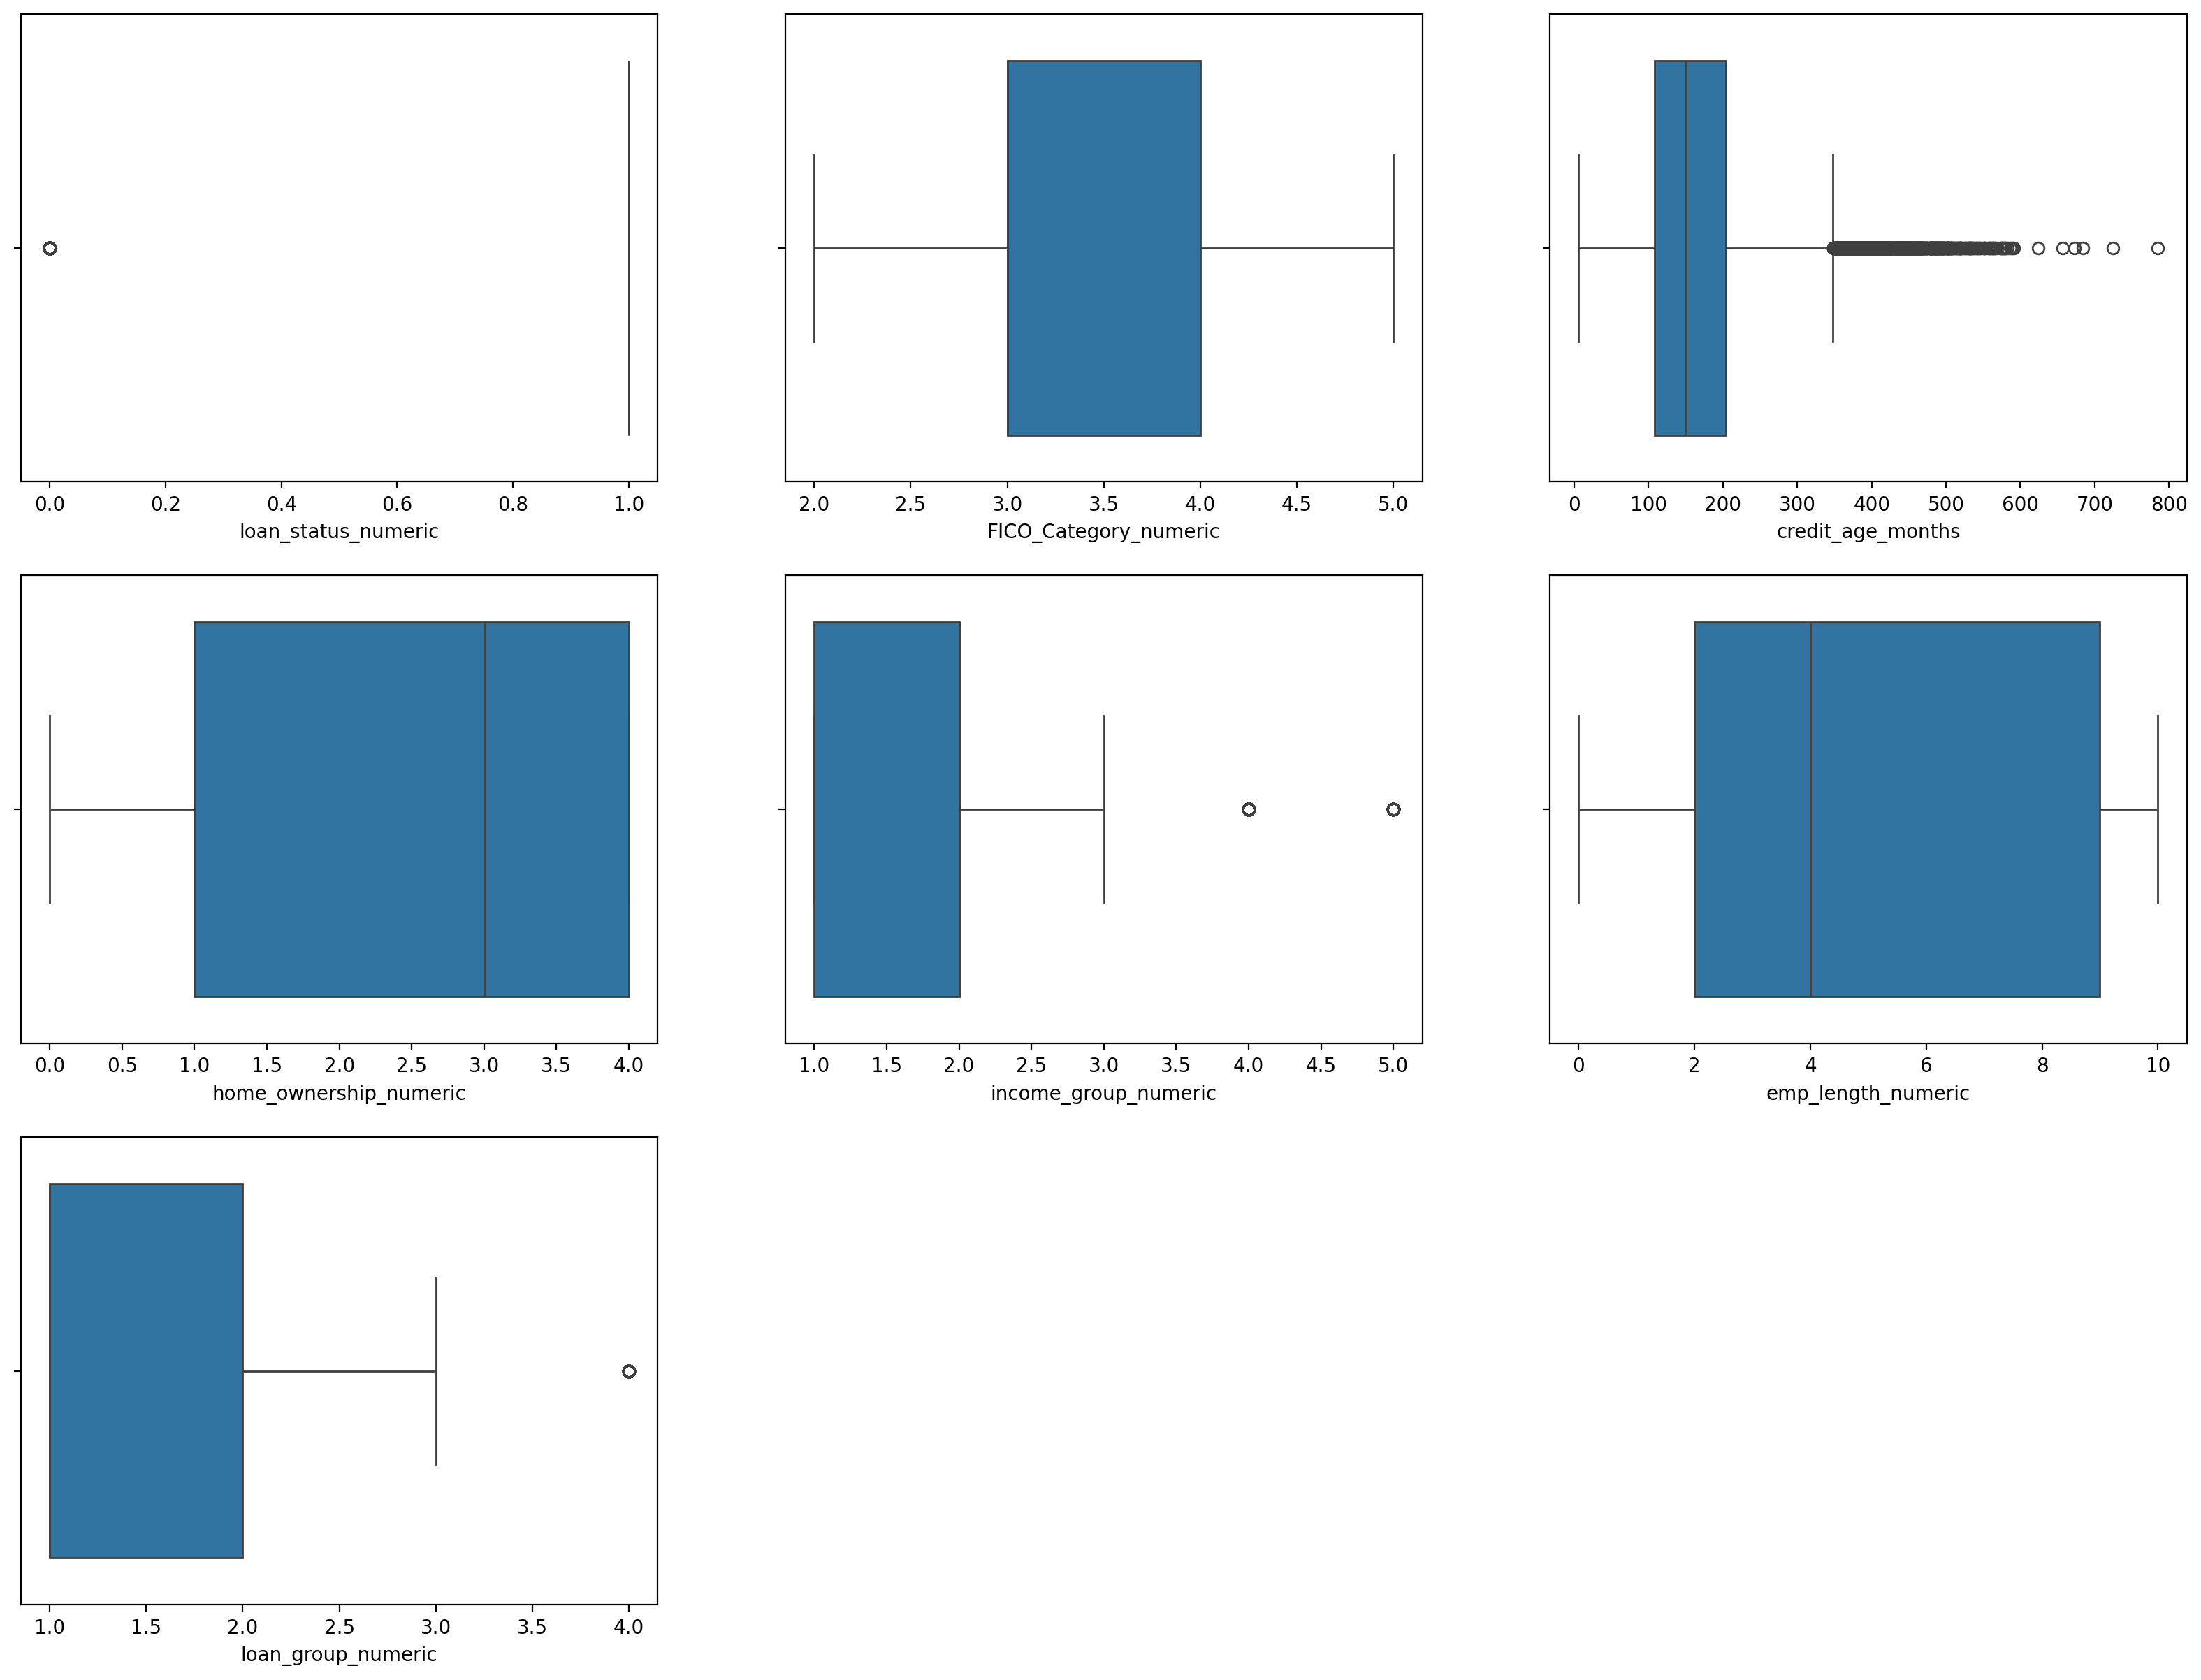

In [619]:
# Sprawdzam wartości odstające (outlayers)

plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'loan_status_numeric', data = df_clus)

plt.subplot(4,3,2)
sns.boxplot(x = 'FICO_Category_numeric', data = df_clus)

plt.subplot(4,3,3)
sns.boxplot(x = 'credit_age_months', data = df_clus)

plt.subplot(4,3,4)
sns.boxplot(x = 'home_ownership_numeric', data = df_clus)

plt.subplot(4,3,5)
sns.boxplot(x = 'income_group_numeric', data = df_clus)

plt.subplot(4,3,6)
sns.boxplot(x = 'emp_length_numeric', data = df_clus)

plt.subplot(4,3,7)
sns.boxplot(x = 'loan_group_numeric', data = df_clus)

### Usuwanie danych odstających w df_clus

In [622]:
from scipy import stats

z = np.abs(stats.zscore(df_clus[['loan_status_numeric', 'FICO_Category_numeric', 'credit_age_months', 'home_ownership_numeric', 'income_group_numeric', 'emp_length_numeric',
       'loan_group_numeric']]))
print(z)

       loan_status_numeric  FICO_Category_numeric  credit_age_months  \
0                     0.42                   0.30               1.92   
1                     2.37                   1.38               0.15   
2                     0.42                   0.30               0.52   
3                     0.42                   0.30               0.31   
4                     0.42                   0.30               0.33   
...                    ...                    ...                ...   
42531                 0.42                   0.30               0.67   
42532                 0.42                   0.30               0.67   
42533                 0.42                   0.30               0.67   
42534                 0.42                   1.38               0.67   
42535                 0.42                   1.38               0.67   

       home_ownership_numeric  income_group_numeric  emp_length_numeric  \
0                        0.98                  0.98         

### 'df_clus_out' gotowy dataframe bez wartości odstających

In [625]:
df_clus_out = df_clus[(z<3).all(axis=1)]

In [627]:
df_clus_out.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41048 entries, 0 to 42535
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_status_numeric     41048 non-null  float64
 1   FICO_Category_numeric   41048 non-null  float64
 2   credit_age_months       41048 non-null  float64
 3   home_ownership_numeric  41048 non-null  float64
 4   income_group_numeric    41048 non-null  float64
 5   emp_length_numeric      41048 non-null  float64
 6   loan_group_numeric      41048 non-null  float64
dtypes: float64(7)
memory usage: 2.5 MB


<Axes: xlabel='loan_group_numeric'>

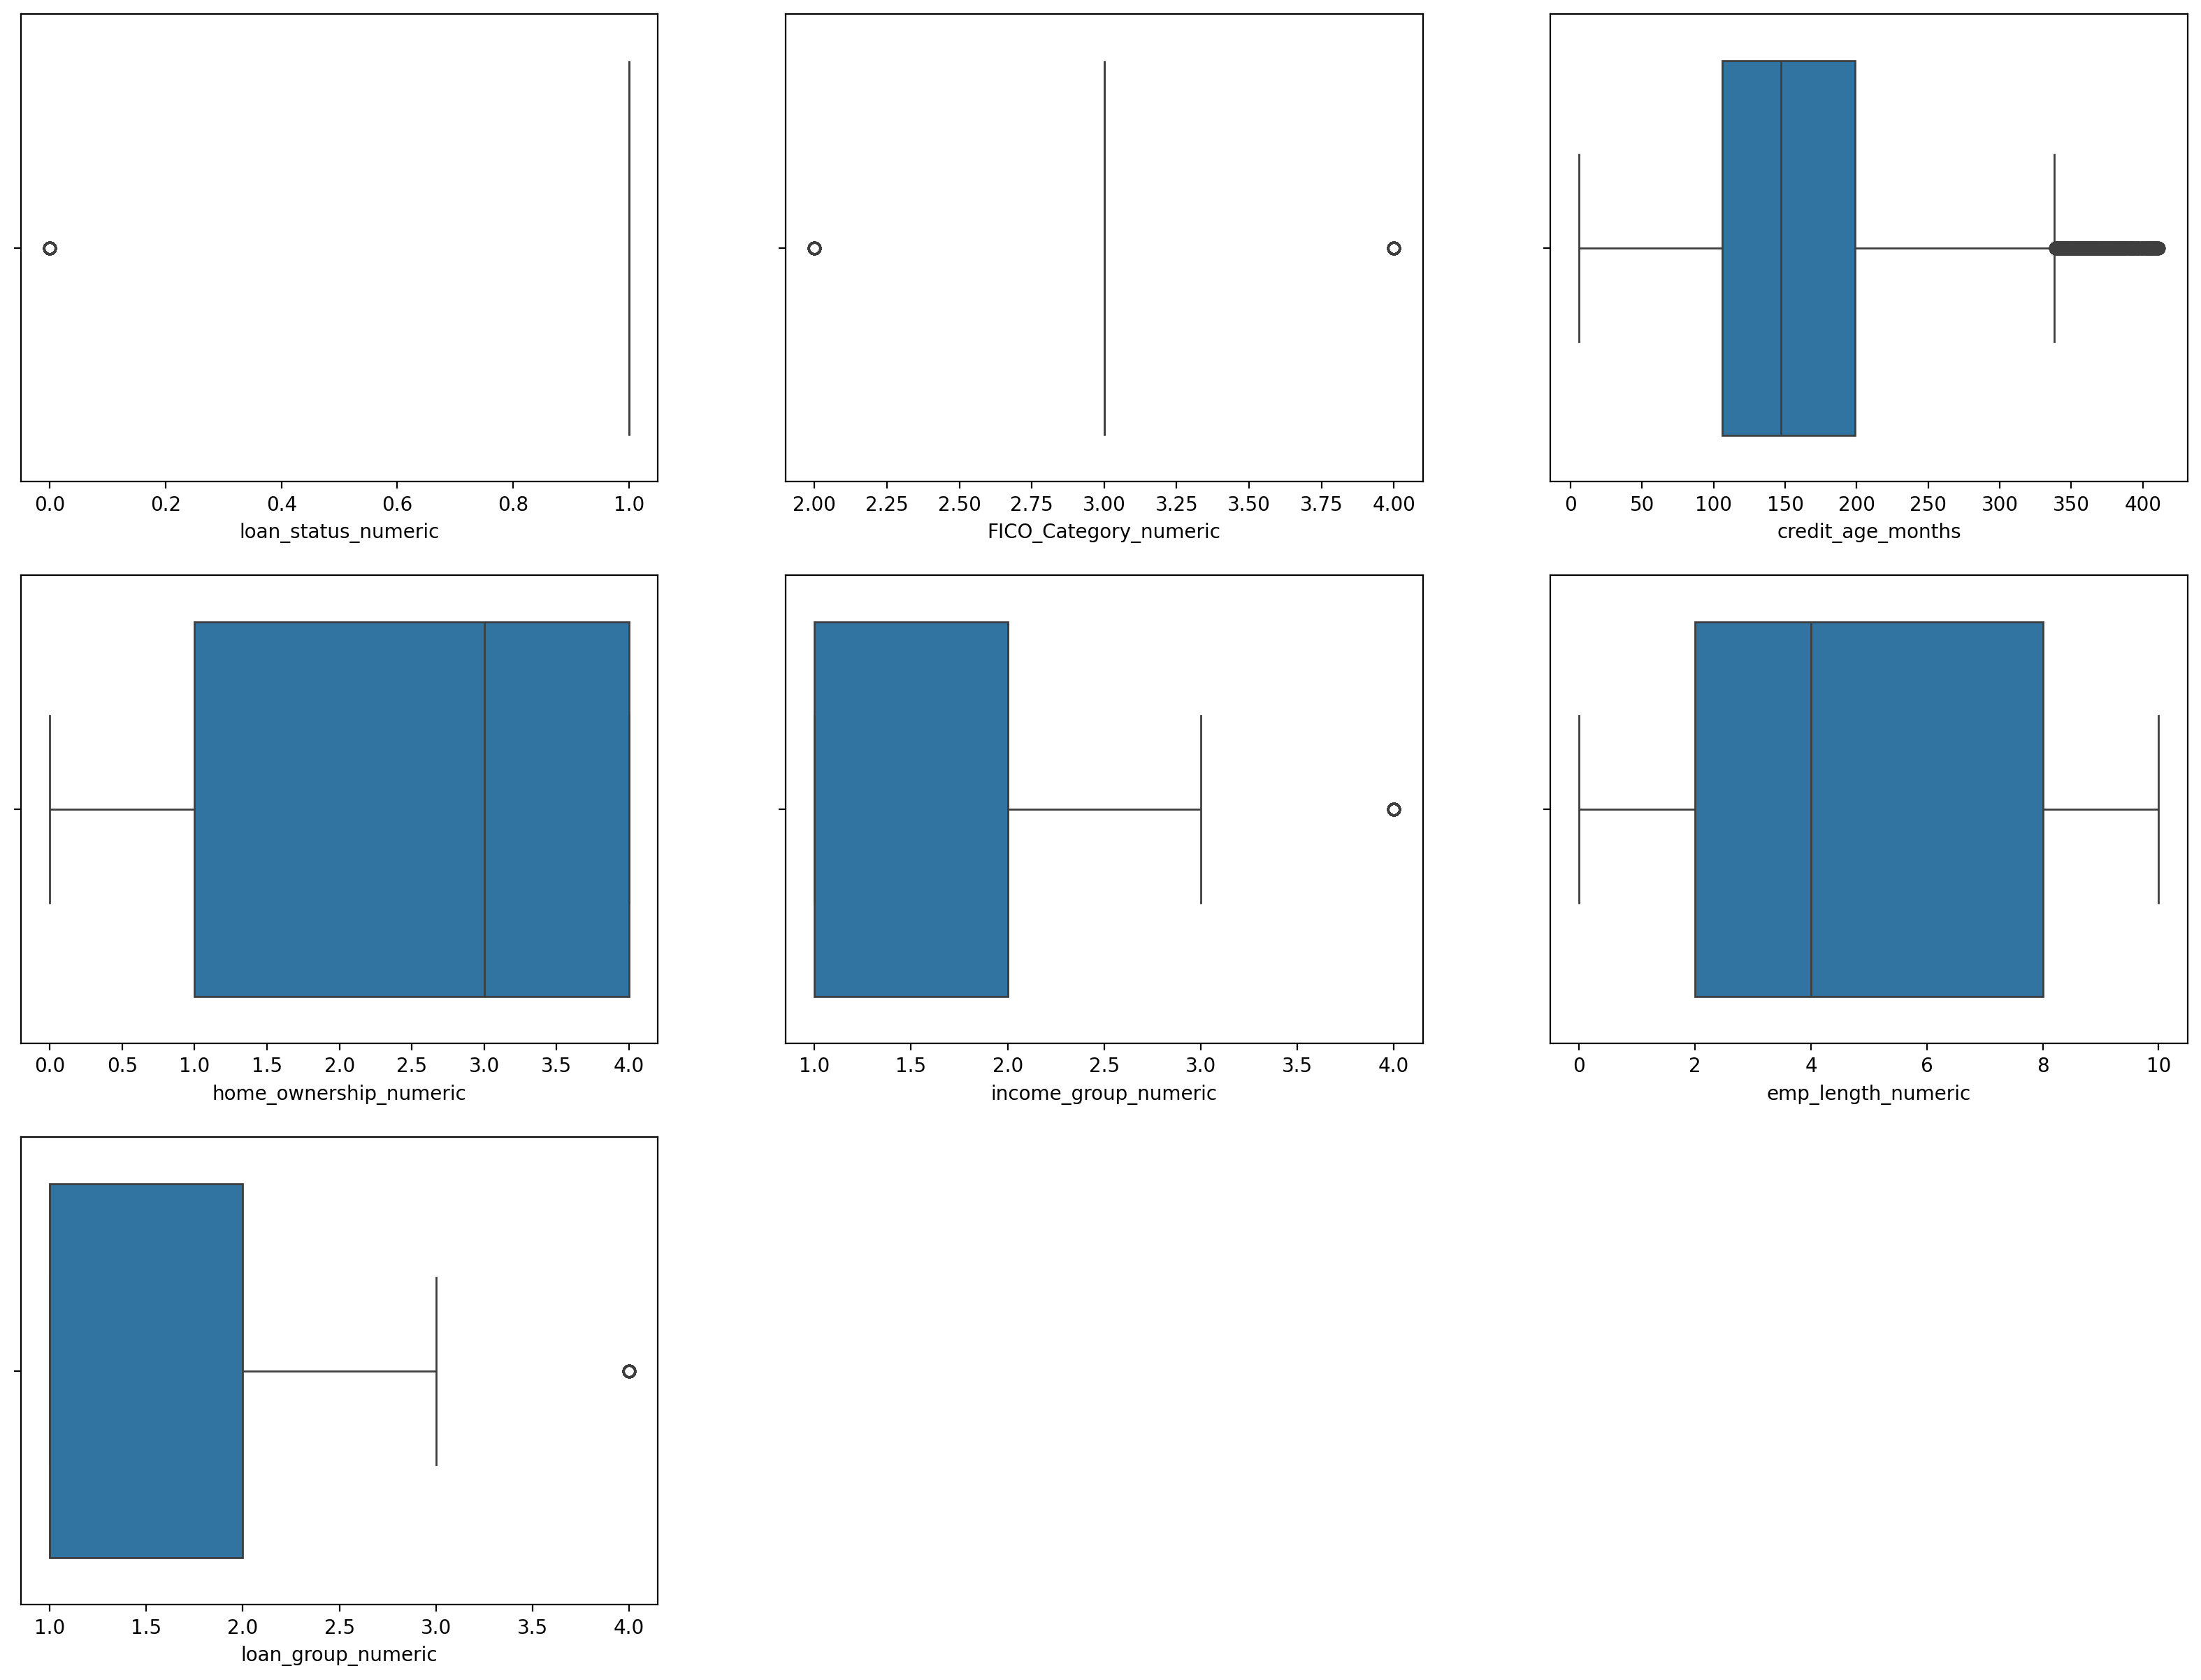

In [629]:
# Sprawdzam boxploty po usunięciu outlayersów.

plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'loan_status_numeric', data = df_clus_out)

plt.subplot(4,3,2)
sns.boxplot(x = 'FICO_Category_numeric', data = df_clus_out)

plt.subplot(4,3,3)
sns.boxplot(x = 'credit_age_months', data = df_clus_out)

plt.subplot(4,3,4)
sns.boxplot(x = 'home_ownership_numeric', data = df_clus_out)

plt.subplot(4,3,5)
sns.boxplot(x = 'income_group_numeric', data = df_clus_out)

plt.subplot(4,3,6)
sns.boxplot(x = 'emp_length_numeric', data = df_clus_out)

plt.subplot(4,3,7)
sns.boxplot(x = 'loan_group_numeric', data = df_clus_out)

### df_clus_out - skalowanie, PCA

In [632]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [634]:
X = df_clus_out.drop('loan_status_numeric',axis =1)  
y = df_clus_out['loan_status_numeric']

In [636]:
# 1. Skalowanie danych
scaler = StandardScaler()
df_clus_scaled = scaler.fit_transform(X)

In [638]:
# 2. Dopasowanie PCA do danych
pca = PCA()
df_clus_pca = pca.fit_transform(df_clus_scaled)

In [640]:
# 3. Wyjaśniona wariancja skumulowana
explained_variance_ratio = pca.explained_variance_ratio_.cumsum()

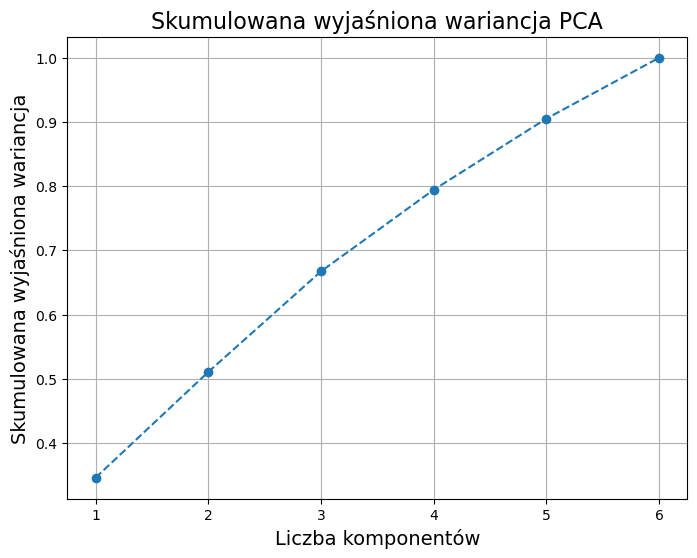

In [642]:
# 4. Wykres skumulowanej wyjaśnionej wariancji
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Skumulowana wyjaśniona wariancja PCA', fontsize=16)
plt.xlabel('Liczba komponentów', fontsize=14)
plt.ylabel('Skumulowana wyjaśniona wariancja', fontsize=14)
plt.grid()
plt.show()

In [644]:
# 5. Wybór liczby komponentów na podstawie progu informacyjnego
n_components = next(i for i, total_variance in enumerate(explained_variance_ratio, 1) if total_variance >= 0.95)
print(f"Optymalna liczba komponentów: {n_components}")

Optymalna liczba komponentów: 6


In [646]:
# 6. Ponowne PCA z optymalną liczbą komponentów
pca_optimal = PCA(n_components=n_components)
df_pca_optimal = pca_optimal.fit_transform(df_clus_scaled)

In [648]:
df_pca_optimal.shape

(41048, 6)

In [650]:
df_pca_optimal

array([[ 0.32724317,  1.31238217, -1.58039768,  1.70517997,  1.51172154,
        -0.48178974],
       [-1.45725851,  1.5737793 ,  1.41425434, -0.09700909,  0.57437022,
        -0.01911369],
       [-0.9701965 ,  0.69586121, -1.25030457,  1.2943249 , -0.52843844,
         0.43745463],
       ...,
       [-0.87264083, -1.03989576,  0.86240701, -0.72778619,  1.02840394,
         1.67869851],
       [ 0.11667966,  1.08010764,  1.01131481, -2.49985238, -0.4734727 ,
         0.3181525 ],
       [ 0.91402477,  1.52883239, -0.47205594, -0.51347947, -1.34798502,
         1.22408373]])

In [652]:
df_pca_optimal = pd.DataFrame(df_pca_optimal,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])

## 1. Wykonaj klasteryzację danych (wypróbuj do tego celu kilka metod, min. 3) i sprawdź, czy występują jakieś segmenty pożyczkobiorców, wykorzystaj odpowiednie metody do określenia optymalnej liczby klastrów (40 pkt)

### Metoda 1: K-Means

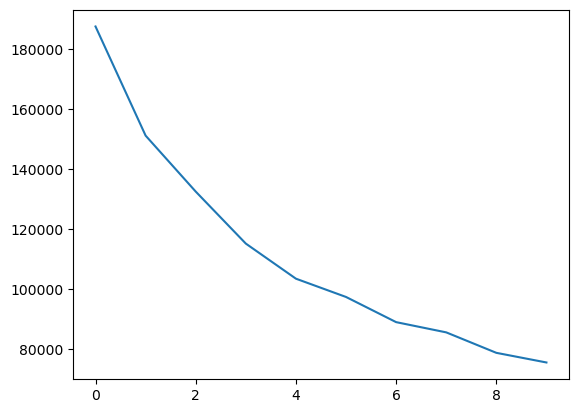

In [656]:
# Metoda łokcia dla określenia optymalnej ilości kolastrów.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

ssd = [] 
range_n_clusters = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(df_pca_optimal)  
    ssd.append(kmeans.inertia_)

plt.plot(ssd)

Optymalna liczba klastrów wg metody łokcia to 3.

In [659]:
# Silhouette Score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(df_pca_optimal)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(df_pca_optimal, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.22873039189419347
For n_clusters=3, the silhouette score is 0.2025687342118061
For n_clusters=4, the silhouette score is 0.2028896399703541
For n_clusters=5, the silhouette score is 0.17187506705276723
For n_clusters=6, the silhouette score is 0.19360273200660108
For n_clusters=7, the silhouette score is 0.1949173539136836
For n_clusters=8, the silhouette score is 0.18581241039786492
For n_clusters=9, the silhouette score is 0.20336168769589405
For n_clusters=10, the silhouette score is 0.19981991463311735


In [661]:
# Biorę pod uwagę Silhouette Score. Optymalna ilość klastrów to n=2.
kmeans = KMeans(n_clusters=2, max_iter=1000)
kmeans.fit(df_pca_optimal)

KMeans(max_iter=1000, n_clusters=2)

In [663]:
kmeans.labels_

array([0, 1, 1, ..., 1, 0, 0])

In [665]:
print(f'Inertia (WCSS): {kmeans.inertia_:.2f}')

Inertia (WCSS): 187537.58


In [667]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(df_pca_optimal, kmeans.labels_)
print(f'Davies-Bouldin Index: {db_index:.2f}')

Davies-Bouldin Index: 1.71


In [669]:
df_clus_out['K-Means_Cluster'] = kmeans.labels_

C:\Users\Krzysztof\AppData\Local\Temp\ipykernel_2796\1342796286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clus_out['K-Means_Cluster'] = kmeans.labels_


In [671]:
df_clus_out

loan_status_numeric  FICO_Category_numeric  credit_age_months  \
0                     1.00                   3.00             323.00   
1                     0.00                   4.00             152.00   
2                     1.00                   3.00             121.00   
3                     1.00                   3.00             190.00   
4                     1.00                   3.00             191.00   
...                    ...                    ...                ...   
42531                 1.00                   3.00             109.00   
42532                 1.00                   3.00             109.00   
42533                 1.00                   3.00             109.00   
42534                 1.00                   4.00             109.00   
42535                 1.00                   4.00             109.00   

       home_ownership_numeric  income_group_numeric  emp_length_numeric  \
0                        4.00                  1.00               10.00   
1                        4.00                  1.00                0.00   
2                        4.00                  1.00               10.00   
3                        4.00                  1.00               10.00   
4                        4.00                  2.00                1.00   
...                       ...                   ...                 ...   
42531                    4.00                  4.00                0.00   
42532                    4.00                  1.00                0.00   
42533                    4.00                  3.00                0.00   
42534                    0.00                  2.00                0.00   
42535                    1.00                  2.00               10.00   

       loan_group_numeric  K-Means_Cluster  
0                    1.00                0  
1                    1.00                1  
2                    1.00                1  
3                    2.00                1  
4                    1.00                1  
...                   ...              ...  
42531                1.00                1  
42532                1.00                1  
42533                1.00                1  
42534                1.00                0  
42535                1.00                0  

[41048 rows x 8 columns]

K-Means_Cluster
0   1.00
1   1.00
Name: loan_status_numeric, dtype: float64


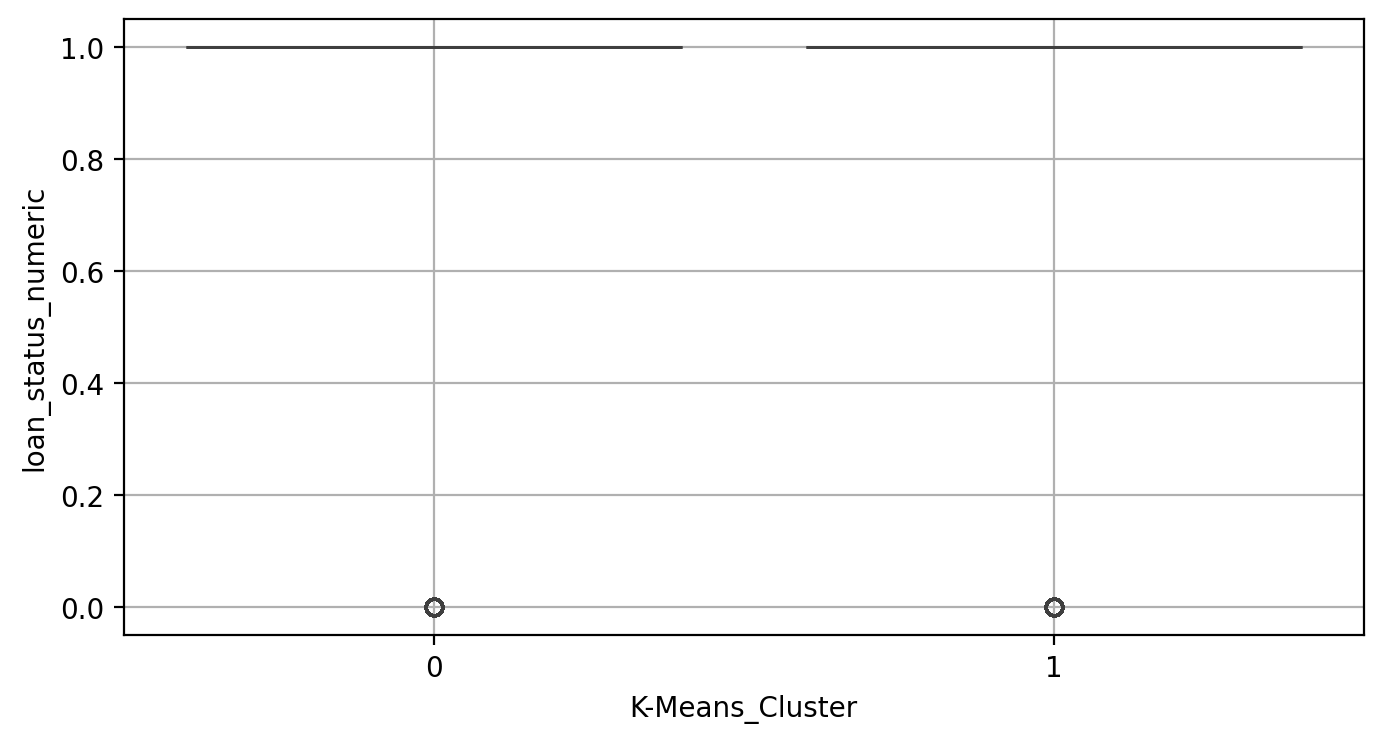

In [673]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster', y='loan_status_numeric', data=df_clus_out)
plt.grid()

average_loan_status_cluster = df_clus_out.groupby('K-Means_Cluster')['loan_status_numeric'].median()
print(average_loan_status_cluster)

K-Means_Cluster
0   3.00
1   3.00
Name: FICO_Category_numeric, dtype: float64


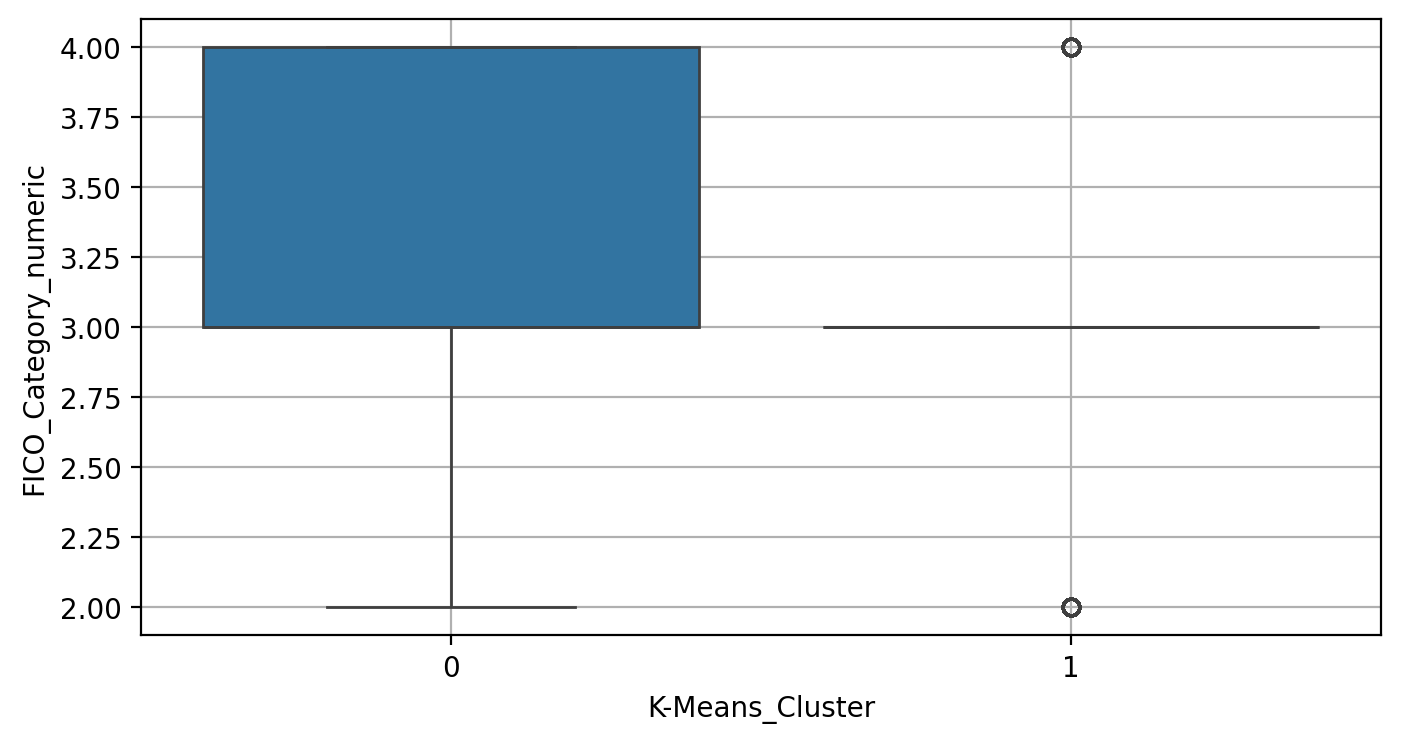

In [675]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster', y='FICO_Category_numeric', data=df_clus_out)
plt.grid()

average_fico_per_cluster = df_clus_out.groupby('K-Means_Cluster')['FICO_Category_numeric'].median()
print(average_fico_per_cluster)

K-Means_Cluster
0   189.00
1   116.00
Name: credit_age_months, dtype: float64


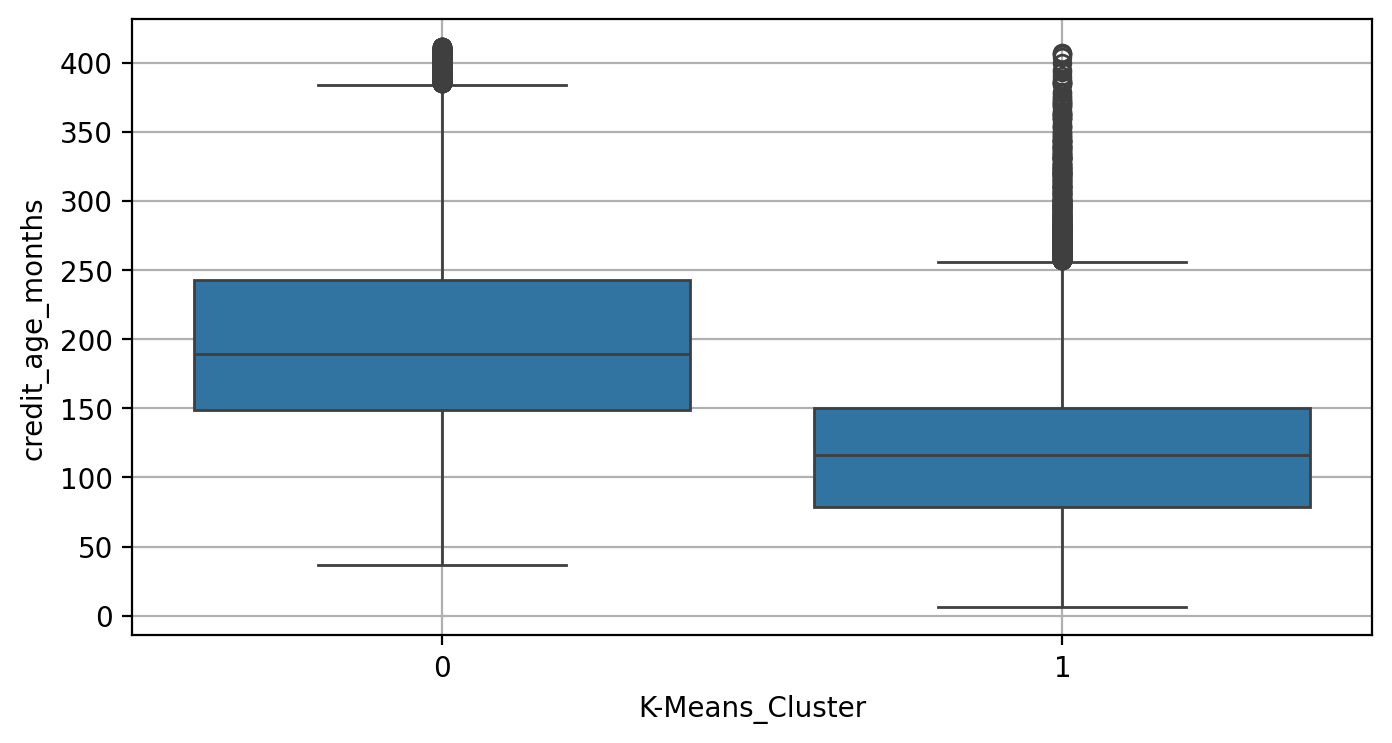

In [677]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster', y='credit_age_months', data=df_clus_out)
plt.grid()

average_credit_age_cluster = df_clus_out.groupby('K-Means_Cluster')['credit_age_months'].median()
print(average_credit_age_cluster)

K-Means_Cluster
0   1.00
1   4.00
Name: home_ownership_numeric, dtype: float64


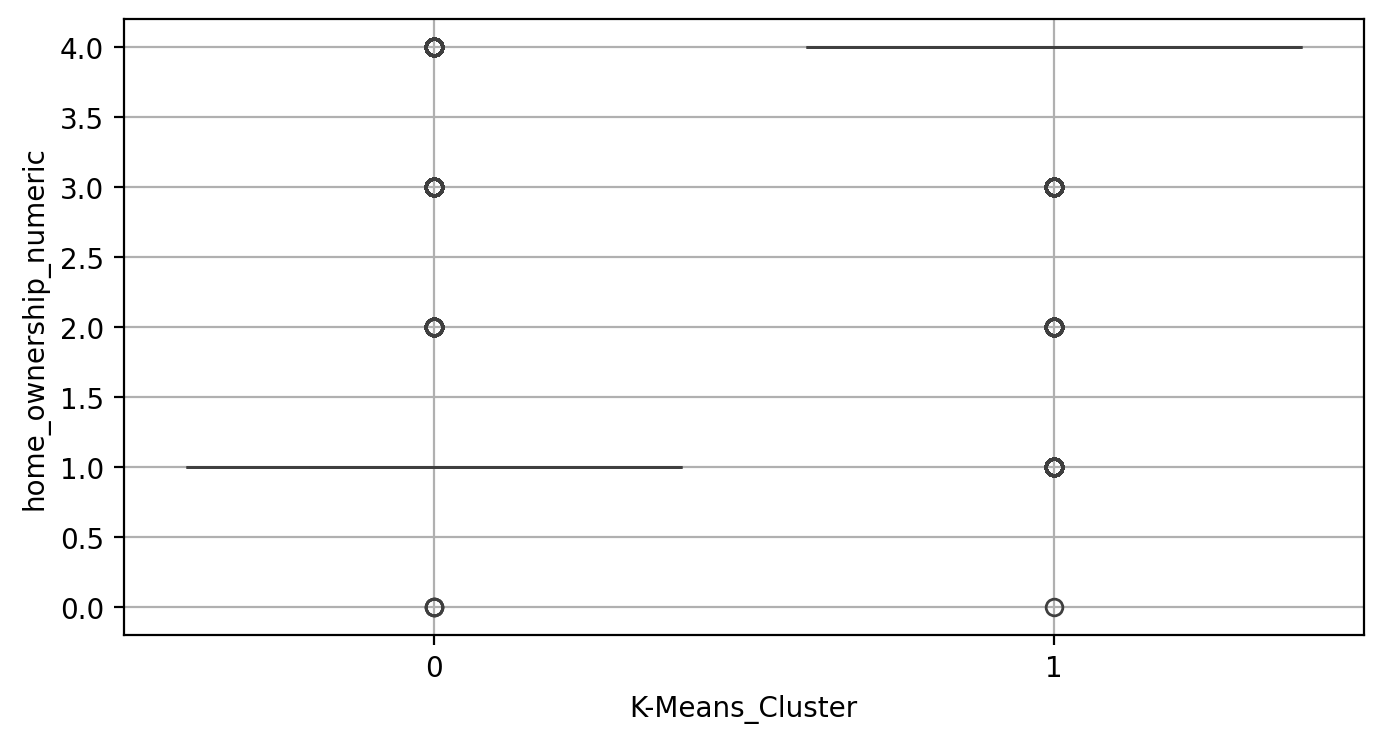

In [679]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster', y='home_ownership_numeric', data=df_clus_out)
plt.grid()

average_home_own_cluster = df_clus_out.groupby('K-Means_Cluster')['home_ownership_numeric'].median()
print(average_home_own_cluster)

K-Means_Cluster
0   2.00
1   1.00
Name: income_group_numeric, dtype: float64


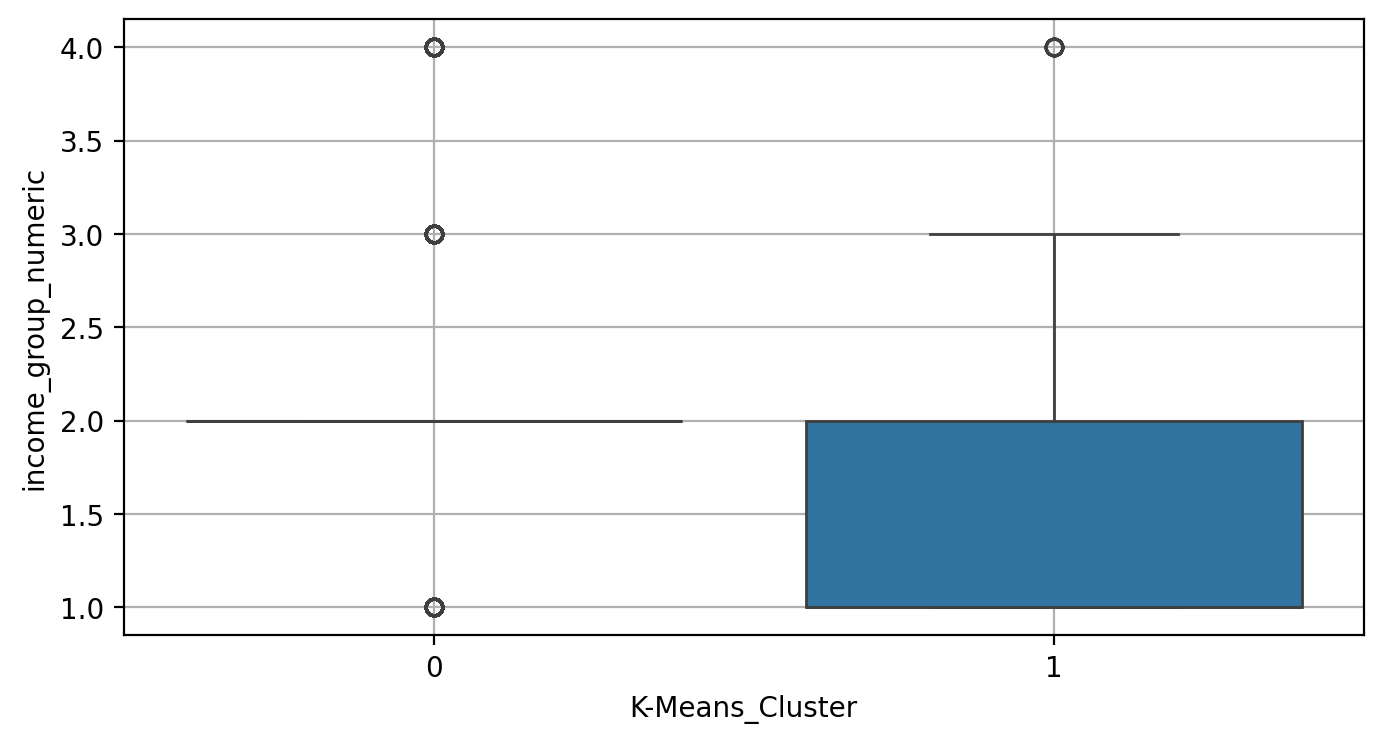

In [681]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster', y='income_group_numeric', data=df_clus_out)
plt.grid()

average_income_cluster = df_clus_out.groupby('K-Means_Cluster')['income_group_numeric'].median()
print(average_income_cluster)

K-Means_Cluster
0   7.00
1   3.00
Name: emp_length_numeric, dtype: float64


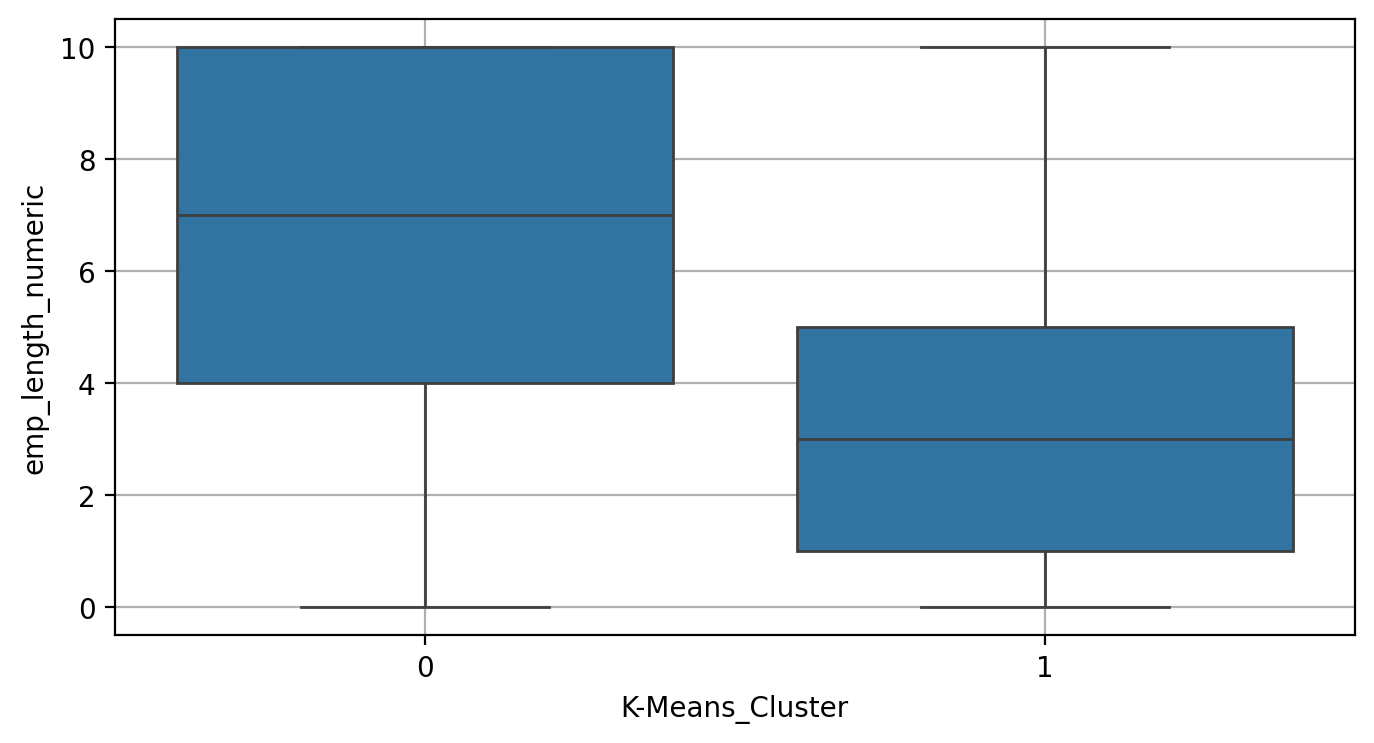

In [683]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster', y='emp_length_numeric', data=df_clus_out)
plt.grid()

average_emp_len_cluster = df_clus_out.groupby('K-Means_Cluster')['emp_length_numeric'].median()
print(average_emp_len_cluster)

K-Means_Cluster
0   2.00
1   1.00
Name: loan_group_numeric, dtype: float64


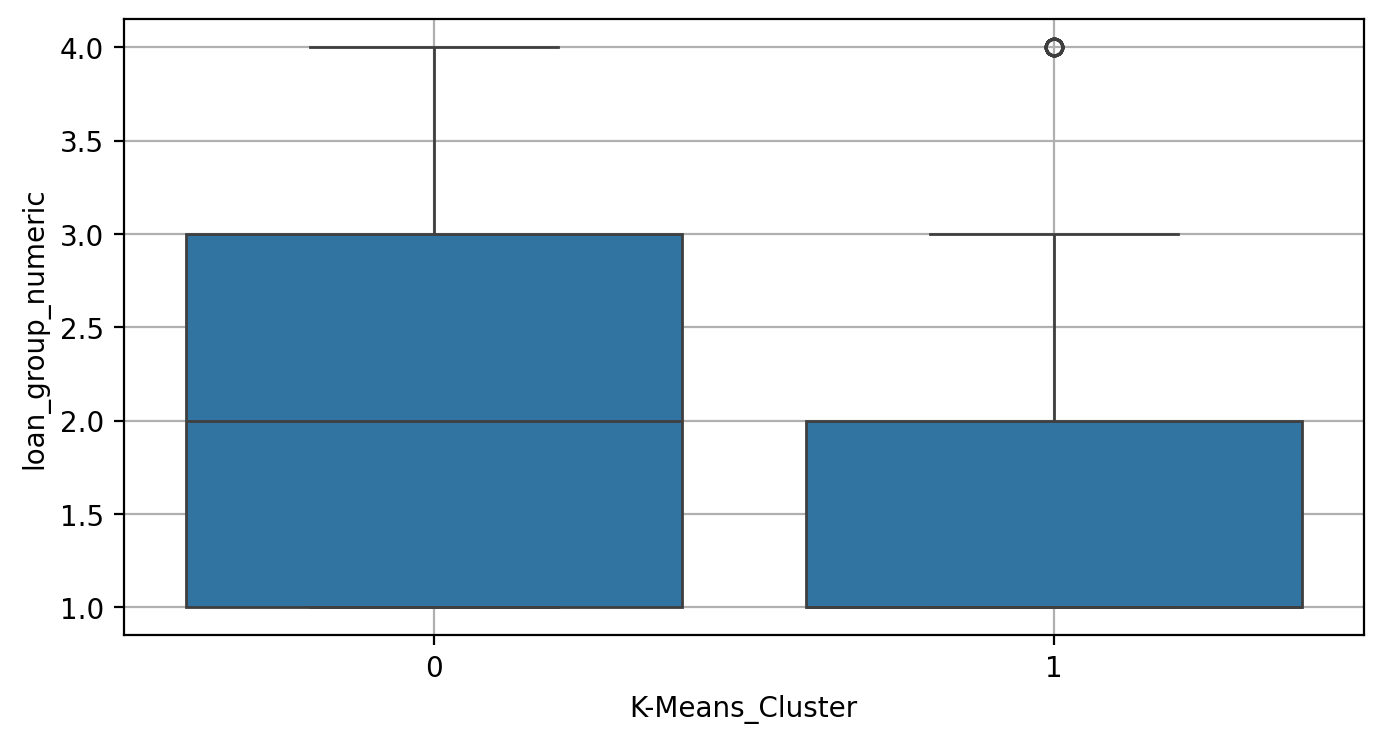

In [685]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster', y='loan_group_numeric', data=df_clus_out)
plt.grid()

average_loan_cluster = df_clus_out.groupby('K-Means_Cluster')['loan_group_numeric'].median()
print(average_loan_cluster)

In [687]:
averages_per_cluster = df_clus_out.groupby('K-Means_Cluster').mean()
averages_per_cluster

loan_status_numeric  FICO_Category_numeric  \
K-Means_Cluster                                               
0                               0.86                   3.29   
1                               0.84                   3.01   

                 credit_age_months  home_ownership_numeric  \
K-Means_Cluster                                              
0                           201.12                    1.63   
1                           120.36                    3.48   

                 income_group_numeric  emp_length_numeric  loan_group_numeric  
K-Means_Cluster                                                                
0                                2.16                6.60                2.01  
1                                1.38                3.31                1.36

In [689]:
median_per_cluster = df_clus_out.groupby('K-Means_Cluster').median()
median_per_cluster

loan_status_numeric  FICO_Category_numeric  \
K-Means_Cluster                                               
0                               1.00                   3.00   
1                               1.00                   3.00   

                 credit_age_months  home_ownership_numeric  \
K-Means_Cluster                                              
0                           189.00                    1.00   
1                           116.00                    4.00   

                 income_group_numeric  emp_length_numeric  loan_group_numeric  
K-Means_Cluster                                                                
0                                2.00                7.00                2.00  
1                                1.00                3.00                1.00

#### Obserwacje i wnioski do K-Means

1. Klaster nr 0 zebrał następujących pożyczkobiorców w swoich kategoriach:
   
   -FICO Category - Mediana należy do grupy 3 czyli "Good".
   
   -Credit Age Months - Drugi i Trzeci kwartyl zawiera sie w przedziale 80-150 miesięcy, gdzie mediana wynosi 116 miesięcy.
   
   -Home Ownership - mediana należy do wartości 4 czyli Rent
   
   -Income Group - 75% wartości w klastrze nr 0 zawiera się w grupie 1 i 2, czyli odpowiednio Niskie i Średnie - przedział rocznego dochodu 0 - 100000.
   
   -Emp Length - drugi i trzeci kwartyl należy do przedziału 1-5 lat zatrudnienia, mediana 3 lata.
   
   -Loan Group - 75% wartości należy do grupy 1 i 2, odpowiednio określając przedział pożyczek do 20000.
   
2. Klaster nr 1 zebrał następujących pożyczkobiorców w swoich kategoriach:

   -FICO Category - 75% pożyczkobiorców w klastrze nr 1 należy do grupy 3 i 4 Fico Category, odpowiednio jest to Good i Very Good

   -Credit Age Months - Drugi i Trzeci kwartyl zawiera sie w przedziale 150-245 miesięcy.
   
   -Home Ownership - mediana należy do wartości 1 czyli Mortgage

   -Income Group - rozkład jest bardzo wąski, określony wąsko i jednoznacznie do grupy nr 2, czyli zakresu 50000-100000 rocznego dochodu.

   -Emp Length - 75% pożyczkobiorców w klastrze nr 1 to osoby których wiek zatrudnienia jest wyższy niż 4 lata.

   -Loan Group - 50% pożyczkobioców w klastrze nr 1 otrzymało pożyczki w wysokości do 20000, natomiast pozostałe 50% pożyczkobiorców w tym klastrze otrzymała pożyczkę wyższą niż 20000.

3. Natomiast porównując częstości występowania wartości 1 (kredyt spłacony) w kolumnie loan_status w klastrze nr 0 i 1 to zauważamy różnicę jedynie o  0.02, co oznacza różnicę 2% prawdopodobieństwa spłacenia kredytu między klastrami. Zatem klaster nr 1 tworzy grupę kredytobiorców (o określonych cechach) z wyższym o 2% prawdopodobieństwem spłacenia pożyczki.

4. Niewielka róźnica prawdopodobieństwa spłaty pożyczki nie pozwala określić cech denerminujących zmienność prawdopodobieństwa spłaty. Należałoby podejść do modelowania raz jeszcze z użyciem większego zbioru danych lub zadania modelowi możliwości dzielenia danych na większe ilości klastrów.

### Metoda 2: Hierarchiczna klasteryzacja (Agglomerative Clustering)

In [694]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

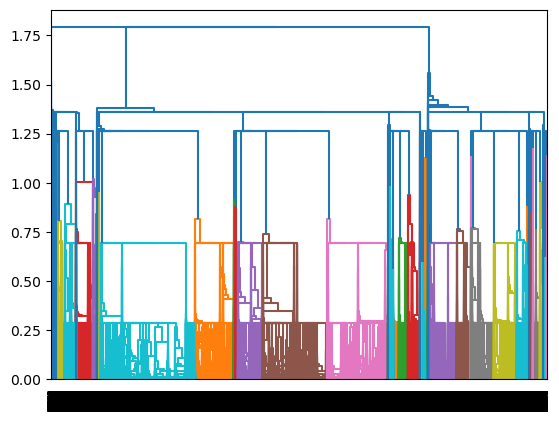

In [696]:
# Metoda najbliższego sąsiada - single
sl_mergings = linkage(df_pca_optimal, method="single", metric="euclidean")

# Dendogram
dendrogram(sl_mergings)
plt.show()

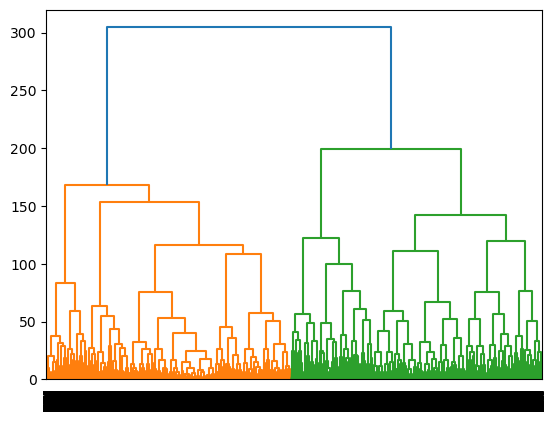

In [697]:
# Minimalizacja wariancji - ward
wd_mergings = linkage(df_pca_optimal, method="ward", metric="euclidean")
dendrogram(wd_mergings)
plt.show()

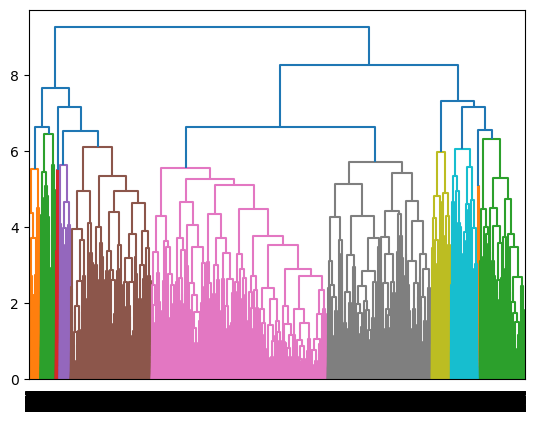

In [698]:
# Metoda najdalszego sąsiada - complete
cl_mergings = linkage(df_pca_optimal, method="complete", metric='euclidean')
dendrogram(cl_mergings)
plt.show()

In [702]:
# Tworzenie macierzy połączeń z metodą 'ward', ponieważ dendogram w przypadku ward wygląda najlepiej.
Z = linkage(df_pca_optimal, method='ward')

In [703]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score
# Silhouette Score do przetestowania z zakresu liczby klastrów w Klasyfikacji Hierarchicznej
range_n_clusters = list(range(2, 9))

silhouette_scores = []

for n_clusters in range_n_clusters:
    # Tworzenie klastrów (cięcie dendrogramu)
    cluster_labels = fcluster(Z, t=n_clusters, criterion='maxclust')

    # Obliczanie Silhouette Score
    score = silhouette_score(df_pca_optimal, cluster_labels)
    silhouette_scores.append(score)
    print(f"Liczba klastrów: {n_clusters}, Silhouette Score: {score:.2f}")

# Znalezienie optymalnej liczby klastrów
best_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print(f"Optymalna liczba klastrów: {best_n_clusters}")

Liczba klastrów: 2, Silhouette Score: 0.19
Liczba klastrów: 3, Silhouette Score: 0.17
Liczba klastrów: 4, Silhouette Score: 0.17
Liczba klastrów: 5, Silhouette Score: 0.16
Liczba klastrów: 6, Silhouette Score: 0.16
Liczba klastrów: 7, Silhouette Score: 0.17
Liczba klastrów: 8, Silhouette Score: 0.19
Optymalna liczba klastrów: 2


In [704]:
df_pca_optimal

PC1   PC2   PC3   PC4   PC5   PC6
0      0.33  1.31 -1.58  1.71  1.51 -0.48
1     -1.46  1.57  1.41 -0.10  0.57 -0.02
2     -0.97  0.70 -1.25  1.29 -0.53  0.44
3     -0.03  0.34 -0.79  1.88 -0.24 -0.45
4     -0.87 -0.14  0.34 -0.15  1.46  0.43
...     ...   ...   ...   ...   ...   ...
41043 -0.24 -1.64  1.08 -0.99  1.32  2.62
41044 -2.15  0.15  0.43 -0.20  0.45 -0.21
41045 -0.87 -1.04  0.86 -0.73  1.03  1.68
41046  0.12  1.08  1.01 -2.50 -0.47  0.32
41047  0.91  1.53 -0.47 -0.51 -1.35  1.22

[41048 rows x 6 columns]

In [705]:
# Z wizualnego odczytu dendogramu metodą ward jak też Silhouette Score wynika, że optymalna ilość klastrów to 2.
wd_cluster_labels = cut_tree(wd_mergings, n_clusters=2).reshape(-1, )
wd_cluster_labels

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [706]:
df_clus_out["Hierarchical_Cluster"] = wd_cluster_labels
df_clus_out

C:\Users\Krzysztof\AppData\Local\Temp\ipykernel_2796\1291461576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clus_out["Hierarchical_Cluster"] = wd_cluster_labels


loan_status_numeric  FICO_Category_numeric  credit_age_months  \
0                     1.00                   3.00             323.00   
1                     0.00                   4.00             152.00   
2                     1.00                   3.00             121.00   
3                     1.00                   3.00             190.00   
4                     1.00                   3.00             191.00   
...                    ...                    ...                ...   
42531                 1.00                   3.00             109.00   
42532                 1.00                   3.00             109.00   
42533                 1.00                   3.00             109.00   
42534                 1.00                   4.00             109.00   
42535                 1.00                   4.00             109.00   

       home_ownership_numeric  income_group_numeric  emp_length_numeric  \
0                        4.00                  1.00               10.00   
1                        4.00                  1.00                0.00   
2                        4.00                  1.00               10.00   
3                        4.00                  1.00               10.00   
4                        4.00                  2.00                1.00   
...                       ...                   ...                 ...   
42531                    4.00                  4.00                0.00   
42532                    4.00                  1.00                0.00   
42533                    4.00                  3.00                0.00   
42534                    0.00                  2.00                0.00   
42535                    1.00                  2.00               10.00   

       loan_group_numeric  K-Means_Cluster  Hierarchical_Cluster  
0                    1.00                0                     0  
1                    1.00                1                     0  
2                    1.00                1                     0  
3                    2.00                1                     0  
4                    1.00                1                     0  
...                   ...              ...                   ...  
42531                1.00                1                     0  
42532                1.00                1                     0  
42533                1.00                1                     0  
42534                1.00                0                     1  
42535                1.00                0                     1  

[41048 rows x 9 columns]

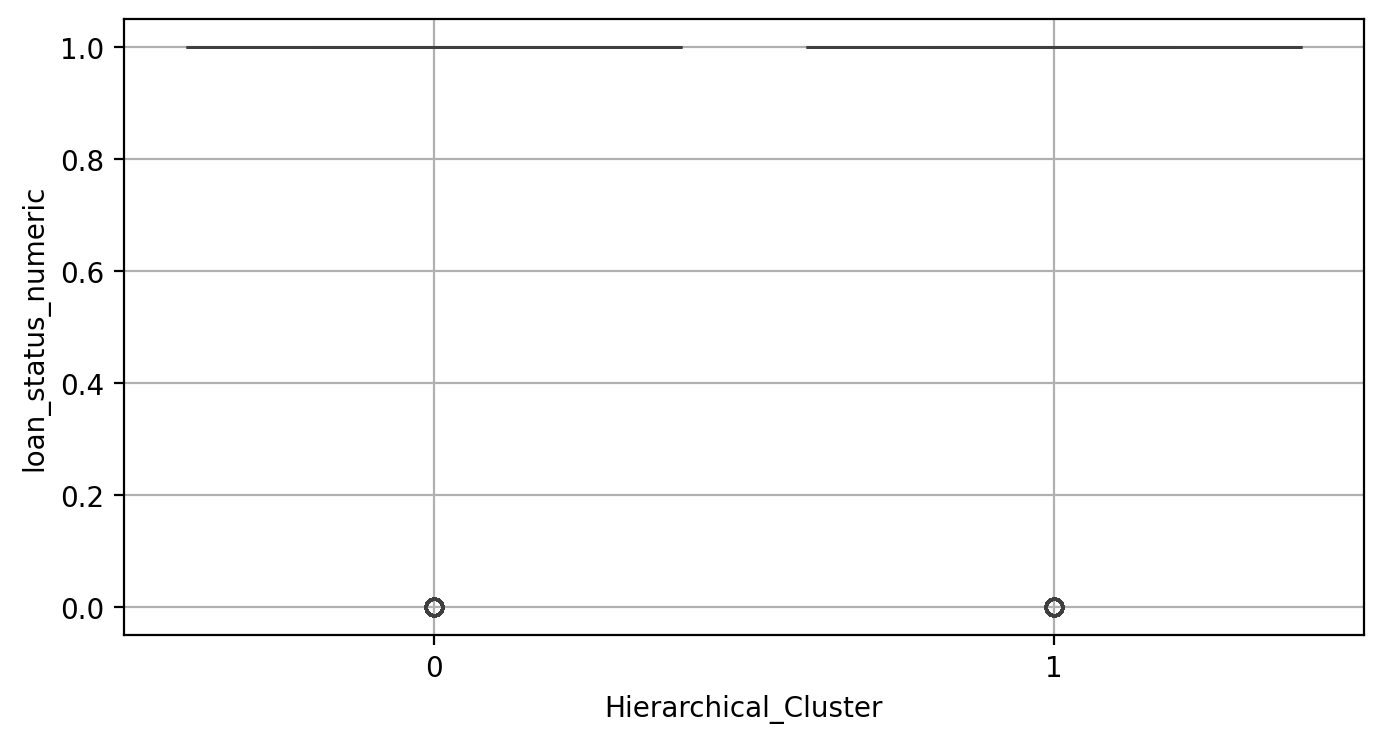

In [707]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='Hierarchical_Cluster', y='loan_status_numeric', data=df_clus_out)
plt.grid()

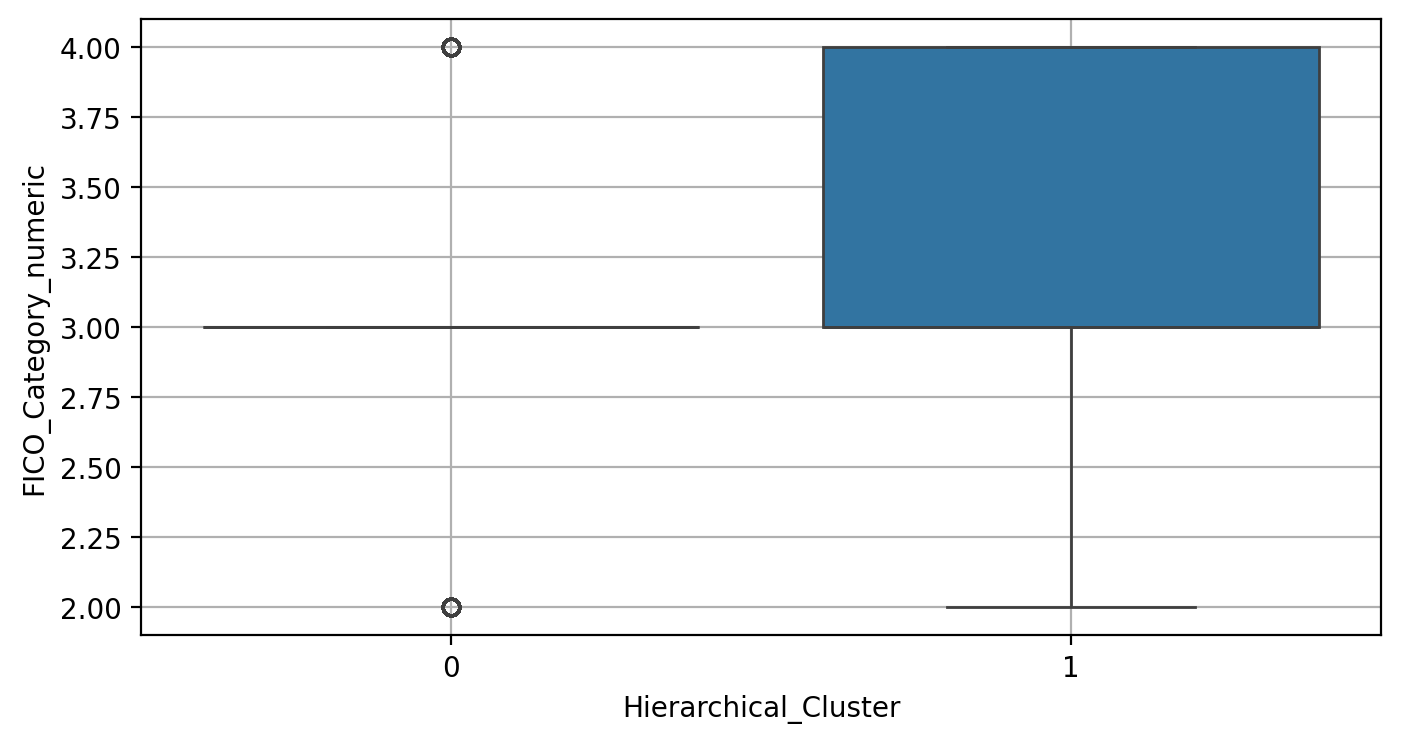

In [709]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='Hierarchical_Cluster', y='FICO_Category_numeric', data=df_clus_out)
plt.grid()

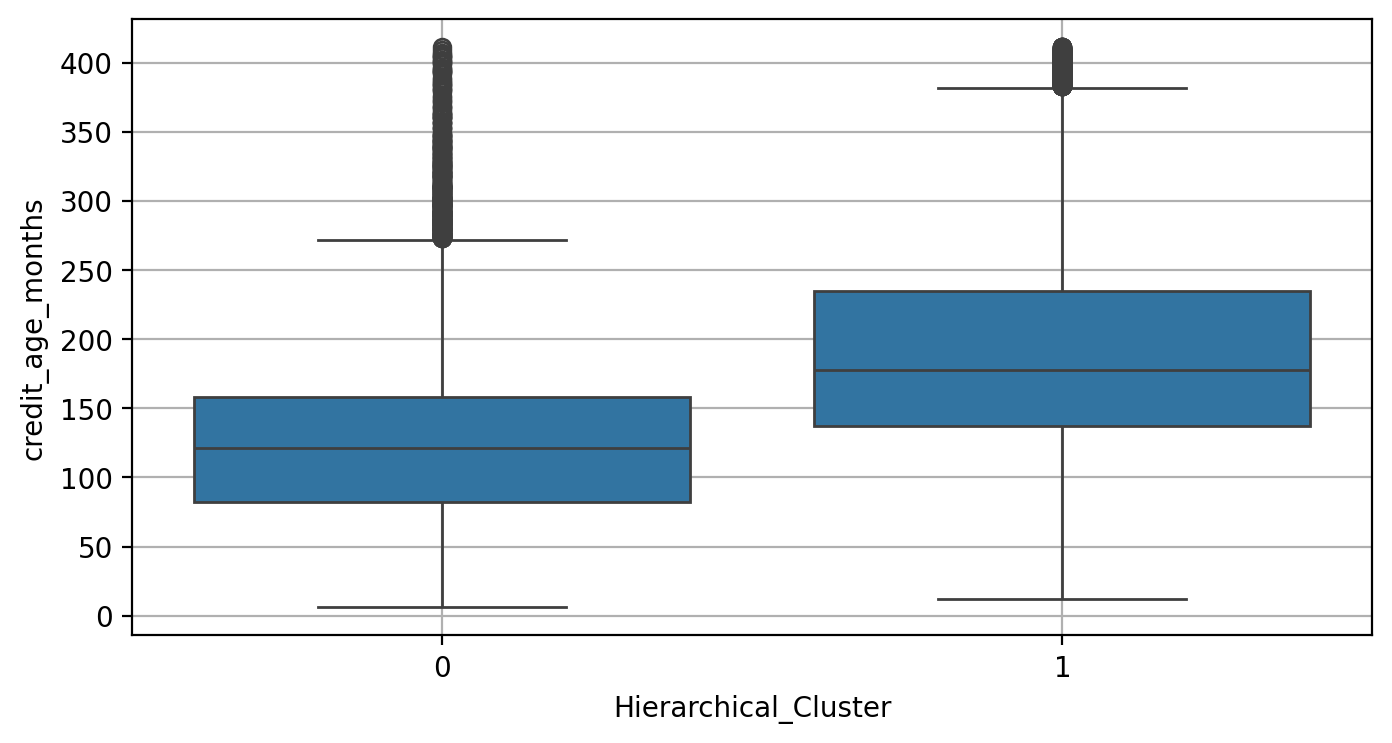

In [710]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='Hierarchical_Cluster', y='credit_age_months', data=df_clus_out)
plt.grid()

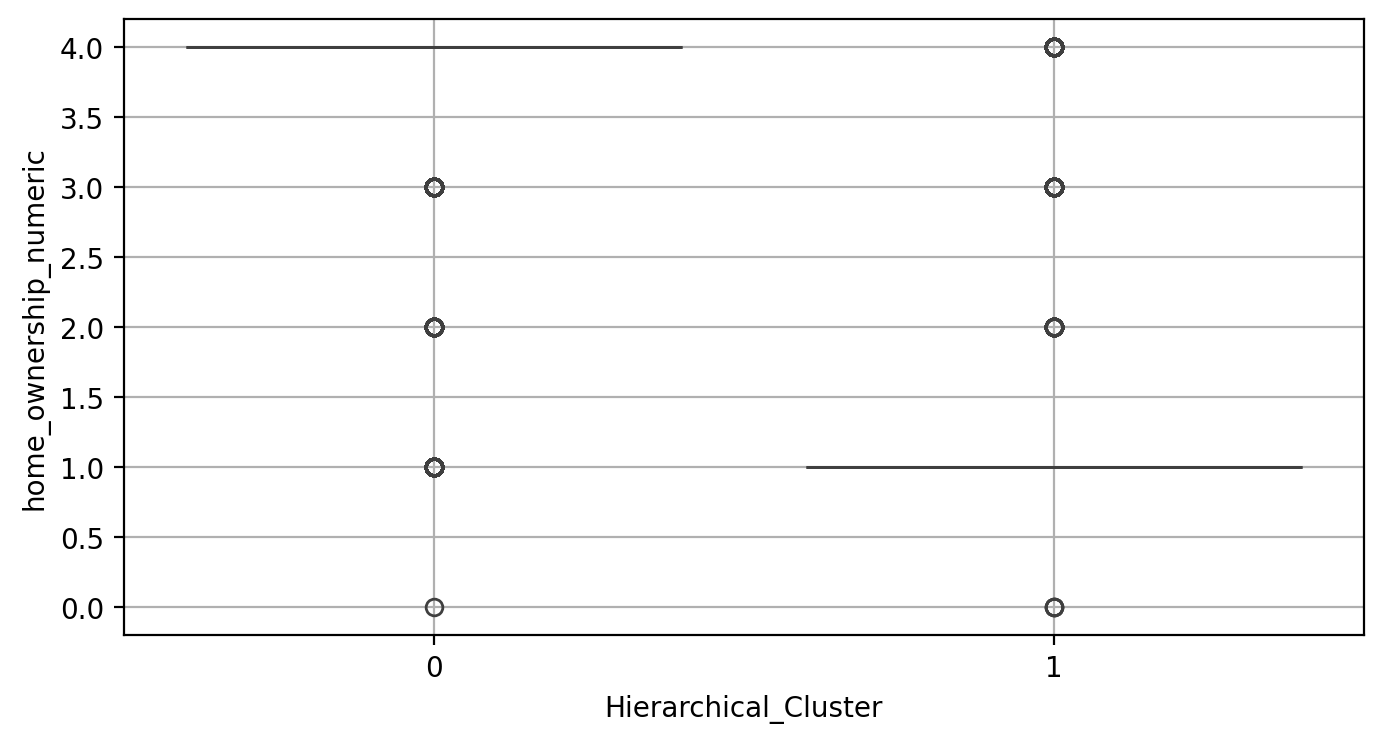

In [711]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='Hierarchical_Cluster', y='home_ownership_numeric', data=df_clus_out)
plt.grid()

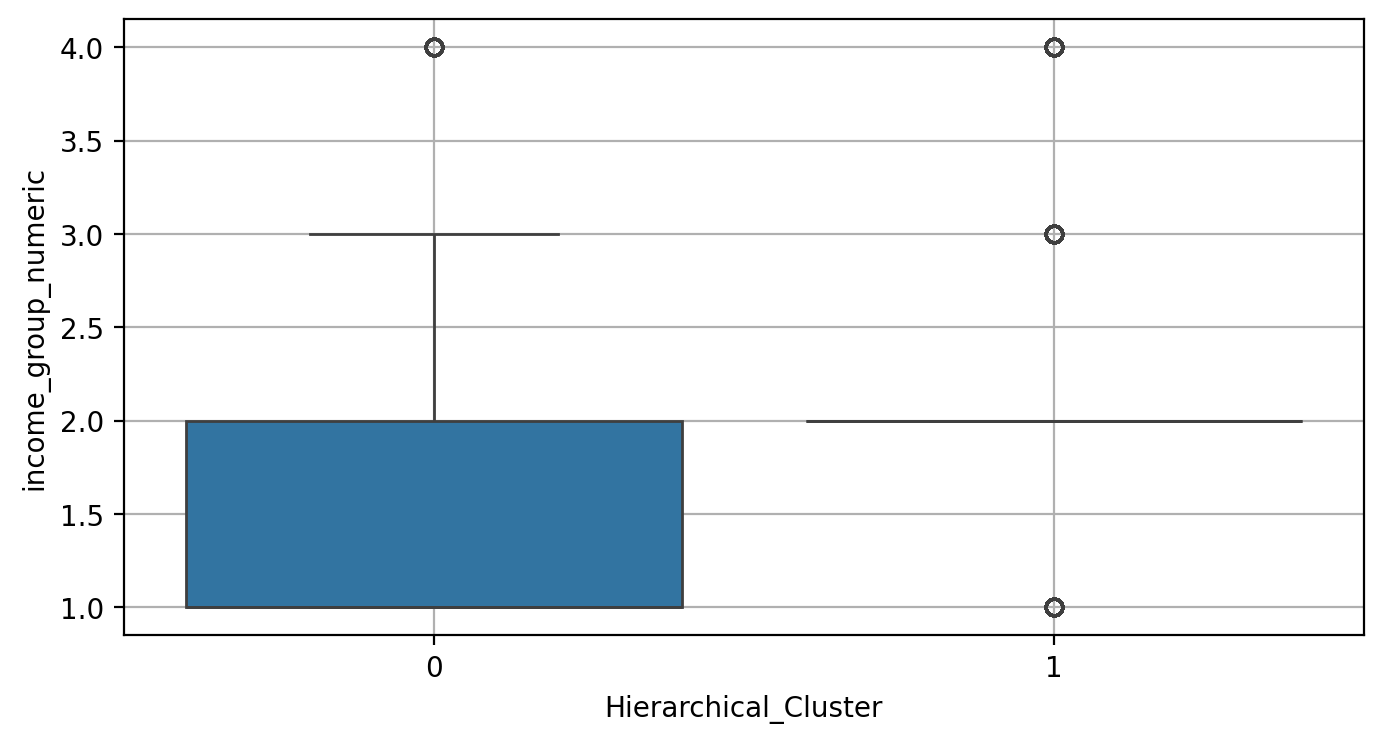

In [712]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='Hierarchical_Cluster', y='income_group_numeric', data=df_clus_out)
plt.grid()

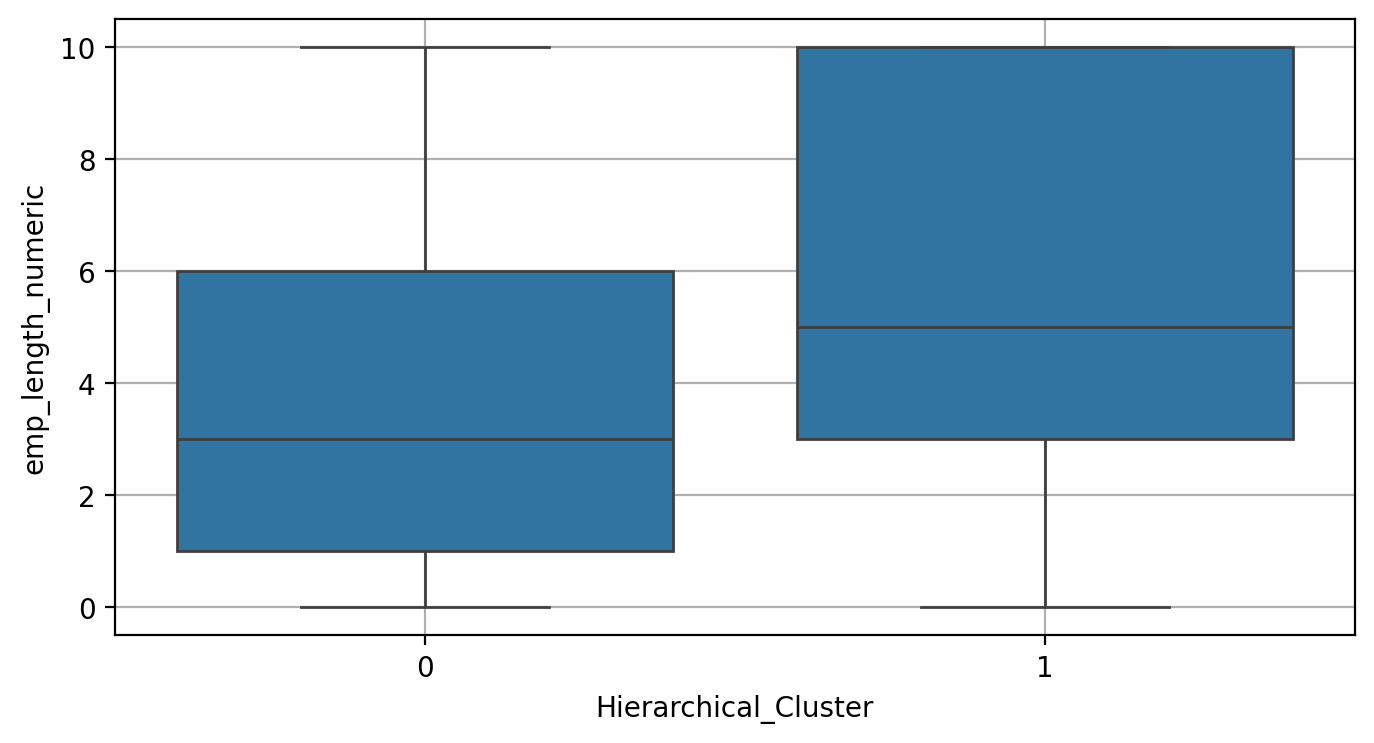

In [713]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='Hierarchical_Cluster', y='emp_length_numeric', data=df_clus_out)
plt.grid()

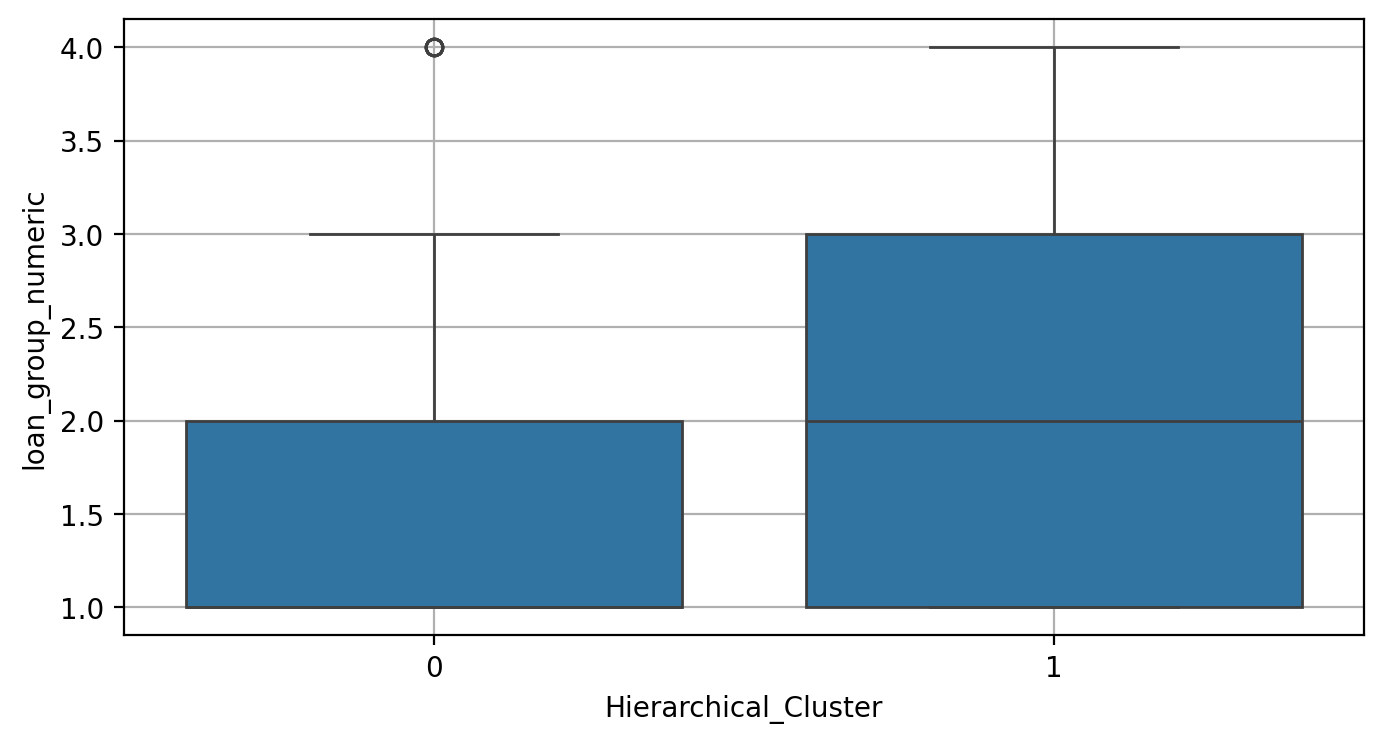

In [714]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='Hierarchical_Cluster', y='loan_group_numeric', data=df_clus_out)
plt.grid()

In [715]:
averages_per_hier_cluster = df_clus_out.groupby('Hierarchical_Cluster').mean()
averages_per_hier_cluster

loan_status_numeric  FICO_Category_numeric  \
Hierarchical_Cluster                                               
0                                    0.84                   2.99   
1                                    0.86                   3.30   

                      credit_age_months  home_ownership_numeric  \
Hierarchical_Cluster                                              
0                                126.65                    3.71   
1                                189.74                    1.52   

                      income_group_numeric  emp_length_numeric  \
Hierarchical_Cluster                                             
0                                     1.47                4.14   
1                                     2.02                5.58   

                      loan_group_numeric  K-Means_Cluster  
Hierarchical_Cluster                                       
0                                   1.40             0.86  
1                                   1.93             0.20

In [716]:
median_per_hier_cluster = df_clus_out.groupby('Hierarchical_Cluster').median()
median_per_hier_cluster

loan_status_numeric  FICO_Category_numeric  \
Hierarchical_Cluster                                               
0                                    1.00                   3.00   
1                                    1.00                   3.00   

                      credit_age_months  home_ownership_numeric  \
Hierarchical_Cluster                                              
0                                121.00                    4.00   
1                                178.00                    1.00   

                      income_group_numeric  emp_length_numeric  \
Hierarchical_Cluster                                             
0                                     1.00                3.00   
1                                     2.00                5.00   

                      loan_group_numeric  K-Means_Cluster  
Hierarchical_Cluster                                       
0                                   1.00             1.00  
1                                   2.00             0.00

#### Obserwacje i wnioski do Agglomerative Clustering

1. Klaster nr 0 zebrał następujących pożyczkobiorców w swoich kategoriach:

   -FICO Category - Mediana należy do grupy 3 czyli "Good".
   
   -Credit Age Months - Drugi i Trzeci kwartyl zawiera sie w przedziale 80-155 miesięcy, gdzie mediana wynosi 121 miesięcy.
   
   -Home Ownership - mediana należy do wartości 4 czyli Rent
   
   -Income Group - 75% wartości w klastrze nr 0 zawiera się w grupie 1 i 2, czyli odpowiednio Niskie i Średnie - przedział rocznego dochodu 0 - 100000.
   
   -Emp Length - drugi i trzeci kwartyl należy do przedziału 1-6 lat zatrudnienia, mediana 3 lata.
   
   -Loan Group - 75% wartości należy do grupy 1 i 2, odpowiednio określając przedział pożyczek do 20000.
   
2. Klaster nr 1 zebrał następujących pożyczkobiorców w swoich kategoriach:

   -FICO Category - 75% pożyczkobiorców w klastrze nr 1 należy do grupy 3 i 4 Fico Category, odpowiednio jest to Good i Very Good

   -Credit Age Months - Drugi i Trzeci kwartyl zawiera sie w przedziale 145-240 miesięcy, gdzie mediana wynosi 178 miesięcy.

   -Home Ownership - mediana należy do wartości 1 czyli Mortgage

   -Income Group - rozkład jest bardzo wąski, określony wąsko i jednoznacznie do grupy nr 2, czyli zakresu 50000-100000 rocznego dochodu.
  
   -Emp Length - 75% pożyczkobiorców w klastrze nr 1 to osoby których wiek zatrudnienia jest wyższy niż 3 lata.
 
   -Loan Group - 50% pożyczkobioców w klastrze nr 1 otrzymało pożyczki w wysokości do 20000, natomiast pozostałe 50% pożyczkobiorców w tym klastrze
otrzymała pożyczkę wyższą niż 20000.

3. Porównując częstości występowania wartości 1 (kredyt spłacony) w kolumnie loan_status w klastrze nr 0 i 1 to zauważamy różnicę 0.02, co oznacza różnicę 2% prawdopodobieństwa spłacenia kredytu między klastrami. Zatem klaster nr 1 tworzy grupę kredytobiorców (o określonych cechach) z wyższym o 2% prawdopodobieństwem spłacenia pożyczki.

### Metoda 3: DBSCAN

In [720]:
from sklearn.cluster import DBSCAN

In [721]:
df_pca_optimal_db = df_pca_optimal

In [722]:
clt = DBSCAN(eps=1.790680, metric='euclidean', min_samples=5)
model = clt.fit(df_pca_optimal_db)

In [723]:
df_pca_optimal_db.shape

(41048, 6)

In [724]:
clt.n_features_in_

6

In [725]:
clt.labels_

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [726]:
clt.core_sample_indices_

array([    0,     1,     2, ..., 41045, 41046, 41047], dtype=int64)

In [727]:
clt.components_

array([[ 0.32724317,  1.31238217, -1.58039768,  1.70517997,  1.51172154,
        -0.48178974],
       [-1.45725851,  1.5737793 ,  1.41425434, -0.09700909,  0.57437022,
        -0.01911369],
       [-0.9701965 ,  0.69586121, -1.25030457,  1.2943249 , -0.52843844,
         0.43745463],
       ...,
       [-0.87264083, -1.03989576,  0.86240701, -0.72778619,  1.02840394,
         1.67869851],
       [ 0.11667966,  1.08010764,  1.01131481, -2.49985238, -0.4734727 ,
         0.3181525 ],
       [ 0.91402477,  1.52883239, -0.47205594, -0.51347947, -1.34798502,
         1.22408373]])

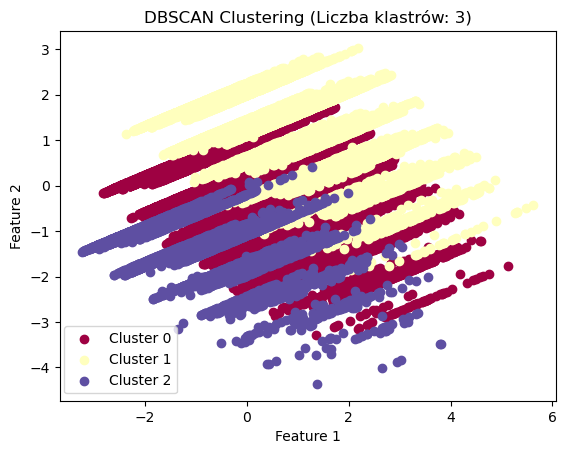

In [728]:
# Dodanie kolumny z klastrami do DataFrame
labels = model.labels_ 
df_pca_optimal_db['DB_Cluster'] = labels

# Liczba klastrów (bez szumu oznaczonego jako -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Punkty szumu są oznaczone kolorem czarnym
        color = [0, 0, 0, 1]

    # Filtrowanie punktów w danym klastrze
    cluster_points = df_pca_optimal_db[df_pca_optimal_db['DB_Cluster'] == label]
    
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], c=[color], label=f'Cluster {label}')

plt.title(f"DBSCAN Clustering (Liczba klastrów: {n_clusters})")
plt.legend(loc='upper right', bbox_to_anchor=(0.25, 0.22))
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [729]:
df_clus_out['DB_Cluster'] = labels

# 1. Liczba punktów w każdym klastrze
cluster_counts = df_clus_out['DB_Cluster'].value_counts()
cluster_counts

C:\Users\Krzysztof\AppData\Local\Temp\ipykernel_2796\1659886714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clus_out['DB_Cluster'] = labels


DB_Cluster
0    27367
1     9845
2     3836
Name: count, dtype: int64

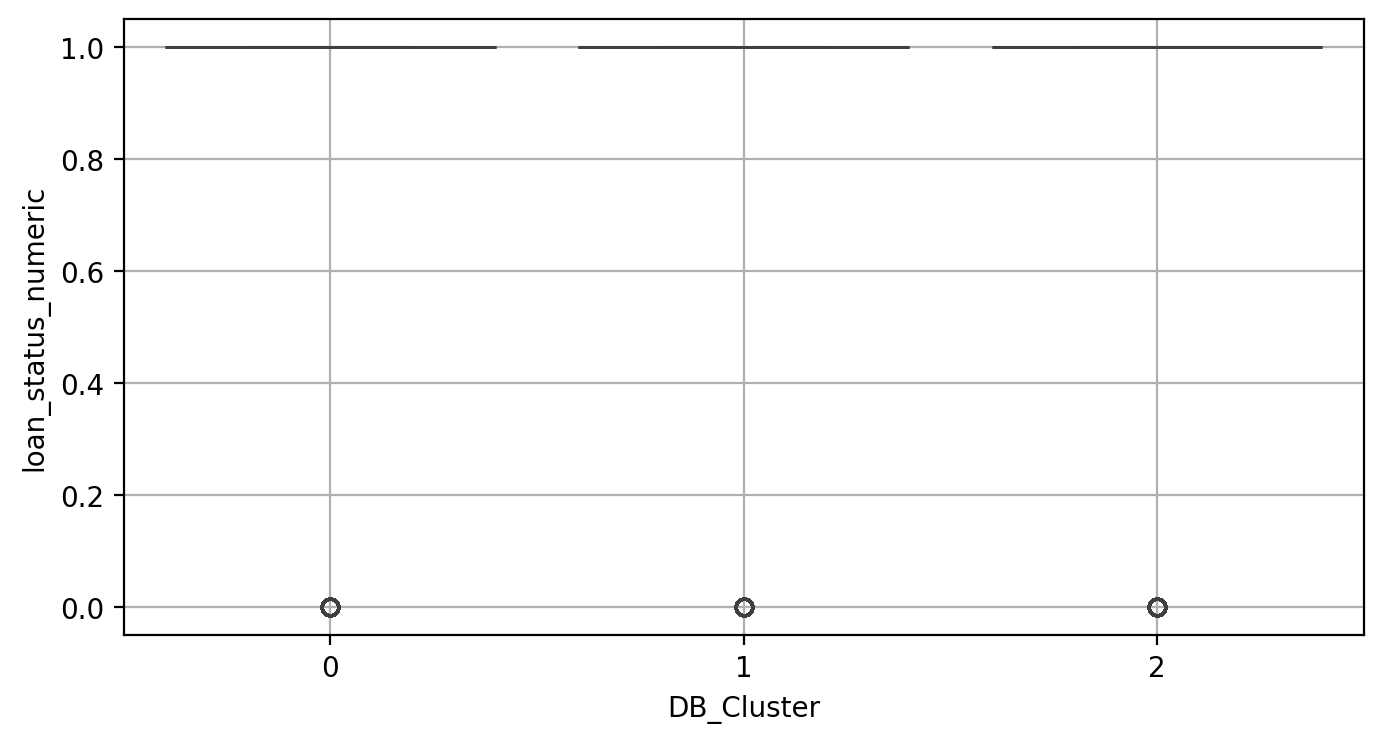

In [730]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='DB_Cluster', y='loan_status_numeric', data=df_clus_out)
plt.grid()

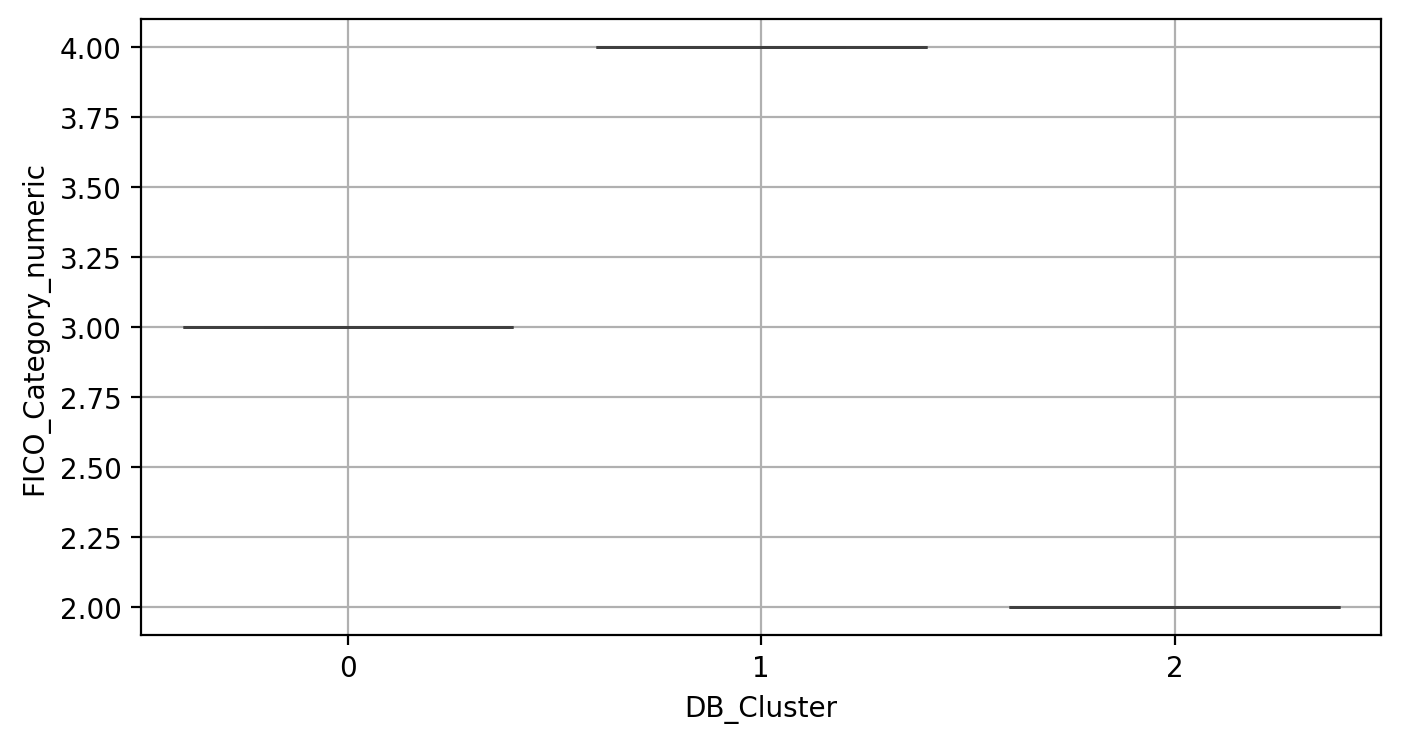

In [731]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='DB_Cluster', y='FICO_Category_numeric', data=df_clus_out)
plt.grid()

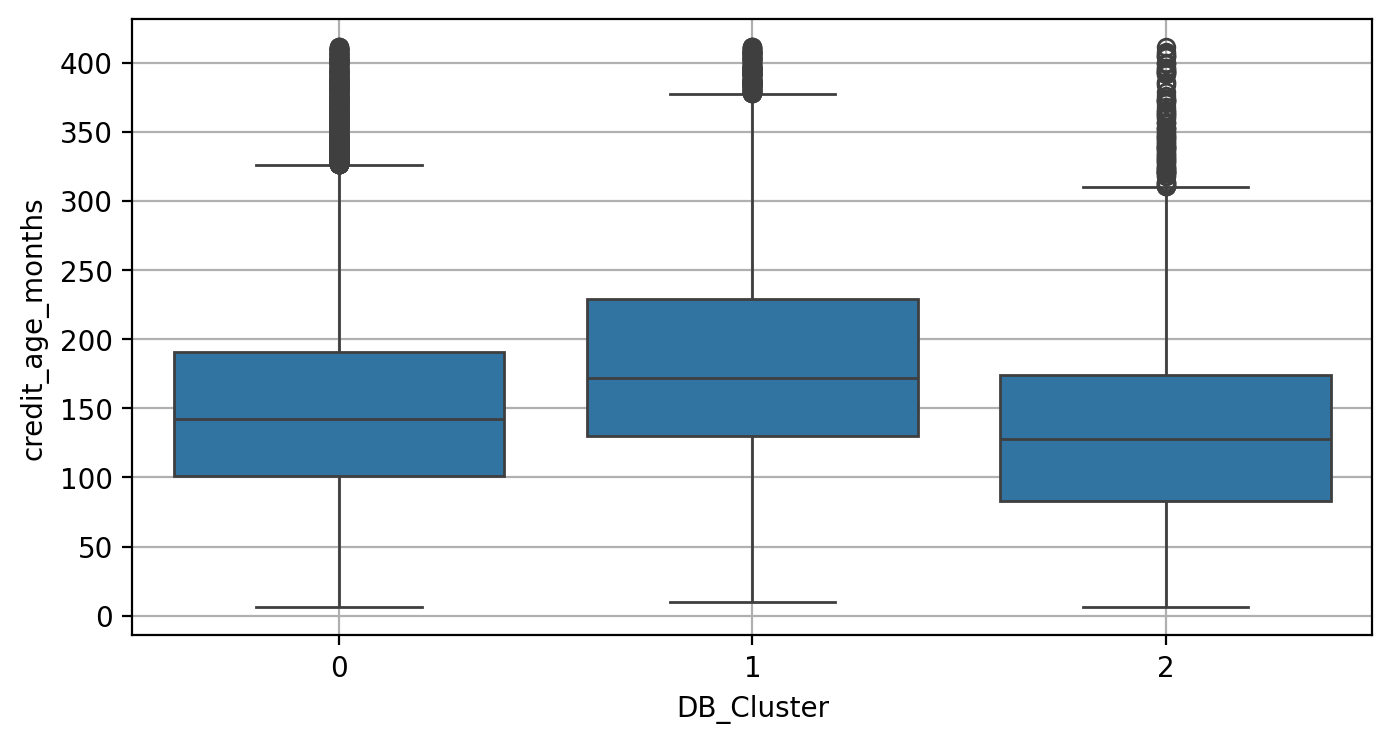

In [732]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='DB_Cluster', y='credit_age_months', data=df_clus_out)
plt.grid()

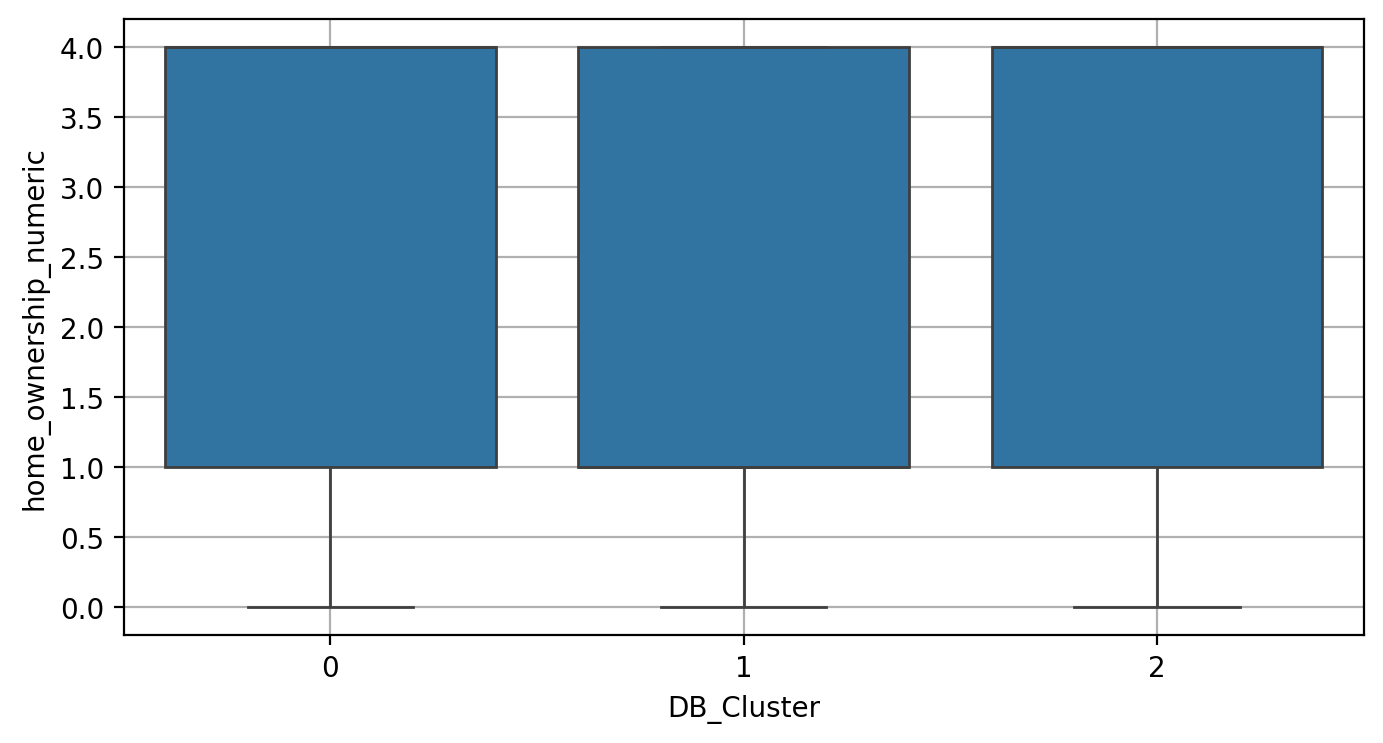

In [733]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='DB_Cluster', y='home_ownership_numeric', data=df_clus_out)
plt.grid()

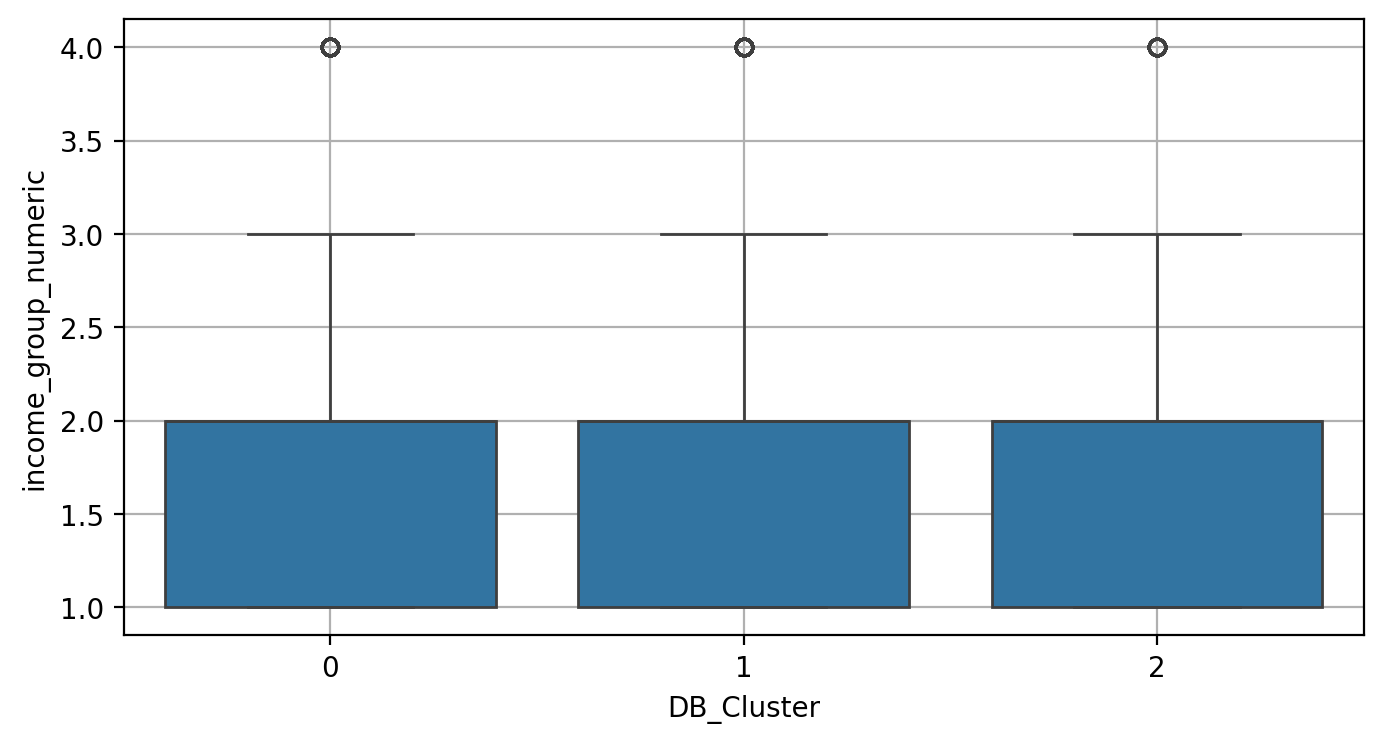

In [734]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='DB_Cluster', y='income_group_numeric', data=df_clus_out)
plt.grid()

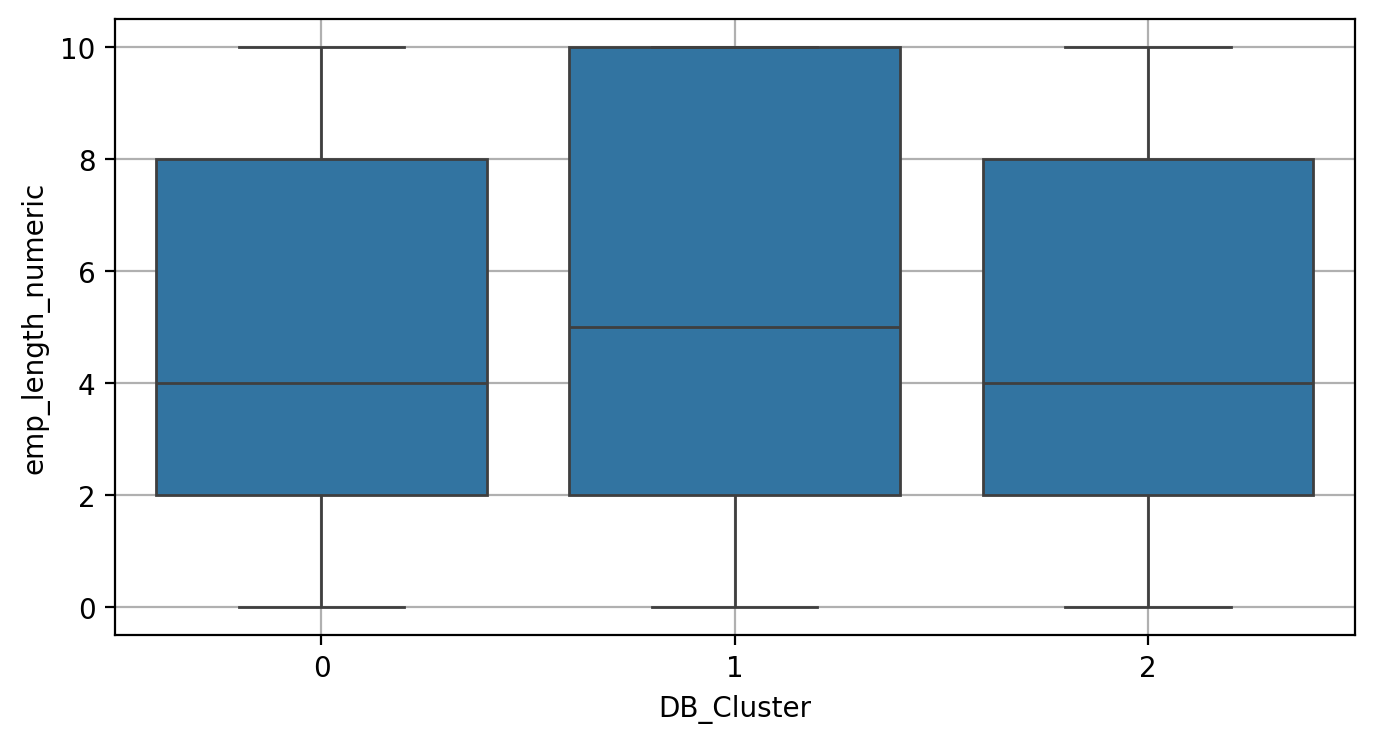

In [735]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='DB_Cluster', y='emp_length_numeric', data=df_clus_out)
plt.grid()

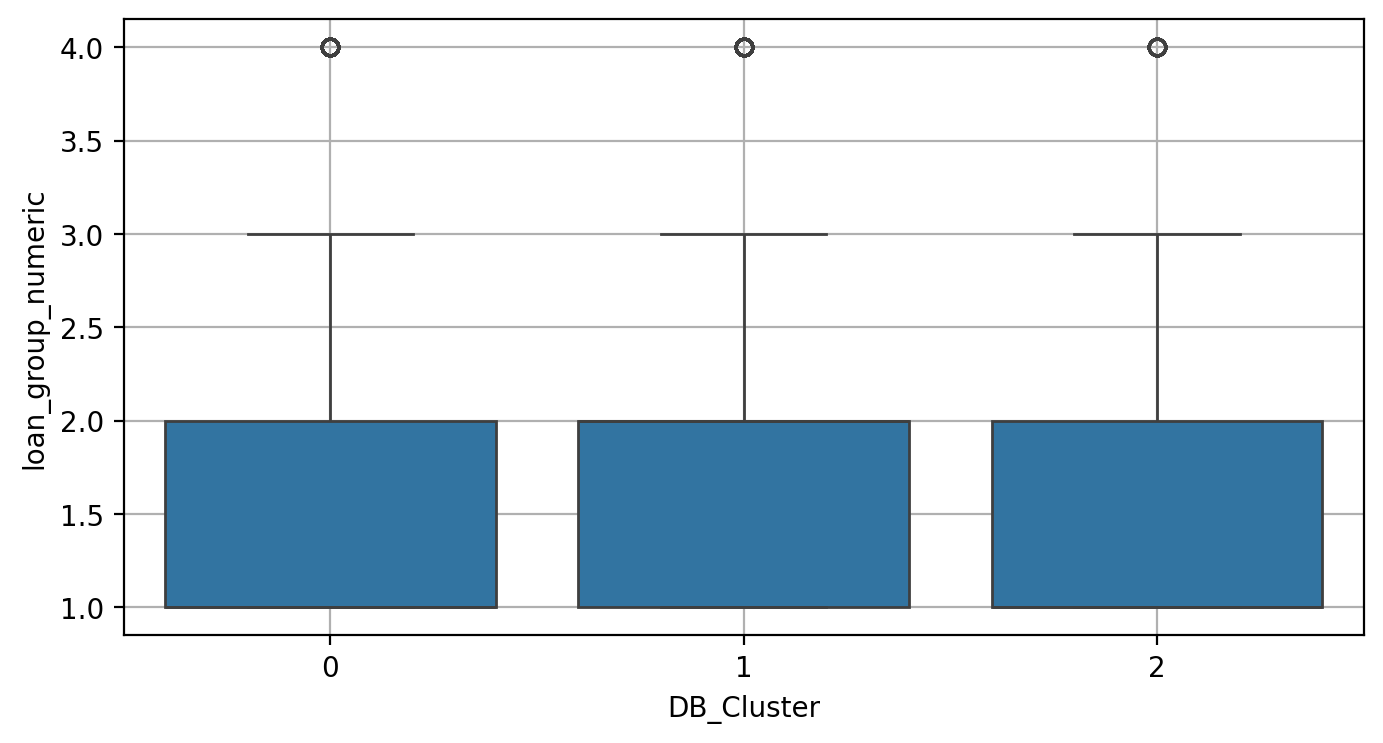

In [736]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='DB_Cluster', y='loan_group_numeric', data=df_clus_out)
plt.grid()

In [737]:
# Analiza klastrów
DB_cluster_mean = df_clus_out.groupby('DB_Cluster').mean()
DB_cluster_mean

loan_status_numeric  FICO_Category_numeric  credit_age_months  \
DB_Cluster                                                                  
0                          0.84                   3.00             152.50   
1                          0.91                   4.00             183.99   
2                          0.75                   2.00             136.26   

            home_ownership_numeric  income_group_numeric  emp_length_numeric  \
DB_Cluster                                                                     
0                             2.69                  1.73                4.76   
1                             2.27                  1.82                5.29   
2                             2.85                  1.66                4.52   

            loan_group_numeric  K-Means_Cluster  Hierarchical_Cluster  
DB_Cluster                                                             
0                         1.66             0.57                  0.50  
1                         1.79             0.32                  0.68  
2                         1.45             0.75                  0.11

In [738]:
# Analiza klastrów c.d
DB_cluster_median = df_clus_out.groupby('DB_Cluster').median()
DB_cluster_median

loan_status_numeric  FICO_Category_numeric  credit_age_months  \
DB_Cluster                                                                  
0                          1.00                   3.00             142.00   
1                          1.00                   4.00             172.00   
2                          1.00                   2.00             128.00   

            home_ownership_numeric  income_group_numeric  emp_length_numeric  \
DB_Cluster                                                                     
0                             4.00                  2.00                4.00   
1                             1.00                  2.00                5.00   
2                             4.00                  2.00                4.00   

            loan_group_numeric  K-Means_Cluster  Hierarchical_Cluster  
DB_Cluster                                                             
0                         1.00             1.00                  0.00  
1                         2.00             0.00                  1.00  
2                         1.00             1.00                  0.00

In [739]:
# Analiza szumu
noise_points = df_clus_out[df_clus_out['DB_Cluster'] == -1]  # Szum to punkty z etykietą -1
print(f"\nLiczba punktów szumu: {len(noise_points)}")
if len(noise_points) > 0:
    print("Przykładowe punkty szumu:")
    print(noise_points)


Liczba punktów szumu: 0


In [740]:
# Klaster o największej liczbie punktów
most_populated_cluster = cluster_counts.idxmax()
print(f"\nKlaster z największą liczbą punktów: {most_populated_cluster}")
df_clus_out[df_clus_out['DB_Cluster'] == most_populated_cluster].describe()


Klaster z największą liczbą punktów: 0


loan_status_numeric  FICO_Category_numeric  credit_age_months  \
count             27367.00               27367.00           27367.00   
mean                  0.84                   3.00             152.50   
std                   0.37                   0.00              72.25   
min                   0.00                   3.00               6.00   
25%                   1.00                   3.00             101.00   
50%                   1.00                   3.00             142.00   
75%                   1.00                   3.00             191.00   
max                   1.00                   3.00             411.00   

       home_ownership_numeric  income_group_numeric  emp_length_numeric  \
count                27367.00              27367.00            27367.00   
mean                     2.69                  1.73                4.76   
std                      1.44                  0.73                3.48   
min                      0.00                  1.00                0.00   
25%                      1.00                  1.00                2.00   
50%                      4.00                  2.00                4.00   
75%                      4.00                  2.00                8.00   
max                      4.00                  4.00               10.00   

       loan_group_numeric  K-Means_Cluster  Hierarchical_Cluster  DB_Cluster  
count            27367.00         27367.00              27367.00    27367.00  
mean                 1.66             0.57                  0.50        0.00  
std                  0.78             0.50                  0.50        0.00  
min                  1.00             0.00                  0.00        0.00  
25%                  1.00             0.00                  0.00        0.00  
50%                  1.00             1.00                  0.00        0.00  
75%                  2.00             1.00                  1.00        0.00  
max                  4.00             1.00                  1.00        0.00

#### Obserwacje i wnioski do DBSCAN

1. Klaster nr 0 jest najliczniejszy. Zbiór ten tworzą obserwacje o takich cechach:
 
   -FICO_Category_numeric - średnia i mediana należy do grupy nr 3 czyli "Good"
   
   -credit_age_months - mediana wieku kredytowego wynosi 142 miesiące
   
   -home_ownership_numeric - mediana należy do grupy nr 4, czyli "Rent"
   
   -income_group_numeric - mediana należy do grupy nr 2, czyli przychód z grupy Średnie (50000-100000)
   
   -emp_length_numeric - mediana należy wynosi 4, a 75% wyników nie przekracza 8 lat zatrudnienia.
   
   -loan_group_numeric - mediana należy do grupy 1 czyli pożyczkobiorców którzy zaciągneli pożyczkę do 10000, 75% pożyczkobiorców zaciągnęło w tym klastrze pożyczkę do 20000.
   
2. Klaster nr 1 jest najliczniejszy. Zbiór ten tworzą obserwacje o takich cechach:
 
   -FICO_Category_numeric - średnia i mediana należy do grupy nr 4 czyli "Very Good"
   
   -credit_age_months - mediana wieku kredytowego wynosi 172 miesiące
   
   -home_ownership_numeric - mediana należy do grupy nr 1, czyli "Mortgage"
   
   -income_group_numeric - mediana należy do grupy nr 2, czyli przychód z grupy Średnie (50000-100000)
   
   -emp_length_numeric - mediana należy wynosi 5, grupę 75% obserwacji stanowią kredytobiorcy z wiekiem kredytowym powyżej 2 lat.
   
   -loan_group_numeric - mediana należy do grupy 2 czyli pożyczkobiorców którzy zaciągneli pożyczkę do 20000, 75% pożyczkobiorców zaciągnęło w tym klastrze pożyczkę do 20000.
   
3. Klaster nr 2 jest najliczniejszy. Zbiór ten tworzą obserwacje o takich cechach:
 
   -FICO_Category_numeric - średnia i mediana należy do grupy nr 2 czyli "Fair"
   
   -credit_age_months - mediana wieku kredytowego wynosi 128 miesiące
   
   -home_ownership_numeric - mediana należy do grupy nr 4, czyli "Rent"
   
   -income_group_numeric - mediana należy do grupy nr 2, czyli przychód z grupy Średnie (50000-100000)
   
   -emp_length_numeric - mediana należy wynosi 4, a 75% wyników nie przekracza 8 lat zatrudnienia.
   
   -loan_group_numeric - mediana należy do grupy 1 czyli 50% pożyczkobiorców którzy zaciągneli pożyczkę do 10000, 75% pożyczkobiorców zaciągnęło w tym klastrze pożyczkę do 20000.
   
4. Ze względu na prawdopodobieństwo spłacenia pożyczki można zaobserwować w poszczególnych klastrach:

   -Klaster nr 0 stanowi najliczniejszą grupę (66.67% wszystkich) przy tym średnie prawdopodobieństwo spłaty kredytu wynosi 84%, bliskie globalnemu średniemu prawdopodobieństwu 84.88%.
    
   -Klaster nr 1 stanowi 24% pożyczkobiorców z całej badanej grupy. Prawdopodobieństwo spłaty pożyczki przez pożyczkobiorców zaklasyfikowanych do tego klastra wynosi aż 91%. Oprócz tej cechy, klaster wyróżnia się na tle pozostałych znacznie wyższą medianą wieku kredytowego, grupą FICO "Very Good", grupą osób posiadających w większości hipotekę, najwyższą średnią wieku zatrudnienia oraz osobami średnio zaciągały wyższe pożyczki od grup tworzących pozostałe klastry.
   
   -Klaster nr 2 stanowi 9.34% pożyczkobiorców z całej badanej grupy. Prawdopodobieństwo spłaty pożyczki przez pożyczkobiorców zaklasyfikowanych do tego klastra wynosi tylko 75%. Na tle pozostałych klastrów wyróżnia się kategorią FICO "Fair" oraz średnio najniższym wiekiem kredytowym. Pozostałe cechy wobec średnich wartości zmiennych bliższe są klastrowi nr 0, a mediany klastra nr 0 i 2 są takie same z wyjątkiem FICO_Category oraz credit_age_months.

5. Podsumowując, metoda DBSCAN wyróżniła ze zbioru danych dwie grupy (klastry), których prawdopodobieństwa spłaty kredytu znacznie odbiegają od globalnego wyniku prawdopobieństwa spłaty (referencyjnie mówimy o 84.88%). Dwie grupy, w jednej osób mniej zaufanych (75%) oraz w drugiej bardziej zaufanych (91%) wobec spłaty zadłużenia. Klaster nr 1 zebrał przypadki których wyróżniające się cechy skumulowały efekt wysokiego prawdopodobieństwa spłacalności. Analogicznie dla klastra nr 2, wyróżniające cechy spowodowały w efekcie niski wynik spłacalności. Warto zauważyć w tym wyniku dwie zmienne które nie powtórzyły się w żadnym z wykreslonych klastrów oraz były daleko od siebie w ocenie, jest to grupa FICO oraz wiek kredytowy. Wobec tego Fico Score oraz wiek kredytowy są zmiennymi determinującymi w ocenie pożyczkobiorcy na temat zdarzeń przyszłych takich jak spłata pożyczki przez petenta. 

### Porównanie wyników metod K-Means oraz Agglomerative Clustering

In [744]:
df_clus_out

loan_status_numeric  FICO_Category_numeric  credit_age_months  \
0                     1.00                   3.00             323.00   
1                     0.00                   4.00             152.00   
2                     1.00                   3.00             121.00   
3                     1.00                   3.00             190.00   
4                     1.00                   3.00             191.00   
...                    ...                    ...                ...   
42531                 1.00                   3.00             109.00   
42532                 1.00                   3.00             109.00   
42533                 1.00                   3.00             109.00   
42534                 1.00                   4.00             109.00   
42535                 1.00                   4.00             109.00   

       home_ownership_numeric  income_group_numeric  emp_length_numeric  \
0                        4.00                  1.00               10.00   
1                        4.00                  1.00                0.00   
2                        4.00                  1.00               10.00   
3                        4.00                  1.00               10.00   
4                        4.00                  2.00                1.00   
...                       ...                   ...                 ...   
42531                    4.00                  4.00                0.00   
42532                    4.00                  1.00                0.00   
42533                    4.00                  3.00                0.00   
42534                    0.00                  2.00                0.00   
42535                    1.00                  2.00               10.00   

       loan_group_numeric  K-Means_Cluster  Hierarchical_Cluster  DB_Cluster  
0                    1.00                0                     0           0  
1                    1.00                1                     0           1  
2                    1.00                1                     0           0  
3                    2.00                1                     0           0  
4                    1.00                1                     0           0  
...                   ...              ...                   ...         ...  
42531                1.00                1                     0           0  
42532                1.00                1                     0           0  
42533                1.00                1                     0           0  
42534                1.00                0                     1           1  
42535                1.00                0                     1           1  

[41048 rows x 10 columns]

<Axes: xlabel='Hierarchical_Cluster', ylabel='credit_age_months'>

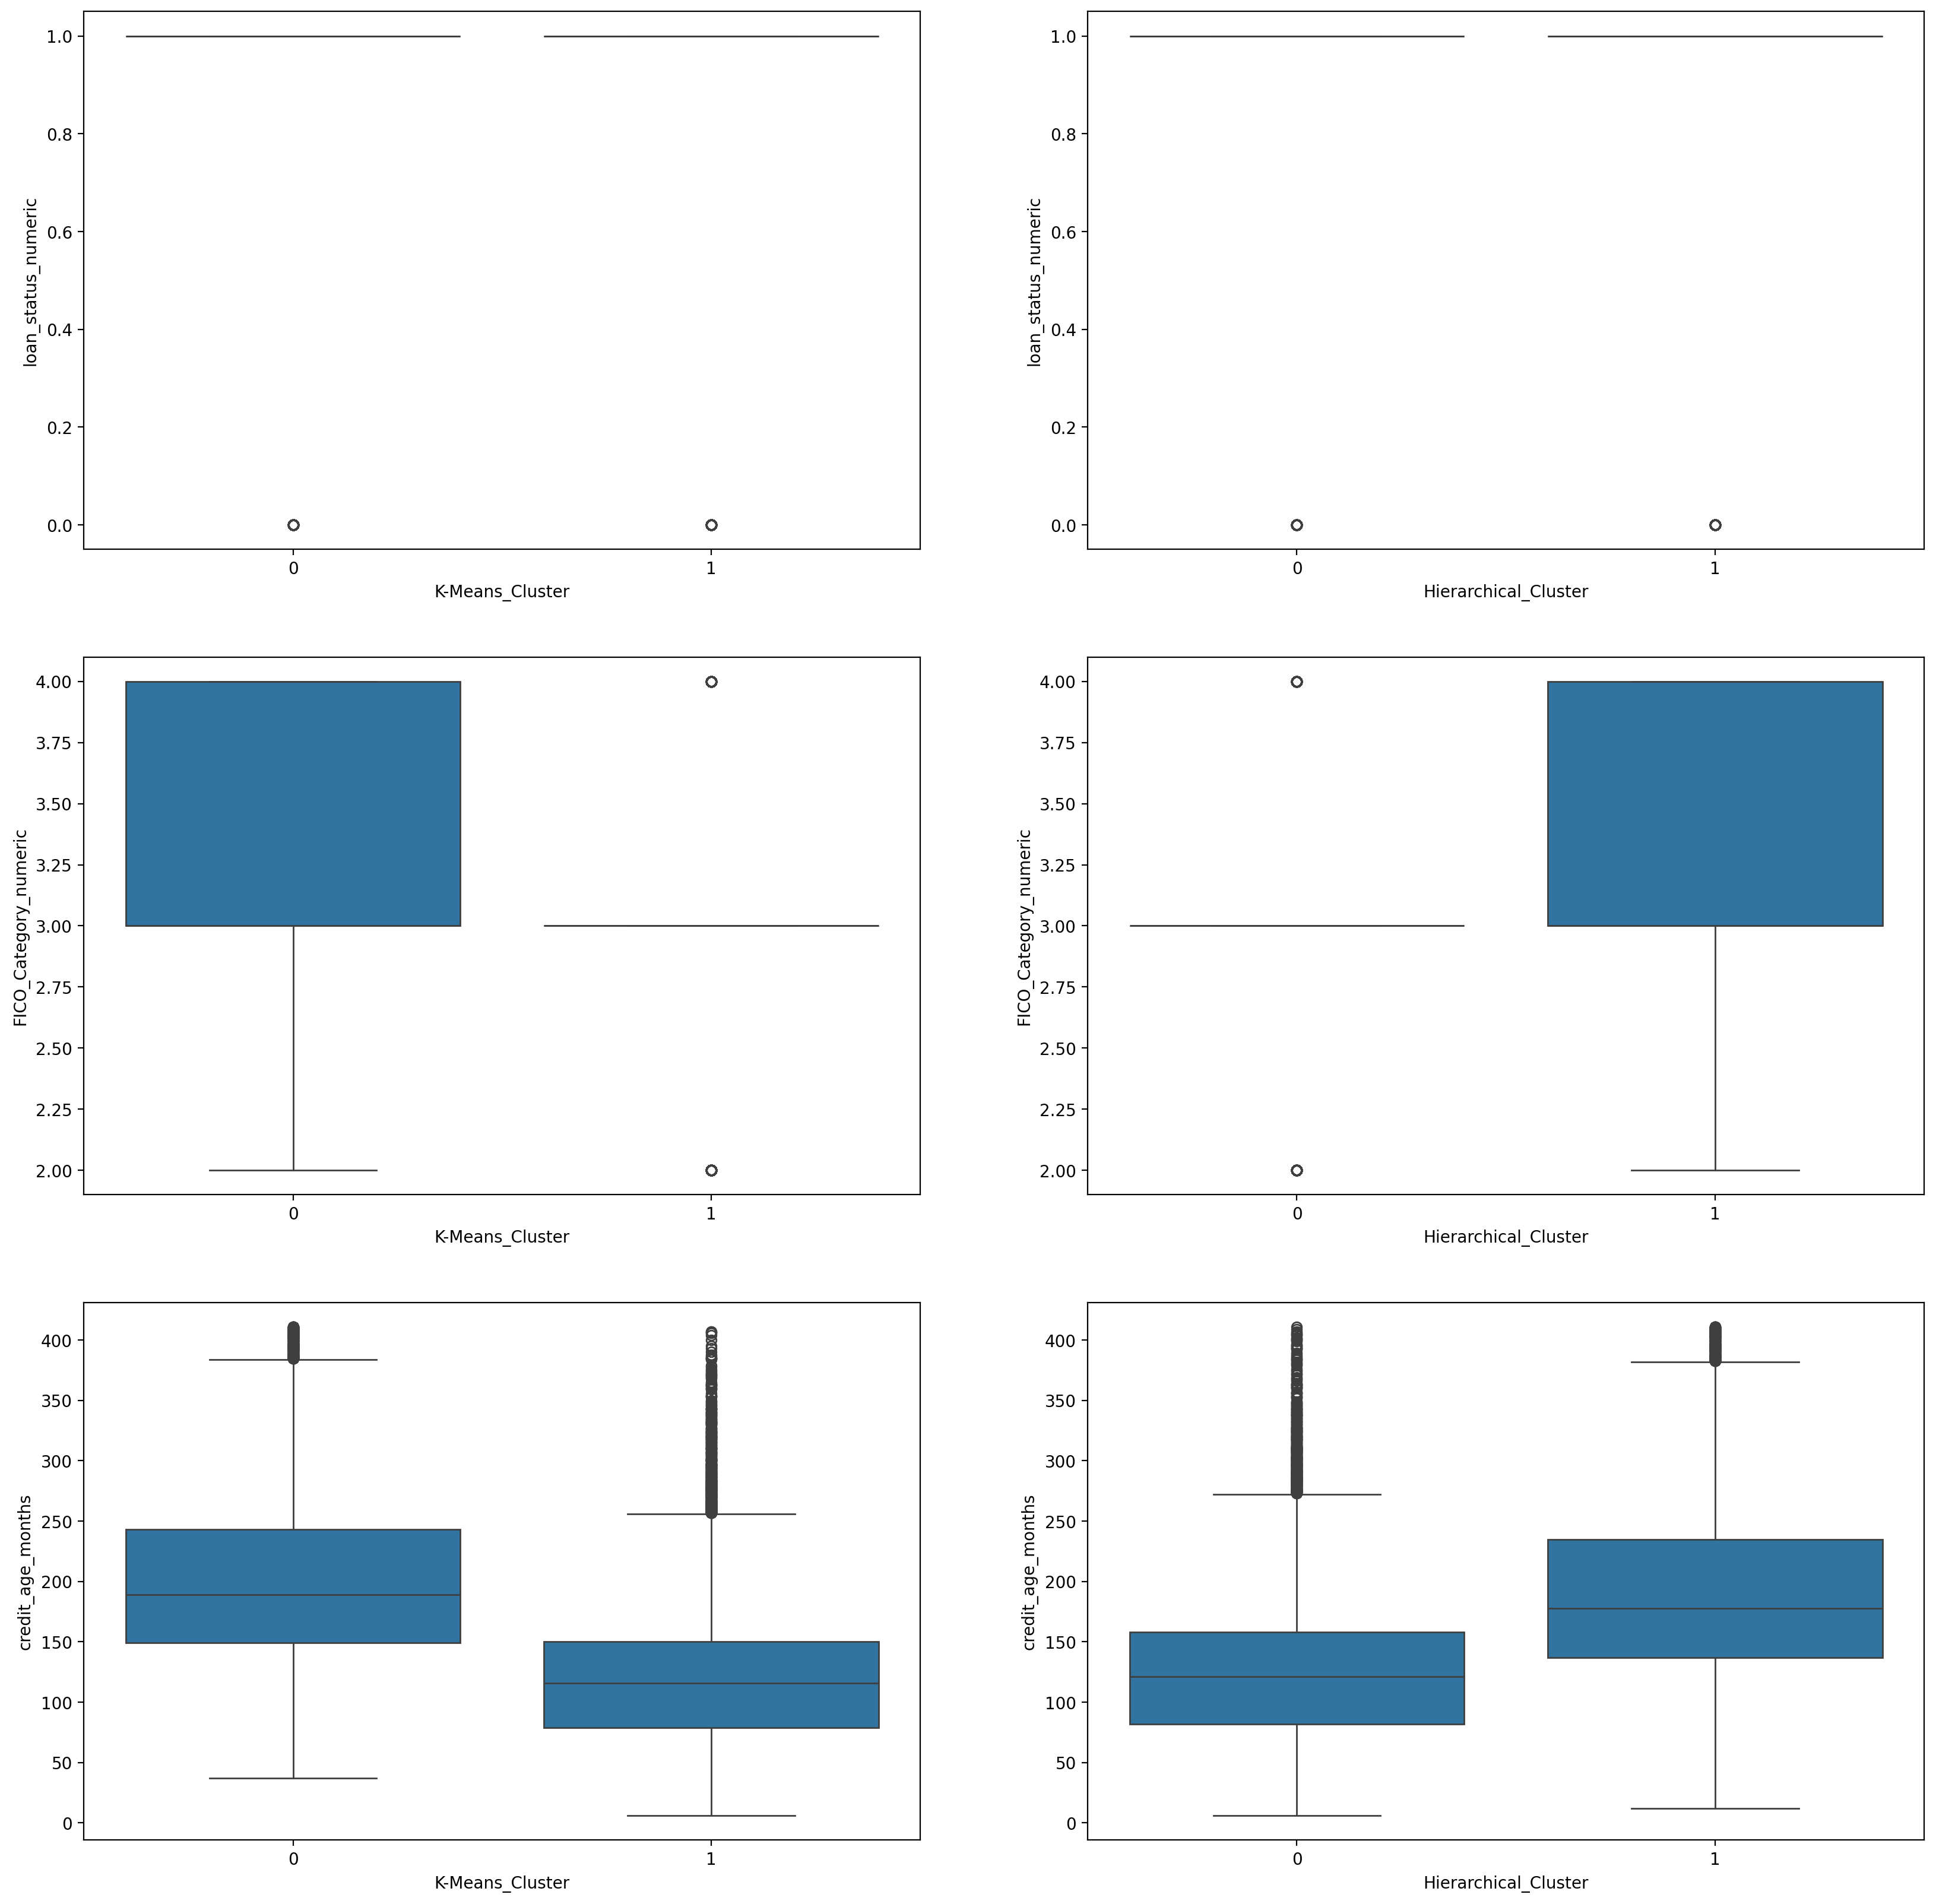

In [745]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(3,2,1)
sns.boxplot(x='K-Means_Cluster', y='loan_status_numeric', data=df_clus_out)

plt.subplot(3,2,2)
sns.boxplot(x='Hierarchical_Cluster', y='loan_status_numeric', data=df_clus_out)

plt.subplot(3,2,3)
sns.boxplot(x='K-Means_Cluster', y='FICO_Category_numeric', data=df_clus_out)

plt.subplot(3,2,4)
sns.boxplot(x='Hierarchical_Cluster', y='FICO_Category_numeric', data=df_clus_out)

plt.subplot(3,2,5)
sns.boxplot(x='K-Means_Cluster', y='credit_age_months', data=df_clus_out)

plt.subplot(3,2,6)
sns.boxplot(x='Hierarchical_Cluster', y='credit_age_months', data=df_clus_out)

<Axes: xlabel='Hierarchical_Cluster', ylabel='loan_group_numeric'>

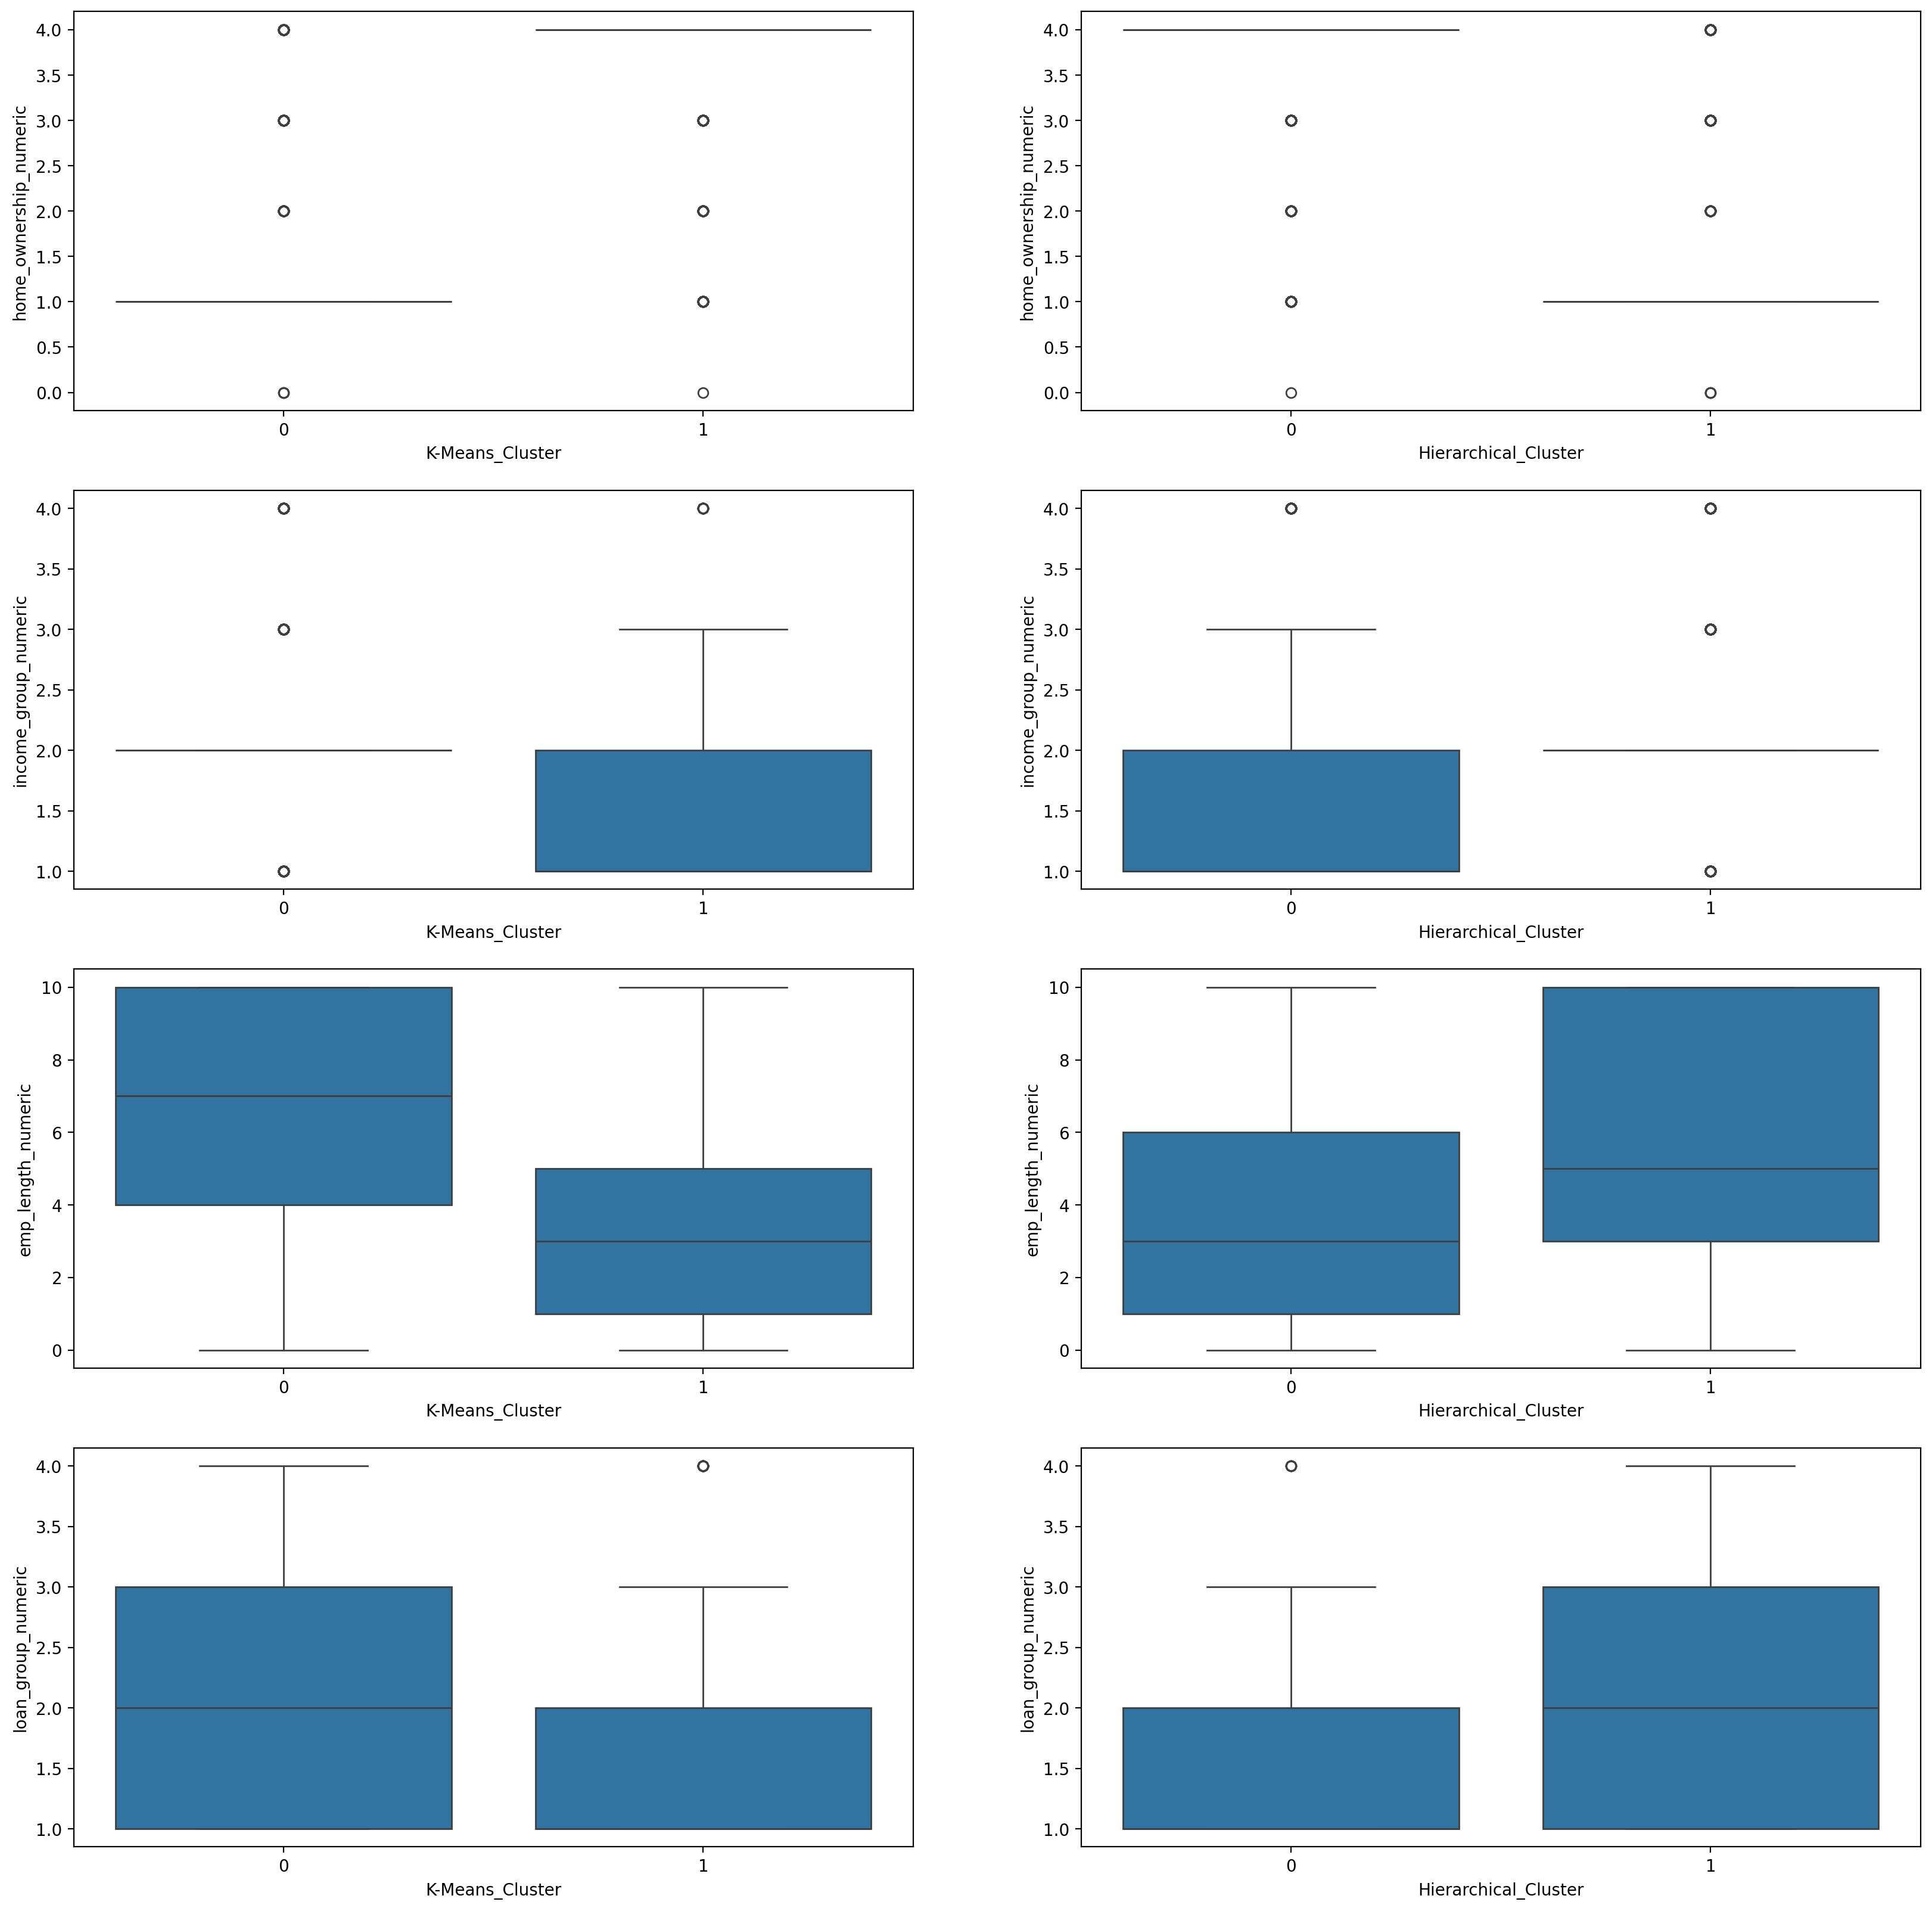

In [746]:
plt.figure(figsize=(20,20), dpi=200)


plt.subplot(4,2,1)
sns.boxplot(x='K-Means_Cluster', y='home_ownership_numeric', data=df_clus_out)

plt.subplot(4,2,2)
sns.boxplot(x='Hierarchical_Cluster', y='home_ownership_numeric', data=df_clus_out)

plt.subplot(4,2,3)
sns.boxplot(x='K-Means_Cluster', y='income_group_numeric', data=df_clus_out)

plt.subplot(4,2,4)
sns.boxplot(x='Hierarchical_Cluster', y='income_group_numeric', data=df_clus_out)

plt.subplot(4,2,5)
sns.boxplot(x='K-Means_Cluster', y='emp_length_numeric', data=df_clus_out)

plt.subplot(4,2,6)
sns.boxplot(x='Hierarchical_Cluster', y='emp_length_numeric', data=df_clus_out)

plt.subplot(4,2,7)
sns.boxplot(x='K-Means_Cluster', y='loan_group_numeric', data=df_clus_out)

plt.subplot(4,2,8)
sns.boxplot(x='Hierarchical_Cluster', y='loan_group_numeric', data=df_clus_out)

In [747]:
df_pca_optimal.head()

PC1   PC2   PC3   PC4   PC5   PC6  DB_Cluster
0  0.33  1.31 -1.58  1.71  1.51 -0.48           0
1 -1.46  1.57  1.41 -0.10  0.57 -0.02           1
2 -0.97  0.70 -1.25  1.29 -0.53  0.44           0
3 -0.03  0.34 -0.79  1.88 -0.24 -0.45           0
4 -0.87 -0.14  0.34 -0.15  1.46  0.43           0

In [748]:
df_pca_optimal['K-Means_Cluster'] = kmeans.labels_
df_pca_optimal['Hierarchical_Cluster'] = wd_cluster_labels

<Axes: xlabel='PC5', ylabel='PC6'>

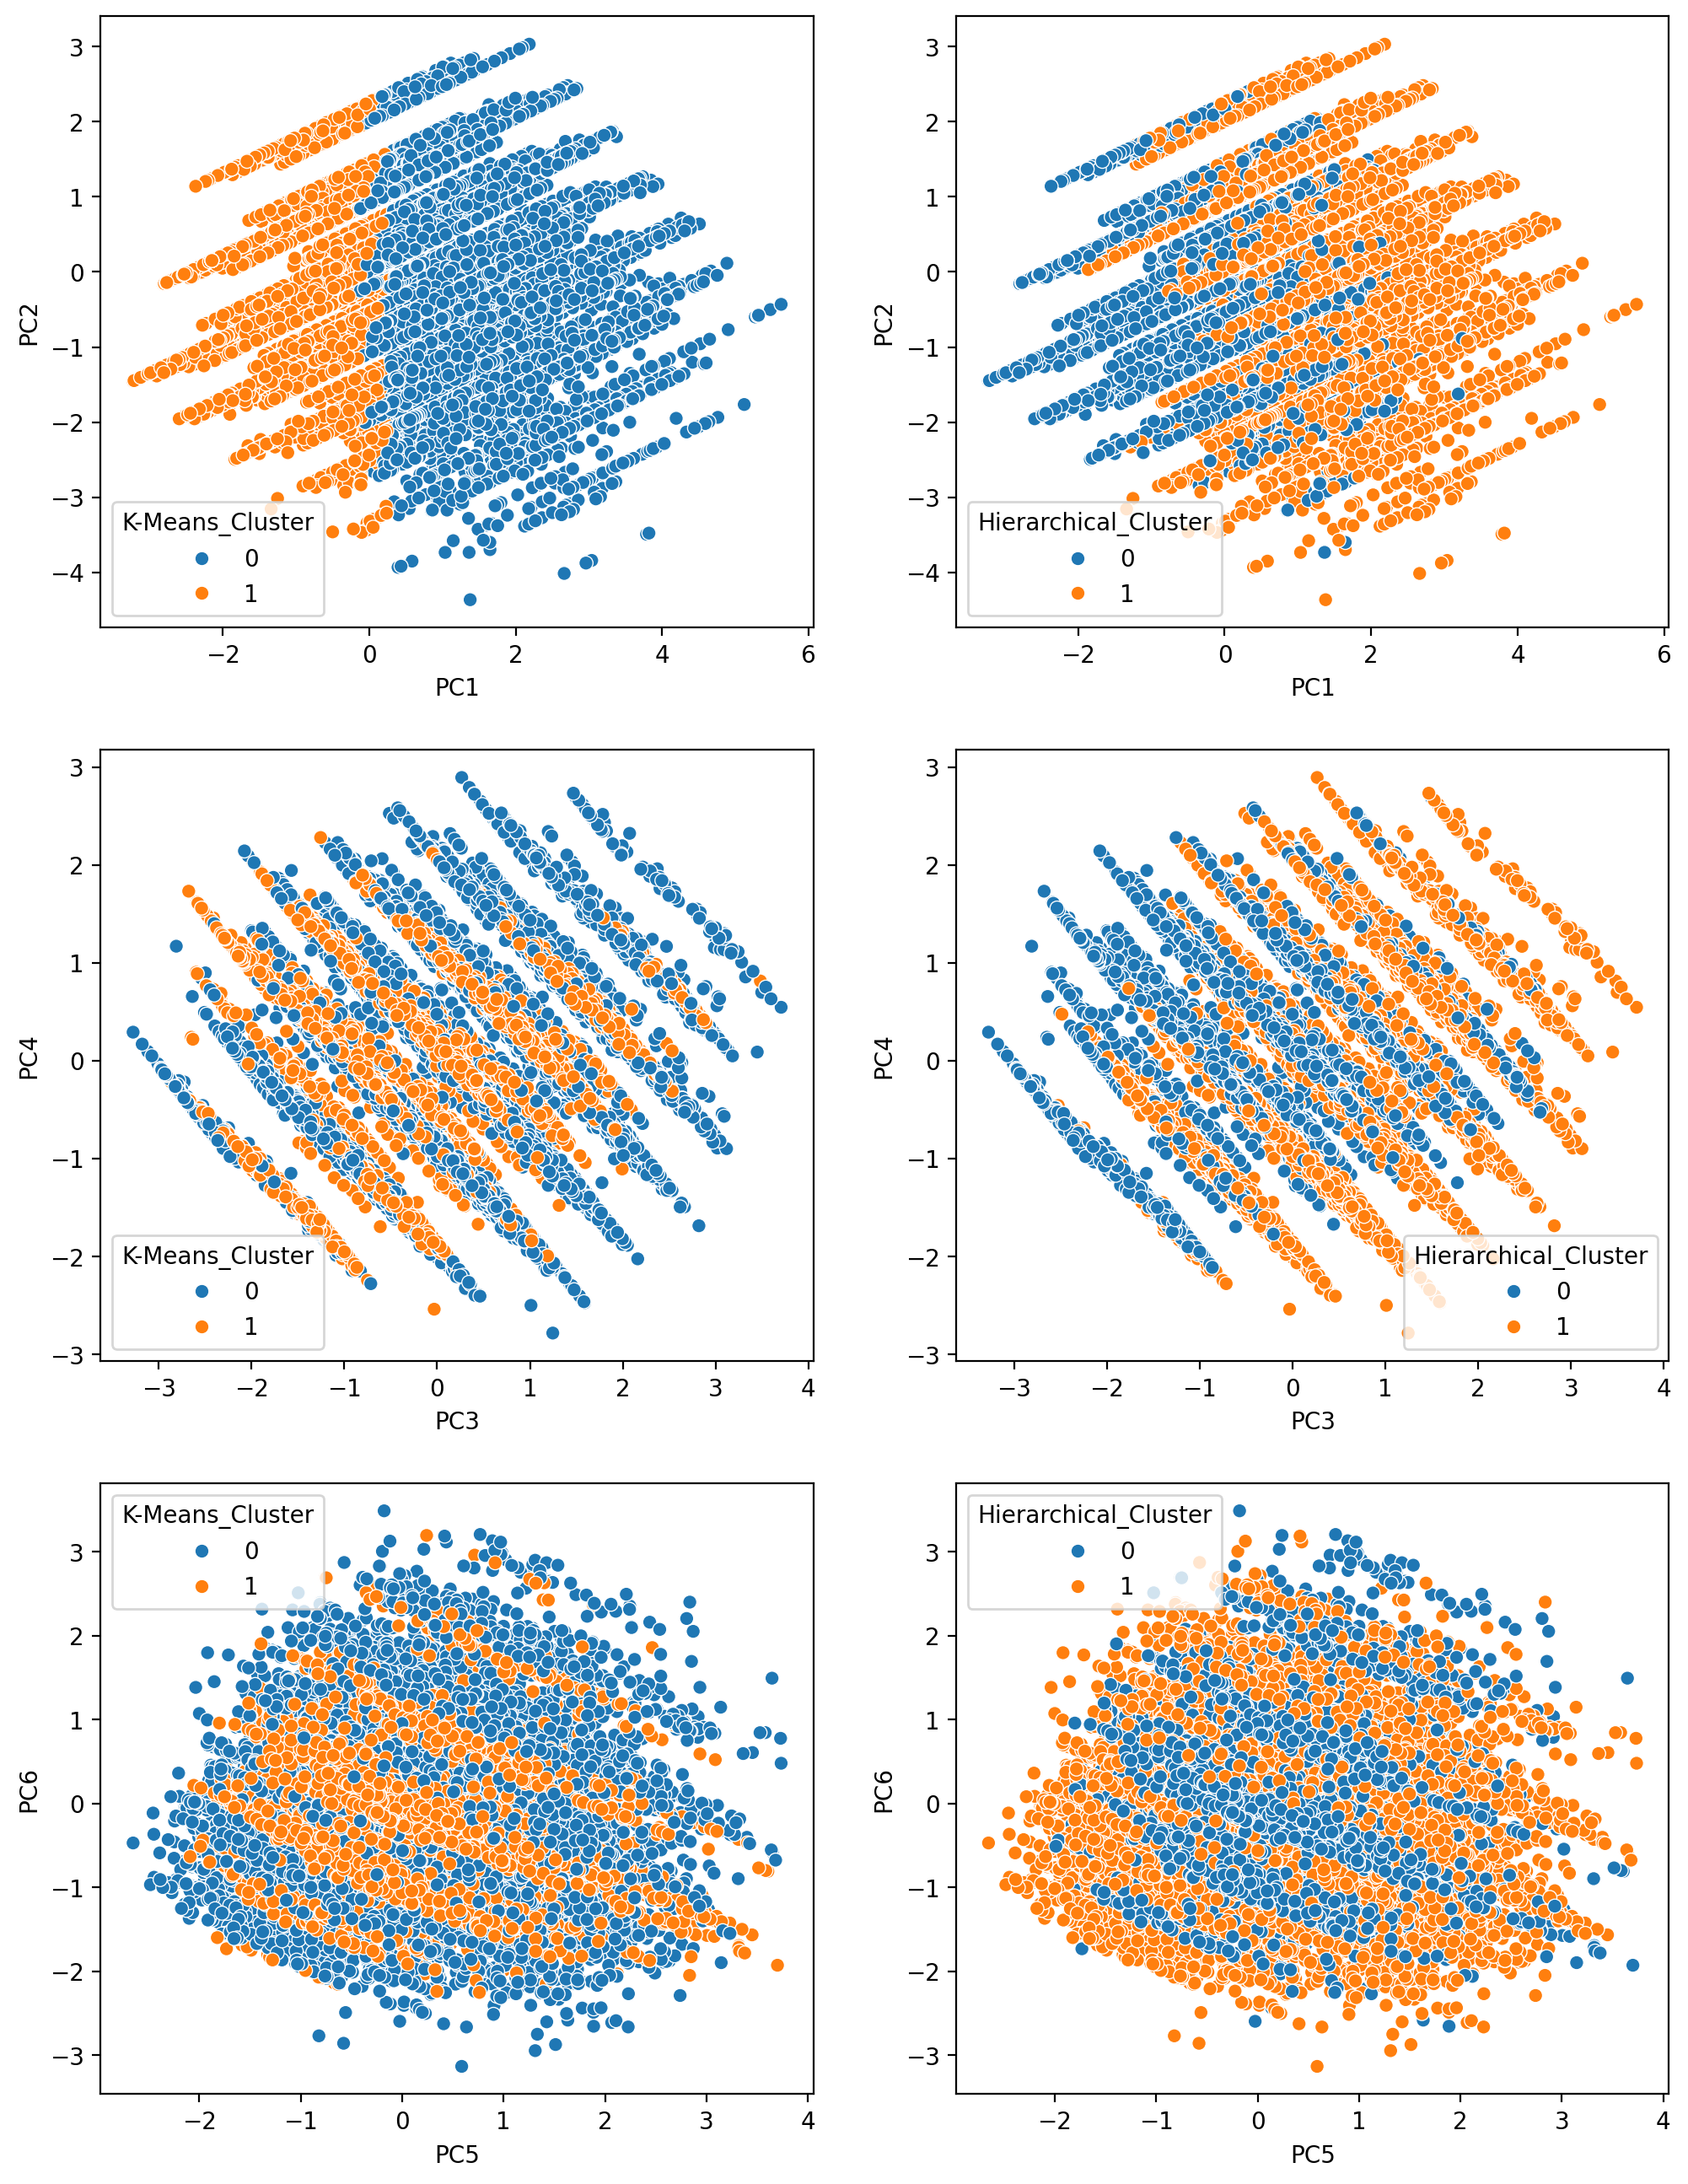

In [749]:
plt.figure(figsize=(12,16),dpi=200)

plt.subplot(3,2,1)
sns.scatterplot(x='PC1',y='PC2',data=df_pca_optimal,hue='K-Means_Cluster')

plt.subplot(3,2,2)
sns.scatterplot(x='PC1',y='PC2',data=df_pca_optimal,hue='Hierarchical_Cluster')

plt.subplot(3,2,3)
sns.scatterplot(x='PC3',y='PC4',data=df_pca_optimal,hue='K-Means_Cluster')

plt.subplot(3,2,4)
sns.scatterplot(x='PC3',y='PC4',data=df_pca_optimal,hue='Hierarchical_Cluster')

plt.subplot(3,2,5)
sns.scatterplot(x='PC5',y='PC6',data=df_pca_optimal,hue='K-Means_Cluster')

plt.subplot(3,2,6)
sns.scatterplot(x='PC5',y='PC6',data=df_pca_optimal,hue='Hierarchical_Cluster')

<Axes: xlabel='loan_status_numeric', ylabel='FICO_Category_numeric'>

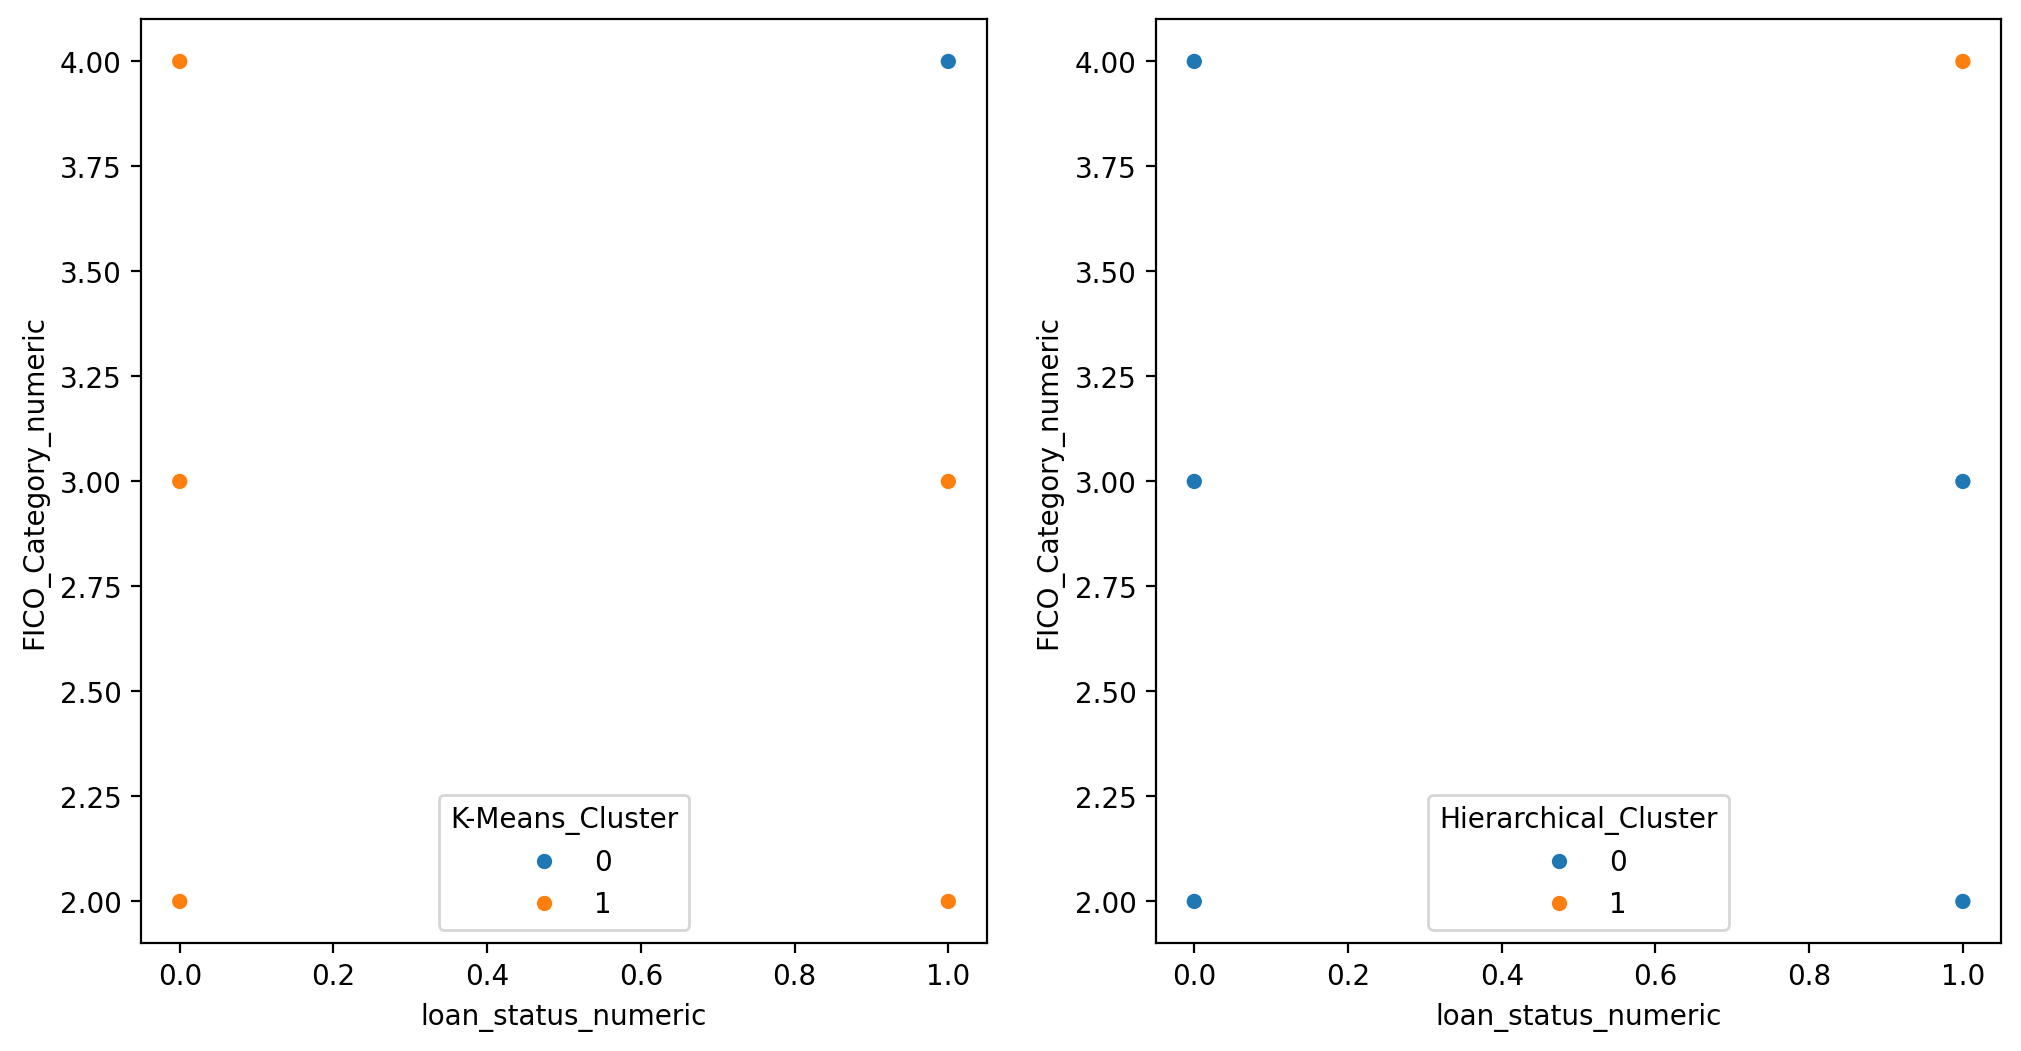

In [750]:
plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='loan_status_numeric',y='FICO_Category_numeric',data=df_clus_out,hue='K-Means_Cluster')

plt.subplot(1,2,2)
sns.scatterplot(x='loan_status_numeric',y='FICO_Category_numeric',data=df_clus_out,hue='Hierarchical_Cluster')

<Axes: xlabel='loan_status_numeric', ylabel='emp_length_numeric'>

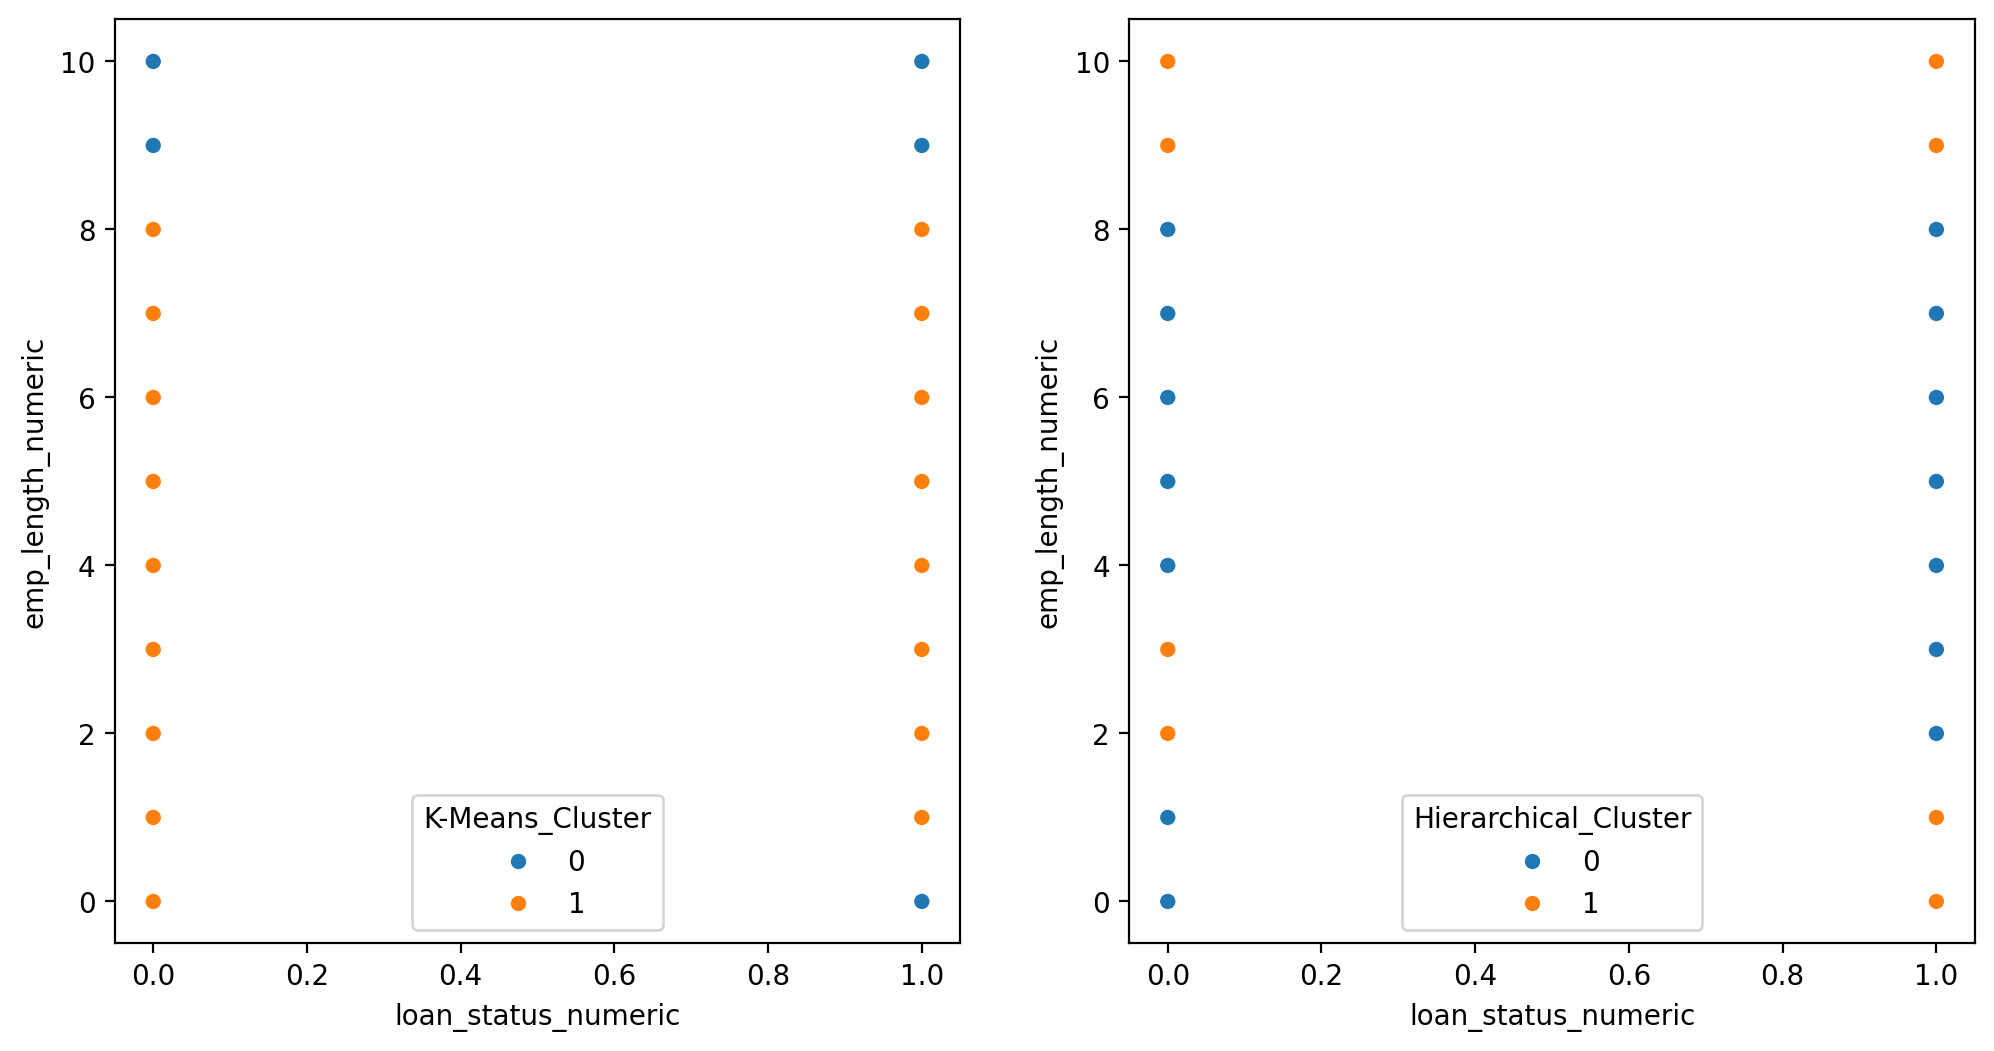

In [751]:
plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='loan_status_numeric',y='emp_length_numeric',data=df_clus_out,hue='K-Means_Cluster')

plt.subplot(1,2,2)
sns.scatterplot(x='loan_status_numeric',y='emp_length_numeric',data=df_clus_out,hue='Hierarchical_Cluster')

<Axes: xlabel='FICO_Category_numeric', ylabel='emp_length_numeric'>

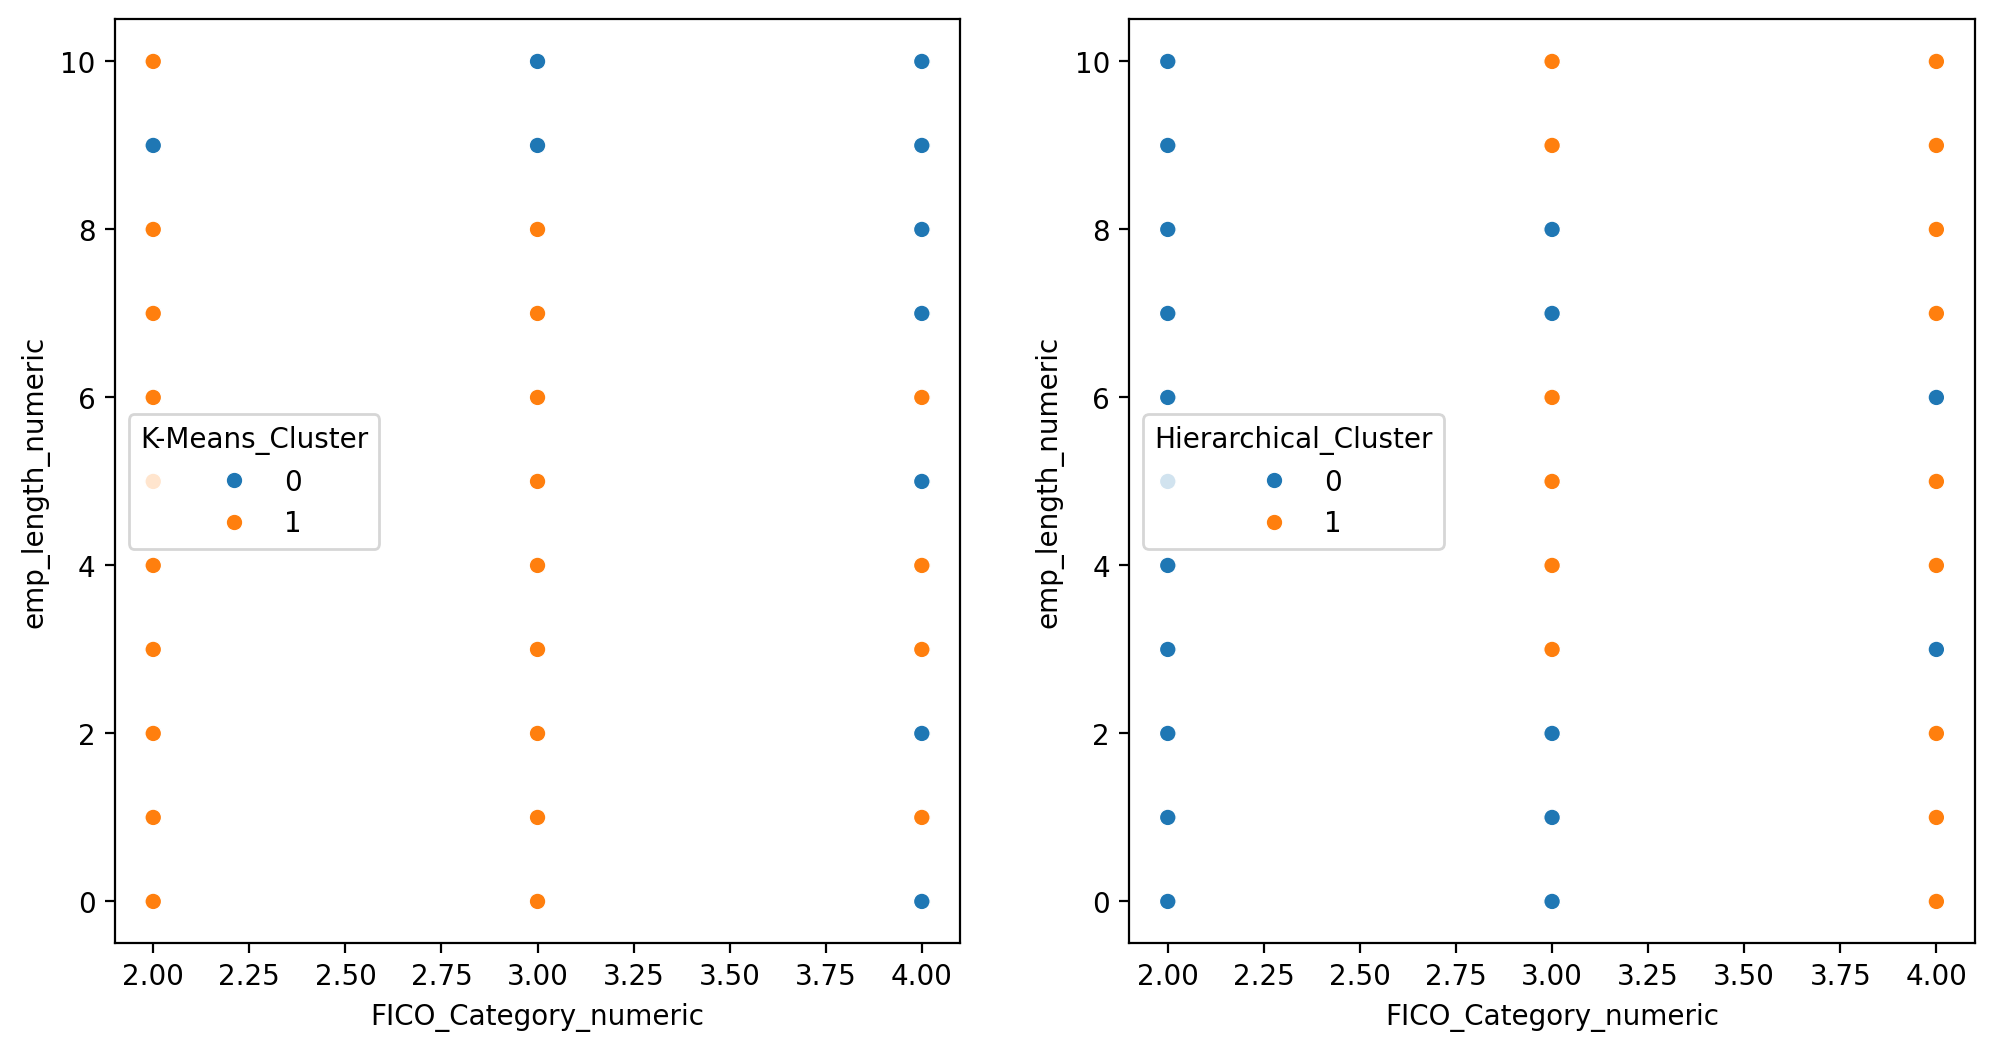

In [752]:
plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='FICO_Category_numeric',y='emp_length_numeric',data=df_clus_out,hue='K-Means_Cluster')

plt.subplot(1,2,2)
sns.scatterplot(x='FICO_Category_numeric',y='emp_length_numeric',data=df_clus_out,hue='Hierarchical_Cluster')

In [753]:
K_Means_count_0 = df_clus_out[df_clus_out['K-Means_Cluster'] == 0]
K_Means_count_1 = df_clus_out[df_clus_out['K-Means_Cluster'] == 1]

In [754]:
Hirarchical_count_0 = df_clus_out[df_clus_out['Hierarchical_Cluster'] == 0]
Hirarchical_count_1 = df_clus_out[df_clus_out['Hierarchical_Cluster'] == 1]

In [755]:
len(K_Means_count_0),len(K_Means_count_1)

(19403, 21645)

In [756]:
len(Hirarchical_count_0),len(Hirarchical_count_1)

(20303, 20745)

In [757]:
df_clus_out

loan_status_numeric  FICO_Category_numeric  credit_age_months  \
0                     1.00                   3.00             323.00   
1                     0.00                   4.00             152.00   
2                     1.00                   3.00             121.00   
3                     1.00                   3.00             190.00   
4                     1.00                   3.00             191.00   
...                    ...                    ...                ...   
42531                 1.00                   3.00             109.00   
42532                 1.00                   3.00             109.00   
42533                 1.00                   3.00             109.00   
42534                 1.00                   4.00             109.00   
42535                 1.00                   4.00             109.00   

       home_ownership_numeric  income_group_numeric  emp_length_numeric  \
0                        4.00                  1.00               10.00   
1                        4.00                  1.00                0.00   
2                        4.00                  1.00               10.00   
3                        4.00                  1.00               10.00   
4                        4.00                  2.00                1.00   
...                       ...                   ...                 ...   
42531                    4.00                  4.00                0.00   
42532                    4.00                  1.00                0.00   
42533                    4.00                  3.00                0.00   
42534                    0.00                  2.00                0.00   
42535                    1.00                  2.00               10.00   

       loan_group_numeric  K-Means_Cluster  Hierarchical_Cluster  DB_Cluster  
0                    1.00                0                     0           0  
1                    1.00                1                     0           1  
2                    1.00                1                     0           0  
3                    2.00                1                     0           0  
4                    1.00                1                     0           0  
...                   ...              ...                   ...         ...  
42531                1.00                1                     0           0  
42532                1.00                1                     0           0  
42533                1.00                1                     0           0  
42534                1.00                0                     1           1  
42535                1.00                0                     1           1  

[41048 rows x 10 columns]

In [758]:
# Filtrowanie rekordów spełniających warunki
combined_count_0 = df_clus_out[(df_clus_out['K-Means_Cluster'] == 0) & (df_clus_out['Hierarchical_Cluster'] == 0)]

count_0 = len(combined_count_0)
print(f"Liczba rekordów, gdzie 'K-Means_Cluster == 0' i 'Hierarchical_Cluster == 0': {count_0}")

Liczba rekordów, gdzie 'K-Means_Cluster == 0' i 'Hierarchical_Cluster == 0': 2849


In [759]:
# Filtrowanie rekordów spełniających oba warunki
combined_count_1 = df_clus_out[(df_clus_out['K-Means_Cluster'] == 1) & (df_clus_out['Hierarchical_Cluster'] == 1)]

count_1 = len(combined_count_1)
print(f"Liczba rekordów, gdzie 'K-Means_Cluster == 0' i 'Hierarchical_Cluster == 0': {count_1}")

Liczba rekordów, gdzie 'K-Means_Cluster == 0' i 'Hierarchical_Cluster == 0': 4191


### Analiza wyników klasteryzacji

1. Optymalną ilością klastrów dla metody K-Means jest 2. Do określenia ilości optymalnej ilości klastrów użyłem Silhouette Score.  

2. Optymalną ilością klastrów dla metody Hierarchicznej Klasteryzacji jest 2. Do określenia ilości optymalnej ilości klastrów użyłem Silhouette Score. 

3. DBSCAN sam identyfikuje liczbę klastrów, ale wymaga dopasowania parametrów eps i min_samples, co spowodowało wiele prób w celu dopasowania optymalnych parametrów dla wyniku, który dopiero można poddać analizie. DBSCAN w przypadku wykorzystanych danych w mojej ocenie wypadł najlepiej. W wyniku klasteryzacji otrzymałem 3 klastry w których zbiór cech wyraźnie wskazywał na pewne zależności oraz wagę zmiennych. 

4. Wyniki K-Means oraz Hierarchicznej Klasteryzacji są do siebie bardzo porównywalne. Na wykresach pudełkowych widać bardzo podobny rozkład cech, gdzie modele przyporządkowały dane tak, że klaster 0 K-means odpowiada klastrowi 0 z Hierarchicznej. Przyporządkowanie zdarzeń do poszczególnych klastrów pokrywa się w 83%. W moim przypadku wybór między metodą K-Means lub Klasteryzacji Hierarchicznej nie ma większego znaczenia, jedynie to co mogę zaznaczyć to metoda K-Means jest szybsza w ocenie i do przeprowadzenia. 

6. Głębsza analiza i wyciąganie wniosków miały sens jedynie w przypadku wyników za pomocą metody DBSCAN, ze względu na klastry o wyraźnie odstających cechach.

7. Metoda K-Means oraz Hierarchiczna klasteryzacja dostarczyły wyniki bardzo do siebie zbliżone, najważniejsze pod względem rozpatrywania klastrów oraz do określania wniosków jest prawdpodobieństwo spłaty pożyczki. Niestety w obu metodach klastry pod tą cechą różniły się jedynie dwoma procentami. Należałoby uwzględnić w zbiorze inne cechy lub zadać modelowi możliwość dzielenia zbioru na większą ilość klastrów.

## 2. Wytrenuj 5 różnych modeli, wykorzystując do każdego inny algorytm, a następnie porównaj ich działanie, za metrykę oceny jakości modelu przyjmij AUROC score. (50pkt)

In [813]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [815]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42535 entries, 0 to 42535
Data columns (total 61 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   loan_amnt                        42535 non-null  float64 
 1   funded_amnt                      42535 non-null  float64 
 2   funded_amnt_inv                  42535 non-null  float64 
 3   int_rate                         42535 non-null  float64 
 4   installment                      42535 non-null  float64 
 5   annual_inc                       42535 non-null  float64 
 6   dti                              42535 non-null  float64 
 7   delinq_2yrs                      42535 non-null  float64 
 8   inq_last_6mths                   42535 non-null  float64 
 9   open_acc                         42535 non-null  float64 
 10  pub_rec                          42535 non-null  float64 
 11  revol_bal                        42535 non-null  float64 
 12  revol_uti

In [817]:
df_5x = df2.drop(['FICO_Category', 'emp_length_group', 'loan_group', 'income_group'] ,axis =1)

In [819]:
df_5x = df_5x.astype(np.float64)

In [821]:
df_5x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42535 entries, 0 to 42535
Data columns (total 57 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   loan_amnt                        42535 non-null  float64
 1   funded_amnt                      42535 non-null  float64
 2   funded_amnt_inv                  42535 non-null  float64
 3   int_rate                         42535 non-null  float64
 4   installment                      42535 non-null  float64
 5   annual_inc                       42535 non-null  float64
 6   dti                              42535 non-null  float64
 7   delinq_2yrs                      42535 non-null  float64
 8   inq_last_6mths                   42535 non-null  float64
 9   open_acc                         42535 non-null  float64
 10  pub_rec                          42535 non-null  float64
 11  revol_bal                        42535 non-null  float64
 12  revol_util             

In [823]:
X = df_5x.drop('loan_status_numeric',axis =1)  
y = df_5x['loan_status_numeric']

In [825]:
# Podział na dane treningowe i testowe
X_train_5x, X_test_5x, y_train_5x, y_test_5x = train_test_split(X, y, test_size=0.3, random_state=42)

In [827]:
# Skalowanie danych
scaler = StandardScaler()
X_train_scal_5x = scaler.fit_transform(X_train_5x)
X_test_scal_5x = scaler.transform(X_test_5x)

In [829]:
X_train_scal_5x = pd.DataFrame(X_train_scal_5x,columns=X.columns)
X_test_scal_5x = pd.DataFrame(X_test_scal_5x,columns=X.columns)

In [831]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import numpy as np
import pandas as pd

# Lista modeli do wytrenowania
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000, penalty='l2', C=0.1, class_weight='balanced'),
    "KNN": KNeighborsClassifier(n_neighbors=7, weights='distance'),
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=150, max_depth=7, min_samples_split=10, min_samples_leaf=5, class_weight='balanced'), 
    "Gradient Boosting": GradientBoostingClassifier(random_state=42, max_depth=3, min_samples_split=10, min_samples_leaf=5, learning_rate=0.1)
}

kf1 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

results = {}

for name, model in models.items():
    auc_scores = []
    
    for train_index, test_index in kf1.split(X_train_scal_5x, y_train_5x):
        X_fold_train, X_fold_test = X_train_scal_5x.iloc[train_index], X_train_scal_5x.iloc[test_index]
        y_fold_train, y_fold_test = y_train_5x.iloc[train_index], y_train_5x.iloc[test_index]
        
        model.fit(X_fold_train, y_fold_train)
        
        y_pred_prob = model.predict_proba(X_fold_test)[:, 1]
        
        auc = roc_auc_score(y_fold_test, y_pred_prob)
        auc_scores.append(auc)
    
    results[name] = np.mean(auc_scores)

print("Porównanie AUROC dla modeli:")
for model_name, auc_score in results.items():
    print(f"{model_name}: {auc_score:.4f}")

Porównanie AUROC dla modeli:
Logistic Regression: 0.8752
KNN: 0.7576
Decision Tree: 0.8612
Random Forest: 0.8754
Gradient Boosting: 0.8852


### Obserwacje i wnioski z treningu 5 różnymi modelami.

Modele pomimo dostrajania hiperparametrów, balansowania klas w 3 modelach, kroswalidacji, dają wyniki świadczące o przeuczeniu (nadmiernym dopasowaniu danych do modelu).

## 3. Sprawdź działanie wcześniej użytych metod na skompresowanych danych za pomocą PCA, porównaj wyniki (AUROC score) z modelami wytrenowanymi w poprzednim podpunkcie. (20pkt)

#### PCA i dobór optymalnej ilości komponentów

In [837]:
X_train_scal_5x

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  \
0           0.96         0.43             0.49      0.35        -0.01   
1           1.74         0.44            -0.34      1.05         0.81   
2          -0.49        -0.47            -0.37      0.56        -0.32   
3          -0.85        -0.85            -0.75     -0.19        -1.04   
4           3.23         3.38             3.48      0.13         4.08   
...          ...          ...              ...       ...          ...   
29769       0.12         0.16             0.25     -0.13         0.35   
29770      -0.15        -0.12            -0.02      1.02         0.14   
29771      -1.16        -1.17            -1.08     -1.12        -1.17   
29772      -0.56        -0.54            -0.45      0.56        -0.40   
29773       0.53         0.58             0.67      0.35         0.89   

       annual_inc   dti  delinq_2yrs  inq_last_6mths  open_acc  ...  \
0           -0.33  1.00        -0.30           -0.71      0.81  ...   
1            0.58  1.04        -0.30           -0.06      2.59  ...   
2           -0.14  0.39        -0.30           -0.06     -0.74  ...   
3           -0.06  1.01        -0.30           -0.71      0.37  ...   
4            0.33 -0.29        -0.30           -0.71     -0.30  ...   
...           ...   ...          ...             ...       ...  ...   
29769       -0.30  0.49        -0.30           -0.06     -0.52  ...   
29770        0.02  0.07         1.66           -0.71      0.59  ...   
29771       -0.43  1.56        -0.30            0.60      0.15  ...   
29772       -0.43 -0.34        -0.30           -0.06      0.59  ...   
29773       -0.52 -0.03        -0.30           -0.06     -0.74  ...   

       emp_length_and_grade  employment_stability  job_seniority_flag  \
0                      1.31                  0.70                1.88   
1                      3.64                  0.47                1.88   
2                      0.38                  0.13               -0.53   
3                      0.23                  0.67               -0.53   
4                      1.31                 -0.03                1.88   
...                     ...                   ...                 ...   
29769                 -1.01                 -1.12               -0.53   
29770                 -0.08                 -0.56               -0.53   
29771                 -1.01                 -1.12               -0.53   
29772                 -0.55                  0.25               -0.53   
29773                 -0.32                 -0.49               -0.53   

       years_employed_vs_credit_lines  past_behavior_score  dti_flag  \
0                                0.20                -0.79      0.00   
1                               -0.27                -0.18      0.00   
2                                0.57                -0.18      0.00   
3                                0.13                -0.79      0.00   
4                                0.98                -0.79      0.00   
...                               ...                  ...       ...   
29769                           -1.04                -0.18      0.00   
29770                           -0.64                -0.18      0.00   
29771                           -1.04                 0.42      0.00   
29772                           -0.77                -0.18      0.00   
29773                           -0.23                -0.18      0.00   

       fico_and_debt_ratio  monthly_income  income_group_numeric  \
0                    -0.48           -0.33                 -0.99   
1                    -0.50            0.58                  1.55   
2                    -0.41           -0.14                  0.28   
3                    -0.48           -0.06                  0.28   
4                    -0.15            0.33                  0.28   
...                    ...             ...                   ...   
29769                -0.41           -0.30                 

In [839]:
y_train_5x

9153    1.00
38896   0.00
1429    1.00
15572   0.00
18314   1.00
        ... 
6265    1.00
11284   0.00
38158   1.00
860     1.00
15795   1.00
Name: loan_status_numeric, Length: 29774, dtype: float64

In [841]:
# Dopasowanie PCA do danych
pca1 = PCA()
X_train_pca_5x = pca1.fit_transform(X_train_scal_5x)
X_test_pca_5x = pca1.transform(X_test_scal_5x)

In [843]:
# Wyjaśniona wariancja skumulowana
explained_variance_ratio_5x = pca1.explained_variance_ratio_.cumsum()

In [845]:
# Wybór liczby komponentów na podstawie progu informacyjnego
n_components = next(i for i, total_variance in enumerate(explained_variance_ratio_5x, 1) if total_variance >= 0.95)
print(f"Optymalna liczba komponentów: {n_components}")

Optymalna liczba komponentów: 25


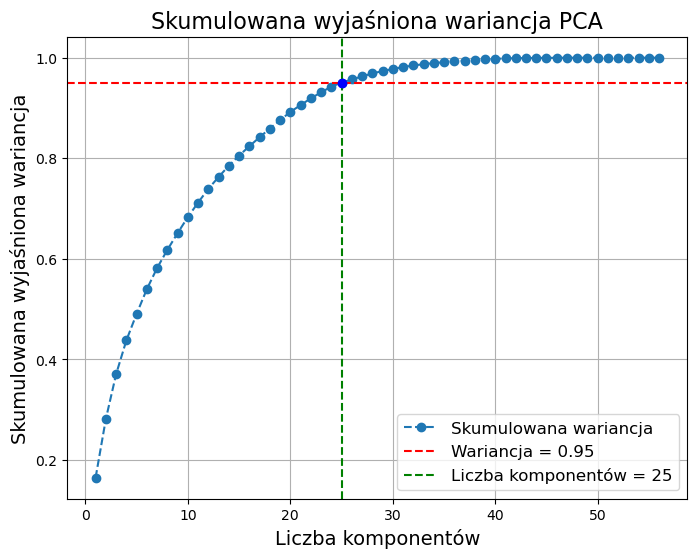

In [847]:
cumulative_sum = explained_variance_ratio_5x
index = next(i for i, total in enumerate(cumulative_sum) if total >= 0.95) + 1

# Wykres
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_sum) + 1), cumulative_sum, marker='o', linestyle='--', label='Skumulowana wariancja')
plt.axhline(y=0.95, color='red', linestyle='--', label='Wariancja = 0.95')
plt.axvline(x=index, color='green', linestyle='--', label=f'Liczba komponentów = {index}')
plt.scatter(index, 0.95, color='blue', zorder=5)

plt.title('Skumulowana wyjaśniona wariancja PCA', fontsize=16)
plt.xlabel('Liczba komponentów', fontsize=14)
plt.ylabel('Skumulowana wyjaśniona wariancja', fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [849]:
# PCA optymalne ze względu na ilość komponentów
df_pca_optimal_5x = PCA(n_components=25)
X_train_pca_5x_fin = df_pca_optimal_5x.fit_transform(X_train_scal_5x)
X_test_pca_5x_fin = df_pca_optimal_5x.transform(X_test_scal_5x)

#### Trenowanie 5 modeli w wersji z PCA z kroswalidacją

In [852]:
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

models_PCA = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000, penalty='l2', C=0.8),
    "KNN": KNeighborsClassifier(n_neighbors=7, weights='distance'),
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=150, max_depth=7, min_samples_split=10, min_samples_leaf=5),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42, max_depth=3, min_samples_split=10, min_samples_leaf=5, learning_rate=0.1)
}

kf2 = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

results_pca = {}

for name, model in models_PCA.items():
    auc_scores = []

    for train_index, test_index in kf2.split(X_train_pca_5x_fin, y_train_5x):
        X_fold_train_pca, X_fold_test_pca = X_train_pca_5x_fin[train_index], X_train_pca_5x_fin[test_index]
        y_fold_train_pca, y_fold_test_pca = y_train_5x.iloc[train_index], y_train_5x.iloc[test_index]
        
        model.fit(X_fold_train_pca, y_fold_train_pca)
        
        y_pred_prob = model.predict_proba(X_fold_test_pca)[:, 1]
        
        auc = roc_auc_score(y_fold_test_pca, y_pred_prob)
        auc_scores.append(auc)

    results_pca[name] = np.mean(auc_scores)
    print(f"{name} (PCA): Średni AUROC = {results_pca[name]:.4f}")

print("\nPorównanie wyników AUROC (oryginalne dane vs PCA):")
print("Model".ljust(20), "Oryginalne".ljust(15), "PCA".ljust(15))
for name in models_PCA.keys():
    original_score = results.get(name, "N/A")
    pca_score = results_pca.get(name, "N/A")
    print(f"{name.ljust(20)} {str(original_score).ljust(15)} {str(pca_score).ljust(15)}")

Logistic Regression (PCA): Średni AUROC = 0.8682
KNN (PCA): Średni AUROC = 0.7583
Decision Tree (PCA): Średni AUROC = 0.8056
Random Forest (PCA): Średni AUROC = 0.8461
Gradient Boosting (PCA): Średni AUROC = 0.8660

Porównanie wyników AUROC (oryginalne dane vs PCA):
Model                Oryginalne      PCA            
Logistic Regression  0.8751683857392634 0.8681551143659061
KNN                  0.7576114388769131 0.7582970237139701
Decision Tree        0.86116593995526 0.8056271571691789
Random Forest        0.8754141140308687 0.8461325860567381
Gradient Boosting    0.8852044488511124 0.866016127755292


#### Trenowanie 5 modeli w wersji z PCA bez kroswalidacji 

In [855]:
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score

# Lista modeli (tak jak wcześniej)
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000, penalty='l2', C=0.1, class_weight='balanced'),
    "KNN": KNeighborsClassifier(n_neighbors=7, weights='distance'),
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=150, max_depth=7, min_samples_split=10, min_samples_leaf=5, class_weight='balanced'), 
    "Gradient Boosting": GradientBoostingClassifier(random_state=42, max_depth=3, min_samples_split=10, min_samples_leaf=5, learning_rate=0.1)
}

# Trenowanie modeli na danych PCA i ocena AUROC
results_pca2 = {}
for name, model in models.items():
    # Trenowanie modelu
    model.fit(X_train_pca_5x_fin, y_train_5x)
    
    y_pred_prob = model.predict_proba(X_test_pca_5x_fin)[:, 1]
    
    auc = roc_auc_score(y_test_5x, y_pred_prob)
    results_pca2[name] = auc
    print(f"{name} (PCA): AUROC = {auc:.4f}")

# Porównanie wyników
print("\nPorównanie wyników AUROC (oryginalne dane vs PCA):")
print("Model".ljust(20), "Oryginalne".ljust(15), "PCA".ljust(15))
for name in models.keys():
    original_score = results.get(name, "N/A")
    pca_score = results_pca2.get(name, "N/A")
    print(f"{name.ljust(20)} {str(original_score).ljust(15)} {str(pca_score).ljust(15)}")

Logistic Regression (PCA): AUROC = 0.8742
KNN (PCA): AUROC = 0.7683
Decision Tree (PCA): AUROC = 0.8038
Random Forest (PCA): AUROC = 0.8563
Gradient Boosting (PCA): AUROC = 0.8664

Porównanie wyników AUROC (oryginalne dane vs PCA):
Model                Oryginalne      PCA            
Logistic Regression  0.8751683857392634 0.8742158968824341
KNN                  0.7576114388769131 0.7683177187550152
Decision Tree        0.86116593995526 0.8037871057889522
Random Forest        0.8754141140308687 0.8562865916833169
Gradient Boosting    0.8852044488511124 0.8664357485746146


#### Obserwacje i wnioski po zastosowaniu PCA do 5 modeli uczenia.

## 4. Zbuduj finalny model, którego AUROC score będzie >= 80%, pamiętaj o doborze istotnych zmiennych, kroswalidacji oraz dostrojeniu parametrów modelu, pomyśl również o zbalansowaniu klas. (40pkt)

In [859]:
df_fin = df2.drop(['FICO_Category', 'emp_length_group', 'loan_group', 'income_group'] ,axis =1)
df_fin

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  \
0        5000.00      5000.00          4975.00     10.65       162.87   
1        2500.00      2500.00          2500.00     15.27        59.83   
2        2400.00      2400.00          2400.00     15.96        84.33   
3       10000.00     10000.00         10000.00     13.49       339.31   
4        3000.00      3000.00          3000.00     12.69        67.79   
...          ...          ...              ...       ...          ...   
42531    3500.00      3500.00           225.00     10.28       113.39   
42532    1000.00      1000.00             0.00      9.64        32.11   
42533    2525.00      2525.00           225.00      9.33        80.69   
42534    6500.00      6500.00             0.00      8.38       204.84   
42535    5000.00      5000.00             0.00      7.75       156.11   

       annual_inc   dti  delinq_2yrs  inq_last_6mths  open_acc  ...  \
0        24000.00 27.65         0.00            1.00      3.00  ...   
1        30000.00  1.00         0.00            5.00      3.00  ...   
2        12252.00  8.72         0.00            2.00      2.00  ...   
3        49200.00 20.00         0.00            1.00     10.00  ...   
4        80000.00 17.94         0.00            0.00     15.00  ...   
...           ...   ...          ...             ...       ...  ...   
42531   180000.00 10.00         0.00            1.00      9.00  ...   
42532    12000.00 10.00         0.00            1.00      9.00  ...   
42533   110000.00 10.00         0.00            1.00      9.00  ...   
42534    59000.00  4.00         0.00            1.00      9.00  ...   
42535    70000.00  8.81         0.00            1.00      9.00  ...   

       emp_length_and_grade  employment_stability  job_seniority_flag  \
0                     20.00                  0.03                   1   
1                      0.00                  0.00                   0   
2                     30.00                  0.08                   1   
3                     30.00                  0.05                   1   
4                      2.00                  0.01                   0   
...                     ...                   ...                 ...   
42531                  0.00                  0.00                   0   
42532                  0.00                  0.00                   0   
42533                  0.00                  0.00                   0   
42534                  0.00                  0.00                   0   
42535                 10.00                  0.09                   1   

       years_employed_vs_credit_lines  past_behavior_score  dti_flag  \
0                                3.33                 1.00         0   
1                                0.00                 5.00         0   
2                                5.00                 2.00         0   
3                                1.00                 1.00         0   
4                                0.07                 0.00         0   
...                               ...                  ...       ...   
42531                            0.00                 1.00         0   
42532                            0.00                 1.00         0   
42533                            0.00                 1.00         0   
42534                            0.00                 1.00         0   
42535                            1.11                 1.00         0   

       fico_and_debt_ratio  monthly_income  income_group_numeric  \
0                    25.72         2000.00                     1   
1                   371.00         2500.00                     1   
2                    75.82         1021.00                     1   
3                    32.95         4100.00                     1   
4                    36.80         6666.67                     2   
...                    ...             ...                   ...   
42531                62.45        15000.00                 

In [861]:
df_fin = df_fin.astype(np.float64)

In [863]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42535 entries, 0 to 42535
Data columns (total 57 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   loan_amnt                        42535 non-null  float64
 1   funded_amnt                      42535 non-null  float64
 2   funded_amnt_inv                  42535 non-null  float64
 3   int_rate                         42535 non-null  float64
 4   installment                      42535 non-null  float64
 5   annual_inc                       42535 non-null  float64
 6   dti                              42535 non-null  float64
 7   delinq_2yrs                      42535 non-null  float64
 8   inq_last_6mths                   42535 non-null  float64
 9   open_acc                         42535 non-null  float64
 10  pub_rec                          42535 non-null  float64
 11  revol_bal                        42535 non-null  float64
 12  revol_util             

In [865]:
X_fin = df_fin.drop('loan_status_numeric',axis =1)  
y_fin = df_fin['loan_status_numeric']

In [867]:
# Podział na dane treningowe i testowe
X_train_fin, X_test_fin, y_train_fin, y_test_fin = train_test_split(X_fin, y_fin, test_size=0.3, random_state=42)

In [869]:
# Skalowanie danych
scaler = StandardScaler()
X_train_scal_fin = scaler.fit_transform(X_train_fin)
X_test_scal_fin = scaler.transform(X_test_fin)

In [871]:
X_train_scal_fin = pd.DataFrame(X_train_scal_fin,columns=X_fin.columns)

In [873]:
# Dopasowanie PCA do danych
pca = PCA()
X_train_pca_fin = pca.fit_transform(X_train_scal_fin)
X_test_pca_fin = pca.transform(X_test_scal_fin)

C:\Users\Krzysztof\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [875]:
# Wyjaśniona wariancja skumulowana
explained_variance_ratio = pca.explained_variance_ratio_.cumsum()

In [877]:
# Wybór liczby komponentów na podstawie progu informacyjnego
n_components = next(i for i, total_variance in enumerate(explained_variance_ratio, 1) if total_variance >= 0.95)
print(f"Optymalna liczba komponentów: {n_components}")

Optymalna liczba komponentów: 25


### PCA

In [880]:
pca_fin = PCA(25)
X_train_pca_fin = pca_fin.fit_transform(X_train_scal_fin)
X_test_pca_fin = pca_fin.transform(X_test_scal_fin)

C:\Users\Krzysztof\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


### SMOTE

In [883]:
from imblearn.over_sampling import SMOTE
# Balansowanie klas (SMOTE)
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_pca_fin, y_train_fin)

### Gradient Boosting Classifier

In [886]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel

# Dobór istotnych zmiennych (SelectFromModel z Gradient Boosting)
feature_selector_GBC = GradientBoostingClassifier(random_state=42)
feature_selector_GBC.fit(X_train_bal, y_train_bal)
selector_GBC = SelectFromModel(feature_selector_GBC, prefit=True)
X_train_selected_GBC = selector_GBC.transform(X_train_bal)
X_test_selected_GBC = selector_GBC.transform(X_test_pca_fin)

# Model: Gradient Boosting
gbc = GradientBoostingClassifier(random_state=42)

# Kroswalidacja i strojenie parametrów (GridSearchCV)
param_grid_gbc = {
    'n_estimators': [200],
    'learning_rate': [0.1],
    'max_depth': [3, 5, 7]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_gbc = GridSearchCV(gbc, param_grid_gbc, scoring=make_scorer(roc_auc_score, needs_proba=True), cv=cv, n_jobs=-1, verbose=1)

grid_search_gbc.fit(X_train_selected_GBC, y_train_bal)

best_model_gbc = grid_search_gbc.best_estimator_

y_pred_proba = best_model_gbc.predict_proba(X_test_selected_GBC)[:, 1]
auc_score_gbc = roc_auc_score(y_test_fin, y_pred_proba)

print(f"Najlepsze parametry: {grid_search_gbc.best_params_}")
print(f"AUROC na zbiorze testowym: {auc_score_gbc:.2f}")

if auc_score_gbc > 0.80:
    print("Model spełnia wymagania (AUROC > 80%).")
else:
    print("Model wymaga dalszego dostrojenia.")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Najlepsze parametry: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
AUROC na zbiorze testowym: 0.84
Model spełnia wymagania (AUROC > 80%).


### XGB Classifier

In [888]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, make_scorer
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel

# Dobór istotnych zmiennych (SelectFromModel z wstępnym XGBClassifier)
feature_selector_XGB = XGBClassifier(random_state=42, eval_metric='logloss')
feature_selector_XGB.fit(X_train_bal, y_train_bal)
selector_XGB = SelectFromModel(feature_selector_XGB, prefit=True)
X_train_selected_XGB = selector_XGB.transform(X_train_bal)
X_test_selected_XGB = selector_XGB.transform(X_test_pca_fin)

# Model: XGBClassifier
xgb = XGBClassifier(random_state=42, eval_metric='logloss')

# Parametry do strojenia (GridSearchCV)
param_grid_XGB = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.1, 0.05, 0.01, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9, 11],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

cv_XGB = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_XGB = GridSearchCV(xgb, param_grid_XGB, scoring=make_scorer(roc_auc_score, needs_proba=True), cv=cv_XGB, n_jobs=-1, verbose=1)

grid_search_XGB.fit(X_train_selected_XGB, y_train_bal)

best_model_XGB = grid_search_XGB.best_estimator_

y_pred_proba = best_model_XGB.predict_proba(X_test_selected_XGB)[:, 1]
auc_score_XGB = roc_auc_score(y_test_fin, y_pred_proba)

print(f"Najlepsze parametry: {grid_search_XGB.best_params_}")
print(f"AUROC na zbiorze testowym: {auc_score_XGB:.2f}")

if auc_score_XGB > 0.80:
    print("Model spełnia wymagania (AUROC > 80%).")
else:
    print("Model wymaga dalszego dostrojenia.")

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Najlepsze parametry: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 500, 'subsample': 0.8}
AUROC na zbiorze testowym: 0.84
Model spełnia wymagania (AUROC > 80%).


### LightGBM

In [890]:
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE

In [891]:
smote = SMOTE(random_state=42)
X_train_bal_LGB, y_train_bal_LGB = smote.fit_resample(X_train_pca_fin, y_train_fin)

In [892]:
feature_selector_LGB = LGBMClassifier(random_state=42)
feature_selector_LGB.fit(X_train_bal_LGB, y_train_bal_LGB)

selector_LGB = SelectFromModel(feature_selector_LGB, prefit=True)
X_train_selected_LGB = selector_LGB.transform(X_train_bal_LGB)
X_test_selected_LGB = selector_LGB.transform(X_test_pca_fin)

[LightGBM] [Info] Number of positive: 25214, number of negative: 25214
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6375
[LightGBM] [Info] Number of data points in the train set: 50428, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [893]:
param_grid_LGB = {
    'n_estimators': [200, 300],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 5, 7],
    'num_leaves': [31, 50],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'lambda_l1': [0.1, 1.0],  
    'lambda_l2': [0.1, 1.0]
}

cv_LGB = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
lgb = LGBMClassifier(random_state=42)

grid_search_LGB = GridSearchCV(estimator=lgb,
                               param_grid=param_grid_LGB,
                               scoring=make_scorer(roc_auc_score, needs_proba=True),
                               cv=cv_LGB,
                               n_jobs=-1, verbose=1)

grid_search_LGB.fit(X_train_selected_LGB, y_train_bal_LGB)
best_model_LGB = grid_search_LGB.best_estimator_

y_pred_proba = best_model_LGB.predict_proba(X_test_selected_LGB)[:, 1]
auc_score_LGB = roc_auc_score(y_test_fin, y_pred_proba)

print(f"Najlepsze parametry: {grid_search_LGB.best_params_}")
print(f"AUROC na zbiorze testowym: {auc_score_LGB:.2f}")

# Warunek sukcesu
if auc_score_LGB >= 0.80:
    print("Model spełnia wymagania (AUROC >= 80%).")
else:
    print("Model wymaga dalszego dostrojenia.")

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Warning] lambda_l1 is set=1.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0
[LightGBM] [Warning] lambda_l2 is set=0.1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1
[LightGBM] [Info] Number of positive: 25214, number of negative: 25214
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000575 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 50428, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

### Ensemble Learning

#### Voting Classifier V1 (RF, XGB, LR) - po PCA bez SMOTE 

In [896]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

# Optymalizacja parametrów Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 30],
    'max_depth': [5, 7, 9],
    'min_samples_split': [2, 5, 7, 9],
    'min_samples_leaf': [1, 2, 3],
    'class_weight': ['balanced'],
    'bootstrap': [True]
}
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=param_grid_rf, scoring='roc_auc', cv=3, n_jobs=-1)
grid_search_rf.fit(X_train_pca_fin, y_train_fin)
best_rf = grid_search_rf.best_estimator_

# Optymalizacja parametrów XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.1, 0.2, 0.3],
    'subsample': [0.8, 1.0],
    'scale_pos_weight': [1, 2]
}
grid_search_xgb = GridSearchCV(estimator=XGBClassifier(random_state=42, eval_metric='logloss'),
                               param_grid=param_grid_xgb, scoring='roc_auc', cv=3, n_jobs=-1)
grid_search_xgb.fit(X_train_pca_fin, y_train_fin)
best_xgb = grid_search_xgb.best_estimator_

# Konfiguracja Logistic Regression z regularyzacją
lr = LogisticRegression(C=0.7, class_weight='balanced', max_iter=1000, random_state=42)

# VotingClassifier z zoptymalizowanymi modelami
voting_clf = VotingClassifier(estimators=[
    ('rf', best_rf),
    ('xgb', best_xgb),
    ('lr', lr)
], voting='soft', n_jobs=-1)

# Trening i ocena VotingClassifier
voting_clf.fit(X_train_pca_fin, y_train_fin)
y_pred_proba = voting_clf.predict_proba(X_test_pca_fin)[:, 1]
auc_score_vc1 = roc_auc_score(y_test_fin, y_pred_proba)

print(f"AUROC na zbiorze testowym: {auc_score_vc1:.2f}")

C:\Users\Krzysztof\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


AUROC na zbiorze testowym: 0.88


#### Voting Classifier V2 (RF, XGB, LR) - dane zbalansowane (SMOTE)

In [898]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Optymalizacja RandomForest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [5, 7, 10],
    'min_samples_split': [2, 8, 12, 14],
    'class_weight': ['balanced']
}
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=param_grid_rf, scoring='roc_auc', cv=3, n_jobs=-1)
grid_search_rf.fit(X_train_bal, y_train_bal)
best_rf = grid_search_rf.best_estimator_

# Optymalizacja XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [7, 9, 11],
    'learning_rate': [0.2, 0.3],
    'subsample': [0.8, 1.0],
    'scale_pos_weight': [1, 2]
}
grid_search_xgb = GridSearchCV(estimator=XGBClassifier(random_state=42, eval_metric='logloss'),
                               param_grid=param_grid_xgb, scoring='roc_auc', cv=3, n_jobs=-1)
grid_search_xgb.fit(X_train_bal, y_train_bal)
best_xgb = grid_search_xgb.best_estimator_

# Konfiguracja Voting Classifier z zoptymalizowanymi modelami
voting_clf = VotingClassifier(estimators=[
    ('rf', best_rf),
    ('xgb', best_xgb),
    ('lr', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
], voting='soft', n_jobs=-1)

voting_clf.fit(X_train_bal, y_train_bal)
y_pred_proba = voting_clf.predict_proba(X_test_pca_fin)[:, 1]
auc_score_vc2 = roc_auc_score(y_test_fin, y_pred_proba)

print(f"AUROC na zbiorze testowym: {auc_score_vc2:.2f}")

AUROC na zbiorze testowym: 0.87


#### Stacking Classifier v1 (XGB, RF, LR) - dane PCA + kroswalidacja

In [900]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score

# Modele bazowe po dostrojeniu
stacking_clf = StackingClassifier(estimators=[
    ('xgb', best_xgb),  # Optymalny XGBoost
    ('rf', best_rf)     # Optymalny Random Forest
], final_estimator=LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))

# Trening i kroswalidacja
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(stacking_clf, X_train_pca_fin, y_train_fin, cv=cv, scoring='roc_auc')

print(f"AUROC z kroswalidacji: {cv_scores.mean():.2f}")

stacking_clf.fit(X_train_pca_fin, y_train_fin)
y_pred_proba = stacking_clf.predict_proba(X_test_pca_fin)[:, 1]
auc_score_sc1 = roc_auc_score(y_test_fin, y_pred_proba)

print(f"AUROC na zbiorze testowym: {auc_score_sc1:.2f}")

AUROC z kroswalidacji: 0.86
AUROC na zbiorze testowym: 0.86


#### Stacking Classifier v2 (XGB, RF, LR) - dane zbalansowane (SMOTE) + kroswalidacja

In [902]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score

# Modele bazowe po optymalizacji
stacking_clf = StackingClassifier(estimators=[
    ('xgb', best_xgb),
    ('rf', best_rf)
], final_estimator=LogisticRegression(C=0.8, class_weight='balanced', max_iter=1500, random_state=42),
   n_jobs=-1)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(stacking_clf, X_train_bal, y_train_bal, cv=cv, scoring='roc_auc')

print(f"AUROC z kroswalidacji: {cv_scores.mean():.2f}")

stacking_clf.fit(X_train_bal, y_train_bal)
y_pred_proba = stacking_clf.predict_proba(X_test_pca_fin)[:, 1]
auc_score_sc2 = roc_auc_score(y_test_fin, y_pred_proba)

print(f"AUROC na zbiorze testowym: {auc_score_sc2:.2f}")

AUROC z kroswalidacji: 0.98
AUROC na zbiorze testowym: 0.74


### MLPClassifier - model sieci neuronowej

In [904]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, roc_curve

mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', 
                           max_iter=2500, random_state=42)
mlp_model.fit(X_train_bal, y_train_bal)

y_prob = mlp_model.predict_proba(X_test_pca_fin)[:, 1]
auroc_score_mlp1 = roc_auc_score(y_test_fin, y_prob)

print(f'AUROC Score: {auroc_score_mlp1:.2f}')

AUROC Score: 0.81


In [905]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

mlp = MLPClassifier(max_iter=1000, random_state=42)

param_grid_mlp = {
    'hidden_layer_sizes': [(50, 25), (100,50), (50, 50)],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.01, 0.1, 0.2]
}

# GridSearchCV z walidacją krzyżową
grid_search_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid_mlp, scoring='roc_auc', cv=10, n_jobs=-1)
grid_search_mlp.fit(X_train_bal, y_train_bal)

best_model_mlp = grid_search_mlp.best_estimator_
print("Najlepsze hiperparametry:")
print(grid_search_mlp.best_params_)

y_prob = best_model_mlp.predict_proba(X_test_pca_fin)[:, 1]

auroc_score_mlp2 = roc_auc_score(y_test_fin, y_prob)
print(f'AUROC Score: {auroc_score_mlp2:.2f}')

Najlepsze hiperparametry:
{'hidden_layer_sizes': (100, 50), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'sgd'}
AUROC Score: 0.80


#### Wyniki budowania finalnego modelu - podsumowanie wyników testów

Poniżej znajduje się zestawienie wyników AUROC (Area Under the Receiver Operating Characteristic Curve) dla zastosowanych modeli uczenia maszynowego:

In [908]:
print(f'AUROC Score LightGBM: {auc_score_LGB:.4f}')
print(f'AUROC Score Gradient Boosting Classifier: {auc_score_gbc:.4f}')
print(f'AUROC Score XGB CLassifier: {auc_score_XGB:.4f}')
print(f'AUROC Score Voting Classifier V1: {auc_score_vc1:.4f}')
print(f'AUROC Score Voting Classifier V2: {auc_score_vc2:.4f}')
print(f'AUROC Score Stacking CLassifier V1: {auc_score_sc1:.4f}')
print(f'AUROC Score Stacking CLassifier V2: {auc_score_sc2:.4f}')
print(f'AUROC Score MLP model sieci neuronowej V1: {auroc_score_mlp1:.4f}')
print(f'AUROC Score MLP model sieci neuronowej V2: {auroc_score_mlp2:.4f}')

AUROC Score LightGBM: 0.8432
AUROC Score Gradient Boosting Classifier: 0.8448
AUROC Score XGB CLassifier: 0.8366
AUROC Score Voting Classifier V1: 0.8752
AUROC Score Voting Classifier V2: 0.8714
AUROC Score Stacking CLassifier V1: 0.8625
AUROC Score Stacking CLassifier V2: 0.7377
AUROC Score MLP model sieci neuronowej V1: 0.8094
AUROC Score MLP model sieci neuronowej V2: 0.7980


#### Wnioski
1. Modele Ensemble oparte na Voting Classifierach:

-Voting Classifier V1 (AUROC: 0.8752) oraz Voting Classifier V2 (AUROC: 0.8714) osiągają najlepsze wyniki. Oznacza to, że połączenie predykcji kilku modeli w mechanizmie głosowania znacząco poprawia zdolność modelu do rozróżniania klas. Wskazuje to na korzyści płynące z integracji różnych perspektyw, co często prowadzi do stabilniejszych i lepszych wyników niż modele działające indywidualnie.

2. Klasyczne Metody Boosting:

LightGBM (AUROC: 0.8432), Gradient Boosting Classifier (AUROC: 0.8448) oraz XGB Classifier (AUROC: 0.8366) uzyskują wyniki oscylujące wokół 0.84. Wyniki te są satysfakcjonujące i wskazują, że te algorytmy dobrze radzą sobie z danymi, jednak nie osiągają tak wysokiej skuteczności jak podejścia ensemble, co może wynikać z ograniczeń pojedynczych modeli w uchwyceniu pełnej złożoności danych.

3. Metody Stacking (Ensemble z Uczeniem Drugiego Poziomu):

Stacking Classifier V1 (AUROC: 0.8625) prezentuje bardzo dobre wyniki, co sugeruje, że łączenie predykcji bazowych modeli na etapie meta-uczenia może przynieść wymierne korzyści, pod warunkiem odpowiedniego doboru i optymalizacji podstawowych algorytmów.

Natomiast Stacking Classifier V2 (AUROC: 0.7377) wyróżnia się znacznie gorszą skutecznością. Taka rozbieżność może wskazywać na nieoptymalny dobór modeli bazowych, niewłaściwą konfigurację algorytmu meta-uczenia lub problemy z nadmiernym dopasowaniem (overfittingiem).

4. Modele Sieci Neuronowych (MLP):

Modele MLP V1 (AUROC: 0.8094) i MLP V2 (AUROC: 0.7980) uzyskały najniższe wyniki spośród analizowanych. Sugeruje to, że przy obecnej architekturze i konfiguracji sieci MLP mają trudności w uchwyceniu złożonych zależności w danych. Może to świadczyć o potrzebie dalszej optymalizacji, np. poprzez zmianę struktury sieci, dostosowanie hiperparametrów, czy lepszy preprocessing danych dedykowany sieciom neuronowym.

Ogólne wnioski:

1. Wyniki potwierdzają, że podejścia ensemble, zwłaszcza Voting Classifier (szczególnie wersja V1), są bardzo konkurencyjne i mają zdolność do poprawy jakości predykcji względem pojedynczych modeli boostingowych.

2. Metody stacking mogą być skuteczne, jednak różnice między wariantami V1 i V2 wskazują na konieczność starannego doboru modeli bazowych oraz konfiguracji algorytmu meta-uczenia.

3. Modele oparte na klasycznych algorytmach boostingowych oferują solidną wydajność, ale potencjalnie można je ulepszyć poprzez ich integrację w bardziej zaawansowane strategie ensemble.

4. Sieci neuronowe MLP, choć obiecujące, w obecnej konfiguracji nie osiągają wyników na poziomie innych modeli – co wskazuje na potrzebę dalszego eksperymentowania z architekturą i optymalizacją parametrów.

Rekomendacje:

1. Dalsza walidacja: Warto przeprowadzić dodatkowe analizy, np. walidację krzyżową, aby potwierdzić stabilność i ogólność uzyskanych wyników.

2. Tuning hiperparametrów: Każdy z modeli – zwłaszcza stacking V2 i sieci neuronowe – może zyskać na precyzyjnej optymalizacji hiperparametrów.

3. Analiza wpływu poszczególnych cech: Może się okazać, że dalsza inżynieria cech lub selekcja istotnych atrybutów pozwoli poprawić wyniki nawet dla już dobrze radzących sobie modeli boostingowych.

4. Eksperymenty z różnymi podejściami ensemble: Łączenie modeli oparte na różnorodnych algorytmach (np. integracja modeli boostingowych z sieciami neuronowymi przy zastosowaniu Voting lub Stacking) może otworzyć drogę do jeszcze lepszych rezultatów.
